In [144]:
#using Pkg
#Pkg.add(PackageSpec(name="JWAS",rev="master"))
#Pkg.add("RecipesBase")
#using RecipesBase

In [ ]:
#methods(add_genotypes)

In [1]:
using DataFrames              # package for working with data sets
using JWAS                    # package for Bayesian regression analyses, including BayesB and BayesCπ        
#using JWAS:misc               # utility functions
using JWAS.Datasets
using Distributions       
using Plots                   # package for plotting 
using CSV
using LinearAlgebra,Statistics,Random,DelimitedFiles, DataFrames

┌ Info: Recompiling stale cache file /opt/julia/compiled/v1.1/DataFrames/AR9oZ.ji for DataFrames [a93c6f00-e57d-5684-b7b6-d8193f3e46c0]
└ @ Base loading.jl:1184
┌ Info: Recompiling stale cache file /opt/julia/compiled/v1.1/JWAS/tbeXw.ji for JWAS [c9a035f4-d403-5e6b-8649-6be755bc4798]
└ @ Base loading.jl:1184
┌ Info: Recompiling stale cache file /opt/julia/compiled/v1.1/Plots/ld3vC.ji for Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1184


In [2]:
phenotypes = CSV.read("/home/jovyan/mark/JWAS_CDPQ/CDPQ_all_data/production_1_7_Exp_0.75_Complete.dat", types=Dict(:ID => String), delim = ' ',header=true, missingstrings=["NA"] )
#first(phenotypes,10)

,ID,Cycle,BatchNum,Batch,Company,SowID,NurEnrich,QNurPenBatch,NurPenBatch
,String,Int64,Int64,String,String,String,Bool,String,String?
1,0001,1,1,1B,A,1B_1715,false,1B_D04,1B_D04
2,0002,1,1,1B,A,1B_1642,false,1B_D04,1B_D04
3,0004,1,1,1B,A,1B_2150,false,1B_D04,1B_D04
4,0005,1,1,1B,A,1B_1980,false,1B_D04,1B_D04
5,0006,1,1,1B,A,1B_1902,false,1B_D04,1B_D04
6,0007,1,1,1B,A,1B_2150,false,1B_D04,1B_D04
7,0009,1,1,1B,A,1B_1902,false,1B_D02,1B_D02
8,0010,1,1,1B,A,1B_1885,false,1B_D02,1B_D02
9,0011,1,1,1B,A,1B_2097,false,1B_D02,1B_D02


In [3]:
phenotypes= dropmissing(phenotypes, :FinPenBatch)
phenotypes= dropmissing(phenotypes, :FCR)
phenotypes

,ID,Cycle,BatchNum,Batch,Company,SowID,NurEnrich,QNurPenBatch,NurPenBatch
,String,Int64,Int64,String,String,String,Bool,String,String?
1,0001,1,1,1B,A,1B_1715,false,1B_D04,1B_D04
2,0002,1,1,1B,A,1B_1642,false,1B_D04,1B_D04
3,0004,1,1,1B,A,1B_2150,false,1B_D04,1B_D04
4,0005,1,1,1B,A,1B_1980,false,1B_D04,1B_D04
5,0007,1,1,1B,A,1B_2150,false,1B_D04,1B_D04
6,0009,1,1,1B,A,1B_1902,false,1B_D02,1B_D02
7,0010,1,1,1B,A,1B_1885,false,1B_D02,1B_D02
8,0011,1,1,1B,A,1B_2097,false,1B_D02,1B_D02
9,0012,1,1,1B,A,1B_1902,false,1B_D02,1B_D02


In [4]:
# Drop the extreme low and high FCR
std(phenotypes[!, :FCR])

0.21916019305177653

In [5]:
mean(phenotypes[!, :FCR])

2.583440728114397

In [6]:
sel = 1.92 .< phenotypes[!, :FCR] .< 3.24
phenotypes= phenotypes[sel,:]
sort(phenotypes[!, :FCR])

2355-element Array{Float64,1}:
 1.92971261847696
 2.01765500789301
 2.02511711950841
 2.05207429811132
 2.07162237195245
 2.07943892593962
 2.08956225799538
 2.09233452888776
 2.1024481307376 
 2.10916678000823
 2.11009055931175
 2.12099245446649
 2.12170408498217
 ⋮               
 3.11674049475143
 3.12082185277154
 3.12496811040774
 3.12565372094282
 3.12792978041221
 3.13275863211991
 3.13673820043548
 3.16536263046474
 3.19610784817707
 3.21715340121339
 3.22022221730841
 3.23028143870154

In [7]:
FCR_model_equations = "FCR = intercept + Batch + Died + EntryAge + FinPenBatch + SowID"
FCR_R=0.254127E-01
FCR_model=build_model(FCR_model_equations,FCR_R);

In [8]:
set_covariate(FCR_model,"EntryAge")

1-element Array{Symbol,1}:
 :EntryAge

In [9]:
FCR_G1=0.189152E-02
set_random(FCR_model,"FinPenBatch",FCR_G1)

In [10]:
FCR_G2=0.256770E-02
set_random(FCR_model,"SowID",FCR_G2)

In [11]:
function readMatBin(fileName)
    genStr = open(fileName)
    n = read(genStr,Int64)
    p = read(genStr,Int64)
    M = zeros(n,p)
    for j in 1:p
        for i in 1:n
            M[i,j] = read(genStr,Float64)
        end
    end
    close(genStr)
    return M
end
@time M = readMatBin("/home/jovyan/mark/JWAS_CDPQ/CDPQ_all_data/ALGP2_Cycle_1_7_Geno_Complete_Impute_JWAS.bin.gen.bin")

 28.503965 seconds (19.39 k allocations: 10.392 GiB, 0.08% gc time)


3205×435172 Array{Float64,2}:
 0.0  2.0  0.0  2.0  2.0  0.0  2.0  2.0  …  0.0  2.0  0.0  2.0  2.0  2.0  2.0
 1.0  2.0  0.0  2.0  2.0  0.0  1.0  2.0     0.0  2.0  1.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  1.0  2.0  0.0  1.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 1.0  2.0  0.0  1.0  2.0  0.0  1.0  2.0     0.0  2.0  1.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  2.0  2.0  0.0  2.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 1.0  1.0  1.0  0.0  1.0  1.0  0.0  1.0  …  0.0  2.0  0.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  1.0  2.0  0.0  1.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  0.0  2.0  0.0  0.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 1.0  2.0  0.0  0.0  2.0  0.0  0.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  2.0  2.0  0.0  2.0  2.0     0.0  2.0  1.0  2.0  2.0  2.0  2.0
 1.0  1.0  0.0  1.0  2.0  0.0  0.0  2.0  …  0.0  2.0  0.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  0.0  2.0  0.0  0.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0

In [12]:
rowID = vec(readdlm("/home/jovyan/mark/JWAS_CDPQ/CDPQ_all_data/ALGP2_Cycle_1_7_Geno_Complete_Impute_JWAS.bin.ids.txt",String))

3205-element Array{String,1}:
 "0001"
 "0002"
 "0004"
 "0005"
 "0006"
 "0007"
 "0009"
 "0010"
 "0011"
 "0012"
 "0013"
 "0014"
 "0015"
 ⋮     
 "3283"
 "3284"
 "3285"
 "3286"
 "3287"
 "3288"
 "3289"
 "3290"
 "3291"
 "3292"
 "3293"
 "3294"

In [ ]:
FCR_G3=0.844004E-02
@time add_genotypes(FCR_model,M,FCR_G3,header=false, rowID=rowID)
#@time add_genotypes(Nur2ADG_model,"Geno_JWAS_impute.txt",Nur2ADG_G3,separator=' ')

In [49]:
h2=FCR_G3/(FCR_G3 + FCR_R + FCR_G2)

0.23173910035134115

In [ ]:
@time FCR_outCPi=runMCMC(FCR_model,phenotypes,methods="BayesC",
    missing_phenotypes=true, Pi= 0.999,estimatePi=true,estimateScale=true,
    chain_length=50000,burnin = 5000,output_heritability=true,  output_samples_frequency=100)

In [51]:
keys(FCR_outCPi)

Base.KeySet for a Dict{Any,Any} with 9 entries. Keys:
  "marker effects"
  "Pi"
  "heritability"
  "location parameters"
  "residual variance"
  "ScaleEffectVar"
  "EBV_FCR"
  "genetic_variance"
  "marker effects variance"

In [52]:
marker=CSV.read("MCMC_samples_genetic_variance.txt",delim = ' ',header=true)
Va=mean(marker[!, 1])

0.00839031174154534

In [53]:
Sow=CSV.read("MCMC_samples_SowID_variances.txt",delim = ' ',header=true)
Vs=mean(Sow[!, 1])

0.001256197199518586

In [54]:
pen=CSV.read("MCMC_samples_FinPenBatch_variances.txt",delim = ' ',header=true)
Vs=mean(pen[!, 1])

0.0021184089734596024

In [55]:
Res=CSV.read("MCMC_samples_residual_variance.txt",delim = ' ',header=true)
Ve=mean(Res[!, 1])

0.01681049554204824

In [56]:
h2=Va/(Va+Vs+Ve)

0.30712124618066805

In [57]:
Pi=FCR_outCPi["Pi"]

,π,Estimate,Std_Error
,Any,Any,Any
1,π,0.982725,0.0216839


In [64]:
Pi=CSV.read("MCMC_samples_pi.txt",delim = ' ',header=false)
insertcols!(Pi, 1, :iteration => 1:450) # Add a column called iteration

,iteration,Column1
,Int64,Float64
1,1,0.996146
2,2,0.996489
3,3,0.997895
4,4,0.99898
5,5,0.998387
6,6,0.998538
7,7,0.998218
8,8,0.998288
9,9,0.998925


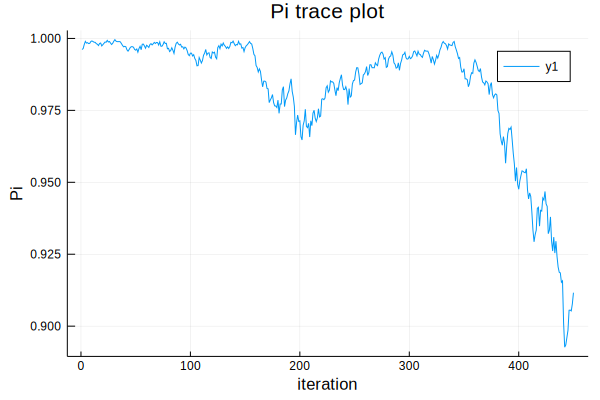

In [65]:
using Plots
x = Pi[!,1]; y = Pi[!,2]; # These are the plotting data
plot(x,y, title = "Pi trace plot",
        xlabel = "iteration", ylabel = "Pi")

In [60]:
h2=CSV.read("MCMC_samples_heritability.txt",delim = ' ',header=true)
insertcols!(h2, 1, :iteration => 1:450) # Add a column called iteration

,iteration,FCR
,Int64,Float64
1,1,0.361035
2,2,0.377558
3,3,0.387345
4,4,0.30423
5,5,0.364762
6,6,0.330326
7,7,0.271049
8,8,0.399785
9,9,0.352085


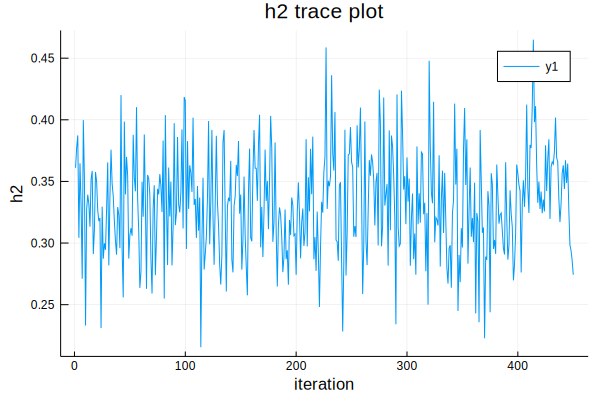

In [62]:
using Plots
x = h2[!,1]; y = h2[!,2]; # These are the plotting data
plot(x,y, title = "h2 trace plot",
        xlabel = "iteration", ylabel = "h2")

In [66]:
FCR_model_equations = "FCR = intercept + Batch + Died + EntryAge + FinPenBatch + SowID"
FCR_R=0.012311690250937726
FCR_model=build_model(FCR_model_equations,FCR_R);

In [67]:
set_covariate(FCR_model,"EntryAge")

1-element Array{Symbol,1}:
 :EntryAge

In [68]:
FCR_G1=0.0009569548408214458
set_random(FCR_model,"FinPenBatch",FCR_G1)

In [69]:
FCR_G2=0.0008891817390314575
set_random(FCR_model,"SowID",FCR_G2)

In [70]:
FCR_G3=0.002634813360950373
@time add_genotypes(FCR_model,M,FCR_G3,header=true, rowID=rowID)

The header (marker IDs) is set to 1,2,...,#markers
435172 markers on 3205 individuals were added.
517.333969 seconds (870.69 k allocations: 20.848 GiB, 5.19% gc time)


In [71]:
@time FCR_outB=runMCMC(FCR_model,phenotypes,methods="BayesB", missing_phenotypes=true, Pi=0.982725, estimateScale =true, chain_length=50000,burnin = 5000,output_heritability=true,  output_samples_frequency=100)

Checking phenotypes...
Individual IDs (strings) are provided in the first column of the phenotypic data.

The prior for marker effects variance is calculated from the genetic variance and π.
The mean of the prior for the marker effects variance is: 1.0e-6



A Linear Mixed Model was build using model equations:

FCR = intercept + Batch + Died + EntryAge + FinPenBatch + SowID

Model Information:

Term            C/F          F/R            nLevels
intercept       factor       fixed                1
Batch           factor       fixed               49
Died            factor       fixed                2
EntryAge        covariate    fixed                1
FinPenBatch     factor       random             214
SowID           factor       random            1013

MCMC Information:

methods                                      BayesB
                              complete genomic data
                   (i.e., non-single-step analysis)
chain_length                                  50000
burnin   

running MCMC for BayesB...100%|█████████████████████████| Time: 11:12:44




The version of Julia and Platform in use:

Julia Version 1.1.0
Commit 80516ca202 (2019-01-21 21:24 UTC)
Platform Info:
  OS: Linux (x86_64-pc-linux-gnu)
  CPU: Intel(R) Core(TM) i7-5960X CPU @ 3.00GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-6.0.1 (ORCJIT, haswell)
Environment:
  JULIA_DEPOT_PATH = /opt/julia
  JULIA_PKGDIR = /opt/julia
  JULIA_VERSION = 1.1.0


The analysis has finished. Results are saved in the returned variable and text files. MCMC samples are saved in text files.


40391.719366 seconds (112.37 G allocations: 2.381 TiB, 1.56% gc time)


Dict{Any,Any} with 8 entries:
  "marker effects"          => 435172×5 DataFrame…
  "heritability"            => 1×3 DataFrame…
  "location parameters"     => 1280×5 DataFrame…
  "residual variance"       => 1×3 DataFrame…
  "ScaleEffectVar"          => 1×3 DataFrame…
  "EBV_FCR"                 => 3205×3 DataFrame…
  "genetic_variance"        => 1×3 DataFrame…
  "marker effects variance" => 1×3 DataFrame…

In [72]:
marker=CSV.read("MCMC_samples_genetic_variance.txt",delim = ' ',header=true)
Va=mean(marker[!, 1])

0.0047425498663168355

In [73]:
Sow=CSV.read("MCMC_samples_SowID_variances.txt",delim = ' ',header=true)
Vs=mean(Sow[!, 1])

0.0013872634587626825

In [74]:
pen=CSV.read("MCMC_samples_FinPenBatch_variances.txt",delim = ' ',header=true)
Vs=mean(pen[!, 1])

0.002114518414269181

In [75]:
Res=CSV.read("MCMC_samples_residual_variance.txt",delim = ' ',header=true)
Ve=mean(Res[!, 1])

0.01915279540837769

In [76]:
h2=Va/(Va+Vs+Ve)

0.1823365905731046

In [77]:
h2=CSV.read("MCMC_samples_heritability.txt",delim = ' ',header=true)
insertcols!(h2, 1, :iteration => 1:450) # Add a column called iteration

,iteration,FCR
,Int64,Float64
1,1,0.136693
2,2,0.122587
3,3,0.12323
4,4,0.128624
5,5,0.111271
6,6,0.160399
7,7,0.148077
8,8,0.138421
9,9,0.12979


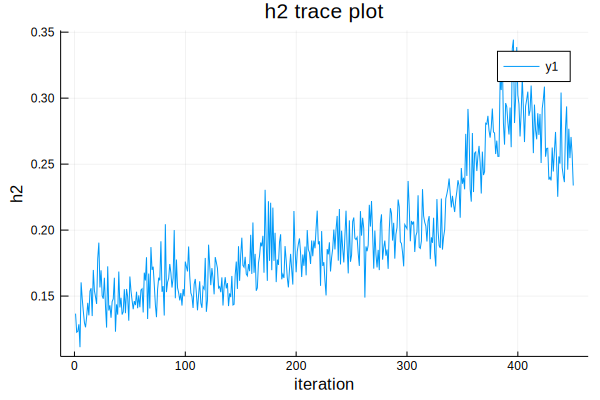

In [78]:
using Plots
x = h2[!,1]; y = h2[!,2]; # These are the plotting data
plot(x,y, title = "h2 trace plot",
        xlabel = "iteration", ylabel = "h2")

In [5]:
@time FCR_outB,FCR_winVarProps = GWAS("MCMC_samples_marker_effects_FCR.txt",
    "/home/jovyan/mark/JWAS_CDPQ/CDPQ_all_data/ChrInfo_map_1_7_Complete_JWAS.txt",
    M;header=true,window_size="1 Mb",threshold=0.001)

Compute the posterior probability of association of the genomic window that explains more than 0.001 of the total genetic variance.


running GWAS...100%|████████████████████████████████████| Time: 0:30:08


BoundsError: BoundsError: attempt to access (2395×13 DataFrame
│ Row  │ trait │ window │ chr    │ wStart    │ wEnd      │ start_SNP │ end_SNP   │ numSNP │ estimateGenVar │ stdGenVar   │ prGenVar │ WPPA       │ PPA_t     │
│      │ Int64 │ Int64  │ String │ Int64     │ Int64     │ Int64     │ Int64     │ Int64  │ Float64        │ Float64     │ Float64  │ Float64    │ Float64   │
├──────┼───────┼────────┼────────┼───────────┼───────────┼───────────┼───────────┼────────┼────────────────┼─────────────┼──────────┼────────────┼───────────┤
│ 1    │ 1     │ 1355   │ 9      │ 126000000 │ 127000000 │ 126000423 │ 126999164 │ 249    │ 1.29825e-5     │ 3.58587e-5  │ 0.26     │ 0.368889   │ 0.368889  │
│ 2    │ 1     │ 1011   │ 7      │ 43000000  │ 44000000  │ 43002291  │ 43998322  │ 237    │ 9.21396e-6     │ 1.98827e-5  │ 0.19     │ 0.344444   │ 0.356667  │
│ 3    │ 1     │ 1409   │ 10     │ 40000000  │ 41000000  │ 40000791  │ 40999605  │ 254    │ 8.5622e-6      │ 2.19007e-5  │ 0.17     │ 0.3        │ 0.337778  │
│ 4    │ 1     │ 1014   │ 7      │ 46000000  │ 47000000  │ 46001468  │ 46998696  │ 254    │ 5.36987e-6     │ 9.92845e-6  │ 0.12     │ 0.295556   │ 0.327222  │
│ 5    │ 1     │ 1633   │ 13     │ 52000000  │ 53000000  │ 52008461  │ 52997382  │ 246    │ 4.82977e-6     │ 8.64657e-6  │ 0.1      │ 0.275556   │ 0.316889  │
│ 6    │ 1     │ 288    │ 2      │ 12000000  │ 13000000  │ 12006992  │ 12999460  │ 215    │ 5.98331e-6     │ 1.84358e-5  │ 0.12     │ 0.273333   │ 0.30963   │
│ 7    │ 1     │ 1529   │ 12     │ 10000000  │ 11000000  │ 10005769  │ 10994771  │ 255    │ 4.62758e-6     │ 9.32566e-6  │ 0.1      │ 0.262222   │ 0.302857  │
│ 8    │ 1     │ 533    │ 3      │ 105000000 │ 106000000 │ 105000502 │ 105995823 │ 219    │ 5.85988e-6     │ 1.67219e-5  │ 0.12     │ 0.257778   │ 0.297222  │
│ 9    │ 1     │ 1412   │ 10     │ 43000000  │ 44000000  │ 43010618  │ 43997605  │ 260    │ 3.77207e-6     │ 5.31731e-6  │ 0.08     │ 0.257778   │ 0.29284   │
│ 10   │ 1     │ 2207   │ 17     │ 54000000  │ 55000000  │ 54003350  │ 54999214  │ 294    │ 4.45085e-6     │ 7.92631e-6  │ 0.1      │ 0.253333   │ 0.288889  │
│ 11   │ 1     │ 1267   │ 9      │ 38000000  │ 39000000  │ 38000328  │ 38997534  │ 228    │ 4.2477e-6      │ 7.83474e-6  │ 0.09     │ 0.251111   │ 0.285455  │
│ 12   │ 1     │ 399    │ 2      │ 123000000 │ 124000000 │ 123001944 │ 123986510 │ 213    │ 4.80373e-6     │ 1.08893e-5  │ 0.1      │ 0.246667   │ 0.282222  │
│ 13   │ 1     │ 2225   │ 18     │ 8000000   │ 9000000   │ 8000801   │ 8938737   │ 229    │ 4.42003e-6     │ 8.90109e-6  │ 0.09     │ 0.246667   │ 0.279487  │
│ 14   │ 1     │ 1003   │ 7      │ 35000000  │ 36000000  │ 35002703  │ 35999908  │ 268    │ 3.70564e-6     │ 6.11781e-6  │ 0.08     │ 0.242222   │ 0.276825  │
│ 15   │ 1     │ 317    │ 2      │ 41000000  │ 42000000  │ 41003027  │ 41994631  │ 255    │ 4.30016e-6     │ 9.25846e-6  │ 0.09     │ 0.24       │ 0.27437   │
│ 16   │ 1     │ 518    │ 3      │ 90000000  │ 91000000  │ 90005499  │ 90990801  │ 229    │ 3.85831e-6     │ 6.15877e-6  │ 0.08     │ 0.24       │ 0.272222  │
│ 17   │ 1     │ 2054   │ 15     │ 122000000 │ 123000000 │ 122000140 │ 122998178 │ 276    │ 4.43421e-6     │ 1.22176e-5  │ 0.1      │ 0.24       │ 0.270327  │
│ 18   │ 1     │ 1320   │ 9      │ 91000000  │ 92000000  │ 91001182  │ 91999338  │ 219    │ 4.80907e-6     │ 1.09348e-5  │ 0.1      │ 0.235556   │ 0.268395  │
│ 19   │ 1     │ 653    │ 4      │ 92000000  │ 93000000  │ 92005234  │ 92991619  │ 244    │ 3.80359e-6     │ 6.68096e-6  │ 0.08     │ 0.233333   │ 0.26655   │
│ 20   │ 1     │ 996    │ 7      │ 28000000  │ 29000000  │ 28000991  │ 28999976  │ 234    │ 3.98008e-6     │ 9.93036e-6  │ 0.08     │ 0.233333   │ 0.264889  │
│ 21   │ 1     │ 531    │ 3      │ 103000000 │ 104000000 │ 103039803 │ 103998487 │ 251    │ 3.93572e-6     │ 6.62857e-6  │ 0.08     │ 0.231111   │ 0.26328   │
│ 22   │ 1     │ 565    │ 4      │ 4000000   │ 5000000   │ 4004185   │ 4993072   │ 291    │ 3.80912e-6     │ 9.52829e-6  │ 0.08     │ 0.231111   │ 0.261818  │
│ 23   │ 1     │ 2090   │ 16     │ 17000000  │ 18000000  │ 17001516  │ 17996098  │ 250    │ 4.93521e-6     │ 1.6156e-5   │ 0.1      │ 0.231111   │ 0.260483  │
│ 24   │ 1     │ 1414   │ 10     │ 45000000  │ 46000000  │ 45001616  │ 45999491  │ 259    │ 4.63479e-6     │ 1.13731e-5  │ 0.1      │ 0.228889   │ 0.259167  │
│ 25   │ 1     │ 53     │ 1      │ 52000000  │ 53000000  │ 52000507  │ 52988384  │ 276    │ 3.94871e-6     │ 6.88702e-6  │ 0.08     │ 0.226667   │ 0.257867  │
│ 26   │ 1     │ 566    │ 4      │ 5000000   │ 6000000   │ 5000886   │ 5998661   │ 290    │ 3.7548e-6      │ 5.91109e-6  │ 0.08     │ 0.226667   │ 0.256667  │
│ 27   │ 1     │ 1623   │ 13     │ 42000000  │ 43000000  │ 42000608  │ 42994944  │ 206    │ 5.02962e-6     │ 1.37608e-5  │ 0.1      │ 0.226667   │ 0.255556  │
│ 28   │ 1     │ 1253   │ 9      │ 24000000  │ 25000000  │ 24004093  │ 24994001  │ 284    │ 3.43404e-6     │ 4.82447e-6  │ 0.07     │ 0.224444   │ 0.254444  │
│ 29   │ 1     │ 1413   │ 10     │ 44000000  │ 45000000  │ 44002230  │ 44991759  │ 246    │ 3.48842e-6     │ 6.95091e-6  │ 0.07     │ 0.224444   │ 0.25341   │
│ 30   │ 1     │ 287    │ 2      │ 11000000  │ 12000000  │ 11003302  │ 11996496  │ 218    │ 5.97335e-6     │ 2.12905e-5  │ 0.12     │ 0.222222   │ 0.25237   │
│ 31   │ 1     │ 1669   │ 13     │ 88000000  │ 89000000  │ 88002698  │ 88999545  │ 187    │ 4.42473e-6     │ 9.40717e-6  │ 0.1      │ 0.222222   │ 0.251398  │
│ 32   │ 1     │ 1868   │ 14     │ 78000000  │ 79000000  │ 78001173  │ 78997017  │ 183    │ 8.62361e-6     │ 2.66485e-5  │ 0.16     │ 0.222222   │ 0.250486  │
│ 33   │ 1     │ 1934   │ 15     │ 2000000   │ 3000000   │ 2001206   │ 2997811   │ 229    │ 4.77359e-6     │ 1.20676e-5  │ 0.1      │ 0.222222   │ 0.24963   │
│ 34   │ 1     │ 2158   │ 17     │ 5000000   │ 6000000   │ 5004823   │ 5996688   │ 243    │ 4.03602e-6     │ 1.04583e-5  │ 0.09     │ 0.222222   │ 0.248824  │
│ 35   │ 1     │ 433    │ 3      │ 5000000   │ 6000000   │ 5002140   │ 5997754   │ 282    │ 3.84806e-6     │ 6.49336e-6  │ 0.08     │ 0.22       │ 0.248     │
│ 36   │ 1     │ 1384   │ 10     │ 15000000  │ 16000000  │ 15000580  │ 15999931  │ 251    │ 3.91098e-6     │ 6.10321e-6  │ 0.08     │ 0.22       │ 0.247222  │
│ 37   │ 1     │ 396    │ 2      │ 120000000 │ 121000000 │ 120000220 │ 120996518 │ 247    │ 3.58154e-6     │ 6.67768e-6  │ 0.08     │ 0.217778   │ 0.246426  │
│ 38   │ 1     │ 1642   │ 13     │ 61000000  │ 62000000  │ 61007899  │ 61997713  │ 235    │ 4.31912e-6     │ 1.01745e-5  │ 0.09     │ 0.217778   │ 0.245673  │
│ 39   │ 1     │ 559    │ 3      │ 131000000 │ 132000000 │ 131022107 │ 131996617 │ 240    │ 4.52022e-6     │ 1.17658e-5  │ 0.09     │ 0.215556   │ 0.2449    │
│ 40   │ 1     │ 1880   │ 14     │ 90000000  │ 91000000  │ 90001876  │ 90974577  │ 213    │ 3.97653e-6     │ 7.82869e-6  │ 0.09     │ 0.215556   │ 0.244167  │
│ 41   │ 1     │ 1924   │ 14     │ 134000000 │ 135000000 │ 134001290 │ 134996889 │ 263    │ 3.96612e-6     │ 7.32019e-6  │ 0.08     │ 0.215556   │ 0.243469  │
│ 42   │ 1     │ 1249   │ 9      │ 20000000  │ 21000000  │ 20001064  │ 20997916  │ 255    │ 3.07288e-6     │ 4.18237e-6  │ 0.06     │ 0.213333   │ 0.242751  │
│ 43   │ 1     │ 1425   │ 10     │ 56000000  │ 57000000  │ 56007735  │ 56998136  │ 263    │ 3.65833e-6     │ 6.04657e-6  │ 0.08     │ 0.213333   │ 0.242067  │
│ 44   │ 1     │ 1463   │ 11     │ 24000000  │ 25000000  │ 24006118  │ 24998435  │ 279    │ 3.15124e-6     │ 4.68299e-6  │ 0.07     │ 0.213333   │ 0.241414  │
│ 45   │ 1     │ 1593   │ 13     │ 12000000  │ 13000000  │ 12002261  │ 12991793  │ 252    │ 3.83489e-6     │ 7.9475e-6   │ 0.08     │ 0.213333   │ 0.24079   │
│ 46   │ 1     │ 863    │ 6      │ 66000000  │ 67000000  │ 66003236  │ 66987107  │ 243    │ 3.4056e-6      │ 6.20753e-6  │ 0.07     │ 0.211111   │ 0.240145  │
│ 47   │ 1     │ 1101   │ 8      │ 11000000  │ 12000000  │ 11001859  │ 11995518  │ 281    │ 4.12928e-6     │ 1.033e-5    │ 0.09     │ 0.211111   │ 0.239527  │
│ 48   │ 1     │ 1370   │ 10     │ 1000000   │ 2000000   │ 1001021   │ 1998337   │ 268    │ 3.45701e-6     │ 4.93022e-6  │ 0.07     │ 0.211111   │ 0.238935  │
│ 49   │ 1     │ 1375   │ 10     │ 6000000   │ 7000000   │ 6000857   │ 6996554   │ 254    │ 3.62284e-6     │ 7.08669e-6  │ 0.08     │ 0.211111   │ 0.238367  │
│ 50   │ 1     │ 1395   │ 10     │ 26000000  │ 27000000  │ 26004430  │ 26999239  │ 241    │ 3.78298e-6     │ 6.98755e-6  │ 0.08     │ 0.211111   │ 0.237822  │
│ 51   │ 1     │ 2035   │ 15     │ 103000000 │ 104000000 │ 103012680 │ 103995883 │ 123    │ 7.29439e-6     │ 2.50023e-5  │ 0.15     │ 0.211111   │ 0.237298  │
│ 52   │ 1     │ 426    │ 2      │ 150000000 │ 151000000 │ 150000500 │ 150995892 │ 282    │ 3.25815e-6     │ 4.78631e-6  │ 0.07     │ 0.208889   │ 0.236752  │
│ 53   │ 1     │ 456    │ 3      │ 28000000  │ 29000000  │ 28009836  │ 28996380  │ 231    │ 3.30422e-6     │ 5.1938e-6   │ 0.07     │ 0.208889   │ 0.236226  │
│ 54   │ 1     │ 1513   │ 11     │ 74000000  │ 75000000  │ 74000057  │ 74999586  │ 271    │ 3.66521e-6     │ 6.41944e-6  │ 0.08     │ 0.208889   │ 0.23572   │
│ 55   │ 1     │ 1563   │ 12     │ 44000000  │ 45000000  │ 44001579  │ 44992193  │ 277    │ 3.43128e-6     │ 5.69254e-6  │ 0.07     │ 0.208889   │ 0.235232  │
│ 56   │ 1     │ 2093   │ 16     │ 20000000  │ 21000000  │ 20000699  │ 20997407  │ 271    │ 3.18632e-6     │ 4.21019e-6  │ 0.07     │ 0.208889   │ 0.234762  │
│ 57   │ 1     │ 65     │ 1      │ 64000000  │ 65000000  │ 64000088  │ 64999142  │ 202    │ 3.67915e-6     │ 6.88116e-6  │ 0.08     │ 0.206667   │ 0.234269  │
│ 58   │ 1     │ 2098   │ 16     │ 25000000  │ 26000000  │ 25009115  │ 25998926  │ 232    │ 3.69693e-6     │ 9.15711e-6  │ 0.08     │ 0.206667   │ 0.233793  │
│ 59   │ 1     │ 72     │ 1      │ 71000000  │ 72000000  │ 71000195  │ 71999425  │ 251    │ 3.06372e-6     │ 4.82603e-6  │ 0.06     │ 0.204444   │ 0.233296  │
│ 60   │ 1     │ 1528   │ 12     │ 9000000   │ 10000000  │ 9001175   │ 9997294   │ 263    │ 2.99068e-6     │ 3.75375e-6  │ 0.06     │ 0.204444   │ 0.232815  │
│ 61   │ 1     │ 2055   │ 15     │ 123000000 │ 124000000 │ 123002910 │ 123990939 │ 263    │ 3.56369e-6     │ 6.20457e-6  │ 0.07     │ 0.204444   │ 0.23235   │
│ 62   │ 1     │ 2      │ 1      │ 1000000   │ 2000000   │ 1005658   │ 1991610   │ 280    │ 3.29635e-6     │ 5.17587e-6  │ 0.07     │ 0.202222   │ 0.231864  │
│ 63   │ 1     │ 950    │ 6      │ 153000000 │ 154000000 │ 153001762 │ 153999285 │ 276    │ 3.15191e-6     │ 3.72396e-6  │ 0.07     │ 0.202222   │ 0.231393  │
│ 64   │ 1     │ 1716   │ 13     │ 135000000 │ 136000000 │ 135045318 │ 135997483 │ 167    │ 4.13602e-6     │ 1.0387e-5   │ 0.08     │ 0.202222   │ 0.230937  │
│ 65   │ 1     │ 1815   │ 14     │ 25000000  │ 26000000  │ 25000729  │ 25989860  │ 257    │ 3.09624e-6     │ 4.51669e-6  │ 0.07     │ 0.202222   │ 0.230496  │
│ 66   │ 1     │ 3      │ 1      │ 2000000   │ 3000000   │ 2000553   │ 2998071   │ 280    │ 3.05872e-6     │ 4.52555e-6  │ 0.06     │ 0.2        │ 0.230034  │
│ 67   │ 1     │ 34     │ 1      │ 33000000  │ 34000000  │ 33002217  │ 33999771  │ 284    │ 3.15474e-6     │ 4.25927e-6  │ 0.07     │ 0.2        │ 0.229585  │
│ 68   │ 1     │ 711    │ 5      │ 19000000  │ 20000000  │ 19002497  │ 19997547  │ 233    │ 3.82783e-6     │ 8.98999e-6  │ 0.08     │ 0.2        │ 0.22915   │
│ 69   │ 1     │ 1319   │ 9      │ 90000000  │ 91000000  │ 90000954  │ 90998982  │ 255    │ 4.19218e-6     │ 1.00591e-5  │ 0.09     │ 0.2        │ 0.228728  │
│ 70   │ 1     │ 1573   │ 12     │ 54000000  │ 55000000  │ 54004044  │ 54998709  │ 226    │ 3.86821e-6     │ 1.06603e-5  │ 0.08     │ 0.2        │ 0.228317  │
│ 71   │ 1     │ 2051   │ 15     │ 119000000 │ 120000000 │ 119000935 │ 119998878 │ 259    │ 3.15683e-6     │ 5.91759e-6  │ 0.07     │ 0.2        │ 0.227919  │
│ 72   │ 1     │ 2198   │ 17     │ 45000000  │ 46000000  │ 45001680  │ 45999754  │ 279    │ 3.11529e-6     │ 4.36869e-6  │ 0.06     │ 0.2        │ 0.227531  │
│ 73   │ 1     │ 1380   │ 10     │ 11000000  │ 12000000  │ 11004581  │ 11998795  │ 290    │ 3.12062e-6     │ 3.97013e-6  │ 0.06     │ 0.197778   │ 0.227123  │
│ 74   │ 1     │ 1545   │ 12     │ 26000000  │ 27000000  │ 26003111  │ 26998030  │ 228    │ 3.47785e-6     │ 6.27391e-6  │ 0.07     │ 0.197778   │ 0.226727  │
│ 75   │ 1     │ 1590   │ 13     │ 9000000   │ 10000000  │ 9003326   │ 9999921   │ 254    │ 2.95235e-6     │ 3.69862e-6  │ 0.06     │ 0.197778   │ 0.226341  │
│ 76   │ 1     │ 2209   │ 17     │ 56000000  │ 57000000  │ 56000454  │ 56998744  │ 235    │ 3.61608e-6     │ 6.92656e-6  │ 0.08     │ 0.197778   │ 0.225965  │
│ 77   │ 1     │ 757    │ 5      │ 65000000  │ 66000000  │ 65000007  │ 65997447  │ 302    │ 3.8288e-6      │ 8.94787e-6  │ 0.08     │ 0.195556   │ 0.22557   │
│ 78   │ 1     │ 997    │ 7      │ 29000000  │ 30000000  │ 29001223  │ 29997805  │ 291    │ 3.25594e-6     │ 4.78437e-6  │ 0.07     │ 0.195556   │ 0.225185  │
│ 79   │ 1     │ 1182   │ 8      │ 92000000  │ 93000000  │ 92003359  │ 92997323  │ 208    │ 3.53671e-6     │ 6.53336e-6  │ 0.08     │ 0.195556   │ 0.22481   │
│ 80   │ 1     │ 1315   │ 9      │ 86000000  │ 87000000  │ 86011098  │ 86994798  │ 232    │ 3.34874e-6     │ 6.25621e-6  │ 0.07     │ 0.195556   │ 0.224444  │
│ 81   │ 1     │ 1367   │ 9      │ 138000000 │ 139000000 │ 138001843 │ 138998103 │ 280    │ 3.00953e-6     │ 5.40778e-6  │ 0.07     │ 0.195556   │ 0.224088  │
│ 82   │ 1     │ 1396   │ 10     │ 27000000  │ 28000000  │ 27009150  │ 27998066  │ 269    │ 3.29417e-6     │ 5.86733e-6  │ 0.07     │ 0.195556   │ 0.22374   │
│ 83   │ 1     │ 2078   │ 16     │ 5000000   │ 6000000   │ 5002482   │ 5999039   │ 301    │ 3.26248e-6     │ 4.85e-6     │ 0.07     │ 0.195556   │ 0.2234    │
│ 84   │ 1     │ 2184   │ 17     │ 31000000  │ 32000000  │ 31013974  │ 31999780  │ 214    │ 3.01805e-6     │ 5.2318e-6   │ 0.07     │ 0.195556   │ 0.223069  │
│ 85   │ 1     │ 54     │ 1      │ 53000000  │ 54000000  │ 53000537  │ 53998155  │ 234    │ 5.02291e-6     │ 1.87695e-5  │ 0.1      │ 0.193333   │ 0.222719  │
│ 86   │ 1     │ 404    │ 2      │ 128000000 │ 129000000 │ 128001588 │ 128999358 │ 277    │ 2.87897e-6     │ 3.95834e-6  │ 0.06     │ 0.193333   │ 0.222377  │
│ 87   │ 1     │ 453    │ 3      │ 25000000  │ 26000000  │ 25001822  │ 25998487  │ 264    │ 2.96194e-6     │ 3.48263e-6  │ 0.06     │ 0.193333   │ 0.222043  │
│ 88   │ 1     │ 568    │ 4      │ 7000000   │ 8000000   │ 7000962   │ 7999400   │ 259    │ 3.0075e-6      │ 4.0108e-6   │ 0.06     │ 0.193333   │ 0.221717  │
│ 89   │ 1     │ 672    │ 4      │ 111000000 │ 112000000 │ 111013891 │ 111995964 │ 282    │ 2.96969e-6     │ 3.84002e-6  │ 0.06     │ 0.193333   │ 0.221398  │
│ 90   │ 1     │ 687    │ 4      │ 126000000 │ 127000000 │ 126004065 │ 126996149 │ 295    │ 3.05882e-6     │ 4.97484e-6  │ 0.06     │ 0.193333   │ 0.221086  │
│ 91   │ 1     │ 995    │ 7      │ 27000000  │ 28000000  │ 27000204  │ 27997745  │ 230    │ 2.98065e-6     │ 4.71742e-6  │ 0.06     │ 0.193333   │ 0.220781  │
│ 92   │ 1     │ 1223   │ 8      │ 133000000 │ 134000000 │ 133005049 │ 133999293 │ 272    │ 3.53704e-6     │ 1.03972e-5  │ 0.08     │ 0.193333   │ 0.220483  │
│ 93   │ 1     │ 301    │ 2      │ 25000000  │ 26000000  │ 25001178  │ 25999526  │ 306    │ 4.41859e-6     │ 1.04601e-5  │ 0.09     │ 0.191111   │ 0.220167  │
│ 94   │ 1     │ 375    │ 2      │ 99000000  │ 100000000 │ 99002885  │ 99999077  │ 203    │ 2.96439e-6     │ 5.58097e-6  │ 0.06     │ 0.191111   │ 0.219858  │
│ 95   │ 1     │ 532    │ 3      │ 104000000 │ 105000000 │ 104003625 │ 104996622 │ 177    │ 3.66608e-6     │ 8.26099e-6  │ 0.08     │ 0.191111   │ 0.219556  │
│ 96   │ 1     │ 705    │ 5      │ 13000000  │ 14000000  │ 13002115  │ 13995572  │ 211    │ 3.70252e-6     │ 8.73757e-6  │ 0.08     │ 0.191111   │ 0.219259  │
│ 97   │ 1     │ 1246   │ 9      │ 17000000  │ 18000000  │ 17003236  │ 17996542  │ 263    │ 3.12019e-6     │ 4.46192e-6  │ 0.07     │ 0.191111   │ 0.218969  │
│ 98   │ 1     │ 1252   │ 9      │ 23000000  │ 24000000  │ 23015572  │ 23998130  │ 244    │ 3.28138e-6     │ 5.83826e-6  │ 0.07     │ 0.191111   │ 0.218685  │
│ 99   │ 1     │ 1254   │ 9      │ 25000000  │ 26000000  │ 25000259  │ 25998536  │ 304    │ 3.16421e-6     │ 4.70307e-6  │ 0.07     │ 0.191111   │ 0.218406  │
│ 100  │ 1     │ 1576   │ 12     │ 57000000  │ 58000000  │ 57001278  │ 57996214  │ 282    │ 3.39242e-6     │ 7.21588e-6  │ 0.07     │ 0.191111   │ 0.218133  │
│ 101  │ 1     │ 1832   │ 14     │ 42000000  │ 43000000  │ 42000735  │ 42998467  │ 247    │ 3.21797e-6     │ 6.13276e-6  │ 0.07     │ 0.191111   │ 0.217866  │
│ 102  │ 1     │ 1889   │ 14     │ 99000000  │ 100000000 │ 99001304  │ 99997194  │ 264    │ 3.54402e-6     │ 9.37979e-6  │ 0.07     │ 0.191111   │ 0.217603  │
│ 103  │ 1     │ 1939   │ 15     │ 7000000   │ 8000000   │ 7002091   │ 7957037   │ 240    │ 3.11207e-6     │ 5.64498e-6  │ 0.07     │ 0.191111   │ 0.217346  │
│ 104  │ 1     │ 2076   │ 16     │ 3000000   │ 4000000   │ 3001996   │ 3998921   │ 245    │ 2.92011e-6     │ 3.54066e-6  │ 0.06     │ 0.191111   │ 0.217094  │
│ 105  │ 1     │ 2211   │ 17     │ 58000000  │ 59000000  │ 58012455  │ 58997844  │ 283    │ 2.79328e-6     │ 3.20762e-6  │ 0.06     │ 0.191111   │ 0.216847  │
│ 106  │ 1     │ 686    │ 4      │ 125000000 │ 126000000 │ 125001553 │ 125997761 │ 278    │ 3.05316e-6     │ 4.98886e-6  │ 0.06     │ 0.188889   │ 0.216583  │
│ 107  │ 1     │ 1668   │ 13     │ 87000000  │ 88000000  │ 87001041  │ 87996300  │ 147    │ 4.03381e-6     │ 1.21916e-5  │ 0.09     │ 0.188889   │ 0.216324  │
│ 108  │ 1     │ 1848   │ 14     │ 58000000  │ 59000000  │ 58002731  │ 58998786  │ 274    │ 2.9262e-6      │ 4.06909e-6  │ 0.06     │ 0.188889   │ 0.21607   │
│ 109  │ 1     │ 1878   │ 14     │ 88000000  │ 89000000  │ 88003592  │ 88995928  │ 241    │ 2.78408e-6     │ 3.86944e-6  │ 0.06     │ 0.188889   │ 0.215821  │
│ 110  │ 1     │ 98     │ 1      │ 97000000  │ 98000000  │ 97003511  │ 97996706  │ 245    │ 3.10023e-6     │ 6.34681e-6  │ 0.06     │ 0.186667   │ 0.215556  │
│ 111  │ 1     │ 682    │ 4      │ 121000000 │ 122000000 │ 121001225 │ 121992471 │ 239    │ 3.3216e-6      │ 5.1991e-6   │ 0.07     │ 0.186667   │ 0.215295  │
│ 112  │ 1     │ 684    │ 4      │ 123000000 │ 124000000 │ 123000467 │ 123998271 │ 238    │ 3.42574e-6     │ 6.27107e-6  │ 0.07     │ 0.186667   │ 0.21504   │
│ 113  │ 1     │ 839    │ 6      │ 42000000  │ 43000000  │ 42002178  │ 42998265  │ 261    │ 2.85292e-6     │ 3.8202e-6   │ 0.06     │ 0.186667   │ 0.214789  │
│ 114  │ 1     │ 1002   │ 7      │ 34000000  │ 35000000  │ 34087306  │ 34998791  │ 258    │ 3.03564e-6     │ 4.94942e-6  │ 0.06     │ 0.186667   │ 0.214542  │
│ 115  │ 1     │ 1013   │ 7      │ 45000000  │ 46000000  │ 45006606  │ 45993155  │ 258    │ 3.08281e-6     │ 5.20269e-6  │ 0.06     │ 0.186667   │ 0.2143    │
│ 116  │ 1     │ 1017   │ 7      │ 49000000  │ 50000000  │ 49001175  │ 49998683  │ 285    │ 3.13977e-6     │ 5.07244e-6  │ 0.07     │ 0.186667   │ 0.214061  │
│ 117  │ 1     │ 1378   │ 10     │ 9000000   │ 10000000  │ 9003124   │ 9998051   │ 290    │ 2.9725e-6      │ 4.00354e-6  │ 0.06     │ 0.186667   │ 0.213827  │
│ 118  │ 1     │ 2226   │ 18     │ 9000000   │ 10000000  │ 9010257   │ 9997862   │ 221    │ 2.97756e-6     │ 4.99201e-6  │ 0.06     │ 0.186667   │ 0.213597  │
│ 119  │ 1     │ 6      │ 1      │ 5000000   │ 6000000   │ 5000927   │ 5994381   │ 214    │ 4.01997e-6     │ 1.06542e-5  │ 0.09     │ 0.184444   │ 0.213352  │
│ 120  │ 1     │ 319    │ 2      │ 43000000  │ 44000000  │ 43000868  │ 43995441  │ 262    │ 3.09986e-6     │ 4.43768e-6  │ 0.07     │ 0.184444   │ 0.213111  │
│ 121  │ 1     │ 440    │ 3      │ 12000000  │ 13000000  │ 12005480  │ 12996879  │ 280    │ 2.89987e-6     │ 3.84296e-6  │ 0.06     │ 0.184444   │ 0.212874  │
│ 122  │ 1     │ 564    │ 4      │ 3000000   │ 4000000   │ 3000583   │ 3998029   │ 277    │ 3.17026e-6     │ 5.07773e-6  │ 0.07     │ 0.184444   │ 0.212641  │
│ 123  │ 1     │ 842    │ 6      │ 45000000  │ 46000000  │ 45003290  │ 45999881  │ 219    │ 3.80342e-6     │ 8.15472e-6  │ 0.08     │ 0.184444   │ 0.212412  │
│ 124  │ 1     │ 973    │ 7      │ 5000000   │ 6000000   │ 5000936   │ 5990741   │ 265    │ 3.35827e-6     │ 5.54076e-6  │ 0.07     │ 0.184444   │ 0.212186  │
│ 125  │ 1     │ 1130   │ 8      │ 40000000  │ 41000000  │ 40001725  │ 40982260  │ 188    │ 3.24531e-6     │ 7.39288e-6  │ 0.07     │ 0.184444   │ 0.211964  │
│ 126  │ 1     │ 1243   │ 9      │ 14000000  │ 15000000  │ 14002914  │ 14998227  │ 228    │ 3.08913e-6     │ 5.53413e-6  │ 0.06     │ 0.184444   │ 0.211746  │
│ 127  │ 1     │ 306    │ 2      │ 30000000  │ 31000000  │ 30001557  │ 30997341  │ 216    │ 3.62753e-6     │ 1.37687e-5  │ 0.08     │ 0.182222   │ 0.211514  │
│ 128  │ 1     │ 411    │ 2      │ 135000000 │ 136000000 │ 135005920 │ 135998841 │ 254    │ 3.18611e-6     │ 6.024e-6    │ 0.07     │ 0.182222   │ 0.211285  │
│ 129  │ 1     │ 423    │ 2      │ 147000000 │ 148000000 │ 147002764 │ 147999694 │ 283    │ 3.01706e-6     │ 5.02253e-6  │ 0.06     │ 0.182222   │ 0.211059  │
│ 130  │ 1     │ 795    │ 5      │ 103000000 │ 104000000 │ 103002119 │ 103990568 │ 224    │ 3.06477e-6     │ 5.25242e-6  │ 0.06     │ 0.182222   │ 0.210838  │
│ 131  │ 1     │ 994    │ 7      │ 26000000  │ 27000000  │ 26007598  │ 26997638  │ 265    │ 3.25215e-6     │ 4.7245e-6   │ 0.07     │ 0.182222   │ 0.210619  │
│ 132  │ 1     │ 1225   │ 8      │ 135000000 │ 136000000 │ 135003045 │ 135995736 │ 283    │ 3.03081e-6     │ 4.91536e-6  │ 0.07     │ 0.182222   │ 0.210404  │
│ 133  │ 1     │ 1313   │ 9      │ 84000000  │ 85000000  │ 84001988  │ 84995225  │ 195    │ 4.73859e-6     │ 1.28579e-5  │ 0.1      │ 0.182222   │ 0.210192  │
│ 134  │ 1     │ 1352   │ 9      │ 123000000 │ 124000000 │ 123001818 │ 123999702 │ 248    │ 3.37176e-6     │ 5.81434e-6  │ 0.07     │ 0.182222   │ 0.209983  │
│ 135  │ 1     │ 1418   │ 10     │ 49000000  │ 50000000  │ 49001308  │ 49998920  │ 241    │ 3.2129e-6      │ 5.76928e-6  │ 0.07     │ 0.182222   │ 0.209778  │
│ 136  │ 1     │ 1423   │ 10     │ 54000000  │ 55000000  │ 54003286  │ 54992513  │ 263    │ 3.2217e-6      │ 5.32994e-6  │ 0.07     │ 0.182222   │ 0.209575  │
│ 137  │ 1     │ 1575   │ 12     │ 56000000  │ 57000000  │ 56001397  │ 56989198  │ 251    │ 2.93455e-6     │ 5.28272e-6  │ 0.06     │ 0.182222   │ 0.209376  │
│ 138  │ 1     │ 1664   │ 13     │ 83000000  │ 84000000  │ 83003064  │ 83999657  │ 208    │ 3.804e-6       │ 9.51612e-6  │ 0.08     │ 0.182222   │ 0.209179  │
│ 139  │ 1     │ 1681   │ 13     │ 100000000 │ 101000000 │ 100000258 │ 100998658 │ 190    │ 5.25713e-6     │ 2.376e-5    │ 0.12     │ 0.182222   │ 0.208985  │
│ 140  │ 1     │ 1825   │ 14     │ 35000000  │ 36000000  │ 35000445  │ 35999529  │ 239    │ 1.04241e-5     │ 4.59398e-5  │ 0.21     │ 0.182222   │ 0.208794  │
│ 141  │ 1     │ 802    │ 6      │ 5000000   │ 6000000   │ 5006887   │ 5998640   │ 272    │ 3.64936e-6     │ 9.71156e-6  │ 0.07     │ 0.18       │ 0.208589  │
│ 142  │ 1     │ 998    │ 7      │ 30000000  │ 31000000  │ 30000596  │ 30998307  │ 262    │ 3.47864e-6     │ 1.14005e-5  │ 0.07     │ 0.18       │ 0.208388  │
│ 143  │ 1     │ 1193   │ 8      │ 103000000 │ 104000000 │ 103001148 │ 103996644 │ 220    │ 3.71084e-6     │ 9.72056e-6  │ 0.08     │ 0.18       │ 0.20819   │
│ 144  │ 1     │ 1231   │ 9      │ 2000000   │ 3000000   │ 2001714   │ 2998476   │ 259    │ 3.02716e-6     │ 4.05252e-6  │ 0.07     │ 0.18       │ 0.207994  │
│ 145  │ 1     │ 1266   │ 9      │ 37000000  │ 38000000  │ 37007599  │ 37999243  │ 212    │ 2.97662e-6     │ 5.40859e-6  │ 0.06     │ 0.18       │ 0.207801  │
│ 146  │ 1     │ 1385   │ 10     │ 16000000  │ 17000000  │ 16005966  │ 16998009  │ 221    │ 3.24758e-6     │ 6.74398e-6  │ 0.07     │ 0.18       │ 0.20761   │
│ 147  │ 1     │ 1534   │ 12     │ 15000000  │ 16000000  │ 15004647  │ 15993017  │ 220    │ 3.5179e-6      │ 7.42165e-6  │ 0.07     │ 0.18       │ 0.207423  │
│ 148  │ 1     │ 1811   │ 14     │ 21000000  │ 22000000  │ 21002406  │ 21998093  │ 220    │ 4.37403e-6     │ 1.59396e-5  │ 0.08     │ 0.18       │ 0.207237  │
│ 149  │ 1     │ 2264   │ 18     │ 47000000  │ 48000000  │ 47009663  │ 47996889  │ 258    │ 3.23766e-6     │ 6.33488e-6  │ 0.07     │ 0.18       │ 0.207054  │
│ 150  │ 1     │ 75     │ 1      │ 74000000  │ 75000000  │ 74008732  │ 74999519  │ 250    │ 3.1731e-6      │ 5.57852e-6  │ 0.07     │ 0.177778   │ 0.206859  │
│ 151  │ 1     │ 311    │ 2      │ 35000000  │ 36000000  │ 35001883  │ 35999450  │ 221    │ 3.14168e-6     │ 5.36194e-6  │ 0.07     │ 0.177778   │ 0.206667  │
│ 152  │ 1     │ 395    │ 2      │ 119000000 │ 120000000 │ 119002930 │ 119998454 │ 230    │ 3.39346e-6     │ 6.96411e-6  │ 0.07     │ 0.177778   │ 0.206477  │
│ 153  │ 1     │ 857    │ 6      │ 60000000  │ 61000000  │ 60018305  │ 60998166  │ 218    │ 2.93769e-6     │ 5.42109e-6  │ 0.06     │ 0.177778   │ 0.206289  │
│ 154  │ 1     │ 1318   │ 9      │ 89000000  │ 90000000  │ 89004411  │ 89997932  │ 202    │ 2.584e-6       │ 4.23595e-6  │ 0.06     │ 0.177778   │ 0.206104  │
│ 155  │ 1     │ 1800   │ 14     │ 10000000  │ 11000000  │ 10001094  │ 10984477  │ 258    │ 2.88569e-6     │ 4.39167e-6  │ 0.06     │ 0.177778   │ 0.205921  │
│ 156  │ 1     │ 1925   │ 14     │ 135000000 │ 136000000 │ 135000986 │ 135999248 │ 276    │ 2.99529e-6     │ 4.23253e-6  │ 0.06     │ 0.177778   │ 0.205741  │
│ 157  │ 1     │ 2116   │ 16     │ 43000000  │ 44000000  │ 43001631  │ 43995877  │ 183    │ 3.31965e-6     │ 7.74375e-6  │ 0.07     │ 0.177778   │ 0.205563  │
│ 158  │ 1     │ 2263   │ 18     │ 46000000  │ 47000000  │ 46008401  │ 46998911  │ 252    │ 3.08158e-6     │ 6.37171e-6  │ 0.06     │ 0.177778   │ 0.205387  │
│ 159  │ 1     │ 410    │ 2      │ 134000000 │ 135000000 │ 134002521 │ 134999864 │ 242    │ 2.91762e-6     │ 4.74325e-6  │ 0.06     │ 0.175556   │ 0.205199  │
│ 160  │ 1     │ 873    │ 6      │ 76000000  │ 77000000  │ 76010373  │ 76996113  │ 269    │ 3.03711e-6     │ 5.67945e-6  │ 0.06     │ 0.175556   │ 0.205014  │
│ 161  │ 1     │ 959    │ 6      │ 162000000 │ 163000000 │ 162053645 │ 162935527 │ 190    │ 4.03225e-6     │ 1.18311e-5  │ 0.08     │ 0.175556   │ 0.204831  │
│ 162  │ 1     │ 1251   │ 9      │ 22000000  │ 23000000  │ 22001833  │ 22996082  │ 269    │ 3.47753e-6     │ 7.34097e-6  │ 0.07     │ 0.175556   │ 0.20465   │
│ 163  │ 1     │ 1358   │ 9      │ 129000000 │ 130000000 │ 129012278 │ 129998963 │ 263    │ 2.97113e-6     │ 4.34853e-6  │ 0.06     │ 0.175556   │ 0.204472  │
│ 164  │ 1     │ 1831   │ 14     │ 41000000  │ 42000000  │ 41002054  │ 41995960  │ 248    │ 2.47361e-6     │ 3.47041e-6  │ 0.05     │ 0.175556   │ 0.204295  │
│ 165  │ 1     │ 1959   │ 15     │ 27000000  │ 28000000  │ 27000553  │ 27999195  │ 275    │ 2.939e-6       │ 4.69555e-6  │ 0.06     │ 0.175556   │ 0.204121  │
│ 166  │ 1     │ 2171   │ 17     │ 18000000  │ 19000000  │ 18000621  │ 18991191  │ 285    │ 2.80054e-6     │ 4.54215e-6  │ 0.06     │ 0.175556   │ 0.203949  │
│ 167  │ 1     │ 2254   │ 18     │ 37000000  │ 38000000  │ 37004911  │ 37999889  │ 237    │ 2.7977e-6      │ 4.18659e-6  │ 0.06     │ 0.175556   │ 0.203779  │
│ 168  │ 1     │ 2260   │ 18     │ 43000000  │ 44000000  │ 43002622  │ 43999665  │ 269    │ 2.64637e-6     │ 3.27441e-6  │ 0.06     │ 0.175556   │ 0.203611  │
│ 169  │ 1     │ 26     │ 1      │ 25000000  │ 26000000  │ 25000643  │ 25998814  │ 277    │ 2.95276e-6     │ 4.71353e-6  │ 0.06     │ 0.173333   │ 0.203432  │
│ 170  │ 1     │ 28     │ 1      │ 27000000  │ 28000000  │ 27000297  │ 27992242  │ 284    │ 2.99343e-6     │ 4.42929e-6  │ 0.06     │ 0.173333   │ 0.203255  │
│ 171  │ 1     │ 252    │ 1      │ 251000000 │ 252000000 │ 251002983 │ 251996484 │ 276    │ 3.27506e-6     │ 6.23972e-6  │ 0.07     │ 0.173333   │ 0.20308   │
│ 172  │ 1     │ 312    │ 2      │ 36000000  │ 37000000  │ 36001739  │ 36998614  │ 205    │ 2.77708e-6     │ 4.89107e-6  │ 0.06     │ 0.173333   │ 0.202907  │
│ 173  │ 1     │ 393    │ 2      │ 117000000 │ 118000000 │ 117000589 │ 117998711 │ 256    │ 2.85929e-6     │ 5.2005e-6   │ 0.06     │ 0.173333   │ 0.202736  │
│ 174  │ 1     │ 681    │ 4      │ 120000000 │ 121000000 │ 120003227 │ 120997236 │ 249    │ 2.90036e-6     │ 4.07458e-6  │ 0.06     │ 0.173333   │ 0.202567  │
│ 175  │ 1     │ 683    │ 4      │ 122000000 │ 123000000 │ 122001885 │ 122999219 │ 232    │ 2.87398e-6     │ 5.05508e-6  │ 0.06     │ 0.173333   │ 0.2024    │
│ 176  │ 1     │ 794    │ 5      │ 102000000 │ 103000000 │ 102003878 │ 102990446 │ 264    │ 3.168e-6       │ 5.50829e-6  │ 0.07     │ 0.173333   │ 0.202235  │
│ 177  │ 1     │ 866    │ 6      │ 69000000  │ 70000000  │ 69010272  │ 69996437  │ 174    │ 3.06415e-6     │ 7.75215e-6  │ 0.07     │ 0.173333   │ 0.202072  │
│ 178  │ 1     │ 1060   │ 7      │ 92000000  │ 93000000  │ 92001227  │ 92992472  │ 246    │ 4.09121e-6     │ 1.29387e-5  │ 0.08     │ 0.173333   │ 0.20191   │
│ 179  │ 1     │ 1105   │ 8      │ 15000000  │ 16000000  │ 15001504  │ 15998941  │ 274    │ 2.70416e-6     │ 4.19669e-6  │ 0.06     │ 0.173333   │ 0.20175   │
│ 180  │ 1     │ 1416   │ 10     │ 47000000  │ 48000000  │ 47003394  │ 47999509  │ 276    │ 2.79024e-6     │ 3.33758e-6  │ 0.06     │ 0.173333   │ 0.201593  │
│ 181  │ 1     │ 1645   │ 13     │ 64000000  │ 65000000  │ 64002972  │ 64999497  │ 250    │ 3.33152e-6     │ 7.7286e-6   │ 0.07     │ 0.173333   │ 0.201436  │
│ 182  │ 1     │ 1946   │ 15     │ 14000000  │ 15000000  │ 14013036  │ 14964463  │ 198    │ 3.4707e-6      │ 7.19994e-6  │ 0.07     │ 0.173333   │ 0.201282  │
│ 183  │ 1     │ 2103   │ 16     │ 30000000  │ 31000000  │ 30010304  │ 30996898  │ 224    │ 3.55117e-6     │ 1.21319e-5  │ 0.08     │ 0.173333   │ 0.201129  │
│ 184  │ 1     │ 292    │ 2      │ 16000000  │ 17000000  │ 16003552  │ 16999821  │ 236    │ 3.85342e-6     │ 1.20437e-5  │ 0.08     │ 0.171111   │ 0.200966  │
│ 185  │ 1     │ 491    │ 3      │ 63000000  │ 64000000  │ 63004901  │ 63999017  │ 240    │ 2.73002e-6     │ 5.02408e-6  │ 0.06     │ 0.171111   │ 0.200805  │
│ 186  │ 1     │ 840    │ 6      │ 43000000  │ 44000000  │ 43004961  │ 43981578  │ 183    │ 3.33933e-6     │ 7.97503e-6  │ 0.07     │ 0.171111   │ 0.200645  │
│ 187  │ 1     │ 875    │ 6      │ 78000000  │ 79000000  │ 78000385  │ 78999521  │ 271    │ 2.70067e-6     │ 3.34035e-6  │ 0.06     │ 0.171111   │ 0.200487  │
│ 188  │ 1     │ 1004   │ 7      │ 36000000  │ 37000000  │ 36005167  │ 36992566  │ 247    │ 2.76082e-6     │ 3.65543e-6  │ 0.06     │ 0.171111   │ 0.200331  │
│ 189  │ 1     │ 1222   │ 8      │ 132000000 │ 133000000 │ 132008266 │ 132996052 │ 278    │ 2.52381e-6     │ 3.34346e-6  │ 0.05     │ 0.171111   │ 0.200176  │
│ 190  │ 1     │ 1226   │ 8      │ 136000000 │ 137000000 │ 136000761 │ 136997320 │ 297    │ 3.07184e-6     │ 4.45352e-6  │ 0.06     │ 0.171111   │ 0.200023  │
│ 191  │ 1     │ 1314   │ 9      │ 85000000  │ 86000000  │ 85007060  │ 85957538  │ 213    │ 3.13218e-6     │ 6.29855e-6  │ 0.07     │ 0.171111   │ 0.199872  │
│ 192  │ 1     │ 1429   │ 10     │ 60000000  │ 61000000  │ 60003552  │ 60999298  │ 279    │ 3.41523e-6     │ 8.38312e-6  │ 0.07     │ 0.171111   │ 0.199722  │
│ 193  │ 1     │ 1501   │ 11     │ 62000000  │ 63000000  │ 62003503  │ 62999512  │ 272    │ 2.74027e-6     │ 3.91278e-6  │ 0.06     │ 0.171111   │ 0.199574  │
│ 194  │ 1     │ 1847   │ 14     │ 57000000  │ 58000000  │ 57000936  │ 57998868  │ 263    │ 2.83282e-6     │ 3.86232e-6  │ 0.06     │ 0.171111   │ 0.199427  │
│ 195  │ 1     │ 2089   │ 16     │ 16000000  │ 17000000  │ 16002411  │ 16997675  │ 183    │ 2.67554e-6     │ 5.13728e-6  │ 0.06     │ 0.171111   │ 0.199282  │
│ 196  │ 1     │ 2096   │ 16     │ 23000000  │ 24000000  │ 23002426  │ 23997380  │ 252    │ 2.72938e-6     │ 4.53308e-6  │ 0.06     │ 0.171111   │ 0.199138  │
│ 197  │ 1     │ 2185   │ 17     │ 32000000  │ 33000000  │ 32000858  │ 32998532  │ 260    │ 2.83312e-6     │ 4.25923e-6  │ 0.06     │ 0.171111   │ 0.198996  │
│ 198  │ 1     │ 2199   │ 17     │ 46000000  │ 47000000  │ 46002822  │ 46991792  │ 252    │ 3.45208e-6     │ 7.65761e-6  │ 0.07     │ 0.171111   │ 0.198855  │
│ 199  │ 1     │ 2241   │ 18     │ 24000000  │ 25000000  │ 24002131  │ 24999354  │ 241    │ 2.74264e-6     │ 3.96041e-6  │ 0.06     │ 0.171111   │ 0.198716  │
│ 200  │ 1     │ 409    │ 2      │ 133000000 │ 134000000 │ 133036088 │ 133983891 │ 200    │ 2.98609e-6     │ 5.12591e-6  │ 0.06     │ 0.168889   │ 0.198567  │
│ 201  │ 1     │ 425    │ 2      │ 149000000 │ 150000000 │ 149000090 │ 149998604 │ 267    │ 2.82464e-6     │ 4.44567e-6  │ 0.06     │ 0.168889   │ 0.198419  │
│ 202  │ 1     │ 800    │ 6      │ 3000000   │ 4000000   │ 3000136   │ 3998114   │ 283    │ 3.13308e-6     │ 5.0288e-6   │ 0.07     │ 0.168889   │ 0.198273  │
│ 203  │ 1     │ 871    │ 6      │ 74000000  │ 75000000  │ 74015961  │ 74987457  │ 229    │ 2.73064e-6     │ 4.51748e-6  │ 0.06     │ 0.168889   │ 0.198128  │
│ 204  │ 1     │ 985    │ 7      │ 17000000  │ 18000000  │ 17002783  │ 17979755  │ 267    │ 2.65511e-6     │ 3.80176e-6  │ 0.06     │ 0.168889   │ 0.197985  │
│ 205  │ 1     │ 1176   │ 8      │ 86000000  │ 87000000  │ 86001621  │ 86999541  │ 261    │ 2.64703e-6     │ 3.21367e-6  │ 0.06     │ 0.168889   │ 0.197843  │
│ 206  │ 1     │ 1505   │ 11     │ 66000000  │ 67000000  │ 66001158  │ 66995856  │ 254    │ 2.86159e-6     │ 4.39093e-6  │ 0.06     │ 0.168889   │ 0.197702  │
│ 207  │ 1     │ 1606   │ 13     │ 25000000  │ 26000000  │ 25003126  │ 25999180  │ 263    │ 3.23233e-6     │ 6.10609e-6  │ 0.07     │ 0.168889   │ 0.197563  │
│ 208  │ 1     │ 1622   │ 13     │ 41000000  │ 42000000  │ 41001528  │ 41990513  │ 217    │ 3.37524e-6     │ 1.01085e-5  │ 0.07     │ 0.168889   │ 0.197425  │
│ 209  │ 1     │ 1917   │ 14     │ 127000000 │ 128000000 │ 127000716 │ 127998828 │ 215    │ 3.10362e-6     │ 5.63548e-6  │ 0.06     │ 0.168889   │ 0.197289  │
│ 210  │ 1     │ 1921   │ 14     │ 131000000 │ 132000000 │ 131002943 │ 131998574 │ 255    │ 3.05365e-6     │ 6.09896e-6  │ 0.07     │ 0.168889   │ 0.197153  │
│ 211  │ 1     │ 2208   │ 17     │ 55000000  │ 56000000  │ 55001404  │ 55998819  │ 271    │ 3.04234e-6     │ 5.19976e-6  │ 0.07     │ 0.168889   │ 0.197019  │
│ 212  │ 1     │ 14     │ 1      │ 13000000  │ 14000000  │ 13002602  │ 13999491  │ 261    │ 2.55228e-6     │ 3.3782e-6   │ 0.05     │ 0.166667   │ 0.196876  │
│ 213  │ 1     │ 25     │ 1      │ 24000000  │ 25000000  │ 24001335  │ 24997798  │ 211    │ 2.535e-6       │ 6.02389e-6  │ 0.05     │ 0.166667   │ 0.196734  │
│ 214  │ 1     │ 38     │ 1      │ 37000000  │ 38000000  │ 37001580  │ 37998213  │ 250    │ 2.65479e-6     │ 3.46916e-6  │ 0.06     │ 0.166667   │ 0.196594  │
│ 215  │ 1     │ 310    │ 2      │ 34000000  │ 35000000  │ 34003742  │ 34998101  │ 214    │ 2.8419e-6      │ 5.50492e-6  │ 0.06     │ 0.166667   │ 0.196455  │
│ 216  │ 1     │ 370    │ 2      │ 94000000  │ 95000000  │ 94014188  │ 94999932  │ 215    │ 3.33162e-6     │ 7.84306e-6  │ 0.07     │ 0.166667   │ 0.196317  │
│ 217  │ 1     │ 408    │ 2      │ 132000000 │ 133000000 │ 132004620 │ 132982619 │ 246    │ 3.03392e-6     │ 4.7966e-6   │ 0.06     │ 0.166667   │ 0.19618   │
│ 218  │ 1     │ 813    │ 6      │ 16000000  │ 17000000  │ 16022825  │ 16998279  │ 244    │ 2.83215e-6     │ 4.72978e-6  │ 0.06     │ 0.166667   │ 0.196045  │
│ 219  │ 1     │ 816    │ 6      │ 19000000  │ 20000000  │ 19006965  │ 19999946  │ 235    │ 2.88777e-6     │ 6.96075e-6  │ 0.06     │ 0.166667   │ 0.195911  │
│ 220  │ 1     │ 817    │ 6      │ 20000000  │ 21000000  │ 20002651  │ 20956433  │ 240    │ 2.91188e-6     │ 5.47508e-6  │ 0.06     │ 0.166667   │ 0.195778  │
│ 221  │ 1     │ 999    │ 7      │ 31000000  │ 32000000  │ 31003408  │ 31996106  │ 236    │ 3.08044e-6     │ 6.00727e-6  │ 0.06     │ 0.166667   │ 0.195646  │
│ 222  │ 1     │ 1180   │ 8      │ 90000000  │ 91000000  │ 90005047  │ 90970592  │ 181    │ 3.16791e-6     │ 8.2716e-6   │ 0.06     │ 0.166667   │ 0.195516  │
│ 223  │ 1     │ 1424   │ 10     │ 55000000  │ 56000000  │ 55002916  │ 55998817  │ 193    │ 3.51841e-6     │ 8.47318e-6  │ 0.07     │ 0.166667   │ 0.195386  │
│ 224  │ 1     │ 2105   │ 16     │ 32000000  │ 33000000  │ 32004019  │ 32997962  │ 237    │ 3.0217e-6      │ 6.62742e-6  │ 0.06     │ 0.166667   │ 0.195258  │
│ 225  │ 1     │ 27     │ 1      │ 26000000  │ 27000000  │ 26001840  │ 26994896  │ 261    │ 2.70859e-6     │ 4.13412e-6  │ 0.06     │ 0.164444   │ 0.195121  │
│ 226  │ 1     │ 73     │ 1      │ 72000000  │ 73000000  │ 72002524  │ 72998025  │ 233    │ 3.36786e-6     │ 6.58638e-6  │ 0.07     │ 0.164444   │ 0.194985  │
│ 227  │ 1     │ 124    │ 1      │ 123000000 │ 124000000 │ 123011728 │ 123995795 │ 196    │ 2.77425e-6     │ 4.68374e-6  │ 0.06     │ 0.164444   │ 0.194851  │
│ 228  │ 1     │ 466    │ 3      │ 38000000  │ 39000000  │ 38001523  │ 38993784  │ 151    │ 2.63486e-6     │ 4.90673e-6  │ 0.05     │ 0.164444   │ 0.194717  │
│ 229  │ 1     │ 572    │ 4      │ 11000000  │ 12000000  │ 11001885  │ 11998453  │ 255    │ 2.54092e-6     │ 3.21398e-6  │ 0.05     │ 0.164444   │ 0.194585  │
│ 230  │ 1     │ 799    │ 6      │ 2000000   │ 3000000   │ 2002563   │ 2999538   │ 247    │ 2.8827e-6      │ 4.80034e-6  │ 0.06     │ 0.164444   │ 0.194454  │
│ 231  │ 1     │ 822    │ 6      │ 25000000  │ 26000000  │ 25001451  │ 25998715  │ 241    │ 2.84129e-6     │ 3.59142e-6  │ 0.06     │ 0.164444   │ 0.194324  │
│ 232  │ 1     │ 934    │ 6      │ 137000000 │ 138000000 │ 137003240 │ 137996946 │ 176    │ 3.72151e-6     │ 1.40882e-5  │ 0.07     │ 0.164444   │ 0.194195  │
│ 233  │ 1     │ 1104   │ 8      │ 14000000  │ 15000000  │ 14000387  │ 14996010  │ 234    │ 3.19271e-6     │ 6.08338e-6  │ 0.07     │ 0.164444   │ 0.194068  │
│ 234  │ 1     │ 1244   │ 9      │ 15000000  │ 16000000  │ 15005226  │ 15999083  │ 267    │ 3.13271e-6     │ 6.67623e-6  │ 0.06     │ 0.164444   │ 0.193941  │
│ 235  │ 1     │ 1250   │ 9      │ 21000000  │ 22000000  │ 21002022  │ 21993278  │ 247    │ 2.5244e-6      │ 3.33305e-6  │ 0.05     │ 0.164444   │ 0.193816  │
│ 236  │ 1     │ 1372   │ 10     │ 3000000   │ 4000000   │ 3000281   │ 3999351   │ 251    │ 3.26201e-6     │ 5.83473e-6  │ 0.07     │ 0.164444   │ 0.193691  │
│ 237  │ 1     │ 1504   │ 11     │ 65000000  │ 66000000  │ 65007560  │ 65992889  │ 260    │ 2.79341e-6     │ 4.2941e-6   │ 0.06     │ 0.164444   │ 0.193568  │
│ 238  │ 1     │ 1561   │ 12     │ 42000000  │ 43000000  │ 42033475  │ 42991827  │ 227    │ 2.76218e-6     │ 4.24207e-6  │ 0.06     │ 0.164444   │ 0.193445  │
│ 239  │ 1     │ 1636   │ 13     │ 55000000  │ 56000000  │ 55002845  │ 55999252  │ 241    │ 2.56838e-6     │ 4.19014e-6  │ 0.06     │ 0.164444   │ 0.193324  │
│ 240  │ 1     │ 1651   │ 13     │ 70000000  │ 71000000  │ 70001503  │ 70998813  │ 222    │ 2.90688e-6     │ 4.86943e-6  │ 0.06     │ 0.164444   │ 0.193204  │
│ 241  │ 1     │ 1778   │ 13     │ 197000000 │ 198000000 │ 197048116 │ 197999145 │ 234    │ 2.7669e-6      │ 4.03062e-6  │ 0.06     │ 0.164444   │ 0.193084  │
│ 242  │ 1     │ 1808   │ 14     │ 18000000  │ 19000000  │ 18000496  │ 18999757  │ 236    │ 2.92643e-6     │ 4.56356e-6  │ 0.06     │ 0.164444   │ 0.192966  │
│ 243  │ 1     │ 2064   │ 15     │ 132000000 │ 133000000 │ 132000316 │ 132992940 │ 204    │ 3.04849e-6     │ 7.3784e-6   │ 0.06     │ 0.164444   │ 0.192849  │
│ 244  │ 1     │ 2069   │ 15     │ 137000000 │ 138000000 │ 137002628 │ 137995913 │ 216    │ 3.2517e-6      │ 5.89731e-6  │ 0.07     │ 0.164444   │ 0.192732  │
│ 245  │ 1     │ 2238   │ 18     │ 21000000  │ 22000000  │ 21011004  │ 21986147  │ 234    │ 3.2675e-6      │ 6.82136e-6  │ 0.07     │ 0.164444   │ 0.192617  │
│ 246  │ 1     │ 40     │ 1      │ 39000000  │ 40000000  │ 39000584  │ 39991606  │ 233    │ 3.13613e-6     │ 6.16611e-6  │ 0.07     │ 0.162222   │ 0.192493  │
│ 247  │ 1     │ 314    │ 2      │ 38000000  │ 39000000  │ 38009044  │ 38995031  │ 210    │ 3.05565e-6     │ 7.6848e-6   │ 0.06     │ 0.162222   │ 0.192371  │
│ 248  │ 1     │ 690    │ 4      │ 129000000 │ 130000000 │ 129000232 │ 129997909 │ 271    │ 2.67467e-6     │ 3.91113e-6  │ 0.06     │ 0.162222   │ 0.192249  │
│ 249  │ 1     │ 843    │ 6      │ 46000000  │ 47000000  │ 46001718  │ 46999974  │ 204    │ 2.84968e-6     │ 5.25163e-6  │ 0.06     │ 0.162222   │ 0.192129  │
│ 250  │ 1     │ 933    │ 6      │ 136000000 │ 137000000 │ 136000533 │ 136999743 │ 234    │ 3.06134e-6     │ 8.04969e-6  │ 0.07     │ 0.162222   │ 0.192009  │
│ 251  │ 1     │ 962    │ 6      │ 165000000 │ 166000000 │ 165000002 │ 165997868 │ 198    │ 2.83492e-6     │ 4.87039e-6  │ 0.06     │ 0.162222   │ 0.19189   │
│ 252  │ 1     │ 991    │ 7      │ 23000000  │ 24000000  │ 23001142  │ 23999710  │ 243    │ 2.7916e-6      │ 4.4503e-6   │ 0.06     │ 0.162222   │ 0.191772  │
│ 253  │ 1     │ 1100   │ 8      │ 10000000  │ 11000000  │ 10001638  │ 10996186  │ 227    │ 2.68714e-6     │ 4.44902e-6  │ 0.06     │ 0.162222   │ 0.191656  │
│ 254  │ 1     │ 1422   │ 10     │ 53000000  │ 54000000  │ 53001759  │ 53996652  │ 231    │ 2.78682e-6     │ 5.04517e-6  │ 0.06     │ 0.162222   │ 0.19154   │
│ 255  │ 1     │ 1516   │ 11     │ 77000000  │ 78000000  │ 77000749  │ 77992952  │ 228    │ 3.07576e-6     │ 7.2879e-6   │ 0.07     │ 0.162222   │ 0.191425  │
│ 256  │ 1     │ 1610   │ 13     │ 29000000  │ 30000000  │ 29003720  │ 29991280  │ 265    │ 2.88744e-6     │ 5.30226e-6  │ 0.06     │ 0.162222   │ 0.191311  │
│ 257  │ 1     │ 1634   │ 13     │ 53000000  │ 54000000  │ 53001612  │ 53994927  │ 305    │ 3.67545e-6     │ 1.06252e-5  │ 0.08     │ 0.162222   │ 0.191198  │
│ 258  │ 1     │ 2068   │ 15     │ 136000000 │ 137000000 │ 136000730 │ 136998863 │ 202    │ 3.03832e-6     │ 6.6053e-6   │ 0.06     │ 0.162222   │ 0.191085  │
│ 259  │ 1     │ 2183   │ 17     │ 30000000  │ 31000000  │ 30002660  │ 30993815  │ 252    │ 2.58117e-6     │ 3.01305e-6  │ 0.05     │ 0.162222   │ 0.190974  │
│ 260  │ 1     │ 59     │ 1      │ 58000000  │ 59000000  │ 58007741  │ 58999705  │ 221    │ 2.76234e-6     │ 4.63904e-6  │ 0.06     │ 0.16       │ 0.190855  │
│ 261  │ 1     │ 258    │ 1      │ 257000000 │ 258000000 │ 257005908 │ 257981656 │ 251    │ 2.60739e-6     │ 3.92519e-6  │ 0.06     │ 0.16       │ 0.190736  │
│ 262  │ 1     │ 414    │ 2      │ 138000000 │ 139000000 │ 138004354 │ 138997891 │ 263    │ 2.85762e-6     │ 5.93358e-6  │ 0.06     │ 0.16       │ 0.190619  │
│ 263  │ 1     │ 474    │ 3      │ 46000000  │ 47000000  │ 46003398  │ 46999803  │ 201    │ 2.83464e-6     │ 5.39786e-6  │ 0.06     │ 0.16       │ 0.190503  │
│ 264  │ 1     │ 710    │ 5      │ 18000000  │ 19000000  │ 18001026  │ 18998498  │ 247    │ 2.49691e-6     │ 3.37033e-6  │ 0.06     │ 0.16       │ 0.190387  │
│ 265  │ 1     │ 818    │ 6      │ 21000000  │ 22000000  │ 21110339  │ 21999671  │ 253    │ 2.7408e-6      │ 4.24e-6     │ 0.06     │ 0.16       │ 0.190273  │
│ 266  │ 1     │ 987    │ 7      │ 19000000  │ 20000000  │ 19005336  │ 19998274  │ 254    │ 2.676e-6       │ 4.18891e-6  │ 0.06     │ 0.16       │ 0.190159  │
│ 267  │ 1     │ 1221   │ 8      │ 131000000 │ 132000000 │ 131003752 │ 131999439 │ 262    │ 2.78934e-6     │ 4.05347e-6  │ 0.06     │ 0.16       │ 0.190046  │
│ 268  │ 1     │ 1420   │ 10     │ 51000000  │ 52000000  │ 51000236  │ 51999323  │ 248    │ 2.65511e-6     │ 3.80638e-6  │ 0.06     │ 0.16       │ 0.189934  │
│ 269  │ 1     │ 1526   │ 12     │ 7000000   │ 8000000   │ 7006069   │ 7982108   │ 270    │ 2.8124e-6      │ 4.22791e-6  │ 0.06     │ 0.16       │ 0.189822  │
│ 270  │ 1     │ 1933   │ 15     │ 1000000   │ 2000000   │ 1001402   │ 1999028   │ 248    │ 2.71842e-6     │ 4.11112e-6  │ 0.06     │ 0.16       │ 0.189712  │
│ 271  │ 1     │ 2061   │ 15     │ 129000000 │ 130000000 │ 129002403 │ 129996887 │ 249    │ 2.84859e-6     │ 4.19125e-6  │ 0.06     │ 0.16       │ 0.189602  │
│ 272  │ 1     │ 2077   │ 16     │ 4000000   │ 5000000   │ 4002367   │ 4994366   │ 243    │ 3.08082e-6     │ 5.59077e-6  │ 0.06     │ 0.16       │ 0.189493  │
│ 273  │ 1     │ 2144   │ 16     │ 71000000  │ 72000000  │ 71022969  │ 71995274  │ 257    │ 2.74489e-6     │ 4.14478e-6  │ 0.06     │ 0.16       │ 0.189385  │
│ 274  │ 1     │ 2164   │ 17     │ 11000000  │ 12000000  │ 11001436  │ 11973027  │ 223    │ 2.51299e-6     │ 3.66495e-6  │ 0.05     │ 0.16       │ 0.189278  │
│ 275  │ 1     │ 2245   │ 18     │ 28000000  │ 29000000  │ 28005791  │ 28991659  │ 199    │ 3.33656e-6     │ 1.19904e-5  │ 0.07     │ 0.16       │ 0.189172  │
│ 276  │ 1     │ 162    │ 1      │ 161000000 │ 162000000 │ 161005018 │ 161999307 │ 223    │ 3.5438e-6      │ 1.01717e-5  │ 0.07     │ 0.157778   │ 0.189058  │
│ 277  │ 1     │ 373    │ 2      │ 97000000  │ 98000000  │ 97001732  │ 97995618  │ 181    │ 2.47977e-6     │ 4.636e-6    │ 0.05     │ 0.157778   │ 0.188945  │
│ 278  │ 1     │ 405    │ 2      │ 129000000 │ 130000000 │ 129001454 │ 129997872 │ 255    │ 2.4809e-6      │ 3.0047e-6   │ 0.05     │ 0.157778   │ 0.188833  │
│ 279  │ 1     │ 972    │ 7      │ 4000000   │ 5000000   │ 4002464   │ 4999309   │ 209    │ 3.33873e-6     │ 9.0942e-6   │ 0.07     │ 0.157778   │ 0.188722  │
│ 280  │ 1     │ 993    │ 7      │ 25000000  │ 26000000  │ 25001072  │ 25997123  │ 259    │ 2.71526e-6     │ 4.07609e-6  │ 0.06     │ 0.157778   │ 0.188611  │
│ 281  │ 1     │ 1119   │ 8      │ 29000000  │ 30000000  │ 29001693  │ 29996164  │ 276    │ 2.73291e-6     │ 3.57629e-6  │ 0.06     │ 0.157778   │ 0.188501  │
│ 282  │ 1     │ 1550   │ 12     │ 31000000  │ 32000000  │ 31004962  │ 31995513  │ 215    │ 2.82974e-6     │ 6.33417e-6  │ 0.06     │ 0.157778   │ 0.188392  │
│ 283  │ 1     │ 1557   │ 12     │ 38000000  │ 39000000  │ 38000462  │ 38997596  │ 233    │ 2.7575e-6      │ 4.88222e-6  │ 0.06     │ 0.157778   │ 0.188284  │
│ 284  │ 1     │ 1733   │ 13     │ 152000000 │ 153000000 │ 152005693 │ 152995149 │ 229    │ 2.90949e-6     │ 5.49916e-6  │ 0.06     │ 0.157778   │ 0.188177  │
│ 285  │ 1     │ 1799   │ 14     │ 9000000   │ 10000000  │ 9004188   │ 9996775   │ 284    │ 2.92479e-6     │ 6.84726e-6  │ 0.06     │ 0.157778   │ 0.18807   │
│ 286  │ 1     │ 1850   │ 14     │ 60000000  │ 61000000  │ 60001837  │ 60999211  │ 233    │ 2.89139e-6     │ 5.28911e-6  │ 0.06     │ 0.157778   │ 0.187964  │
│ 287  │ 1     │ 1854   │ 14     │ 64000000  │ 65000000  │ 64000946  │ 64998434  │ 250    │ 2.76292e-6     │ 4.99564e-6  │ 0.06     │ 0.157778   │ 0.187859  │
│ 288  │ 1     │ 1876   │ 14     │ 86000000  │ 87000000  │ 86003611  │ 86999536  │ 232    │ 3.07921e-6     │ 6.42264e-6  │ 0.07     │ 0.157778   │ 0.187755  │
│ 289  │ 1     │ 1879   │ 14     │ 89000000  │ 90000000  │ 89015921  │ 89997874  │ 208    │ 2.79474e-6     │ 6.12967e-6  │ 0.06     │ 0.157778   │ 0.187651  │
│ 290  │ 1     │ 2079   │ 16     │ 6000000   │ 7000000   │ 6005896   │ 6998765   │ 243    │ 2.61537e-6     │ 3.32718e-6  │ 0.06     │ 0.157778   │ 0.187548  │
│ 291  │ 1     │ 285    │ 2      │ 9000000   │ 10000000  │ 9003683   │ 9990081   │ 249    │ 2.7008e-6      │ 3.76968e-6  │ 0.06     │ 0.155556   │ 0.187438  │
│ 292  │ 1     │ 286    │ 2      │ 10000000  │ 11000000  │ 10002414  │ 10975975  │ 202    │ 2.37666e-6     │ 3.63672e-6  │ 0.05     │ 0.155556   │ 0.187329  │
│ 293  │ 1     │ 673    │ 4      │ 112000000 │ 113000000 │ 112003198 │ 112997098 │ 256    │ 2.59887e-6     │ 3.3557e-6   │ 0.06     │ 0.155556   │ 0.18722   │
│ 294  │ 1     │ 960    │ 6      │ 163000000 │ 164000000 │ 163014315 │ 163999013 │ 229    │ 3.0125e-6      │ 5.70867e-6  │ 0.06     │ 0.155556   │ 0.187113  │
│ 295  │ 1     │ 970    │ 7      │ 2000000   │ 3000000   │ 2000772   │ 2995872   │ 236    │ 2.68886e-6     │ 4.52e-6     │ 0.06     │ 0.155556   │ 0.187006  │
│ 296  │ 1     │ 1016   │ 7      │ 48000000  │ 49000000  │ 48002486  │ 48992096  │ 256    │ 2.73885e-6     │ 3.67366e-6  │ 0.06     │ 0.155556   │ 0.186899  │
│ 297  │ 1     │ 1076   │ 7      │ 108000000 │ 109000000 │ 108003545 │ 108996302 │ 199    │ 2.7671e-6      │ 5.37482e-6  │ 0.06     │ 0.155556   │ 0.186794  │
│ 298  │ 1     │ 1353   │ 9      │ 124000000 │ 125000000 │ 124010697 │ 124991294 │ 215    │ 2.50834e-6     │ 3.47388e-6  │ 0.05     │ 0.155556   │ 0.186689  │
│ 299  │ 1     │ 1537   │ 12     │ 18000000  │ 19000000  │ 18001496  │ 18998267  │ 266    │ 2.64471e-6     │ 4.13499e-6  │ 0.06     │ 0.155556   │ 0.186585  │
│ 300  │ 1     │ 1589   │ 13     │ 8000000   │ 9000000   │ 8013058   │ 8995547   │ 220    │ 2.82071e-6     │ 8.59435e-6  │ 0.06     │ 0.155556   │ 0.186481  │
│ 301  │ 1     │ 1592   │ 13     │ 11000000  │ 12000000  │ 11001967  │ 11997551  │ 250    │ 3.15443e-6     │ 7.53573e-6  │ 0.07     │ 0.155556   │ 0.186379  │
│ 302  │ 1     │ 1647   │ 13     │ 66000000  │ 67000000  │ 66001059  │ 66999309  │ 248    │ 2.39565e-6     │ 3.50133e-6  │ 0.05     │ 0.155556   │ 0.186277  │
│ 303  │ 1     │ 1915   │ 14     │ 125000000 │ 126000000 │ 125000212 │ 125999039 │ 247    │ 2.62595e-6     │ 4.05582e-6  │ 0.05     │ 0.155556   │ 0.186175  │
│ 304  │ 1     │ 2092   │ 16     │ 19000000  │ 20000000  │ 19001572  │ 19994835  │ 212    │ 2.53372e-6     │ 3.95937e-6  │ 0.05     │ 0.155556   │ 0.186075  │
│ 305  │ 1     │ 2102   │ 16     │ 29000000  │ 30000000  │ 29007627  │ 29999987  │ 215    │ 2.63408e-6     │ 3.90769e-6  │ 0.06     │ 0.155556   │ 0.185974  │
│ 306  │ 1     │ 2147   │ 16     │ 74000000  │ 75000000  │ 74000782  │ 74997386  │ 262    │ 3.00103e-6     │ 5.89538e-6  │ 0.06     │ 0.155556   │ 0.185875  │
│ 307  │ 1     │ 30     │ 1      │ 29000000  │ 30000000  │ 29001421  │ 29999664  │ 247    │ 3.12247e-6     │ 7.90985e-6  │ 0.06     │ 0.153333   │ 0.185769  │
│ 308  │ 1     │ 56     │ 1      │ 55000000  │ 56000000  │ 55000843  │ 55999195  │ 233    │ 2.39013e-6     │ 3.23811e-6  │ 0.05     │ 0.153333   │ 0.185664  │
│ 309  │ 1     │ 257    │ 1      │ 256000000 │ 257000000 │ 256004810 │ 256993292 │ 261    │ 2.45875e-6     │ 2.98992e-6  │ 0.05     │ 0.153333   │ 0.185559  │
│ 310  │ 1     │ 313    │ 2      │ 37000000  │ 38000000  │ 37000358  │ 37997305  │ 237    │ 3.05068e-6     │ 7.37484e-6  │ 0.06     │ 0.153333   │ 0.185455  │
│ 311  │ 1     │ 475    │ 3      │ 47000000  │ 48000000  │ 47005350  │ 47999924  │ 236    │ 2.87405e-6     │ 5.34432e-6  │ 0.06     │ 0.153333   │ 0.185352  │
│ 312  │ 1     │ 514    │ 3      │ 86000000  │ 87000000  │ 86000360  │ 86997000  │ 205    │ 3.04387e-6     │ 6.94973e-6  │ 0.06     │ 0.153333   │ 0.185249  │
│ 313  │ 1     │ 658    │ 4      │ 97000000  │ 98000000  │ 97001016  │ 97999480  │ 267    │ 2.74668e-6     │ 4.81977e-6  │ 0.06     │ 0.153333   │ 0.185147  │
│ 314  │ 1     │ 689    │ 4      │ 128000000 │ 129000000 │ 128015990 │ 128996809 │ 233    │ 2.54857e-6     │ 3.49291e-6  │ 0.05     │ 0.153333   │ 0.185046  │
│ 315  │ 1     │ 1054   │ 7      │ 86000000  │ 87000000  │ 86000701  │ 86997788  │ 263    │ 2.72054e-6     │ 4.40296e-6  │ 0.06     │ 0.153333   │ 0.184945  │
│ 316  │ 1     │ 1107   │ 8      │ 17000000  │ 18000000  │ 17001930  │ 17998827  │ 249    │ 2.62096e-6     │ 3.63815e-6  │ 0.06     │ 0.153333   │ 0.184845  │
│ 317  │ 1     │ 1255   │ 9      │ 26000000  │ 27000000  │ 26002283  │ 26997617  │ 235    │ 2.49945e-6     │ 3.86541e-6  │ 0.05     │ 0.153333   │ 0.184746  │
│ 318  │ 1     │ 1559   │ 12     │ 40000000  │ 41000000  │ 40000835  │ 40995926  │ 269    │ 2.86743e-6     │ 4.7764e-6   │ 0.06     │ 0.153333   │ 0.184647  │
│ 319  │ 1     │ 1594   │ 13     │ 13000000  │ 14000000  │ 13000934  │ 13999230  │ 233    │ 2.81978e-6     │ 6.34969e-6  │ 0.06     │ 0.153333   │ 0.184549  │
│ 320  │ 1     │ 1608   │ 13     │ 27000000  │ 28000000  │ 27001607  │ 27990503  │ 224    │ 2.56823e-6     │ 4.27375e-6  │ 0.06     │ 0.153333   │ 0.184451  │
│ 321  │ 1     │ 1822   │ 14     │ 32000000  │ 33000000  │ 32001432  │ 32999542  │ 199    │ 2.72361e-6     │ 4.7888e-6   │ 0.06     │ 0.153333   │ 0.184354  │
│ 322  │ 1     │ 1836   │ 14     │ 46000000  │ 47000000  │ 46022297  │ 46998737  │ 213    │ 2.40612e-6     │ 4.16474e-6  │ 0.05     │ 0.153333   │ 0.184258  │
│ 323  │ 1     │ 2142   │ 16     │ 69000000  │ 70000000  │ 69000916  │ 69996877  │ 253    │ 2.95294e-6     │ 5.38834e-6  │ 0.06     │ 0.153333   │ 0.184162  │
│ 324  │ 1     │ 2149   │ 16     │ 76000000  │ 77000000  │ 76010354  │ 76996245  │ 231    │ 2.42851e-6     │ 3.55405e-6  │ 0.05     │ 0.153333   │ 0.184067  │
│ 325  │ 1     │ 2192   │ 17     │ 39000000  │ 40000000  │ 39005690  │ 39998170  │ 238    │ 2.50016e-6     │ 3.66216e-6  │ 0.05     │ 0.153333   │ 0.183973  │
│ 326  │ 1     │ 33     │ 1      │ 32000000  │ 33000000  │ 32024388  │ 32995417  │ 229    │ 2.50087e-6     │ 3.50896e-6  │ 0.05     │ 0.151111   │ 0.183872  │
│ 327  │ 1     │ 299    │ 2      │ 23000000  │ 24000000  │ 23006617  │ 23997297  │ 243    │ 2.77632e-6     │ 5.60278e-6  │ 0.06     │ 0.151111   │ 0.183772  │
│ 328  │ 1     │ 300    │ 2      │ 24000000  │ 25000000  │ 24003949  │ 24998492  │ 222    │ 2.62299e-6     │ 4.17453e-6  │ 0.06     │ 0.151111   │ 0.183672  │
│ 329  │ 1     │ 360    │ 2      │ 84000000  │ 85000000  │ 84008293  │ 84997704  │ 250    │ 2.54451e-6     │ 4.24883e-6  │ 0.05     │ 0.151111   │ 0.183573  │
│ 330  │ 1     │ 361    │ 2      │ 85000000  │ 86000000  │ 85000251  │ 85999261  │ 289    │ 2.88693e-6     │ 4.54812e-6  │ 0.06     │ 0.151111   │ 0.183475  │
│ 331  │ 1     │ 862    │ 6      │ 65000000  │ 66000000  │ 65004525  │ 65999097  │ 231    │ 2.58731e-6     │ 4.25783e-6  │ 0.06     │ 0.151111   │ 0.183377  │
│ 332  │ 1     │ 870    │ 6      │ 73000000  │ 74000000  │ 73003014  │ 73996865  │ 252    │ 2.34612e-6     │ 2.73445e-6  │ 0.05     │ 0.151111   │ 0.18328   │
│ 333  │ 1     │ 879    │ 6      │ 82000000  │ 83000000  │ 82002369  │ 82999598  │ 260    │ 2.54615e-6     │ 3.36723e-6  │ 0.05     │ 0.151111   │ 0.183183  │
│ 334  │ 1     │ 1098   │ 8      │ 8000000   │ 9000000   │ 8003511   │ 8994563   │ 243    │ 2.60844e-6     │ 3.49471e-6  │ 0.06     │ 0.151111   │ 0.183087  │
│ 335  │ 1     │ 1214   │ 8      │ 124000000 │ 125000000 │ 124008610 │ 124991605 │ 236    │ 2.80731e-6     │ 3.96951e-6  │ 0.06     │ 0.151111   │ 0.182992  │
│ 336  │ 1     │ 1277   │ 9      │ 48000000  │ 49000000  │ 48010280  │ 48990007  │ 200    │ 2.76678e-6     │ 5.38398e-6  │ 0.06     │ 0.151111   │ 0.182897  │
│ 337  │ 1     │ 1287   │ 9      │ 58000000  │ 59000000  │ 58000081  │ 58994013  │ 242    │ 2.45368e-6     │ 3.51846e-6  │ 0.05     │ 0.151111   │ 0.182803  │
│ 338  │ 1     │ 1298   │ 9      │ 69000000  │ 70000000  │ 69000120  │ 69999326  │ 205    │ 2.54824e-6     │ 4.62832e-6  │ 0.05     │ 0.151111   │ 0.182709  │
│ 339  │ 1     │ 1398   │ 10     │ 29000000  │ 30000000  │ 29001466  │ 29999920  │ 208    │ 2.92105e-6     │ 6.10751e-6  │ 0.06     │ 0.151111   │ 0.182616  │
│ 340  │ 1     │ 1428   │ 10     │ 59000000  │ 60000000  │ 59006362  │ 59999679  │ 261    │ 2.55363e-6     │ 3.24518e-6  │ 0.05     │ 0.151111   │ 0.182523  │
│ 341  │ 1     │ 1462   │ 11     │ 23000000  │ 24000000  │ 23001541  │ 23997546  │ 253    │ 2.92178e-6     │ 6.63795e-6  │ 0.06     │ 0.151111   │ 0.182431  │
│ 342  │ 1     │ 1552   │ 12     │ 33000000  │ 34000000  │ 33001559  │ 33999741  │ 224    │ 4.35727e-6     │ 1.88995e-5  │ 0.09     │ 0.151111   │ 0.182339  │
│ 343  │ 1     │ 1604   │ 13     │ 23000000  │ 24000000  │ 23008237  │ 23997082  │ 261    │ 2.6663e-6      │ 3.94895e-6  │ 0.06     │ 0.151111   │ 0.182248  │
│ 344  │ 1     │ 1609   │ 13     │ 28000000  │ 29000000  │ 28001643  │ 28995961  │ 256    │ 2.93835e-6     │ 6.05428e-6  │ 0.06     │ 0.151111   │ 0.182158  │
│ 345  │ 1     │ 1966   │ 15     │ 34000000  │ 35000000  │ 34008906  │ 34996698  │ 228    │ 2.80409e-6     │ 5.88935e-6  │ 0.06     │ 0.151111   │ 0.182068  │
│ 346  │ 1     │ 2204   │ 17     │ 51000000  │ 52000000  │ 51003279  │ 51997722  │ 203    │ 2.7634e-6      │ 6.39906e-6  │ 0.06     │ 0.151111   │ 0.181978  │
│ 347  │ 1     │ 2213   │ 17     │ 60000000  │ 61000000  │ 60001699  │ 60997712  │ 240    │ 2.66082e-6     │ 5.23827e-6  │ 0.06     │ 0.151111   │ 0.181889  │
│ 348  │ 1     │ 57     │ 1      │ 56000000  │ 57000000  │ 56003300  │ 56997558  │ 263    │ 2.72164e-6     │ 6.16931e-6  │ 0.06     │ 0.148889   │ 0.181794  │
│ 349  │ 1     │ 81     │ 1      │ 80000000  │ 81000000  │ 80015980  │ 80998979  │ 206    │ 2.30339e-6     │ 3.38652e-6  │ 0.05     │ 0.148889   │ 0.1817    │
│ 350  │ 1     │ 298    │ 2      │ 22000000  │ 23000000  │ 22001883  │ 22996590  │ 226    │ 2.80593e-6     │ 5.84332e-6  │ 0.06     │ 0.148889   │ 0.181606  │
│ 351  │ 1     │ 392    │ 2      │ 116000000 │ 117000000 │ 116000379 │ 116995291 │ 269    │ 2.67647e-6     │ 5.05796e-6  │ 0.05     │ 0.148889   │ 0.181513  │
│ 352  │ 1     │ 420    │ 2      │ 144000000 │ 145000000 │ 144002611 │ 144982683 │ 258    │ 2.62395e-6     │ 3.47466e-6  │ 0.06     │ 0.148889   │ 0.18142   │
│ 353  │ 1     │ 459    │ 3      │ 31000000  │ 32000000  │ 31002224  │ 31998911  │ 241    │ 2.70614e-6     │ 6.03471e-6  │ 0.06     │ 0.148889   │ 0.181328  │
│ 354  │ 1     │ 577    │ 4      │ 16000000  │ 17000000  │ 16002595  │ 16995953  │ 249    │ 2.51959e-6     │ 4.43377e-6  │ 0.05     │ 0.148889   │ 0.181237  │
│ 355  │ 1     │ 605    │ 4      │ 44000000  │ 45000000  │ 44002145  │ 44999873  │ 191    │ 2.92778e-6     │ 9.33905e-6  │ 0.06     │ 0.148889   │ 0.181146  │
│ 356  │ 1     │ 633    │ 4      │ 72000000  │ 73000000  │ 72003837  │ 72997352  │ 267    │ 3.09339e-6     │ 6.3186e-6   │ 0.06     │ 0.148889   │ 0.181055  │
│ 357  │ 1     │ 782    │ 5      │ 90000000  │ 91000000  │ 90013977  │ 90999137  │ 229    │ 2.53296e-6     │ 3.75862e-6  │ 0.05     │ 0.148889   │ 0.180965  │
│ 358  │ 1     │ 918    │ 6      │ 121000000 │ 122000000 │ 121005974 │ 121830145 │ 211    │ 2.86521e-6     │ 5.90096e-6  │ 0.06     │ 0.148889   │ 0.180875  │
│ 359  │ 1     │ 1018   │ 7      │ 50000000  │ 51000000  │ 50001617  │ 50996708  │ 251    │ 2.65214e-6     │ 4.82398e-6  │ 0.06     │ 0.148889   │ 0.180786  │
│ 360  │ 1     │ 1069   │ 7      │ 101000000 │ 102000000 │ 101000409 │ 101997489 │ 234    │ 2.82506e-6     │ 5.30498e-6  │ 0.06     │ 0.148889   │ 0.180698  │
│ 361  │ 1     │ 1120   │ 8      │ 30000000  │ 31000000  │ 30000607  │ 30996535  │ 254    │ 2.5226e-6      │ 4.29741e-6  │ 0.05     │ 0.148889   │ 0.180609  │
│ 362  │ 1     │ 1164   │ 8      │ 74000000  │ 75000000  │ 74016052  │ 74999275  │ 229    │ 2.83918e-6     │ 5.63904e-6  │ 0.06     │ 0.148889   │ 0.180522  │
│ 363  │ 1     │ 1216   │ 8      │ 126000000 │ 127000000 │ 126001921 │ 126998421 │ 220    │ 2.62153e-6     │ 3.80222e-6  │ 0.06     │ 0.148889   │ 0.180435  │
│ 364  │ 1     │ 1224   │ 8      │ 134000000 │ 135000000 │ 134001251 │ 134996704 │ 243    │ 3.10216e-6     │ 7.7709e-6   │ 0.07     │ 0.148889   │ 0.180348  │
│ 365  │ 1     │ 1248   │ 9      │ 19000000  │ 20000000  │ 19000705  │ 19997651  │ 212    │ 2.66271e-6     │ 4.41307e-6  │ 0.06     │ 0.148889   │ 0.180262  │
│ 366  │ 1     │ 1293   │ 9      │ 64000000  │ 65000000  │ 64000934  │ 64998071  │ 248    │ 2.83698e-6     │ 4.35496e-6  │ 0.06     │ 0.148889   │ 0.180176  │
│ 367  │ 1     │ 1483   │ 11     │ 44000000  │ 45000000  │ 44005756  │ 44998836  │ 247    │ 2.67403e-6     │ 4.62976e-6  │ 0.06     │ 0.148889   │ 0.180091  │
│ 368  │ 1     │ 1512   │ 11     │ 73000000  │ 74000000  │ 73004835  │ 73993401  │ 240    │ 2.56971e-6     │ 4.36479e-6  │ 0.05     │ 0.148889   │ 0.180006  │
│ 369  │ 1     │ 1536   │ 12     │ 17000000  │ 18000000  │ 17002863  │ 17995907  │ 222    │ 2.552e-6       │ 3.99925e-6  │ 0.05     │ 0.148889   │ 0.179922  │
│ 370  │ 1     │ 1543   │ 12     │ 24000000  │ 25000000  │ 24004187  │ 24999455  │ 231    │ 2.60567e-6     │ 3.99338e-6  │ 0.06     │ 0.148889   │ 0.179838  │
│ 371  │ 1     │ 1635   │ 13     │ 54000000  │ 55000000  │ 54011001  │ 54999320  │ 237    │ 2.40537e-6     │ 3.49133e-6  │ 0.05     │ 0.148889   │ 0.179754  │
│ 372  │ 1     │ 1684   │ 13     │ 103000000 │ 104000000 │ 103003465 │ 103998872 │ 146    │ 4.4262e-6      │ 1.95877e-5  │ 0.09     │ 0.148889   │ 0.179671  │
│ 373  │ 1     │ 1685   │ 13     │ 104000000 │ 105000000 │ 104005094 │ 104998721 │ 141    │ 2.72026e-6     │ 5.6906e-6   │ 0.06     │ 0.148889   │ 0.179589  │
│ 374  │ 1     │ 1768   │ 13     │ 187000000 │ 188000000 │ 187003391 │ 187993435 │ 199    │ 2.54718e-6     │ 3.97699e-6  │ 0.06     │ 0.148889   │ 0.179507  │
│ 375  │ 1     │ 1834   │ 14     │ 44000000  │ 45000000  │ 44001184  │ 44992256  │ 235    │ 2.55508e-6     │ 4.48897e-6  │ 0.05     │ 0.148889   │ 0.179425  │
│ 376  │ 1     │ 1890   │ 14     │ 100000000 │ 101000000 │ 100000585 │ 100999535 │ 271    │ 2.64855e-6     │ 4.19595e-6  │ 0.06     │ 0.148889   │ 0.179344  │
│ 377  │ 1     │ 2083   │ 16     │ 10000000  │ 11000000  │ 10005210  │ 10995419  │ 222    │ 2.5344e-6      │ 4.26688e-6  │ 0.05     │ 0.148889   │ 0.179263  │
│ 378  │ 1     │ 2189   │ 17     │ 36000000  │ 37000000  │ 36001178  │ 36997342  │ 273    │ 2.56566e-6     │ 3.83424e-6  │ 0.05     │ 0.148889   │ 0.179183  │
│ 379  │ 1     │ 2221   │ 18     │ 4000000   │ 5000000   │ 4002471   │ 4995194   │ 267    │ 2.52415e-6     │ 2.80828e-6  │ 0.05     │ 0.148889   │ 0.179103  │
│ 380  │ 1     │ 66     │ 1      │ 65000000  │ 66000000  │ 65001837  │ 65999375  │ 199    │ 2.49531e-6     │ 4.1237e-6   │ 0.05     │ 0.146667   │ 0.179018  │
│ 381  │ 1     │ 96     │ 1      │ 95000000  │ 96000000  │ 95000322  │ 95999221  │ 260    │ 2.33968e-6     │ 3.34906e-6  │ 0.05     │ 0.146667   │ 0.178933  │
│ 382  │ 1     │ 163    │ 1      │ 162000000 │ 163000000 │ 162004596 │ 162998721 │ 193    │ 3.18157e-6     │ 7.87795e-6  │ 0.06     │ 0.146667   │ 0.178848  │
│ 383  │ 1     │ 362    │ 2      │ 86000000  │ 87000000  │ 86002826  │ 86998119  │ 241    │ 2.63642e-6     │ 5.30008e-6  │ 0.06     │ 0.146667   │ 0.178764  │
│ 384  │ 1     │ 367    │ 2      │ 91000000  │ 92000000  │ 91002673  │ 91997849  │ 226    │ 2.39845e-6     │ 3.71481e-6  │ 0.05     │ 0.146667   │ 0.178681  │
│ 385  │ 1     │ 400    │ 2      │ 124000000 │ 125000000 │ 124007765 │ 124994787 │ 219    │ 3.82724e-6     │ 1.11422e-5  │ 0.08     │ 0.146667   │ 0.178597  │
│ 386  │ 1     │ 437    │ 3      │ 9000000   │ 10000000  │ 9000187   │ 9994211   │ 232    │ 2.59795e-6     │ 4.00637e-6  │ 0.06     │ 0.146667   │ 0.178515  │
│ 387  │ 1     │ 676    │ 4      │ 115000000 │ 116000000 │ 115000371 │ 115998511 │ 175    │ 2.46458e-6     │ 5.44874e-6  │ 0.05     │ 0.146667   │ 0.178432  │
│ 388  │ 1     │ 752    │ 5      │ 60000000  │ 61000000  │ 60058969  │ 60941677  │ 218    │ 2.45879e-6     │ 4.49107e-6  │ 0.05     │ 0.146667   │ 0.178351  │
│ 389  │ 1     │ 891    │ 6      │ 94000000  │ 95000000  │ 94011223  │ 94976822  │ 211    │ 2.55146e-6     │ 4.11285e-6  │ 0.05     │ 0.146667   │ 0.178269  │
│ 390  │ 1     │ 916    │ 6      │ 119000000 │ 120000000 │ 119000489 │ 119996184 │ 221    │ 2.53278e-6     │ 3.99332e-6  │ 0.06     │ 0.146667   │ 0.178188  │
│ 391  │ 1     │ 1055   │ 7      │ 87000000  │ 88000000  │ 87003720  │ 87935821  │ 249    │ 2.74428e-6     │ 4.57291e-6  │ 0.06     │ 0.146667   │ 0.178107  │
│ 392  │ 1     │ 1084   │ 7      │ 116000000 │ 117000000 │ 116000136 │ 116996697 │ 264    │ 2.60597e-6     │ 3.34456e-6  │ 0.06     │ 0.146667   │ 0.178027  │
│ 393  │ 1     │ 1099   │ 8      │ 9000000   │ 10000000  │ 9003113   │ 9994305   │ 243    │ 2.49616e-6     │ 3.40507e-6  │ 0.05     │ 0.146667   │ 0.177947  │
│ 394  │ 1     │ 1106   │ 8      │ 16000000  │ 17000000  │ 16009853  │ 16999617  │ 274    │ 2.54742e-6     │ 3.59999e-6  │ 0.05     │ 0.146667   │ 0.177868  │
│ 395  │ 1     │ 1427   │ 10     │ 58000000  │ 59000000  │ 58000026  │ 58998462  │ 216    │ 2.33298e-6     │ 3.29587e-6  │ 0.05     │ 0.146667   │ 0.177789  │
│ 396  │ 1     │ 1569   │ 12     │ 50000000  │ 51000000  │ 50001815  │ 50999769  │ 251    │ 2.41971e-6     │ 2.8041e-6   │ 0.05     │ 0.146667   │ 0.17771   │
│ 397  │ 1     │ 1661   │ 13     │ 80000000  │ 81000000  │ 80000384  │ 80998155  │ 245    │ 2.8458e-6      │ 5.22871e-6  │ 0.06     │ 0.146667   │ 0.177632  │
│ 398  │ 1     │ 1737   │ 13     │ 156000000 │ 157000000 │ 156001968 │ 156986020 │ 211    │ 2.64697e-6     │ 4.39472e-6  │ 0.05     │ 0.146667   │ 0.177554  │
│ 399  │ 1     │ 1845   │ 14     │ 55000000  │ 56000000  │ 55009586  │ 55999131  │ 226    │ 2.3776e-6      │ 3.53342e-6  │ 0.05     │ 0.146667   │ 0.177477  │
│ 400  │ 1     │ 1929   │ 14     │ 139000000 │ 140000000 │ 139006152 │ 139999296 │ 223    │ 2.48261e-6     │ 4.35216e-6  │ 0.05     │ 0.146667   │ 0.1774    │
│ 401  │ 1     │ 2060   │ 15     │ 128000000 │ 129000000 │ 128006746 │ 128999950 │ 277    │ 2.69188e-6     │ 3.55832e-6  │ 0.06     │ 0.146667   │ 0.177323  │
│ 402  │ 1     │ 2146   │ 16     │ 73000000  │ 74000000  │ 73002992  │ 73998828  │ 251    │ 2.45668e-6     │ 3.29631e-6  │ 0.05     │ 0.146667   │ 0.177247  │
│ 403  │ 1     │ 2203   │ 17     │ 50000000  │ 51000000  │ 50006522  │ 50999548  │ 234    │ 2.42926e-6     │ 3.46159e-6  │ 0.05     │ 0.146667   │ 0.177171  │
│ 404  │ 1     │ 20     │ 1      │ 19000000  │ 20000000  │ 19001152  │ 19982000  │ 211    │ 2.49125e-6     │ 4.21248e-6  │ 0.05     │ 0.144444   │ 0.17709   │
│ 405  │ 1     │ 39     │ 1      │ 38000000  │ 39000000  │ 38000390  │ 38993167  │ 244    │ 2.54113e-6     │ 3.90187e-6  │ 0.05     │ 0.144444   │ 0.17701   │
│ 406  │ 1     │ 376    │ 2      │ 100000000 │ 101000000 │ 100001598 │ 100990857 │ 208    │ 3.00973e-6     │ 7.41663e-6  │ 0.06     │ 0.144444   │ 0.176929  │
│ 407  │ 1     │ 394    │ 2      │ 118000000 │ 119000000 │ 118002281 │ 118999711 │ 219    │ 2.41053e-6     │ 3.50638e-6  │ 0.05     │ 0.144444   │ 0.17685   │
│ 408  │ 1     │ 520    │ 3      │ 92000000  │ 93000000  │ 92007407  │ 92993974  │ 186    │ 2.36788e-6     │ 4.42779e-6  │ 0.05     │ 0.144444   │ 0.17677   │
│ 409  │ 1     │ 570    │ 4      │ 9000000   │ 10000000  │ 9002400   │ 9997747   │ 241    │ 2.48871e-6     │ 3.48806e-6  │ 0.05     │ 0.144444   │ 0.176691  │
│ 410  │ 1     │ 680    │ 4      │ 119000000 │ 120000000 │ 119000782 │ 119990133 │ 218    │ 2.56185e-6     │ 3.90267e-6  │ 0.05     │ 0.144444   │ 0.176612  │
│ 411  │ 1     │ 1008   │ 7      │ 40000000  │ 41000000  │ 40003757  │ 40999948  │ 197    │ 2.52203e-6     │ 4.52025e-6  │ 0.05     │ 0.144444   │ 0.176534  │
│ 412  │ 1     │ 1229   │ 9      │ 0         │ 1000000   │ 42279     │ 994046    │ 255    │ 2.35902e-6     │ 4.06569e-6  │ 0.05     │ 0.144444   │ 0.176456  │
│ 413  │ 1     │ 1432   │ 10     │ 63000000  │ 64000000  │ 63000776  │ 63999113  │ 209    │ 2.68497e-6     │ 4.78839e-6  │ 0.06     │ 0.144444   │ 0.176379  │
│ 414  │ 1     │ 1451   │ 11     │ 12000000  │ 13000000  │ 12008972  │ 12996406  │ 238    │ 2.72025e-6     │ 4.22462e-6  │ 0.06     │ 0.144444   │ 0.176302  │
│ 415  │ 1     │ 1521   │ 12     │ 2000000   │ 3000000   │ 2005645   │ 2997712   │ 213    │ 2.46914e-6     │ 4.71497e-6  │ 0.05     │ 0.144444   │ 0.176225  │
│ 416  │ 1     │ 1761   │ 13     │ 180000000 │ 181000000 │ 180002565 │ 180999700 │ 234    │ 2.41039e-6     │ 3.68307e-6  │ 0.05     │ 0.144444   │ 0.176149  │
│ 417  │ 1     │ 1803   │ 14     │ 13000000  │ 14000000  │ 13001454  │ 13994109  │ 245    │ 2.94723e-6     │ 5.82289e-6  │ 0.06     │ 0.144444   │ 0.176072  │
│ 418  │ 1     │ 1814   │ 14     │ 24000000  │ 25000000  │ 24000282  │ 24997921  │ 258    │ 2.63113e-6     │ 3.90181e-6  │ 0.05     │ 0.144444   │ 0.175997  │
│ 419  │ 1     │ 1844   │ 14     │ 54000000  │ 55000000  │ 54006810  │ 54993594  │ 264    │ 2.52212e-6     │ 3.73827e-6  │ 0.05     │ 0.144444   │ 0.175922  │
│ 420  │ 1     │ 1923   │ 14     │ 133000000 │ 134000000 │ 133004109 │ 133999067 │ 268    │ 2.75881e-6     │ 3.8526e-6   │ 0.06     │ 0.144444   │ 0.175847  │
│ 421  │ 1     │ 2059   │ 15     │ 127000000 │ 128000000 │ 127002598 │ 127995861 │ 243    │ 2.45459e-6     │ 3.81812e-6  │ 0.05     │ 0.144444   │ 0.175772  │
│ 422  │ 1     │ 58     │ 1      │ 57000000  │ 58000000  │ 57002360  │ 57996588  │ 214    │ 3.24054e-6     │ 8.64351e-6  │ 0.07     │ 0.142222   │ 0.175692  │
│ 423  │ 1     │ 67     │ 1      │ 66000000  │ 67000000  │ 66002610  │ 66999558  │ 216    │ 2.40553e-6     │ 3.66584e-6  │ 0.05     │ 0.142222   │ 0.175613  │
│ 424  │ 1     │ 240    │ 1      │ 239000000 │ 240000000 │ 239004635 │ 239999041 │ 243    │ 2.77168e-6     │ 4.6732e-6   │ 0.06     │ 0.142222   │ 0.175535  │
│ 425  │ 1     │ 439    │ 3      │ 11000000  │ 12000000  │ 11001814  │ 11999563  │ 265    │ 2.65141e-6     │ 3.92363e-6  │ 0.06     │ 0.142222   │ 0.175456  │
│ 426  │ 1     │ 513    │ 3      │ 85000000  │ 86000000  │ 85003412  │ 85992139  │ 194    │ 2.60224e-6     │ 4.21895e-6  │ 0.06     │ 0.142222   │ 0.175378  │
│ 427  │ 1     │ 632    │ 4      │ 71000000  │ 72000000  │ 71000510  │ 71999979  │ 244    │ 2.56266e-6     │ 4.63034e-6  │ 0.05     │ 0.142222   │ 0.175301  │
│ 428  │ 1     │ 649    │ 4      │ 88000000  │ 89000000  │ 88000708  │ 88973114  │ 220    │ 3.0037e-6      │ 8.65327e-6  │ 0.06     │ 0.142222   │ 0.175223  │
│ 429  │ 1     │ 659    │ 4      │ 98000000  │ 99000000  │ 98002607  │ 98999075  │ 229    │ 2.28115e-6     │ 3.89428e-6  │ 0.05     │ 0.142222   │ 0.175146  │
│ 430  │ 1     │ 805    │ 6      │ 8000000   │ 9000000   │ 8019205   │ 8992477   │ 224    │ 3.23712e-6     │ 9.8861e-6   │ 0.07     │ 0.142222   │ 0.17507   │
│ 431  │ 1     │ 872    │ 6      │ 75000000  │ 76000000  │ 75000620  │ 75998821  │ 222    │ 2.67837e-6     │ 5.70258e-6  │ 0.06     │ 0.142222   │ 0.174994  │
│ 432  │ 1     │ 947    │ 6      │ 150000000 │ 151000000 │ 150032914 │ 150998203 │ 233    │ 2.4932e-6      │ 4.53418e-6  │ 0.05     │ 0.142222   │ 0.174918  │
│ 433  │ 1     │ 1015   │ 7      │ 47000000  │ 48000000  │ 47000575  │ 47998980  │ 198    │ 2.69278e-6     │ 4.5475e-6   │ 0.06     │ 0.142222   │ 0.174842  │
│ 434  │ 1     │ 1190   │ 8      │ 100000000 │ 101000000 │ 100000924 │ 100991708 │ 216    │ 2.69882e-6     │ 5.24655e-6  │ 0.06     │ 0.142222   │ 0.174767  │
│ 435  │ 1     │ 1210   │ 8      │ 120000000 │ 121000000 │ 120002228 │ 120996281 │ 231    │ 2.50156e-6     │ 3.8723e-6   │ 0.05     │ 0.142222   │ 0.174692  │
│ 436  │ 1     │ 1271   │ 9      │ 42000000  │ 43000000  │ 42000446  │ 42999019  │ 205    │ 2.71349e-6     │ 6.18424e-6  │ 0.06     │ 0.142222   │ 0.174618  │
│ 437  │ 1     │ 1278   │ 9      │ 49000000  │ 50000000  │ 49009733  │ 49997149  │ 213    │ 2.35027e-6     │ 4.29474e-6  │ 0.05     │ 0.142222   │ 0.174544  │
│ 438  │ 1     │ 1485   │ 11     │ 46000000  │ 47000000  │ 46003055  │ 46997068  │ 222    │ 2.97796e-6     │ 8.82406e-6  │ 0.06     │ 0.142222   │ 0.17447   │
│ 439  │ 1     │ 1546   │ 12     │ 27000000  │ 28000000  │ 27003028  │ 27996678  │ 209    │ 2.56496e-6     │ 3.99539e-6  │ 0.05     │ 0.142222   │ 0.174396  │
│ 440  │ 1     │ 1565   │ 12     │ 46000000  │ 47000000  │ 46000592  │ 46993421  │ 256    │ 2.2933e-6      │ 3.36005e-6  │ 0.05     │ 0.142222   │ 0.174323  │
│ 441  │ 1     │ 1597   │ 13     │ 16000000  │ 17000000  │ 16000656  │ 16999600  │ 233    │ 2.4937e-6      │ 3.47511e-6  │ 0.05     │ 0.142222   │ 0.17425   │
│ 442  │ 1     │ 1648   │ 13     │ 67000000  │ 68000000  │ 67002032  │ 67999278  │ 225    │ 2.56437e-6     │ 4.71408e-6  │ 0.05     │ 0.142222   │ 0.174178  │
│ 443  │ 1     │ 1739   │ 13     │ 158000000 │ 159000000 │ 158008097 │ 158997555 │ 178    │ 2.32547e-6     │ 4.21284e-6  │ 0.05     │ 0.142222   │ 0.174106  │
│ 444  │ 1     │ 1746   │ 13     │ 165000000 │ 166000000 │ 165001598 │ 165999470 │ 197    │ 2.49773e-6     │ 5.5547e-6   │ 0.05     │ 0.142222   │ 0.174034  │
│ 445  │ 1     │ 1756   │ 13     │ 175000000 │ 176000000 │ 175036405 │ 175998055 │ 198    │ 3.15848e-6     │ 9.99289e-6  │ 0.07     │ 0.142222   │ 0.173963  │
│ 446  │ 1     │ 1801   │ 14     │ 11000000  │ 12000000  │ 11024678  │ 11996853  │ 253    │ 2.55255e-6     │ 4.02814e-6  │ 0.05     │ 0.142222   │ 0.173891  │
│ 447  │ 1     │ 1837   │ 14     │ 47000000  │ 48000000  │ 47005710  │ 47999414  │ 228    │ 2.37839e-6     │ 4.087e-6    │ 0.05     │ 0.142222   │ 0.173821  │
│ 448  │ 1     │ 1846   │ 14     │ 56000000  │ 57000000  │ 56000888  │ 56995943  │ 259    │ 2.37097e-6     │ 3.22783e-6  │ 0.05     │ 0.142222   │ 0.17375   │
│ 449  │ 1     │ 1875   │ 14     │ 85000000  │ 86000000  │ 85002338  │ 85998405  │ 230    │ 2.71035e-6     │ 5.39717e-6  │ 0.06     │ 0.142222   │ 0.17368   │
│ 450  │ 1     │ 1888   │ 14     │ 98000000  │ 99000000  │ 98003202  │ 98999414  │ 244    │ 2.29573e-6     │ 3.34063e-6  │ 0.05     │ 0.142222   │ 0.17361   │
│ 451  │ 1     │ 1897   │ 14     │ 107000000 │ 108000000 │ 107000498 │ 107987938 │ 245    │ 2.49873e-6     │ 3.9162e-6   │ 0.05     │ 0.142222   │ 0.17354   │
│ 452  │ 1     │ 2063   │ 15     │ 131000000 │ 132000000 │ 131009980 │ 131998360 │ 227    │ 2.83633e-6     │ 5.29948e-6  │ 0.06     │ 0.142222   │ 0.173471  │
│ 453  │ 1     │ 2141   │ 16     │ 68000000  │ 69000000  │ 68004445  │ 68997660  │ 212    │ 2.94771e-6     │ 6.09563e-6  │ 0.06     │ 0.142222   │ 0.173402  │
│ 454  │ 1     │ 5      │ 1      │ 4000000   │ 5000000   │ 4000817   │ 4992802   │ 230    │ 2.53988e-6     │ 4.08642e-6  │ 0.05     │ 0.14       │ 0.173328  │
│ 455  │ 1     │ 55     │ 1      │ 54000000  │ 55000000  │ 54000704  │ 54998449  │ 210    │ 2.3682e-6      │ 3.61594e-6  │ 0.05     │ 0.14       │ 0.173255  │
│ 456  │ 1     │ 315    │ 2      │ 39000000  │ 40000000  │ 39002387  │ 39999794  │ 286    │ 2.7859e-6      │ 4.18914e-6  │ 0.06     │ 0.14       │ 0.173182  │
│ 457  │ 1     │ 368    │ 2      │ 92000000  │ 93000000  │ 92001580  │ 92998862  │ 210    │ 2.35672e-6     │ 4.4224e-6   │ 0.05     │ 0.14       │ 0.17311   │
│ 458  │ 1     │ 378    │ 2      │ 102000000 │ 103000000 │ 102000568 │ 102998924 │ 214    │ 2.29564e-6     │ 3.62951e-6  │ 0.05     │ 0.14       │ 0.173037  │
│ 459  │ 1     │ 443    │ 3      │ 15000000  │ 16000000  │ 15002999  │ 15991838  │ 235    │ 2.33517e-6     │ 2.9991e-6   │ 0.05     │ 0.14       │ 0.172965  │
│ 460  │ 1     │ 504    │ 3      │ 76000000  │ 77000000  │ 76006097  │ 76998798  │ 175    │ 2.44288e-6     │ 5.21583e-6  │ 0.05     │ 0.14       │ 0.172894  │
│ 461  │ 1     │ 519    │ 3      │ 91000000  │ 92000000  │ 91000075  │ 91997047  │ 221    │ 2.3324e-6      │ 3.4097e-6   │ 0.05     │ 0.14       │ 0.172822  │
│ 462  │ 1     │ 567    │ 4      │ 6000000   │ 7000000   │ 6000203   │ 6999460   │ 241    │ 2.44131e-6     │ 3.45307e-6  │ 0.05     │ 0.14       │ 0.172751  │
│ 463  │ 1     │ 588    │ 4      │ 27000000  │ 28000000  │ 27008677  │ 27995761  │ 198    │ 3.33152e-6     │ 9.00104e-6  │ 0.07     │ 0.14       │ 0.172681  │
│ 464  │ 1     │ 601    │ 4      │ 40000000  │ 41000000  │ 40000761  │ 40998021  │ 269    │ 2.38415e-6     │ 3.47539e-6  │ 0.05     │ 0.14       │ 0.17261   │
│ 465  │ 1     │ 618    │ 4      │ 57000000  │ 58000000  │ 57000232  │ 57997888  │ 221    │ 2.53276e-6     │ 4.38128e-6  │ 0.05     │ 0.14       │ 0.17254   │
│ 466  │ 1     │ 664    │ 4      │ 103000000 │ 104000000 │ 103001016 │ 103995836 │ 266    │ 2.59827e-6     │ 4.09497e-6  │ 0.05     │ 0.14       │ 0.17247   │
│ 467  │ 1     │ 700    │ 5      │ 8000000   │ 9000000   │ 8004360   │ 8998287   │ 223    │ 3.00035e-6     │ 7.23734e-6  │ 0.06     │ 0.14       │ 0.172401  │
│ 468  │ 1     │ 880    │ 6      │ 83000000  │ 84000000  │ 83006198  │ 83995868  │ 230    │ 2.387e-6       │ 3.99433e-6  │ 0.05     │ 0.14       │ 0.172331  │
│ 469  │ 1     │ 920    │ 6      │ 123000000 │ 124000000 │ 123003461 │ 123996985 │ 216    │ 2.59196e-6     │ 4.359e-6    │ 0.05     │ 0.14       │ 0.172262  │
│ 470  │ 1     │ 1012   │ 7      │ 44000000  │ 45000000  │ 44006459  │ 44986763  │ 220    │ 2.84923e-6     │ 8.48982e-6  │ 0.06     │ 0.14       │ 0.172194  │
│ 471  │ 1     │ 1077   │ 7      │ 109000000 │ 110000000 │ 109001736 │ 109976377 │ 219    │ 2.42298e-6     │ 3.27166e-6  │ 0.05     │ 0.14       │ 0.172126  │
│ 472  │ 1     │ 1208   │ 8      │ 118000000 │ 119000000 │ 118015075 │ 118987283 │ 194    │ 2.72995e-6     │ 5.81853e-6  │ 0.06     │ 0.14       │ 0.172057  │
│ 473  │ 1     │ 1242   │ 9      │ 13000000  │ 14000000  │ 13001616  │ 13993343  │ 238    │ 2.45799e-6     │ 3.43313e-6  │ 0.05     │ 0.14       │ 0.17199   │
│ 474  │ 1     │ 1336   │ 9      │ 107000000 │ 108000000 │ 107032509 │ 107997097 │ 222    │ 2.53308e-6     │ 5.69511e-6  │ 0.05     │ 0.14       │ 0.171922  │
│ 475  │ 1     │ 1369   │ 10     │ 0         │ 1000000   │ 168761    │ 998239    │ 216    │ 3.23712e-6     │ 1.08722e-5  │ 0.07     │ 0.14       │ 0.171855  │
│ 476  │ 1     │ 1374   │ 10     │ 5000000   │ 6000000   │ 5008611   │ 5997111   │ 249    │ 2.46787e-6     │ 3.90539e-6  │ 0.05     │ 0.14       │ 0.171788  │
│ 477  │ 1     │ 1383   │ 10     │ 14000000  │ 15000000  │ 14026569  │ 14996779  │ 206    │ 2.98279e-6     │ 7.72615e-6  │ 0.06     │ 0.14       │ 0.171721  │
│ 478  │ 1     │ 1530   │ 12     │ 11000000  │ 12000000  │ 11001264  │ 11993411  │ 247    │ 2.8234e-6      │ 5.24484e-6  │ 0.06     │ 0.14       │ 0.171655  │
│ 479  │ 1     │ 1596   │ 13     │ 15000000  │ 16000000  │ 15014599  │ 15993930  │ 267    │ 2.37327e-6     │ 2.94313e-6  │ 0.05     │ 0.14       │ 0.171589  │
│ 480  │ 1     │ 1674   │ 13     │ 93000000  │ 94000000  │ 93004647  │ 93996604  │ 171    │ 2.2058e-6      │ 4.15558e-6  │ 0.05     │ 0.14       │ 0.171523  │
│ 481  │ 1     │ 1680   │ 13     │ 99000000  │ 100000000 │ 99003132  │ 99987231  │ 201    │ 2.34064e-6     │ 4.71191e-6  │ 0.05     │ 0.14       │ 0.171458  │
│ 482  │ 1     │ 1802   │ 14     │ 12000000  │ 13000000  │ 12006796  │ 12998431  │ 240    │ 2.45598e-6     │ 3.39497e-6  │ 0.05     │ 0.14       │ 0.171392  │
│ 483  │ 1     │ 1874   │ 14     │ 84000000  │ 85000000  │ 84006294  │ 84999344  │ 191    │ 2.52572e-6     │ 5.19002e-6  │ 0.05     │ 0.14       │ 0.171327  │
│ 484  │ 1     │ 1945   │ 15     │ 13000000  │ 14000000  │ 13004351  │ 13990711  │ 225    │ 2.44874e-6     │ 4.36279e-6  │ 0.05     │ 0.14       │ 0.171263  │
│ 485  │ 1     │ 2108   │ 16     │ 35000000  │ 36000000  │ 35006355  │ 35994847  │ 244    │ 2.50227e-6     │ 4.32919e-6  │ 0.05     │ 0.14       │ 0.171198  │
│ 486  │ 1     │ 2163   │ 17     │ 10000000  │ 11000000  │ 10004193  │ 10995434  │ 270    │ 2.60479e-6     │ 3.90619e-6  │ 0.05     │ 0.14       │ 0.171134  │
│ 487  │ 1     │ 7      │ 1      │ 6000000   │ 7000000   │ 6011062   │ 6992339   │ 258    │ 2.56608e-6     │ 3.57486e-6  │ 0.05     │ 0.137778   │ 0.171065  │
│ 488  │ 1     │ 32     │ 1      │ 31000000  │ 32000000  │ 31001089  │ 31978268  │ 231    │ 2.48398e-6     │ 3.79422e-6  │ 0.05     │ 0.137778   │ 0.170997  │
│ 489  │ 1     │ 51     │ 1      │ 50000000  │ 51000000  │ 50004551  │ 50997988  │ 229    │ 2.22768e-6     │ 3.48831e-6  │ 0.05     │ 0.137778   │ 0.170929  │
│ 490  │ 1     │ 76     │ 1      │ 75000000  │ 76000000  │ 75002773  │ 75981624  │ 219    │ 2.37244e-6     │ 4.79206e-6  │ 0.05     │ 0.137778   │ 0.170862  │
│ 491  │ 1     │ 366    │ 2      │ 90000000  │ 91000000  │ 90002695  │ 90998852  │ 240    │ 2.384e-6       │ 3.59859e-6  │ 0.05     │ 0.137778   │ 0.170794  │
│ 492  │ 1     │ 388    │ 2      │ 112000000 │ 113000000 │ 112002628 │ 112994275 │ 223    │ 2.42592e-6     │ 4.23154e-6  │ 0.05     │ 0.137778   │ 0.170727  │
│ 493  │ 1     │ 419    │ 2      │ 143000000 │ 144000000 │ 143000961 │ 143999489 │ 248    │ 2.32996e-6     │ 2.82323e-6  │ 0.05     │ 0.137778   │ 0.17066   │
│ 494  │ 1     │ 431    │ 3      │ 3000000   │ 4000000   │ 3001527   │ 3996633   │ 238    │ 2.84302e-6     │ 7.35772e-6  │ 0.06     │ 0.137778   │ 0.170594  │
│ 495  │ 1     │ 575    │ 4      │ 14000000  │ 15000000  │ 14003029  │ 14999626  │ 237    │ 2.39262e-6     │ 3.7942e-6   │ 0.05     │ 0.137778   │ 0.170527  │
│ 496  │ 1     │ 635    │ 4      │ 74000000  │ 75000000  │ 74002300  │ 74992884  │ 203    │ 2.50819e-6     │ 5.61317e-6  │ 0.05     │ 0.137778   │ 0.170461  │
│ 497  │ 1     │ 716    │ 5      │ 24000000  │ 25000000  │ 24000573  │ 24993832  │ 185    │ 2.88556e-6     │ 1.06872e-5  │ 0.06     │ 0.137778   │ 0.170396  │
│ 498  │ 1     │ 844    │ 6      │ 47000000  │ 48000000  │ 47001652  │ 47999899  │ 239    │ 2.67883e-6     │ 7.7018e-6   │ 0.05     │ 0.137778   │ 0.17033   │
│ 499  │ 1     │ 859    │ 6      │ 62000000  │ 63000000  │ 62017962  │ 62993091  │ 149    │ 2.75082e-6     │ 9.10323e-6  │ 0.06     │ 0.137778   │ 0.170265  │
│ 500  │ 1     │ 1001   │ 7      │ 33000000  │ 34000000  │ 33005211  │ 33894594  │ 226    │ 2.73781e-6     │ 5.78097e-6  │ 0.06     │ 0.137778   │ 0.1702    │
│ 501  │ 1     │ 1108   │ 8      │ 18000000  │ 19000000  │ 18002033  │ 18998044  │ 269    │ 2.674e-6       │ 3.55095e-6  │ 0.06     │ 0.137778   │ 0.170135  │
│ 502  │ 1     │ 1338   │ 9      │ 109000000 │ 110000000 │ 109006614 │ 109998027 │ 216    │ 2.41234e-6     │ 4.56025e-6  │ 0.05     │ 0.137778   │ 0.170071  │
│ 503  │ 1     │ 1357   │ 9      │ 128000000 │ 129000000 │ 128001989 │ 128999372 │ 226    │ 2.53919e-6     │ 4.37631e-6  │ 0.05     │ 0.137778   │ 0.170007  │
│ 504  │ 1     │ 1386   │ 10     │ 17000000  │ 18000000  │ 17000037  │ 17977608  │ 224    │ 2.58037e-6     │ 5.22763e-6  │ 0.05     │ 0.137778   │ 0.169943  │
│ 505  │ 1     │ 1415   │ 10     │ 46000000  │ 47000000  │ 46003211  │ 46997126  │ 231    │ 2.35824e-6     │ 3.29129e-6  │ 0.05     │ 0.137778   │ 0.169879  │
│ 506  │ 1     │ 1443   │ 11     │ 4000000   │ 5000000   │ 4005778   │ 4997011   │ 214    │ 2.67691e-6     │ 5.4905e-6   │ 0.05     │ 0.137778   │ 0.169816  │
│ 507  │ 1     │ 1497   │ 11     │ 58000000  │ 59000000  │ 58001695  │ 58983069  │ 204    │ 2.34127e-6     │ 3.90044e-6  │ 0.05     │ 0.137778   │ 0.169752  │
│ 508  │ 1     │ 1509   │ 11     │ 70000000  │ 71000000  │ 70000786  │ 70998776  │ 279    │ 2.45712e-6     │ 3.52401e-6  │ 0.05     │ 0.137778   │ 0.169689  │
│ 509  │ 1     │ 1577   │ 12     │ 58000000  │ 59000000  │ 58000054  │ 58995430  │ 199    │ 2.26962e-6     │ 3.63357e-6  │ 0.05     │ 0.137778   │ 0.169627  │
│ 510  │ 1     │ 1629   │ 13     │ 48000000  │ 49000000  │ 48000316  │ 48997442  │ 245    │ 2.39958e-6     │ 4.24407e-6  │ 0.05     │ 0.137778   │ 0.169564  │
│ 511  │ 1     │ 1632   │ 13     │ 51000000  │ 52000000  │ 51002730  │ 51999050  │ 233    │ 2.39277e-6     │ 4.0768e-6   │ 0.05     │ 0.137778   │ 0.169502  │
│ 512  │ 1     │ 1773   │ 13     │ 192000000 │ 193000000 │ 192003047 │ 192997488 │ 235    │ 2.51267e-6     │ 3.62398e-6  │ 0.05     │ 0.137778   │ 0.16944   │
│ 513  │ 1     │ 1804   │ 14     │ 14000000  │ 15000000  │ 14002604  │ 14998750  │ 227    │ 2.37392e-6     │ 3.52946e-6  │ 0.05     │ 0.137778   │ 0.169378  │
│ 514  │ 1     │ 2056   │ 15     │ 124000000 │ 125000000 │ 124007839 │ 124994407 │ 278    │ 2.45681e-6     │ 3.55041e-6  │ 0.05     │ 0.137778   │ 0.169317  │
│ 515  │ 1     │ 2097   │ 16     │ 24000000  │ 25000000  │ 24000735  │ 24998106  │ 214    │ 2.7069e-6      │ 5.79317e-6  │ 0.06     │ 0.137778   │ 0.169256  │
│ 516  │ 1     │ 2177   │ 17     │ 24000000  │ 25000000  │ 24099163  │ 24996793  │ 229    │ 2.24378e-6     │ 3.48142e-6  │ 0.05     │ 0.137778   │ 0.169195  │
│ 517  │ 1     │ 2188   │ 17     │ 35000000  │ 36000000  │ 35004576  │ 35997507  │ 239    │ 2.63743e-6     │ 4.50112e-6  │ 0.05     │ 0.137778   │ 0.169134  │
│ 518  │ 1     │ 2206   │ 17     │ 53000000  │ 54000000  │ 53004264  │ 53999484  │ 254    │ 2.50832e-6     │ 4.31976e-6  │ 0.05     │ 0.137778   │ 0.169073  │
│ 519  │ 1     │ 297    │ 2      │ 21000000  │ 22000000  │ 21006698  │ 21999021  │ 239    │ 2.77501e-6     │ 5.504e-6    │ 0.06     │ 0.135556   │ 0.169009  │
│ 520  │ 1     │ 305    │ 2      │ 29000000  │ 30000000  │ 29001637  │ 29990578  │ 175    │ 2.63242e-6     │ 5.97562e-6  │ 0.06     │ 0.135556   │ 0.168944  │
│ 521  │ 1     │ 401    │ 2      │ 125000000 │ 126000000 │ 125246649 │ 125999643 │ 156    │ 2.69373e-6     │ 5.78461e-6  │ 0.05     │ 0.135556   │ 0.16888   │
│ 522  │ 1     │ 461    │ 3      │ 33000000  │ 34000000  │ 33001353  │ 33999597  │ 265    │ 2.41246e-6     │ 3.62819e-6  │ 0.05     │ 0.135556   │ 0.168817  │
│ 523  │ 1     │ 663    │ 4      │ 102000000 │ 103000000 │ 102003131 │ 102997480 │ 213    │ 2.69837e-6     │ 8.82238e-6  │ 0.05     │ 0.135556   │ 0.168753  │
│ 524  │ 1     │ 861    │ 6      │ 64000000  │ 65000000  │ 64009586  │ 64999828  │ 187    │ 2.33131e-6     │ 4.7542e-6   │ 0.05     │ 0.135556   │ 0.16869   │
│ 525  │ 1     │ 946    │ 6      │ 149000000 │ 150000000 │ 149001148 │ 149984023 │ 212    │ 2.67833e-6     │ 5.22777e-6  │ 0.05     │ 0.135556   │ 0.168626  │
│ 526  │ 1     │ 1117   │ 8      │ 27000000  │ 28000000  │ 27018514  │ 27999820  │ 207    │ 2.51279e-6     │ 4.20542e-6  │ 0.05     │ 0.135556   │ 0.168564  │
│ 527  │ 1     │ 1163   │ 8      │ 73000000  │ 74000000  │ 73000889  │ 73986542  │ 210    │ 2.58883e-6     │ 5.32051e-6  │ 0.06     │ 0.135556   │ 0.168501  │
│ 528  │ 1     │ 1240   │ 9      │ 11000000  │ 12000000  │ 11004124  │ 11997512  │ 226    │ 2.42927e-6     │ 4.57775e-6  │ 0.05     │ 0.135556   │ 0.168439  │
│ 529  │ 1     │ 1376   │ 10     │ 7000000   │ 8000000   │ 7001294   │ 7998178   │ 257    │ 2.48152e-6     │ 3.73677e-6  │ 0.05     │ 0.135556   │ 0.168376  │
│ 530  │ 1     │ 1431   │ 10     │ 62000000  │ 63000000  │ 62003873  │ 62999619  │ 210    │ 2.46897e-6     │ 4.8711e-6   │ 0.05     │ 0.135556   │ 0.168314  │
│ 531  │ 1     │ 1465   │ 11     │ 26000000  │ 27000000  │ 26016976  │ 26987955  │ 248    │ 2.70818e-6     │ 4.83619e-6  │ 0.06     │ 0.135556   │ 0.168253  │
│ 532  │ 1     │ 1600   │ 13     │ 19000000  │ 20000000  │ 19006981  │ 19992160  │ 196    │ 2.48763e-6     │ 5.25661e-6  │ 0.05     │ 0.135556   │ 0.168191  │
│ 533  │ 1     │ 1612   │ 13     │ 31000000  │ 32000000  │ 31012378  │ 31995446  │ 223    │ 2.2382e-6      │ 3.16848e-6  │ 0.05     │ 0.135556   │ 0.16813   │
│ 534  │ 1     │ 1626   │ 13     │ 45000000  │ 46000000  │ 45001580  │ 45997291  │ 247    │ 2.74363e-6     │ 6.16953e-6  │ 0.06     │ 0.135556   │ 0.168069  │
│ 535  │ 1     │ 1671   │ 13     │ 90000000  │ 91000000  │ 90004525  │ 90998549  │ 176    │ 3.06728e-6     │ 1.22199e-5  │ 0.06     │ 0.135556   │ 0.168008  │
│ 536  │ 1     │ 1712   │ 13     │ 131000000 │ 132000000 │ 131000061 │ 131988999 │ 198    │ 2.37359e-6     │ 4.48518e-6  │ 0.05     │ 0.135556   │ 0.167948  │
│ 537  │ 1     │ 1732   │ 13     │ 151000000 │ 152000000 │ 151030326 │ 151999588 │ 232    │ 2.50992e-6     │ 4.49924e-6  │ 0.05     │ 0.135556   │ 0.167887  │
│ 538  │ 1     │ 1760   │ 13     │ 179000000 │ 180000000 │ 179003533 │ 179999152 │ 248    │ 2.38736e-6     │ 3.90287e-6  │ 0.05     │ 0.135556   │ 0.167827  │
│ 539  │ 1     │ 1782   │ 13     │ 201000000 │ 202000000 │ 201000388 │ 201999102 │ 243    │ 2.22231e-6     │ 3.12596e-6  │ 0.05     │ 0.135556   │ 0.167767  │
│ 540  │ 1     │ 1849   │ 14     │ 59000000  │ 60000000  │ 59014476  │ 59998949  │ 227    │ 2.44057e-6     │ 4.67362e-6  │ 0.05     │ 0.135556   │ 0.167708  │
│ 541  │ 1     │ 1881   │ 14     │ 91000000  │ 92000000  │ 91046897  │ 91998848  │ 247    │ 2.67116e-6     │ 5.02881e-6  │ 0.06     │ 0.135556   │ 0.167648  │
│ 542  │ 1     │ 2040   │ 15     │ 108000000 │ 109000000 │ 108000102 │ 108996231 │ 225    │ 2.47256e-6     │ 3.94482e-6  │ 0.05     │ 0.135556   │ 0.167589  │
│ 543  │ 1     │ 2082   │ 16     │ 9000000   │ 10000000  │ 9006943   │ 9994767   │ 201    │ 2.4344e-6      │ 4.47774e-6  │ 0.05     │ 0.135556   │ 0.16753   │
│ 544  │ 1     │ 2219   │ 18     │ 2000000   │ 3000000   │ 2004529   │ 2994394   │ 257    │ 2.48606e-6     │ 3.40141e-6  │ 0.05     │ 0.135556   │ 0.167471  │
│ 545  │ 1     │ 2258   │ 18     │ 41000000  │ 42000000  │ 41007612  │ 41997754  │ 244    │ 2.72906e-6     │ 5.35933e-6  │ 0.06     │ 0.135556   │ 0.167413  │
│ 546  │ 1     │ 95     │ 1      │ 94000000  │ 95000000  │ 94002702  │ 94994646  │ 215    │ 2.25861e-6     │ 3.42677e-6  │ 0.05     │ 0.133333   │ 0.16735   │
│ 547  │ 1     │ 253    │ 1      │ 252000000 │ 253000000 │ 252008666 │ 252997229 │ 231    │ 2.40815e-6     │ 3.82635e-6  │ 0.05     │ 0.133333   │ 0.167288  │
│ 548  │ 1     │ 256    │ 1      │ 255000000 │ 256000000 │ 255002622 │ 255999886 │ 257    │ 2.34015e-6     │ 3.1653e-6   │ 0.05     │ 0.133333   │ 0.167226  │
│ 549  │ 1     │ 538    │ 3      │ 110000000 │ 111000000 │ 110002293 │ 110989284 │ 205    │ 2.30043e-6     │ 4.1484e-6   │ 0.05     │ 0.133333   │ 0.167165  │
│ 550  │ 1     │ 648    │ 4      │ 87000000  │ 88000000  │ 87001010  │ 87994867  │ 240    │ 2.2844e-6      │ 3.09391e-6  │ 0.05     │ 0.133333   │ 0.167103  │
│ 551  │ 1     │ 654    │ 4      │ 93000000  │ 94000000  │ 93000546  │ 93995045  │ 216    │ 3.12044e-6     │ 1.08222e-5  │ 0.07     │ 0.133333   │ 0.167042  │
│ 552  │ 1     │ 704    │ 5      │ 12000000  │ 13000000  │ 12001289  │ 12999067  │ 256    │ 2.41102e-6     │ 3.49425e-6  │ 0.05     │ 0.133333   │ 0.166981  │
│ 553  │ 1     │ 917    │ 6      │ 120000000 │ 121000000 │ 120002571 │ 120999865 │ 240    │ 2.47028e-6     │ 4.04682e-6  │ 0.05     │ 0.133333   │ 0.16692   │
│ 554  │ 1     │ 949    │ 6      │ 152000000 │ 153000000 │ 152000131 │ 152998317 │ 204    │ 2.29428e-6     │ 3.7315e-6   │ 0.05     │ 0.133333   │ 0.166859  │
│ 555  │ 1     │ 971    │ 7      │ 3000000   │ 4000000   │ 3001119   │ 3994603   │ 220    │ 2.28674e-6     │ 2.94408e-6  │ 0.05     │ 0.133333   │ 0.166799  │
│ 556  │ 1     │ 1083   │ 7      │ 115000000 │ 116000000 │ 115001346 │ 115997084 │ 216    │ 2.45284e-6     │ 4.20699e-6  │ 0.05     │ 0.133333   │ 0.166739  │
│ 557  │ 1     │ 1109   │ 8      │ 19000000  │ 20000000  │ 19000245  │ 19996073  │ 250    │ 2.26563e-6     │ 2.72817e-6  │ 0.05     │ 0.133333   │ 0.166679  │
│ 558  │ 1     │ 1121   │ 8      │ 31000000  │ 32000000  │ 31006994  │ 31995066  │ 209    │ 2.50327e-6     │ 4.33536e-6  │ 0.05     │ 0.133333   │ 0.166619  │
│ 559  │ 1     │ 1159   │ 8      │ 69000000  │ 70000000  │ 69000999  │ 69988491  │ 184    │ 2.4037e-6      │ 5.45177e-6  │ 0.05     │ 0.133333   │ 0.166559  │
│ 560  │ 1     │ 1284   │ 9      │ 55000000  │ 56000000  │ 55000216  │ 55997883  │ 228    │ 2.42067e-6     │ 5.53392e-6  │ 0.05     │ 0.133333   │ 0.1665    │
│ 561  │ 1     │ 1289   │ 9      │ 60000000  │ 61000000  │ 60001318  │ 60999036  │ 256    │ 2.37377e-6     │ 3.82308e-6  │ 0.05     │ 0.133333   │ 0.166441  │
│ 562  │ 1     │ 1300   │ 9      │ 71000000  │ 72000000  │ 71001828  │ 71999660  │ 225    │ 2.44679e-6     │ 4.83541e-6  │ 0.05     │ 0.133333   │ 0.166382  │
│ 563  │ 1     │ 1572   │ 12     │ 53000000  │ 54000000  │ 53001251  │ 53995960  │ 261    │ 2.55596e-6     │ 4.02798e-6  │ 0.06     │ 0.133333   │ 0.166323  │
│ 564  │ 1     │ 1598   │ 13     │ 17000000  │ 18000000  │ 17002355  │ 17999537  │ 228    │ 2.41541e-6     │ 4.16568e-6  │ 0.05     │ 0.133333   │ 0.166265  │
│ 565  │ 1     │ 1662   │ 13     │ 81000000  │ 82000000  │ 81006231  │ 81978170  │ 216    │ 2.42269e-6     │ 4.48423e-6  │ 0.05     │ 0.133333   │ 0.166206  │
│ 566  │ 1     │ 1675   │ 13     │ 94000000  │ 95000000  │ 94000375  │ 94997891  │ 220    │ 2.73032e-6     │ 6.27264e-6  │ 0.06     │ 0.133333   │ 0.166148  │
│ 567  │ 1     │ 1810   │ 14     │ 20000000  │ 21000000  │ 20001647  │ 20994152  │ 240    │ 2.47422e-6     │ 4.24265e-6  │ 0.05     │ 0.133333   │ 0.166091  │
│ 568  │ 1     │ 1827   │ 14     │ 37000000  │ 38000000  │ 37002918  │ 37998853  │ 211    │ 3.45236e-6     │ 1.14651e-5  │ 0.07     │ 0.133333   │ 0.166033  │
│ 569  │ 1     │ 9      │ 1      │ 8000000   │ 9000000   │ 8006283   │ 8996136   │ 276    │ 2.41797e-6     │ 3.47413e-6  │ 0.05     │ 0.131111   │ 0.165971  │
│ 570  │ 1     │ 29     │ 1      │ 28000000  │ 29000000  │ 28002478  │ 28997086  │ 238    │ 2.61935e-6     │ 4.33765e-6  │ 0.05     │ 0.131111   │ 0.16591   │
│ 571  │ 1     │ 36     │ 1      │ 35000000  │ 36000000  │ 35002738  │ 35989691  │ 200    │ 2.48076e-6     │ 5.71871e-6  │ 0.05     │ 0.131111   │ 0.165849  │
│ 572  │ 1     │ 50     │ 1      │ 49000000  │ 50000000  │ 49000445  │ 49997984  │ 242    │ 2.35533e-6     │ 3.76315e-6  │ 0.05     │ 0.131111   │ 0.165789  │
│ 573  │ 1     │ 167    │ 1      │ 166000000 │ 167000000 │ 166003026 │ 166999086 │ 196    │ 2.17196e-6     │ 3.0741e-6   │ 0.05     │ 0.131111   │ 0.165728  │
│ 574  │ 1     │ 255    │ 1      │ 254000000 │ 255000000 │ 254005981 │ 254998655 │ 257    │ 2.34074e-6     │ 3.65976e-6  │ 0.05     │ 0.131111   │ 0.165668  │
│ 575  │ 1     │ 412    │ 2      │ 136000000 │ 137000000 │ 136002896 │ 136993097 │ 253    │ 2.53096e-6     │ 3.76084e-6  │ 0.05     │ 0.131111   │ 0.165608  │
│ 576  │ 1     │ 549    │ 3      │ 121000000 │ 122000000 │ 121001446 │ 121999120 │ 265    │ 2.45908e-6     │ 3.73634e-6  │ 0.05     │ 0.131111   │ 0.165548  │
│ 577  │ 1     │ 557    │ 3      │ 129000000 │ 130000000 │ 129000890 │ 129998184 │ 225    │ 2.85534e-6     │ 5.42846e-6  │ 0.06     │ 0.131111   │ 0.165488  │
│ 578  │ 1     │ 808    │ 6      │ 11000000  │ 12000000  │ 11002381  │ 11996440  │ 231    │ 2.4995e-6      │ 4.02737e-6  │ 0.05     │ 0.131111   │ 0.165429  │
│ 579  │ 1     │ 809    │ 6      │ 12000000  │ 13000000  │ 12000842  │ 12996787  │ 234    │ 2.33926e-6     │ 3.01952e-6  │ 0.05     │ 0.131111   │ 0.165369  │
│ 580  │ 1     │ 811    │ 6      │ 14000000  │ 15000000  │ 14004420  │ 14998202  │ 212    │ 2.30501e-6     │ 4.30229e-6  │ 0.05     │ 0.131111   │ 0.16531   │
│ 581  │ 1     │ 951    │ 6      │ 154000000 │ 155000000 │ 154003539 │ 154998189 │ 264    │ 2.38511e-6     │ 3.00637e-6  │ 0.05     │ 0.131111   │ 0.165251  │
│ 582  │ 1     │ 974    │ 7      │ 6000000   │ 7000000   │ 6005602   │ 6988259   │ 259    │ 2.82509e-6     │ 5.09459e-6  │ 0.06     │ 0.131111   │ 0.165193  │
│ 583  │ 1     │ 1000   │ 7      │ 32000000  │ 33000000  │ 32001514  │ 32998973  │ 252    │ 2.93252e-6     │ 1.09674e-5  │ 0.06     │ 0.131111   │ 0.165134  │
│ 584  │ 1     │ 1020   │ 7      │ 52000000  │ 53000000  │ 52002198  │ 52999923  │ 214    │ 2.1124e-6      │ 3.42421e-6  │ 0.05     │ 0.131111   │ 0.165076  │
│ 585  │ 1     │ 1235   │ 9      │ 6000000   │ 7000000   │ 6001171   │ 6998992   │ 264    │ 2.45154e-6     │ 3.72487e-6  │ 0.05     │ 0.131111   │ 0.165018  │
│ 586  │ 1     │ 1245   │ 9      │ 16000000  │ 17000000  │ 16000738  │ 16998670  │ 272    │ 2.84602e-6     │ 5.11575e-6  │ 0.06     │ 0.131111   │ 0.16496   │
│ 587  │ 1     │ 1247   │ 9      │ 18000000  │ 19000000  │ 18002311  │ 18997798  │ 228    │ 2.55644e-6     │ 4.5698e-6   │ 0.05     │ 0.131111   │ 0.164903  │
│ 588  │ 1     │ 1312   │ 9      │ 83000000  │ 84000000  │ 83008269  │ 83998854  │ 166    │ 3.00585e-6     │ 8.67009e-6  │ 0.06     │ 0.131111   │ 0.164845  │
│ 589  │ 1     │ 1366   │ 9      │ 137000000 │ 138000000 │ 137002017 │ 137996923 │ 255    │ 2.40552e-6     │ 4.34629e-6  │ 0.05     │ 0.131111   │ 0.164788  │
│ 590  │ 1     │ 1433   │ 10     │ 64000000  │ 65000000  │ 64001935  │ 64994211  │ 246    │ 2.35771e-6     │ 3.0776e-6   │ 0.05     │ 0.131111   │ 0.164731  │
│ 591  │ 1     │ 1490   │ 11     │ 51000000  │ 52000000  │ 51000783  │ 51997126  │ 223    │ 2.47232e-6     │ 4.26931e-6  │ 0.05     │ 0.131111   │ 0.164674  │
│ 592  │ 1     │ 1560   │ 12     │ 41000000  │ 42000000  │ 41001232  │ 41950202  │ 230    │ 2.32631e-6     │ 3.15063e-6  │ 0.05     │ 0.131111   │ 0.164617  │
│ 593  │ 1     │ 1595   │ 13     │ 14000000  │ 15000000  │ 14000314  │ 14992413  │ 219    │ 2.25732e-6     │ 3.2951e-6   │ 0.05     │ 0.131111   │ 0.164561  │
│ 594  │ 1     │ 1639   │ 13     │ 58000000  │ 59000000  │ 58006608  │ 58997844  │ 226    │ 2.32598e-6     │ 4.75834e-6  │ 0.05     │ 0.131111   │ 0.164504  │
│ 595  │ 1     │ 1643   │ 13     │ 62000000  │ 63000000  │ 62000186  │ 62991534  │ 220    │ 2.48935e-6     │ 4.46369e-6  │ 0.05     │ 0.131111   │ 0.164448  │
│ 596  │ 1     │ 1654   │ 13     │ 73000000  │ 74000000  │ 73002024  │ 73999923  │ 223    │ 2.39353e-6     │ 4.23903e-6  │ 0.05     │ 0.131111   │ 0.164392  │
│ 597  │ 1     │ 1797   │ 14     │ 7000000   │ 8000000   │ 7001829   │ 7998693   │ 237    │ 2.4068e-6      │ 3.37111e-6  │ 0.05     │ 0.131111   │ 0.164336  │
│ 598  │ 1     │ 1807   │ 14     │ 17000000  │ 18000000  │ 17000319  │ 17997381  │ 221    │ 2.30557e-6     │ 3.35573e-6  │ 0.05     │ 0.131111   │ 0.164281  │
│ 599  │ 1     │ 1813   │ 14     │ 23000000  │ 24000000  │ 23001988  │ 23996549  │ 246    │ 2.53275e-6     │ 3.56007e-6  │ 0.05     │ 0.131111   │ 0.164226  │
│ 600  │ 1     │ 1828   │ 14     │ 38000000  │ 39000000  │ 38016878  │ 38985697  │ 222    │ 2.52956e-6     │ 4.3693e-6   │ 0.06     │ 0.131111   │ 0.16417   │
│ 601  │ 1     │ 1839   │ 14     │ 49000000  │ 50000000  │ 49012254  │ 49983551  │ 220    │ 2.19923e-6     │ 3.76393e-6  │ 0.05     │ 0.131111   │ 0.164115  │
│ 602  │ 1     │ 1892   │ 14     │ 102000000 │ 103000000 │ 102014072 │ 102987801 │ 231    │ 2.41792e-6     │ 3.33487e-6  │ 0.05     │ 0.131111   │ 0.164061  │
│ 603  │ 1     │ 1920   │ 14     │ 130000000 │ 131000000 │ 130000022 │ 130998592 │ 244    │ 2.58563e-6     │ 4.07596e-6  │ 0.05     │ 0.131111   │ 0.164006  │
│ 604  │ 1     │ 1927   │ 14     │ 137000000 │ 138000000 │ 137000956 │ 137998069 │ 261    │ 2.53767e-6     │ 3.75785e-6  │ 0.05     │ 0.131111   │ 0.163951  │
│ 605  │ 1     │ 1940   │ 15     │ 8000000   │ 9000000   │ 8002324   │ 8999540   │ 220    │ 2.25644e-6     │ 3.64073e-6  │ 0.05     │ 0.131111   │ 0.163897  │
│ 606  │ 1     │ 2181   │ 17     │ 28000000  │ 29000000  │ 28010758  │ 28996069  │ 247    │ 2.45372e-6     │ 4.75403e-6  │ 0.05     │ 0.131111   │ 0.163843  │
│ 607  │ 1     │ 2212   │ 17     │ 59000000  │ 60000000  │ 59004476  │ 59998341  │ 242    │ 2.51786e-6     │ 3.90598e-6  │ 0.05     │ 0.131111   │ 0.163789  │
│ 608  │ 1     │ 2224   │ 18     │ 7000000   │ 8000000   │ 7004683   │ 7992494   │ 200    │ 2.25864e-6     │ 4.19738e-6  │ 0.05     │ 0.131111   │ 0.163735  │
│ 609  │ 1     │ 2240   │ 18     │ 23000000  │ 24000000  │ 23000967  │ 23998256  │ 226    │ 2.51001e-6     │ 4.55761e-6  │ 0.05     │ 0.131111   │ 0.163682  │
│ 610  │ 1     │ 23     │ 1      │ 22000000  │ 23000000  │ 22002506  │ 22991873  │ 246    │ 2.49544e-6     │ 3.89538e-6  │ 0.05     │ 0.128889   │ 0.163625  │
│ 611  │ 1     │ 296    │ 2      │ 20000000  │ 21000000  │ 20003474  │ 20998357  │ 221    │ 2.25244e-6     │ 2.96585e-6  │ 0.05     │ 0.128889   │ 0.163568  │
│ 612  │ 1     │ 377    │ 2      │ 101000000 │ 102000000 │ 101000616 │ 101996802 │ 204    │ 2.46985e-6     │ 4.60365e-6  │ 0.05     │ 0.128889   │ 0.163511  │
│ 613  │ 1     │ 379    │ 2      │ 103000000 │ 104000000 │ 103002992 │ 103948697 │ 212    │ 2.20401e-6     │ 3.26317e-6  │ 0.05     │ 0.128889   │ 0.163455  │
│ 614  │ 1     │ 451    │ 3      │ 23000000  │ 24000000  │ 23003889  │ 23992988  │ 245    │ 2.50231e-6     │ 3.58974e-6  │ 0.05     │ 0.128889   │ 0.163398  │
│ 615  │ 1     │ 460    │ 3      │ 32000000  │ 33000000  │ 32003405  │ 32995581  │ 237    │ 2.05562e-6     │ 2.65814e-6  │ 0.04     │ 0.128889   │ 0.163342  │
│ 616  │ 1     │ 481    │ 3      │ 53000000  │ 54000000  │ 53000052  │ 53999655  │ 220    │ 2.41331e-6     │ 4.27421e-6  │ 0.05     │ 0.128889   │ 0.163286  │
│ 617  │ 1     │ 522    │ 3      │ 94000000  │ 95000000  │ 94002162  │ 94991792  │ 194    │ 2.07559e-6     │ 3.3969e-6   │ 0.04     │ 0.128889   │ 0.163231  │
│ 618  │ 1     │ 534    │ 3      │ 106000000 │ 107000000 │ 106002704 │ 106999209 │ 262    │ 2.52011e-6     │ 3.33071e-6  │ 0.05     │ 0.128889   │ 0.163175  │
│ 619  │ 1     │ 550    │ 3      │ 122000000 │ 123000000 │ 122002698 │ 122998767 │ 245    │ 2.48561e-6     │ 4.13305e-6  │ 0.05     │ 0.128889   │ 0.16312   │
│ 620  │ 1     │ 581    │ 4      │ 20000000  │ 21000000  │ 20000716  │ 20998807  │ 261    │ 2.42773e-6     │ 3.31129e-6  │ 0.05     │ 0.128889   │ 0.163065  │
│ 621  │ 1     │ 767    │ 5      │ 75000000  │ 76000000  │ 75000259  │ 75998326  │ 148    │ 2.83531e-6     │ 8.22489e-6  │ 0.06     │ 0.128889   │ 0.163009  │
│ 622  │ 1     │ 792    │ 5      │ 100000000 │ 101000000 │ 100064063 │ 100955310 │ 196    │ 2.99668e-6     │ 8.20494e-6  │ 0.06     │ 0.128889   │ 0.162955  │
│ 623  │ 1     │ 803    │ 6      │ 6000000   │ 7000000   │ 6004854   │ 6995932   │ 221    │ 2.29353e-6     │ 3.49858e-6  │ 0.05     │ 0.128889   │ 0.1629    │
│ 624  │ 1     │ 837    │ 6      │ 40000000  │ 41000000  │ 40000532  │ 40994989  │ 232    │ 2.63819e-6     │ 6.88578e-6  │ 0.06     │ 0.128889   │ 0.162845  │
│ 625  │ 1     │ 969    │ 7      │ 1000000   │ 2000000   │ 1006444   │ 1999960   │ 146    │ 3.01697e-6     │ 8.38974e-6  │ 0.06     │ 0.128889   │ 0.162791  │
│ 626  │ 1     │ 1053   │ 7      │ 85000000  │ 86000000  │ 85002499  │ 85996849  │ 221    │ 2.80886e-6     │ 5.89295e-6  │ 0.06     │ 0.128889   │ 0.162737  │
│ 627  │ 1     │ 1181   │ 8      │ 91000000  │ 92000000  │ 91002978  │ 91999517  │ 156    │ 3.68397e-6     │ 1.667e-5    │ 0.07     │ 0.128889   │ 0.162683  │
│ 628  │ 1     │ 1189   │ 8      │ 99000000  │ 100000000 │ 99000318  │ 99995528  │ 211    │ 2.6654e-6      │ 5.7924e-6   │ 0.06     │ 0.128889   │ 0.162629  │
│ 629  │ 1     │ 1211   │ 8      │ 121000000 │ 122000000 │ 121004321 │ 121940439 │ 201    │ 2.56143e-6     │ 4.95215e-6  │ 0.05     │ 0.128889   │ 0.162576  │
│ 630  │ 1     │ 1241   │ 9      │ 12000000  │ 13000000  │ 12000199  │ 12998175  │ 241    │ 2.26141e-6     │ 3.05017e-6  │ 0.05     │ 0.128889   │ 0.162522  │
│ 631  │ 1     │ 1308   │ 9      │ 79000000  │ 80000000  │ 79006317  │ 79993757  │ 215    │ 2.32702e-6     │ 3.76954e-6  │ 0.05     │ 0.128889   │ 0.162469  │
│ 632  │ 1     │ 1377   │ 10     │ 8000000   │ 9000000   │ 8000238   │ 8999313   │ 272    │ 2.63329e-6     │ 4.26509e-6  │ 0.06     │ 0.128889   │ 0.162416  │
│ 633  │ 1     │ 1417   │ 10     │ 48000000  │ 49000000  │ 48001571  │ 48998044  │ 171    │ 2.83338e-6     │ 7.61373e-6  │ 0.06     │ 0.128889   │ 0.162363  │
│ 634  │ 1     │ 1532   │ 12     │ 13000000  │ 14000000  │ 13008602  │ 13982775  │ 259    │ 2.60463e-6     │ 3.84995e-6  │ 0.06     │ 0.128889   │ 0.16231   │
│ 635  │ 1     │ 1616   │ 13     │ 35000000  │ 36000000  │ 35004781  │ 35998368  │ 221    │ 2.6823e-6      │ 5.65581e-6  │ 0.06     │ 0.128889   │ 0.162257  │
│ 636  │ 1     │ 1638   │ 13     │ 57000000  │ 58000000  │ 57004735  │ 57998818  │ 227    │ 2.3452e-6      │ 3.98698e-6  │ 0.05     │ 0.128889   │ 0.162205  │
│ 637  │ 1     │ 1670   │ 13     │ 89000000  │ 90000000  │ 89003006  │ 89999002  │ 182    │ 2.19804e-6     │ 3.63808e-6  │ 0.05     │ 0.128889   │ 0.162152  │
│ 638  │ 1     │ 1798   │ 14     │ 8000000   │ 9000000   │ 8001609   │ 8994023   │ 208    │ 2.38225e-6     │ 4.3657e-6   │ 0.05     │ 0.128889   │ 0.1621    │
│ 639  │ 1     │ 1862   │ 14     │ 72000000  │ 73000000  │ 72002695  │ 72995809  │ 240    │ 2.4512e-6      │ 3.36786e-6  │ 0.05     │ 0.128889   │ 0.162048  │
│ 640  │ 1     │ 1899   │ 14     │ 109000000 │ 110000000 │ 109002090 │ 109994937 │ 211    │ 2.19788e-6     │ 3.866e-6    │ 0.05     │ 0.128889   │ 0.161997  │
│ 641  │ 1     │ 1950   │ 15     │ 18000000  │ 19000000  │ 18007956  │ 18996465  │ 190    │ 2.48572e-6     │ 7.41174e-6  │ 0.05     │ 0.128889   │ 0.161945  │
│ 642  │ 1     │ 1961   │ 15     │ 29000000  │ 30000000  │ 29002268  │ 29996306  │ 248    │ 2.14154e-6     │ 3.06033e-6  │ 0.05     │ 0.128889   │ 0.161893  │
│ 643  │ 1     │ 87     │ 1      │ 86000000  │ 87000000  │ 86005404  │ 86999929  │ 216    │ 2.16212e-6     │ 3.60172e-6  │ 0.05     │ 0.126667   │ 0.161839  │
│ 644  │ 1     │ 269    │ 1      │ 268000000 │ 269000000 │ 268000680 │ 268997655 │ 214    │ 2.15374e-6     │ 3.39215e-6  │ 0.05     │ 0.126667   │ 0.161784  │
│ 645  │ 1     │ 371    │ 2      │ 95000000  │ 96000000  │ 95004512  │ 95999632  │ 194    │ 2.21009e-6     │ 4.17379e-6  │ 0.05     │ 0.126667   │ 0.16173   │
│ 646  │ 1     │ 391    │ 2      │ 115000000 │ 116000000 │ 115002760 │ 115999406 │ 216    │ 2.2055e-6      │ 3.13113e-6  │ 0.05     │ 0.126667   │ 0.161675  │
│ 647  │ 1     │ 406    │ 2      │ 130000000 │ 131000000 │ 130005707 │ 130990463 │ 228    │ 2.11401e-6     │ 2.99069e-6  │ 0.05     │ 0.126667   │ 0.161621  │
│ 648  │ 1     │ 487    │ 3      │ 59000000  │ 60000000  │ 59001725  │ 59994441  │ 254    │ 2.34594e-6     │ 3.50243e-6  │ 0.05     │ 0.126667   │ 0.161567  │
│ 649  │ 1     │ 512    │ 3      │ 84000000  │ 85000000  │ 84003648  │ 84996056  │ 166    │ 3.83656e-6     │ 1.4671e-5   │ 0.08     │ 0.126667   │ 0.161513  │
│ 650  │ 1     │ 516    │ 3      │ 88000000  │ 89000000  │ 88008569  │ 88982809  │ 164    │ 2.32545e-6     │ 4.71896e-6  │ 0.05     │ 0.126667   │ 0.16146   │
│ 651  │ 1     │ 555    │ 3      │ 127000000 │ 128000000 │ 127002517 │ 127998185 │ 230    │ 2.20879e-6     │ 2.99587e-6  │ 0.05     │ 0.126667   │ 0.161406  │
│ 652  │ 1     │ 579    │ 4      │ 18000000  │ 19000000  │ 18000592  │ 18996573  │ 227    │ 2.61686e-6     │ 5.93481e-6  │ 0.06     │ 0.126667   │ 0.161353  │
│ 653  │ 1     │ 607    │ 4      │ 46000000  │ 47000000  │ 46009175  │ 46998530  │ 151    │ 2.1749e-6      │ 5.75089e-6  │ 0.05     │ 0.126667   │ 0.1613    │
│ 654  │ 1     │ 691    │ 4      │ 130000000 │ 131000000 │ 130003831 │ 130881004 │ 211    │ 2.19552e-6     │ 3.59105e-6  │ 0.05     │ 0.126667   │ 0.161247  │
│ 655  │ 1     │ 865    │ 6      │ 68000000  │ 69000000  │ 68006113  │ 68999679  │ 191    │ 2.26434e-6     │ 4.23619e-6  │ 0.05     │ 0.126667   │ 0.161194  │
│ 656  │ 1     │ 966    │ 6      │ 169000000 │ 170000000 │ 169084556 │ 169991113 │ 182    │ 2.45781e-6     │ 7.09735e-6  │ 0.05     │ 0.126667   │ 0.161142  │
│ 657  │ 1     │ 1009   │ 7      │ 41000000  │ 42000000  │ 41003627  │ 41986320  │ 194    │ 2.51987e-6     │ 5.60585e-6  │ 0.05     │ 0.126667   │ 0.161089  │
│ 658  │ 1     │ 1061   │ 7      │ 93000000  │ 94000000  │ 93000355  │ 93980818  │ 228    │ 2.32942e-6     │ 4.03792e-6  │ 0.05     │ 0.126667   │ 0.161037  │
│ 659  │ 1     │ 1085   │ 7      │ 117000000 │ 118000000 │ 117000432 │ 117999329 │ 215    │ 2.27025e-6     │ 3.14612e-6  │ 0.05     │ 0.126667   │ 0.160985  │
│ 660  │ 1     │ 1122   │ 8      │ 32000000  │ 33000000  │ 32000065  │ 32989418  │ 259    │ 2.25432e-6     │ 3.11378e-6  │ 0.05     │ 0.126667   │ 0.160933  │
│ 661  │ 1     │ 1209   │ 8      │ 119000000 │ 120000000 │ 119019419 │ 119998373 │ 159    │ 2.6877e-6      │ 5.35208e-6  │ 0.06     │ 0.126667   │ 0.160881  │
│ 662  │ 1     │ 1269   │ 9      │ 40000000  │ 41000000  │ 40000657  │ 40992793  │ 249    │ 2.2598e-6      │ 3.31838e-6  │ 0.05     │ 0.126667   │ 0.160829  │
│ 663  │ 1     │ 1382   │ 10     │ 13000000  │ 14000000  │ 13000306  │ 13998342  │ 209    │ 2.30528e-6     │ 3.60819e-6  │ 0.05     │ 0.126667   │ 0.160778  │
│ 664  │ 1     │ 1387   │ 10     │ 18000000  │ 19000000  │ 18012398  │ 18988777  │ 232    │ 2.3146e-6      │ 3.67705e-6  │ 0.05     │ 0.126667   │ 0.160726  │
│ 665  │ 1     │ 1419   │ 10     │ 50000000  │ 51000000  │ 50002842  │ 50996733  │ 241    │ 2.51311e-6     │ 3.90507e-6  │ 0.05     │ 0.126667   │ 0.160675  │
│ 666  │ 1     │ 1461   │ 11     │ 22000000  │ 23000000  │ 22003212  │ 22997599  │ 240    │ 2.41111e-6     │ 3.62904e-6  │ 0.05     │ 0.126667   │ 0.160624  │
│ 667  │ 1     │ 1523   │ 12     │ 4000000   │ 5000000   │ 4000815   │ 4996379   │ 242    │ 2.46006e-6     │ 3.89937e-6  │ 0.05     │ 0.126667   │ 0.160573  │
│ 668  │ 1     │ 1540   │ 12     │ 21000000  │ 22000000  │ 21006253  │ 21996928  │ 198    │ 2.4529e-6      │ 4.52356e-6  │ 0.05     │ 0.126667   │ 0.160522  │
│ 669  │ 1     │ 1578   │ 12     │ 59000000  │ 60000000  │ 59000386  │ 59999582  │ 228    │ 2.41499e-6     │ 4.43476e-6  │ 0.05     │ 0.126667   │ 0.160472  │
│ 670  │ 1     │ 1640   │ 13     │ 59000000  │ 60000000  │ 59000633  │ 59999369  │ 229    │ 2.61794e-6     │ 5.45927e-6  │ 0.05     │ 0.126667   │ 0.160421  │
│ 671  │ 1     │ 1729   │ 13     │ 148000000 │ 149000000 │ 148000070 │ 148998193 │ 248    │ 2.42166e-6     │ 5.21013e-6  │ 0.05     │ 0.126667   │ 0.160371  │
│ 672  │ 1     │ 1738   │ 13     │ 157000000 │ 158000000 │ 157000161 │ 157996816 │ 216    │ 2.26408e-6     │ 3.86863e-6  │ 0.05     │ 0.126667   │ 0.160321  │
│ 673  │ 1     │ 1805   │ 14     │ 15000000  │ 16000000  │ 15010065  │ 15993512  │ 192    │ 2.18792e-6     │ 3.79305e-6  │ 0.05     │ 0.126667   │ 0.160271  │
│ 674  │ 1     │ 2099   │ 16     │ 26000000  │ 27000000  │ 26005303  │ 26971326  │ 228    │ 2.25721e-6     │ 3.74236e-6  │ 0.05     │ 0.126667   │ 0.160221  │
│ 675  │ 1     │ 2110   │ 16     │ 37000000  │ 38000000  │ 37001445  │ 37995007  │ 176    │ 2.25895e-6     │ 5.19273e-6  │ 0.05     │ 0.126667   │ 0.160171  │
│ 676  │ 1     │ 2159   │ 17     │ 6000000   │ 7000000   │ 6002142   │ 6997846   │ 183    │ 2.10419e-6     │ 4.15385e-6  │ 0.04     │ 0.126667   │ 0.160122  │
│ 677  │ 1     │ 2175   │ 17     │ 22000000  │ 23000000  │ 22000350  │ 22997210  │ 207    │ 2.27376e-6     │ 4.939e-6    │ 0.05     │ 0.126667   │ 0.160072  │
│ 678  │ 1     │ 2180   │ 17     │ 27000000  │ 28000000  │ 27001572  │ 27999153  │ 275    │ 2.29515e-6     │ 2.81139e-6  │ 0.05     │ 0.126667   │ 0.160023  │
│ 679  │ 1     │ 10     │ 1      │ 9000000   │ 10000000  │ 9009759   │ 9995902   │ 239    │ 2.314e-6       │ 3.16059e-6  │ 0.05     │ 0.124444   │ 0.159971  │
│ 680  │ 1     │ 52     │ 1      │ 51000000  │ 52000000  │ 51001474  │ 51998674  │ 247    │ 2.6116e-6      │ 5.1489e-6   │ 0.05     │ 0.124444   │ 0.159918  │
│ 681  │ 1     │ 64     │ 1      │ 63000000  │ 64000000  │ 63000926  │ 63992807  │ 183    │ 2.1027e-6      │ 3.61432e-6  │ 0.05     │ 0.124444   │ 0.159866  │
│ 682  │ 1     │ 295    │ 2      │ 19000000  │ 20000000  │ 19002276  │ 19999202  │ 226    │ 2.40407e-6     │ 3.87049e-6  │ 0.05     │ 0.124444   │ 0.159814  │
│ 683  │ 1     │ 302    │ 2      │ 26000000  │ 27000000  │ 26001259  │ 26996768  │ 283    │ 2.63321e-6     │ 4.00427e-6  │ 0.06     │ 0.124444   │ 0.159762  │
│ 684  │ 1     │ 383    │ 2      │ 107000000 │ 108000000 │ 107001372 │ 107999648 │ 225    │ 2.30126e-6     │ 3.66609e-6  │ 0.05     │ 0.124444   │ 0.159711  │
│ 685  │ 1     │ 457    │ 3      │ 29000000  │ 30000000  │ 29000896  │ 29998112  │ 276    │ 2.48947e-6     │ 4.06748e-6  │ 0.05     │ 0.124444   │ 0.159659  │
│ 686  │ 1     │ 556    │ 3      │ 128000000 │ 129000000 │ 128003120 │ 128997476 │ 230    │ 2.30018e-6     │ 3.29123e-6  │ 0.05     │ 0.124444   │ 0.159608  │
│ 687  │ 1     │ 576    │ 4      │ 15000000  │ 16000000  │ 15003409  │ 15999904  │ 247    │ 2.42453e-6     │ 3.73202e-6  │ 0.05     │ 0.124444   │ 0.159557  │
│ 688  │ 1     │ 703    │ 5      │ 11000000  │ 12000000  │ 11001667  │ 11996380  │ 235    │ 2.45442e-6     │ 4.6842e-6   │ 0.05     │ 0.124444   │ 0.159506  │
│ 689  │ 1     │ 838    │ 6      │ 41000000  │ 42000000  │ 41001533  │ 41999273  │ 250    │ 2.53011e-6     │ 3.91161e-6  │ 0.06     │ 0.124444   │ 0.159455  │
│ 690  │ 1     │ 874    │ 6      │ 77000000  │ 78000000  │ 77003280  │ 77994120  │ 215    │ 2.27665e-6     │ 4.76766e-6  │ 0.05     │ 0.124444   │ 0.159404  │
│ 691  │ 1     │ 932    │ 6      │ 135000000 │ 136000000 │ 135001414 │ 135998609 │ 238    │ 2.65002e-6     │ 4.8961e-6   │ 0.06     │ 0.124444   │ 0.159354  │
│ 692  │ 1     │ 1091   │ 8      │ 1000000   │ 2000000   │ 1005267   │ 1997315   │ 247    │ 2.37968e-6     │ 3.32284e-6  │ 0.05     │ 0.124444   │ 0.159303  │
│ 693  │ 1     │ 1169   │ 8      │ 79000000  │ 80000000  │ 79002684  │ 79996809  │ 209    │ 2.3073e-6      │ 3.51367e-6  │ 0.05     │ 0.124444   │ 0.159253  │
│ 694  │ 1     │ 1215   │ 8      │ 125000000 │ 126000000 │ 125001558 │ 125999733 │ 212    │ 2.20854e-6     │ 3.69867e-6  │ 0.05     │ 0.124444   │ 0.159203  │
│ 695  │ 1     │ 1238   │ 9      │ 9000000   │ 10000000  │ 9000641   │ 9954551   │ 220    │ 2.26333e-6     │ 3.84808e-6  │ 0.05     │ 0.124444   │ 0.159153  │
│ 696  │ 1     │ 1272   │ 9      │ 43000000  │ 44000000  │ 43005954  │ 43998414  │ 226    │ 2.31819e-6     │ 3.19829e-6  │ 0.05     │ 0.124444   │ 0.159103  │
│ 697  │ 1     │ 1399   │ 10     │ 30000000  │ 31000000  │ 30001562  │ 30997480  │ 262    │ 2.34809e-6     │ 3.30126e-6  │ 0.05     │ 0.124444   │ 0.159053  │
│ 698  │ 1     │ 1499   │ 11     │ 60000000  │ 61000000  │ 60007249  │ 60999334  │ 202    │ 2.2269e-6      │ 4.14867e-6  │ 0.05     │ 0.124444   │ 0.159004  │
│ 699  │ 1     │ 1527   │ 12     │ 8000000   │ 9000000   │ 8012809   │ 8997541   │ 250    │ 2.32991e-6     │ 3.12225e-6  │ 0.05     │ 0.124444   │ 0.158954  │
│ 700  │ 1     │ 1549   │ 12     │ 30000000  │ 31000000  │ 30003136  │ 30993421  │ 171    │ 2.64452e-6     │ 8.22301e-6  │ 0.06     │ 0.124444   │ 0.158905  │
│ 701  │ 1     │ 1666   │ 13     │ 85000000  │ 86000000  │ 85002191  │ 85993930  │ 143    │ 2.89921e-6     │ 8.42231e-6  │ 0.06     │ 0.124444   │ 0.158856  │
│ 702  │ 1     │ 1686   │ 13     │ 105000000 │ 106000000 │ 105004316 │ 105992519 │ 157    │ 3.22983e-6     │ 1.72182e-5  │ 0.06     │ 0.124444   │ 0.158807  │
│ 703  │ 1     │ 1694   │ 13     │ 113000000 │ 114000000 │ 113002671 │ 113958591 │ 155    │ 2.0349e-6      │ 3.8005e-6   │ 0.04     │ 0.124444   │ 0.158758  │
│ 704  │ 1     │ 1715   │ 13     │ 134000000 │ 135000000 │ 134002539 │ 134997816 │ 156    │ 2.48961e-6     │ 8.26918e-6  │ 0.05     │ 0.124444   │ 0.158709  │
│ 705  │ 1     │ 1826   │ 14     │ 36000000  │ 37000000  │ 36008678  │ 36989843  │ 207    │ 2.37855e-6     │ 4.49531e-6  │ 0.05     │ 0.124444   │ 0.15866   │
│ 706  │ 1     │ 1853   │ 14     │ 63000000  │ 64000000  │ 63000046  │ 63991663  │ 231    │ 2.28293e-6     │ 4.38552e-6  │ 0.05     │ 0.124444   │ 0.158612  │
│ 707  │ 1     │ 1887   │ 14     │ 97000000  │ 98000000  │ 97001027  │ 97990791  │ 216    │ 2.03893e-6     │ 3.2241e-6   │ 0.04     │ 0.124444   │ 0.158564  │
│ 708  │ 1     │ 1904   │ 14     │ 114000000 │ 115000000 │ 114010346 │ 114989583 │ 166    │ 1.94791e-6     │ 3.28137e-6  │ 0.04     │ 0.124444   │ 0.158515  │
│ 709  │ 1     │ 1982   │ 15     │ 50000000  │ 51000000  │ 50001547  │ 50996984  │ 218    │ 2.18078e-6     │ 3.9398e-6   │ 0.05     │ 0.124444   │ 0.158467  │
│ 710  │ 1     │ 2049   │ 15     │ 117000000 │ 118000000 │ 117007290 │ 117997398 │ 225    │ 2.15101e-6     │ 3.1696e-6   │ 0.04     │ 0.124444   │ 0.158419  │
│ 711  │ 1     │ 2057   │ 15     │ 125000000 │ 126000000 │ 125001537 │ 125995930 │ 192    │ 2.05981e-6     │ 3.54197e-6  │ 0.04     │ 0.124444   │ 0.158372  │
│ 712  │ 1     │ 2156   │ 17     │ 3000000   │ 4000000   │ 3005054   │ 3998447   │ 209    │ 2.30275e-6     │ 4.38934e-6  │ 0.05     │ 0.124444   │ 0.158324  │
│ 713  │ 1     │ 2201   │ 17     │ 48000000  │ 49000000  │ 48005217  │ 48984494  │ 238    │ 2.26459e-6     │ 3.56513e-6  │ 0.05     │ 0.124444   │ 0.158276  │
│ 714  │ 1     │ 2248   │ 18     │ 31000000  │ 32000000  │ 31000781  │ 31940216  │ 178    │ 2.36096e-6     │ 4.36757e-6  │ 0.05     │ 0.124444   │ 0.158229  │
│ 715  │ 1     │ 4      │ 1      │ 3000000   │ 4000000   │ 3015934   │ 3994225   │ 216    │ 2.22977e-6     │ 3.54703e-6  │ 0.05     │ 0.122222   │ 0.158179  │
│ 716  │ 1     │ 11     │ 1      │ 10000000  │ 11000000  │ 10008047  │ 10992034  │ 243    │ 2.18179e-6     │ 3.09211e-6  │ 0.05     │ 0.122222   │ 0.158128  │
│ 717  │ 1     │ 37     │ 1      │ 36000000  │ 37000000  │ 36012903  │ 36999985  │ 227    │ 2.09781e-6     │ 3.10054e-6  │ 0.05     │ 0.122222   │ 0.158078  │
│ 718  │ 1     │ 90     │ 1      │ 89000000  │ 90000000  │ 89001945  │ 89996424  │ 216    │ 2.32706e-6     │ 4.35673e-6  │ 0.05     │ 0.122222   │ 0.158028  │
│ 719  │ 1     │ 321    │ 2      │ 45000000  │ 46000000  │ 45001028  │ 45995075  │ 206    │ 2.19795e-6     │ 4.09669e-6  │ 0.05     │ 0.122222   │ 0.157979  │
│ 720  │ 1     │ 324    │ 2      │ 48000000  │ 49000000  │ 48003485  │ 48986881  │ 215    │ 2.40056e-6     │ 6.62382e-6  │ 0.05     │ 0.122222   │ 0.157929  │
│ 721  │ 1     │ 365    │ 2      │ 89000000  │ 90000000  │ 89000241  │ 89999357  │ 234    │ 2.18742e-6     │ 3.28719e-6  │ 0.05     │ 0.122222   │ 0.157879  │
│ 722  │ 1     │ 421    │ 2      │ 145000000 │ 146000000 │ 145004602 │ 145998586 │ 174    │ 2.21003e-6     │ 3.79911e-6  │ 0.05     │ 0.122222   │ 0.15783   │
│ 723  │ 1     │ 430    │ 3      │ 2000000   │ 3000000   │ 2002473   │ 2996059   │ 196    │ 2.16393e-6     │ 3.55275e-6  │ 0.05     │ 0.122222   │ 0.157781  │
│ 724  │ 1     │ 497    │ 3      │ 69000000  │ 70000000  │ 69000055  │ 69972742  │ 233    │ 2.06047e-6     │ 3.31622e-6  │ 0.04     │ 0.122222   │ 0.157732  │
│ 725  │ 1     │ 674    │ 4      │ 113000000 │ 114000000 │ 113001261 │ 113995694 │ 239    │ 2.26935e-6     │ 3.44823e-6  │ 0.05     │ 0.122222   │ 0.157683  │
│ 726  │ 1     │ 720    │ 5      │ 28000000  │ 29000000  │ 28008002  │ 28952896  │ 213    │ 2.01569e-6     │ 2.9544e-6   │ 0.04     │ 0.122222   │ 0.157634  │
│ 727  │ 1     │ 723    │ 5      │ 31000000  │ 32000000  │ 31000167  │ 31997103  │ 237    │ 2.34844e-6     │ 3.62988e-6  │ 0.05     │ 0.122222   │ 0.157585  │
│ 728  │ 1     │ 738    │ 5      │ 46000000  │ 47000000  │ 46008027  │ 46993961  │ 196    │ 2.90002e-6     │ 9.41993e-6  │ 0.06     │ 0.122222   │ 0.157537  │
│ 729  │ 1     │ 759    │ 5      │ 67000000  │ 68000000  │ 67003698  │ 67999593  │ 229    │ 2.14616e-6     │ 2.84524e-6  │ 0.05     │ 0.122222   │ 0.157488  │
│ 730  │ 1     │ 761    │ 5      │ 69000000  │ 70000000  │ 69006206  │ 69997517  │ 211    │ 2.11928e-6     │ 3.69805e-6  │ 0.05     │ 0.122222   │ 0.15744   │
│ 731  │ 1     │ 877    │ 6      │ 80000000  │ 81000000  │ 80013070  │ 80998399  │ 254    │ 2.20068e-6     │ 3.00445e-6  │ 0.05     │ 0.122222   │ 0.157392  │
│ 732  │ 1     │ 881    │ 6      │ 84000000  │ 85000000  │ 84012010  │ 84999474  │ 231    │ 2.44252e-6     │ 5.38226e-6  │ 0.05     │ 0.122222   │ 0.157344  │
│ 733  │ 1     │ 928    │ 6      │ 131000000 │ 132000000 │ 131001348 │ 131994799 │ 224    │ 2.10102e-6     │ 3.55916e-6  │ 0.05     │ 0.122222   │ 0.157296  │
│ 734  │ 1     │ 931    │ 6      │ 134000000 │ 135000000 │ 134002906 │ 134988109 │ 198    │ 2.16876e-6     │ 3.60367e-6  │ 0.05     │ 0.122222   │ 0.157248  │
│ 735  │ 1     │ 983    │ 7      │ 15000000  │ 16000000  │ 15004764  │ 15985084  │ 246    │ 2.5359e-6      │ 3.84736e-6  │ 0.05     │ 0.122222   │ 0.1572    │
│ 736  │ 1     │ 1019   │ 7      │ 51000000  │ 52000000  │ 51000085  │ 51999459  │ 270    │ 2.73271e-6     │ 5.42919e-6  │ 0.06     │ 0.122222   │ 0.157153  │
│ 737  │ 1     │ 1174   │ 8      │ 84000000  │ 85000000  │ 84009681  │ 84998298  │ 200    │ 2.26096e-6     │ 3.89904e-6  │ 0.05     │ 0.122222   │ 0.157105  │
│ 738  │ 1     │ 1177   │ 8      │ 87000000  │ 88000000  │ 87002058  │ 87999483  │ 245    │ 2.15308e-6     │ 3.03114e-6  │ 0.04     │ 0.122222   │ 0.157058  │
│ 739  │ 1     │ 1381   │ 10     │ 12000000  │ 13000000  │ 12001141  │ 12996034  │ 264    │ 2.27375e-6     │ 3.41438e-6  │ 0.05     │ 0.122222   │ 0.157011  │
│ 740  │ 1     │ 1408   │ 10     │ 39000000  │ 40000000  │ 39003462  │ 39992625  │ 227    │ 2.38174e-6     │ 4.07216e-6  │ 0.05     │ 0.122222   │ 0.156964  │
│ 741  │ 1     │ 1535   │ 12     │ 16000000  │ 17000000  │ 16000187  │ 16999844  │ 217    │ 2.35009e-6     │ 3.89788e-6  │ 0.05     │ 0.122222   │ 0.156917  │
│ 742  │ 1     │ 1544   │ 12     │ 25000000  │ 26000000  │ 25003594  │ 25998088  │ 220    │ 2.17711e-6     │ 2.77418e-6  │ 0.05     │ 0.122222   │ 0.15687   │
│ 743  │ 1     │ 1584   │ 13     │ 3000000   │ 4000000   │ 3003702   │ 3996499   │ 240    │ 2.23874e-6     │ 2.75695e-6  │ 0.05     │ 0.122222   │ 0.156824  │
│ 744  │ 1     │ 1641   │ 13     │ 60000000  │ 61000000  │ 60002688  │ 60997664  │ 216    │ 2.27642e-6     │ 3.61774e-6  │ 0.05     │ 0.122222   │ 0.156777  │
│ 745  │ 1     │ 1655   │ 13     │ 74000000  │ 75000000  │ 74006963  │ 74999566  │ 194    │ 2.23206e-6     │ 4.07458e-6  │ 0.05     │ 0.122222   │ 0.156731  │
│ 746  │ 1     │ 1759   │ 13     │ 178000000 │ 179000000 │ 178001286 │ 178995658 │ 210    │ 2.43917e-6     │ 5.83273e-6  │ 0.05     │ 0.122222   │ 0.156685  │
│ 747  │ 1     │ 1806   │ 14     │ 16000000  │ 17000000  │ 16001978  │ 16996500  │ 221    │ 2.25135e-6     │ 3.0956e-6   │ 0.05     │ 0.122222   │ 0.156638  │
│ 748  │ 1     │ 1851   │ 14     │ 61000000  │ 62000000  │ 61008648  │ 61999596  │ 209    │ 2.25848e-6     │ 3.89634e-6  │ 0.05     │ 0.122222   │ 0.156592  │
│ 749  │ 1     │ 1857   │ 14     │ 67000000  │ 68000000  │ 67000453  │ 67996849  │ 223    │ 2.54057e-6     │ 7.03117e-6  │ 0.05     │ 0.122222   │ 0.156547  │
│ 750  │ 1     │ 1914   │ 14     │ 124000000 │ 125000000 │ 124064721 │ 124998323 │ 212    │ 2.09556e-6     │ 3.02852e-6  │ 0.04     │ 0.122222   │ 0.156501  │
│ 751  │ 1     │ 1937   │ 15     │ 5000000   │ 6000000   │ 5000848   │ 5983190   │ 196    │ 2.18197e-6     │ 4.32453e-6  │ 0.05     │ 0.122222   │ 0.156455  │
│ 752  │ 1     │ 1949   │ 15     │ 17000000  │ 18000000  │ 17031310  │ 17998624  │ 233    │ 2.39875e-6     │ 3.88622e-6  │ 0.05     │ 0.122222   │ 0.15641   │
│ 753  │ 1     │ 1957   │ 15     │ 25000000  │ 26000000  │ 25005982  │ 25998164  │ 234    │ 2.08393e-6     │ 3.12686e-6  │ 0.04     │ 0.122222   │ 0.156364  │
│ 754  │ 1     │ 2042   │ 15     │ 110000000 │ 111000000 │ 110011379 │ 110998217 │ 211    │ 2.39707e-6     │ 4.55409e-6  │ 0.05     │ 0.122222   │ 0.156319  │
│ 755  │ 1     │ 2053   │ 15     │ 121000000 │ 122000000 │ 121002687 │ 121992925 │ 205    │ 2.02538e-6     │ 3.43489e-6  │ 0.04     │ 0.122222   │ 0.156274  │
│ 756  │ 1     │ 2128   │ 16     │ 55000000  │ 56000000  │ 55000251  │ 55997272  │ 221    │ 2.3974e-6      │ 4.27544e-6  │ 0.05     │ 0.122222   │ 0.156229  │
│ 757  │ 1     │ 2140   │ 16     │ 67000000  │ 68000000  │ 67000816  │ 67999181  │ 230    │ 2.27499e-6     │ 3.36923e-6  │ 0.05     │ 0.122222   │ 0.156184  │
│ 758  │ 1     │ 2143   │ 16     │ 70000000  │ 71000000  │ 70000880  │ 70999408  │ 220    │ 2.43695e-6     │ 4.87931e-6  │ 0.05     │ 0.122222   │ 0.156139  │
│ 759  │ 1     │ 2160   │ 17     │ 7000000   │ 8000000   │ 7002195   │ 7998227   │ 204    │ 2.21908e-6     │ 4.38724e-6  │ 0.05     │ 0.122222   │ 0.156094  │
│ 760  │ 1     │ 2176   │ 17     │ 23000000  │ 24000000  │ 23002439  │ 23983893  │ 218    │ 2.05687e-6     │ 3.40538e-6  │ 0.04     │ 0.122222   │ 0.15605   │
│ 761  │ 1     │ 2182   │ 17     │ 29000000  │ 30000000  │ 29004555  │ 29997765  │ 248    │ 2.41184e-6     │ 4.35721e-6  │ 0.05     │ 0.122222   │ 0.156005  │
│ 762  │ 1     │ 2202   │ 17     │ 49000000  │ 50000000  │ 49019171  │ 49999706  │ 221    │ 2.17333e-6     │ 3.37655e-6  │ 0.05     │ 0.122222   │ 0.155961  │
│ 763  │ 1     │ 41     │ 1      │ 40000000  │ 41000000  │ 40017009  │ 40997806  │ 224    │ 2.19479e-6     │ 3.31844e-6  │ 0.05     │ 0.12       │ 0.155914  │
│ 764  │ 1     │ 63     │ 1      │ 62000000  │ 63000000  │ 62007848  │ 62993816  │ 164    │ 2.26232e-6     │ 4.32452e-6  │ 0.05     │ 0.12       │ 0.155867  │
│ 765  │ 1     │ 71     │ 1      │ 70000000  │ 71000000  │ 70001842  │ 70997605  │ 192    │ 2.06748e-6     │ 3.57071e-6  │ 0.04     │ 0.12       │ 0.15582   │
│ 766  │ 1     │ 363    │ 2      │ 87000000  │ 88000000  │ 87001728  │ 87999303  │ 225    │ 2.23045e-6     │ 3.65571e-6  │ 0.05     │ 0.12       │ 0.155773  │
│ 767  │ 1     │ 389    │ 2      │ 113000000 │ 114000000 │ 113000803 │ 113999051 │ 209    │ 2.10086e-6     │ 3.85151e-6  │ 0.04     │ 0.12       │ 0.155726  │
│ 768  │ 1     │ 413    │ 2      │ 137000000 │ 138000000 │ 137000413 │ 137999503 │ 253    │ 2.48554e-6     │ 5.50136e-6  │ 0.05     │ 0.12       │ 0.15568   │
│ 769  │ 1     │ 422    │ 2      │ 146000000 │ 147000000 │ 146001237 │ 146994948 │ 240    │ 2.21959e-6     │ 3.70266e-6  │ 0.05     │ 0.12       │ 0.155634  │
│ 770  │ 1     │ 455    │ 3      │ 27000000  │ 28000000  │ 27002279  │ 27999660  │ 276    │ 2.27379e-6     │ 3.3043e-6   │ 0.05     │ 0.12       │ 0.155587  │
│ 771  │ 1     │ 546    │ 3      │ 118000000 │ 119000000 │ 118008871 │ 118986297 │ 182    │ 2.38605e-6     │ 5.99375e-6  │ 0.05     │ 0.12       │ 0.155541  │
│ 772  │ 1     │ 626    │ 4      │ 65000000  │ 66000000  │ 65004977  │ 65980845  │ 232    │ 2.07392e-6     │ 3.31397e-6  │ 0.04     │ 0.12       │ 0.155495  │
│ 773  │ 1     │ 657    │ 4      │ 96000000  │ 97000000  │ 96001092  │ 96996272  │ 242    │ 2.32734e-6     │ 3.58975e-6  │ 0.05     │ 0.12       │ 0.155449  │
│ 774  │ 1     │ 706    │ 5      │ 14000000  │ 15000000  │ 14001306  │ 14998063  │ 259    │ 2.21652e-6     │ 2.86947e-6  │ 0.05     │ 0.12       │ 0.155403  │
│ 775  │ 1     │ 769    │ 5      │ 77000000  │ 78000000  │ 77000223  │ 77997876  │ 268    │ 2.10817e-6     │ 2.74952e-6  │ 0.04     │ 0.12       │ 0.155358  │
│ 776  │ 1     │ 786    │ 5      │ 94000000  │ 95000000  │ 94002819  │ 94995182  │ 203    │ 2.03591e-6     │ 2.98983e-6  │ 0.04     │ 0.12       │ 0.155312  │
│ 777  │ 1     │ 793    │ 5      │ 101000000 │ 102000000 │ 101034865 │ 101995416 │ 241    │ 2.19987e-6     │ 3.07624e-6  │ 0.05     │ 0.12       │ 0.155267  │
│ 778  │ 1     │ 841    │ 6      │ 44000000  │ 45000000  │ 44007794  │ 44999321  │ 214    │ 2.22945e-6     │ 3.5723e-6   │ 0.05     │ 0.12       │ 0.155221  │
│ 779  │ 1     │ 922    │ 6      │ 125000000 │ 126000000 │ 125002684 │ 125997565 │ 217    │ 2.27666e-6     │ 4.00865e-6  │ 0.05     │ 0.12       │ 0.155176  │
│ 780  │ 1     │ 1006   │ 7      │ 38000000  │ 39000000  │ 38001363  │ 38998747  │ 242    │ 2.45661e-6     │ 3.68176e-6  │ 0.05     │ 0.12       │ 0.155131  │
│ 781  │ 1     │ 1096   │ 8      │ 6000000   │ 7000000   │ 6000883   │ 6999129   │ 209    │ 2.37152e-6     │ 3.47627e-6  │ 0.05     │ 0.12       │ 0.155086  │
│ 782  │ 1     │ 1186   │ 8      │ 96000000  │ 97000000  │ 96001032  │ 96994212  │ 229    │ 2.10332e-6     │ 3.60356e-6  │ 0.05     │ 0.12       │ 0.155041  │
│ 783  │ 1     │ 1194   │ 8      │ 104000000 │ 105000000 │ 104000801 │ 104996962 │ 194    │ 2.21123e-6     │ 4.66112e-6  │ 0.04     │ 0.12       │ 0.154996  │
│ 784  │ 1     │ 1195   │ 8      │ 105000000 │ 106000000 │ 105000579 │ 105999224 │ 212    │ 2.20169e-6     │ 3.9089e-6   │ 0.05     │ 0.12       │ 0.154952  │
│ 785  │ 1     │ 1205   │ 8      │ 115000000 │ 116000000 │ 115002625 │ 115995581 │ 156    │ 2.29245e-6     │ 4.94579e-6  │ 0.05     │ 0.12       │ 0.154907  │
│ 786  │ 1     │ 1361   │ 9      │ 132000000 │ 133000000 │ 132029193 │ 132998192 │ 248    │ 2.44628e-6     │ 4.38486e-6  │ 0.05     │ 0.12       │ 0.154863  │
│ 787  │ 1     │ 1511   │ 11     │ 72000000  │ 73000000  │ 72000796  │ 72998064  │ 245    │ 2.32264e-6     │ 3.77104e-6  │ 0.05     │ 0.12       │ 0.154819  │
│ 788  │ 1     │ 1520   │ 12     │ 1000000   │ 2000000   │ 1054083   │ 1999386   │ 184    │ 2.21699e-6     │ 4.08104e-6  │ 0.05     │ 0.12       │ 0.154774  │
│ 789  │ 1     │ 1574   │ 12     │ 55000000  │ 56000000  │ 55000050  │ 55998317  │ 200    │ 2.58145e-6     │ 5.39255e-6  │ 0.05     │ 0.12       │ 0.15473   │
│ 790  │ 1     │ 1796   │ 14     │ 6000000   │ 7000000   │ 6014643   │ 6996902   │ 209    │ 2.07785e-6     │ 3.28731e-6  │ 0.04     │ 0.12       │ 0.154686  │
│ 791  │ 1     │ 1833   │ 14     │ 43000000  │ 44000000  │ 43000400  │ 43996993  │ 255    │ 2.27978e-6     │ 3.4908e-6   │ 0.05     │ 0.12       │ 0.154643  │
│ 792  │ 1     │ 1952   │ 15     │ 20000000  │ 21000000  │ 20000859  │ 20968390  │ 191    │ 2.08934e-6     │ 3.45933e-6  │ 0.04     │ 0.12       │ 0.154599  │
│ 793  │ 1     │ 2065   │ 15     │ 133000000 │ 134000000 │ 133003695 │ 133981312 │ 236    │ 1.95796e-6     │ 2.51581e-6  │ 0.04     │ 0.12       │ 0.154555  │
│ 794  │ 1     │ 2067   │ 15     │ 135000000 │ 136000000 │ 135179763 │ 135998552 │ 211    │ 2.32511e-6     │ 4.33987e-6  │ 0.05     │ 0.12       │ 0.154512  │
│ 795  │ 1     │ 2094   │ 16     │ 21000000  │ 22000000  │ 21001291  │ 21999443  │ 252    │ 2.36815e-6     │ 4.01536e-6  │ 0.05     │ 0.12       │ 0.154468  │
│ 796  │ 1     │ 2104   │ 16     │ 31000000  │ 32000000  │ 31000320  │ 31997915  │ 201    │ 2.58039e-6     │ 6.39826e-6  │ 0.05     │ 0.12       │ 0.154425  │
│ 797  │ 1     │ 2107   │ 16     │ 34000000  │ 35000000  │ 34002361  │ 34993549  │ 228    │ 2.30685e-6     │ 4.23298e-6  │ 0.05     │ 0.12       │ 0.154382  │
│ 798  │ 1     │ 2174   │ 17     │ 21000000  │ 22000000  │ 21000295  │ 21996788  │ 195    │ 2.24879e-6     │ 3.96512e-6  │ 0.05     │ 0.12       │ 0.154339  │
│ 799  │ 1     │ 2186   │ 17     │ 33000000  │ 34000000  │ 33003841  │ 33998498  │ 258    │ 2.19588e-6     │ 2.7619e-6   │ 0.05     │ 0.12       │ 0.154296  │
│ 800  │ 1     │ 2242   │ 18     │ 25000000  │ 26000000  │ 25003089  │ 25999264  │ 230    │ 2.47433e-6     │ 4.0926e-6   │ 0.05     │ 0.12       │ 0.154253  │
│ 801  │ 1     │ 2253   │ 18     │ 36000000  │ 37000000  │ 36000925  │ 36998442  │ 198    │ 2.15063e-6     │ 3.58391e-6  │ 0.05     │ 0.12       │ 0.15421   │
│ 802  │ 1     │ 2262   │ 18     │ 45000000  │ 46000000  │ 45004125  │ 45995488  │ 230    │ 2.2338e-6      │ 3.44793e-6  │ 0.05     │ 0.12       │ 0.154167  │
│ 803  │ 1     │ 2269   │ 18     │ 52000000  │ 53000000  │ 52000481  │ 52990731  │ 217    │ 2.34257e-6     │ 4.48723e-6  │ 0.05     │ 0.12       │ 0.154125  │
│ 804  │ 1     │ 74     │ 1      │ 73000000  │ 74000000  │ 73006690  │ 73999102  │ 206    │ 2.06075e-6     │ 3.46895e-6  │ 0.04     │ 0.117778   │ 0.15408   │
│ 805  │ 1     │ 78     │ 1      │ 77000000  │ 78000000  │ 77001359  │ 77999996  │ 223    │ 2.19088e-6     │ 4.48196e-6  │ 0.05     │ 0.117778   │ 0.154035  │
│ 806  │ 1     │ 91     │ 1      │ 90000000  │ 91000000  │ 90000214  │ 90999222  │ 191    │ 2.04669e-6     │ 3.74047e-6  │ 0.04     │ 0.117778   │ 0.15399   │
│ 807  │ 1     │ 241    │ 1      │ 240000000 │ 241000000 │ 240002385 │ 240997339 │ 209    │ 2.15542e-6     │ 3.39587e-6  │ 0.05     │ 0.117778   │ 0.153945  │
│ 808  │ 1     │ 282    │ 2      │ 6000000   │ 7000000   │ 6000720   │ 6999483   │ 216    │ 2.32107e-6     │ 4.41289e-6  │ 0.05     │ 0.117778   │ 0.1539    │
│ 809  │ 1     │ 304    │ 2      │ 28000000  │ 29000000  │ 28007525  │ 28999309  │ 224    │ 2.08095e-6     │ 3.32054e-6  │ 0.04     │ 0.117778   │ 0.153855  │
│ 810  │ 1     │ 403    │ 2      │ 127000000 │ 128000000 │ 127000238 │ 127999320 │ 235    │ 2.33413e-6     │ 3.59617e-6  │ 0.05     │ 0.117778   │ 0.153811  │
│ 811  │ 1     │ 452    │ 3      │ 24000000  │ 25000000  │ 24001695  │ 24983555  │ 214    │ 2.30582e-6     │ 3.89115e-6  │ 0.05     │ 0.117778   │ 0.153766  │
│ 812  │ 1     │ 477    │ 3      │ 49000000  │ 50000000  │ 49000352  │ 49997298  │ 237    │ 2.18198e-6     │ 3.23312e-6  │ 0.05     │ 0.117778   │ 0.153722  │
│ 813  │ 1     │ 594    │ 4      │ 33000000  │ 34000000  │ 33002035  │ 33996671  │ 208    │ 2.42786e-6     │ 6.01022e-6  │ 0.05     │ 0.117778   │ 0.153678  │
│ 814  │ 1     │ 669    │ 4      │ 108000000 │ 109000000 │ 108000319 │ 108996804 │ 226    │ 2.03135e-6     │ 3.31022e-6  │ 0.04     │ 0.117778   │ 0.153634  │
│ 815  │ 1     │ 679    │ 4      │ 118000000 │ 119000000 │ 118017560 │ 118998248 │ 238    │ 2.16246e-6     │ 2.61888e-6  │ 0.05     │ 0.117778   │ 0.15359   │
│ 816  │ 1     │ 821    │ 6      │ 24000000  │ 25000000  │ 24125483  │ 24998378  │ 193    │ 2.2334e-6      │ 4.26713e-6  │ 0.05     │ 0.117778   │ 0.153546  │
│ 817  │ 1     │ 1082   │ 7      │ 114000000 │ 115000000 │ 114002077 │ 114999265 │ 194    │ 2.29521e-6     │ 4.11767e-6  │ 0.05     │ 0.117778   │ 0.153502  │
│ 818  │ 1     │ 1088   │ 7      │ 120000000 │ 121000000 │ 120001397 │ 120979499 │ 203    │ 2.02225e-6     │ 2.8537e-6   │ 0.04     │ 0.117778   │ 0.153458  │
│ 819  │ 1     │ 1257   │ 9      │ 28000000  │ 29000000  │ 28002255  │ 28997584  │ 206    │ 2.31088e-6     │ 4.43004e-6  │ 0.05     │ 0.117778   │ 0.153415  │
│ 820  │ 1     │ 1304   │ 9      │ 75000000  │ 76000000  │ 75000208  │ 75988228  │ 215    │ 2.21438e-6     │ 3.43832e-6  │ 0.05     │ 0.117778   │ 0.153371  │
│ 821  │ 1     │ 1334   │ 9      │ 105000000 │ 106000000 │ 105002398 │ 105990390 │ 201    │ 2.08055e-6     │ 3.85044e-6  │ 0.04     │ 0.117778   │ 0.153328  │
│ 822  │ 1     │ 1354   │ 9      │ 125000000 │ 126000000 │ 125005311 │ 125993313 │ 241    │ 2.4049e-6      │ 3.54463e-6  │ 0.05     │ 0.117778   │ 0.153285  │
│ 823  │ 1     │ 1460   │ 11     │ 21000000  │ 22000000  │ 21002337  │ 21995476  │ 199    │ 2.04512e-6     │ 3.76658e-6  │ 0.04     │ 0.117778   │ 0.153242  │
│ 824  │ 1     │ 1551   │ 12     │ 32000000  │ 33000000  │ 32000629  │ 32998605  │ 224    │ 2.44874e-6     │ 6.03138e-6  │ 0.05     │ 0.117778   │ 0.153198  │
│ 825  │ 1     │ 1646   │ 13     │ 65000000  │ 66000000  │ 65000613  │ 65999782  │ 193    │ 1.95235e-6     │ 3.01288e-6  │ 0.04     │ 0.117778   │ 0.153156  │
│ 826  │ 1     │ 1650   │ 13     │ 69000000  │ 70000000  │ 69001328  │ 69996439  │ 199    │ 2.09326e-6     │ 3.31206e-6  │ 0.04     │ 0.117778   │ 0.153113  │
│ 827  │ 1     │ 1687   │ 13     │ 106000000 │ 107000000 │ 106003005 │ 106998121 │ 195    │ 2.65086e-6     │ 1.46739e-5  │ 0.05     │ 0.117778   │ 0.15307   │
│ 828  │ 1     │ 1757   │ 13     │ 176000000 │ 177000000 │ 176010578 │ 176951393 │ 207    │ 2.25027e-6     │ 4.57262e-6  │ 0.05     │ 0.117778   │ 0.153027  │
│ 829  │ 1     │ 1962   │ 15     │ 30000000  │ 31000000  │ 30001490  │ 30982083  │ 235    │ 2.09814e-6     │ 2.94039e-6  │ 0.04     │ 0.117778   │ 0.152985  │
│ 830  │ 1     │ 2172   │ 17     │ 19000000  │ 20000000  │ 19001078  │ 19999960  │ 248    │ 2.37314e-6     │ 4.79919e-6  │ 0.05     │ 0.117778   │ 0.152942  │
│ 831  │ 1     │ 2200   │ 17     │ 47000000  │ 48000000  │ 47000593  │ 47998181  │ 221    │ 2.20774e-6     │ 3.38769e-6  │ 0.05     │ 0.117778   │ 0.1529    │
│ 832  │ 1     │ 2210   │ 17     │ 57000000  │ 58000000  │ 57006273  │ 57998390  │ 238    │ 2.29482e-6     │ 3.33372e-6  │ 0.05     │ 0.117778   │ 0.152858  │
│ 833  │ 1     │ 2271   │ 18     │ 54000000  │ 55000000  │ 54025912  │ 54995720  │ 140    │ 2.07172e-6     │ 4.2664e-6   │ 0.04     │ 0.117778   │ 0.152816  │
│ 834  │ 1     │ 48     │ 1      │ 47000000  │ 48000000  │ 47006446  │ 47995992  │ 193    │ 2.35126e-6     │ 4.96961e-6  │ 0.05     │ 0.115556   │ 0.152771  │
│ 835  │ 1     │ 140    │ 1      │ 139000000 │ 140000000 │ 139004072 │ 139999096 │ 225    │ 2.13928e-6     │ 3.38189e-6  │ 0.04     │ 0.115556   │ 0.152727  │
│ 836  │ 1     │ 293    │ 2      │ 17000000  │ 18000000  │ 17006473  │ 17993589  │ 213    │ 2.45523e-6     │ 5.63537e-6  │ 0.05     │ 0.115556   │ 0.152682  │
│ 837  │ 1     │ 322    │ 2      │ 46000000  │ 47000000  │ 46007353  │ 46993599  │ 217    │ 1.99845e-6     │ 3.00993e-6  │ 0.04     │ 0.115556   │ 0.152638  │
│ 838  │ 1     │ 381    │ 2      │ 105000000 │ 106000000 │ 105000048 │ 105989893 │ 201    │ 2.1132e-6      │ 3.58863e-6  │ 0.04     │ 0.115556   │ 0.152593  │
│ 839  │ 1     │ 438    │ 3      │ 10000000  │ 11000000  │ 10004557  │ 10997821  │ 197    │ 1.89062e-6     │ 2.5464e-6   │ 0.04     │ 0.115556   │ 0.152549  │
│ 840  │ 1     │ 454    │ 3      │ 26000000  │ 27000000  │ 26003466  │ 26998689  │ 221    │ 2.17422e-6     │ 3.41577e-6  │ 0.05     │ 0.115556   │ 0.152505  │
│ 841  │ 1     │ 463    │ 3      │ 35000000  │ 36000000  │ 35002558  │ 35999759  │ 233    │ 1.99642e-6     │ 2.72049e-6  │ 0.04     │ 0.115556   │ 0.152461  │
│ 842  │ 1     │ 486    │ 3      │ 58000000  │ 59000000  │ 58000307  │ 58995587  │ 246    │ 2.11814e-6     │ 3.23121e-6  │ 0.05     │ 0.115556   │ 0.152418  │
│ 843  │ 1     │ 528    │ 3      │ 100000000 │ 101000000 │ 100011046 │ 100998249 │ 158    │ 2.02224e-6     │ 3.85724e-6  │ 0.05     │ 0.115556   │ 0.152374  │
│ 844  │ 1     │ 702    │ 5      │ 10000000  │ 11000000  │ 10001303  │ 10999692  │ 246    │ 2.2878e-6      │ 3.42101e-6  │ 0.05     │ 0.115556   │ 0.15233   │
│ 845  │ 1     │ 753    │ 5      │ 61000000  │ 62000000  │ 61107413  │ 61991026  │ 214    │ 1.99729e-6     │ 2.67254e-6  │ 0.04     │ 0.115556   │ 0.152287  │
│ 846  │ 1     │ 776    │ 5      │ 84000000  │ 85000000  │ 84052735  │ 84996048  │ 218    │ 2.27837e-6     │ 3.54375e-6  │ 0.05     │ 0.115556   │ 0.152243  │
│ 847  │ 1     │ 823    │ 6      │ 26000000  │ 27000000  │ 26001357  │ 26998337  │ 212    │ 2.41805e-6     │ 4.38285e-6  │ 0.05     │ 0.115556   │ 0.1522    │
│ 848  │ 1     │ 855    │ 6      │ 58000000  │ 59000000  │ 58002692  │ 58989410  │ 156    │ 1.88328e-6     │ 3.54814e-6  │ 0.04     │ 0.115556   │ 0.152157  │
│ 849  │ 1     │ 893    │ 6      │ 96000000  │ 97000000  │ 96002562  │ 96996882  │ 185    │ 2.31668e-6     │ 4.67155e-6  │ 0.05     │ 0.115556   │ 0.152114  │
│ 850  │ 1     │ 894    │ 6      │ 97000000  │ 98000000  │ 97010339  │ 97998157  │ 240    │ 2.45041e-6     │ 3.82829e-6  │ 0.05     │ 0.115556   │ 0.152071  │
│ 851  │ 1     │ 912    │ 6      │ 115000000 │ 116000000 │ 115002198 │ 115999711 │ 162    │ 2.66928e-6     │ 9.57504e-6  │ 0.06     │ 0.115556   │ 0.152028  │
│ 852  │ 1     │ 952    │ 6      │ 155000000 │ 156000000 │ 155002417 │ 155999302 │ 241    │ 2.09815e-6     │ 2.50837e-6  │ 0.05     │ 0.115556   │ 0.151985  │
│ 853  │ 1     │ 980    │ 7      │ 12000000  │ 13000000  │ 12008520  │ 12999951  │ 220    │ 2.08395e-6     │ 2.83742e-6  │ 0.05     │ 0.115556   │ 0.151942  │
│ 854  │ 1     │ 1234   │ 9      │ 5000000   │ 6000000   │ 5019909   │ 5997466   │ 228    │ 2.19849e-6     │ 2.92345e-6  │ 0.05     │ 0.115556   │ 0.1519    │
│ 855  │ 1     │ 1288   │ 9      │ 59000000  │ 60000000  │ 59003035  │ 59999654  │ 263    │ 2.36064e-6     │ 4.07044e-6  │ 0.05     │ 0.115556   │ 0.151857  │
│ 856  │ 1     │ 1317   │ 9      │ 88000000  │ 89000000  │ 88002562  │ 88997505  │ 207    │ 1.92914e-6     │ 3.2898e-6   │ 0.04     │ 0.115556   │ 0.151815  │
│ 857  │ 1     │ 1449   │ 11     │ 10000000  │ 11000000  │ 10001014  │ 10997846  │ 242    │ 2.12185e-6     │ 3.00965e-6  │ 0.04     │ 0.115556   │ 0.151772  │
│ 858  │ 1     │ 1607   │ 13     │ 26000000  │ 27000000  │ 26007656  │ 26998308  │ 248    │ 2.13679e-6     │ 3.57081e-6  │ 0.04     │ 0.115556   │ 0.15173   │
│ 859  │ 1     │ 1644   │ 13     │ 63000000  │ 64000000  │ 63004485  │ 63994715  │ 190    │ 2.26488e-6     │ 4.23773e-6  │ 0.05     │ 0.115556   │ 0.151688  │
│ 860  │ 1     │ 1770   │ 13     │ 189000000 │ 190000000 │ 189009406 │ 189996490 │ 205    │ 2.3402e-6      │ 4.38055e-6  │ 0.05     │ 0.115556   │ 0.151646  │
│ 861  │ 1     │ 1794   │ 14     │ 4000000   │ 5000000   │ 4014029   │ 4998137   │ 206    │ 2.15299e-6     │ 4.10715e-6  │ 0.04     │ 0.115556   │ 0.151604  │
│ 862  │ 1     │ 1922   │ 14     │ 132000000 │ 133000000 │ 132003108 │ 132998713 │ 222    │ 2.33916e-6     │ 4.54568e-6  │ 0.05     │ 0.115556   │ 0.151562  │
│ 863  │ 1     │ 2006   │ 15     │ 74000000  │ 75000000  │ 74007371  │ 74996949  │ 142    │ 2.30477e-6     │ 5.73285e-6  │ 0.05     │ 0.115556   │ 0.151521  │
│ 864  │ 1     │ 2034   │ 15     │ 102000000 │ 103000000 │ 102024295 │ 102998529 │ 93     │ 1.09954e-5     │ 5.29686e-5  │ 0.22     │ 0.115556   │ 0.151479  │
│ 865  │ 1     │ 2073   │ 16     │ 0         │ 1000000   │ 57109     │ 992635    │ 191    │ 2.18788e-6     │ 3.52545e-6  │ 0.05     │ 0.115556   │ 0.151437  │
│ 866  │ 1     │ 2154   │ 17     │ 1000000   │ 2000000   │ 1005788   │ 1996694   │ 220    │ 2.2886e-6      │ 4.18067e-6  │ 0.05     │ 0.115556   │ 0.151396  │
│ 867  │ 1     │ 2157   │ 17     │ 4000000   │ 5000000   │ 4002223   │ 4999254   │ 213    │ 2.98283e-6     │ 9.85488e-6  │ 0.06     │ 0.115556   │ 0.151355  │
│ 868  │ 1     │ 2223   │ 18     │ 6000000   │ 7000000   │ 6006402   │ 6998466   │ 212    │ 2.36651e-6     │ 4.00001e-6  │ 0.05     │ 0.115556   │ 0.151313  │
│ 869  │ 1     │ 1      │ 1      │ 0         │ 1000000   │ 10204     │ 998132    │ 193    │ 2.28353e-6     │ 6.31111e-6  │ 0.05     │ 0.113333   │ 0.15127   │
│ 870  │ 1     │ 12     │ 1      │ 11000000  │ 12000000  │ 11000101  │ 11999490  │ 216    │ 2.21114e-6     │ 3.30573e-6  │ 0.05     │ 0.113333   │ 0.151226  │
│ 871  │ 1     │ 13     │ 1      │ 12000000  │ 13000000  │ 12003243  │ 12997223  │ 224    │ 2.004e-6       │ 2.50457e-6  │ 0.04     │ 0.113333   │ 0.151183  │
│ 872  │ 1     │ 24     │ 1      │ 23000000  │ 24000000  │ 23002334  │ 23996828  │ 182    │ 1.87424e-6     │ 3.21687e-6  │ 0.04     │ 0.113333   │ 0.151139  │
│ 873  │ 1     │ 43     │ 1      │ 42000000  │ 43000000  │ 42004485  │ 42997288  │ 199    │ 2.49084e-6     │ 4.98029e-6  │ 0.05     │ 0.113333   │ 0.151096  │
│ 874  │ 1     │ 49     │ 1      │ 48000000  │ 49000000  │ 48000402  │ 48997742  │ 212    │ 2.1244e-6      │ 3.61899e-6  │ 0.05     │ 0.113333   │ 0.151053  │
│ 875  │ 1     │ 222    │ 1      │ 221000000 │ 222000000 │ 221013400 │ 221999900 │ 225    │ 2.34267e-6     │ 6.46908e-6  │ 0.05     │ 0.113333   │ 0.15101   │
│ 876  │ 1     │ 254    │ 1      │ 253000000 │ 254000000 │ 253003350 │ 253992920 │ 244    │ 2.30538e-6     │ 3.61209e-6  │ 0.05     │ 0.113333   │ 0.150967  │
│ 877  │ 1     │ 294    │ 2      │ 18000000  │ 19000000  │ 18002476  │ 18999678  │ 245    │ 2.05406e-6     │ 3.40176e-6  │ 0.04     │ 0.113333   │ 0.150924  │
│ 878  │ 1     │ 385    │ 2      │ 109000000 │ 110000000 │ 109002239 │ 109999433 │ 174    │ 1.99509e-6     │ 4.20066e-6  │ 0.04     │ 0.113333   │ 0.150881  │
│ 879  │ 1     │ 424    │ 2      │ 148000000 │ 149000000 │ 148002378 │ 148999160 │ 239    │ 2.60087e-6     │ 4.99204e-6  │ 0.06     │ 0.113333   │ 0.150838  │
│ 880  │ 1     │ 492    │ 3      │ 64000000  │ 65000000  │ 64000437  │ 64999103  │ 185    │ 2.35152e-6     │ 7.70132e-6  │ 0.05     │ 0.113333   │ 0.150795  │
│ 881  │ 1     │ 558    │ 3      │ 130000000 │ 131000000 │ 130000414 │ 130976523 │ 187    │ 2.29562e-6     │ 4.19101e-6  │ 0.05     │ 0.113333   │ 0.150753  │
│ 882  │ 1     │ 896    │ 6      │ 99000000  │ 100000000 │ 99001060  │ 99997769  │ 227    │ 2.16781e-6     │ 2.66081e-6  │ 0.05     │ 0.113333   │ 0.150711  │
│ 883  │ 1     │ 1033   │ 7      │ 65000000  │ 66000000  │ 65004912  │ 65999783  │ 220    │ 2.08023e-6     │ 3.12602e-6  │ 0.05     │ 0.113333   │ 0.150668  │
│ 884  │ 1     │ 1118   │ 8      │ 28000000  │ 29000000  │ 28003225  │ 28999930  │ 224    │ 2.08252e-6     │ 3.13892e-6  │ 0.04     │ 0.113333   │ 0.150626  │
│ 885  │ 1     │ 1129   │ 8      │ 39000000  │ 40000000  │ 39001357  │ 39998603  │ 197    │ 2.01269e-6     │ 3.37512e-6  │ 0.04     │ 0.113333   │ 0.150584  │
│ 886  │ 1     │ 1285   │ 9      │ 56000000  │ 57000000  │ 56015537  │ 56998575  │ 214    │ 2.032e-6       │ 3.90658e-6  │ 0.04     │ 0.113333   │ 0.150542  │
│ 887  │ 1     │ 1299   │ 9      │ 70000000  │ 71000000  │ 70004754  │ 70999233  │ 220    │ 2.11546e-6     │ 3.1198e-6   │ 0.04     │ 0.113333   │ 0.1505    │
│ 888  │ 1     │ 1363   │ 9      │ 134000000 │ 135000000 │ 134002433 │ 134999851 │ 215    │ 2.36265e-6     │ 5.47699e-6  │ 0.05     │ 0.113333   │ 0.150458  │
│ 889  │ 1     │ 1444   │ 11     │ 5000000   │ 6000000   │ 5000468   │ 5998023   │ 214    │ 2.17428e-6     │ 3.65716e-6  │ 0.05     │ 0.113333   │ 0.150416  │
│ 890  │ 1     │ 1507   │ 11     │ 68000000  │ 69000000  │ 68002275  │ 68994666  │ 213    │ 2.17983e-6     │ 3.88955e-6  │ 0.04     │ 0.113333   │ 0.150375  │
│ 891  │ 1     │ 1525   │ 12     │ 6000000   │ 7000000   │ 6004868   │ 6998493   │ 222    │ 2.12426e-6     │ 2.80001e-6  │ 0.05     │ 0.113333   │ 0.150333  │
│ 892  │ 1     │ 1599   │ 13     │ 18000000  │ 19000000  │ 18006278  │ 18999933  │ 184    │ 2.03818e-6     │ 3.38877e-6  │ 0.04     │ 0.113333   │ 0.150291  │
│ 893  │ 1     │ 1665   │ 13     │ 84000000  │ 85000000  │ 84001572  │ 84998690  │ 184    │ 2.36941e-6     │ 6.71421e-6  │ 0.05     │ 0.113333   │ 0.15025   │
│ 894  │ 1     │ 1676   │ 13     │ 95000000  │ 96000000  │ 95004568  │ 95997995  │ 204    │ 2.01753e-6     │ 3.15144e-6  │ 0.04     │ 0.113333   │ 0.150209  │
│ 895  │ 1     │ 1697   │ 13     │ 116000000 │ 117000000 │ 116004113 │ 116998765 │ 176    │ 2.00423e-6     │ 3.62472e-6  │ 0.04     │ 0.113333   │ 0.150168  │
│ 896  │ 1     │ 1763   │ 13     │ 182000000 │ 183000000 │ 182000829 │ 182999875 │ 206    │ 2.04968e-6     │ 3.13143e-6  │ 0.04     │ 0.113333   │ 0.150126  │
│ 897  │ 1     │ 1891   │ 14     │ 101000000 │ 102000000 │ 101001254 │ 101996657 │ 252    │ 2.07608e-6     │ 3.56204e-6  │ 0.04     │ 0.113333   │ 0.150085  │
│ 898  │ 1     │ 1912   │ 14     │ 122000000 │ 123000000 │ 122009808 │ 122994783 │ 248    │ 2.32759e-6     │ 5.00946e-6  │ 0.05     │ 0.113333   │ 0.150045  │
│ 899  │ 1     │ 1951   │ 15     │ 19000000  │ 20000000  │ 19000134  │ 19994125  │ 219    │ 2.19817e-6     │ 3.59656e-6  │ 0.05     │ 0.113333   │ 0.150004  │
│ 900  │ 1     │ 2038   │ 15     │ 106000000 │ 107000000 │ 106000840 │ 106998004 │ 165    │ 2.06711e-6     │ 5.46087e-6  │ 0.04     │ 0.113333   │ 0.149963  │
│ 901  │ 1     │ 2039   │ 15     │ 107000000 │ 108000000 │ 107002777 │ 107995253 │ 227    │ 2.079e-6       │ 3.06368e-6  │ 0.04     │ 0.113333   │ 0.149922  │
│ 902  │ 1     │ 2112   │ 16     │ 39000000  │ 40000000  │ 39002995  │ 39995188  │ 167    │ 2.10662e-6     │ 4.02436e-6  │ 0.04     │ 0.113333   │ 0.149882  │
│ 903  │ 1     │ 2138   │ 16     │ 65000000  │ 66000000  │ 65007018  │ 65999536  │ 228    │ 2.35526e-6     │ 3.69377e-6  │ 0.05     │ 0.113333   │ 0.149841  │
│ 904  │ 1     │ 2148   │ 16     │ 75000000  │ 76000000  │ 75001305  │ 75998400  │ 221    │ 2.13604e-6     │ 3.22643e-6  │ 0.04     │ 0.113333   │ 0.149801  │
│ 905  │ 1     │ 2179   │ 17     │ 26000000  │ 27000000  │ 26002741  │ 26996510  │ 267    │ 2.14469e-6     │ 3.03824e-6  │ 0.05     │ 0.113333   │ 0.149761  │
│ 906  │ 1     │ 2205   │ 17     │ 52000000  │ 53000000  │ 52001245  │ 52999509  │ 240    │ 2.23454e-6     │ 3.44541e-6  │ 0.05     │ 0.113333   │ 0.14972   │
│ 907  │ 1     │ 15     │ 1      │ 14000000  │ 15000000  │ 14002294  │ 14993669  │ 263    │ 2.31823e-6     │ 3.78667e-6  │ 0.05     │ 0.111111   │ 0.149678  │
│ 908  │ 1     │ 97     │ 1      │ 96000000  │ 97000000  │ 96001995  │ 96999587  │ 203    │ 2.30252e-6     │ 3.8652e-6   │ 0.05     │ 0.111111   │ 0.149635  │
│ 909  │ 1     │ 189    │ 1      │ 188000000 │ 189000000 │ 188010236 │ 188969445 │ 148    │ 1.8394e-6      │ 3.72284e-6  │ 0.04     │ 0.111111   │ 0.149593  │
│ 910  │ 1     │ 277    │ 2      │ 1000000   │ 2000000   │ 1085342   │ 1987256   │ 31     │ 5.11677e-5     │ 0.000164953 │ 0.95     │ 0.111111   │ 0.149551  │
│ 911  │ 1     │ 478    │ 3      │ 50000000  │ 51000000  │ 50001016  │ 50994111  │ 200    │ 2.01688e-6     │ 4.4316e-6   │ 0.04     │ 0.111111   │ 0.149508  │
│ 912  │ 1     │ 548    │ 3      │ 120000000 │ 121000000 │ 120001184 │ 120997364 │ 231    │ 2.24243e-6     │ 3.54293e-6  │ 0.05     │ 0.111111   │ 0.149466  │
│ 913  │ 1     │ 585    │ 4      │ 24000000  │ 25000000  │ 24003588  │ 24983636  │ 172    │ 2.07434e-6     │ 3.71562e-6  │ 0.04     │ 0.111111   │ 0.149424  │
│ 914  │ 1     │ 750    │ 5      │ 58000000  │ 59000000  │ 58001578  │ 58987988  │ 197    │ 1.79539e-6     │ 2.71047e-6  │ 0.04     │ 0.111111   │ 0.149382  │
│ 915  │ 1     │ 754    │ 5      │ 62000000  │ 63000000  │ 62006261  │ 62999146  │ 234    │ 2.14723e-6     │ 3.71549e-6  │ 0.04     │ 0.111111   │ 0.149341  │
│ 916  │ 1     │ 812    │ 6      │ 15000000  │ 16000000  │ 15000303  │ 15977371  │ 175    │ 1.7747e-6      │ 2.76355e-6  │ 0.04     │ 0.111111   │ 0.149299  │
│ 917  │ 1     │ 868    │ 6      │ 71000000  │ 72000000  │ 71001289  │ 71993130  │ 283    │ 2.31377e-6     │ 3.57573e-6  │ 0.05     │ 0.111111   │ 0.149257  │
│ 918  │ 1     │ 930    │ 6      │ 133000000 │ 134000000 │ 133012779 │ 133998191 │ 186    │ 2.01256e-6     │ 3.43017e-6  │ 0.04     │ 0.111111   │ 0.149216  │
│ 919  │ 1     │ 945    │ 6      │ 148000000 │ 149000000 │ 148004247 │ 148999157 │ 220    │ 2.05135e-6     │ 3.22597e-6  │ 0.04     │ 0.111111   │ 0.149174  │
│ 920  │ 1     │ 1007   │ 7      │ 39000000  │ 40000000  │ 39001990  │ 39991914  │ 168    │ 2.08356e-6     │ 4.98853e-6  │ 0.04     │ 0.111111   │ 0.149133  │
│ 921  │ 1     │ 1052   │ 7      │ 84000000  │ 85000000  │ 84002432  │ 84999260  │ 208    │ 2.0446e-6      │ 3.26131e-6  │ 0.04     │ 0.111111   │ 0.149092  │
│ 922  │ 1     │ 1097   │ 8      │ 7000000   │ 8000000   │ 7003810   │ 7982448   │ 243    │ 2.36847e-6     │ 3.26634e-6  │ 0.05     │ 0.111111   │ 0.14905   │
│ 923  │ 1     │ 1206   │ 8      │ 116000000 │ 117000000 │ 116000633 │ 116999307 │ 212    │ 2.13486e-6     │ 3.30533e-6  │ 0.05     │ 0.111111   │ 0.149009  │
│ 924  │ 1     │ 1260   │ 9      │ 31000000  │ 32000000  │ 31000998  │ 31998179  │ 203    │ 2.20714e-6     │ 4.75364e-6  │ 0.05     │ 0.111111   │ 0.148968  │
│ 925  │ 1     │ 1350   │ 9      │ 121000000 │ 122000000 │ 121012904 │ 121992523 │ 145    │ 1.9795e-6      │ 4.17217e-6  │ 0.04     │ 0.111111   │ 0.148927  │
│ 926  │ 1     │ 1430   │ 10     │ 61000000  │ 62000000  │ 61002828  │ 61997554  │ 229    │ 2.17306e-6     │ 3.38118e-6  │ 0.05     │ 0.111111   │ 0.148886  │
│ 927  │ 1     │ 1605   │ 13     │ 24000000  │ 25000000  │ 24000724  │ 24999439  │ 221    │ 2.23505e-6     │ 3.47207e-6  │ 0.05     │ 0.111111   │ 0.148846  │
│ 928  │ 1     │ 1667   │ 13     │ 86000000  │ 87000000  │ 86021176  │ 86992936  │ 101    │ 1.81849e-6     │ 4.66714e-6  │ 0.04     │ 0.111111   │ 0.148805  │
│ 929  │ 1     │ 1758   │ 13     │ 177000000 │ 178000000 │ 177023550 │ 177988506 │ 204    │ 2.07986e-6     │ 3.95713e-6  │ 0.04     │ 0.111111   │ 0.148765  │
│ 930  │ 1     │ 1781   │ 13     │ 200000000 │ 201000000 │ 200015227 │ 200992556 │ 207    │ 2.18361e-6     │ 3.59909e-6  │ 0.05     │ 0.111111   │ 0.148724  │
│ 931  │ 1     │ 1856   │ 14     │ 66000000  │ 67000000  │ 66000643  │ 66986109  │ 194    │ 2.00409e-6     │ 3.72878e-6  │ 0.04     │ 0.111111   │ 0.148684  │
│ 932  │ 1     │ 1885   │ 14     │ 95000000  │ 96000000  │ 95003810  │ 95997401  │ 184    │ 1.97732e-6     │ 4.37249e-6  │ 0.04     │ 0.111111   │ 0.148643  │
│ 933  │ 1     │ 1898   │ 14     │ 108000000 │ 109000000 │ 108009305 │ 108998978 │ 201    │ 2.07297e-6     │ 3.80094e-6  │ 0.04     │ 0.111111   │ 0.148603  │
│ 934  │ 1     │ 2075   │ 16     │ 2000000   │ 3000000   │ 2004411   │ 2999331   │ 208    │ 2.06673e-6     │ 2.81614e-6  │ 0.04     │ 0.111111   │ 0.148563  │
│ 935  │ 1     │ 2106   │ 16     │ 33000000  │ 34000000  │ 33006305  │ 33999511  │ 238    │ 2.32216e-6     │ 3.81282e-6  │ 0.05     │ 0.111111   │ 0.148523  │
│ 936  │ 1     │ 2246   │ 18     │ 29000000  │ 30000000  │ 29006412  │ 29996793  │ 184    │ 2.20442e-6     │ 5.14851e-6  │ 0.05     │ 0.111111   │ 0.148483  │
│ 937  │ 1     │ 31     │ 1      │ 30000000  │ 31000000  │ 30000944  │ 30998818  │ 231    │ 2.13113e-6     │ 3.10933e-6  │ 0.04     │ 0.108889   │ 0.148441  │
│ 938  │ 1     │ 42     │ 1      │ 41000000  │ 42000000  │ 41001244  │ 41995556  │ 219    │ 1.94441e-6     │ 3.10229e-6  │ 0.04     │ 0.108889   │ 0.148398  │
│ 939  │ 1     │ 60     │ 1      │ 59000000  │ 60000000  │ 59002370  │ 59998801  │ 209    │ 2.15557e-6     │ 3.56212e-6  │ 0.05     │ 0.108889   │ 0.148356  │
│ 940  │ 1     │ 125    │ 1      │ 124000000 │ 125000000 │ 124001275 │ 124999688 │ 174    │ 1.8266e-6      │ 3.1106e-6   │ 0.04     │ 0.108889   │ 0.148314  │
│ 941  │ 1     │ 251    │ 1      │ 250000000 │ 251000000 │ 250007490 │ 250994543 │ 215    │ 2.26365e-6     │ 3.69111e-6  │ 0.05     │ 0.108889   │ 0.148273  │
│ 942  │ 1     │ 397    │ 2      │ 121000000 │ 122000000 │ 121021366 │ 121996522 │ 192    │ 1.89158e-6     │ 3.1263e-6   │ 0.04     │ 0.108889   │ 0.148231  │
│ 943  │ 1     │ 488    │ 3      │ 60000000  │ 61000000  │ 60000585  │ 60995755  │ 228    │ 2.02554e-6     │ 2.82716e-6  │ 0.04     │ 0.108889   │ 0.148189  │
│ 944  │ 1     │ 503    │ 3      │ 75000000  │ 76000000  │ 75005583  │ 75999116  │ 204    │ 2.3444e-6      │ 5.48029e-6  │ 0.05     │ 0.108889   │ 0.148147  │
│ 945  │ 1     │ 647    │ 4      │ 86000000  │ 87000000  │ 86005084  │ 86991254  │ 239    │ 2.19063e-6     │ 3.40671e-6  │ 0.05     │ 0.108889   │ 0.148106  │
│ 946  │ 1     │ 660    │ 4      │ 99000000  │ 100000000 │ 99002346  │ 99993326  │ 223    │ 1.93189e-6     │ 3.19864e-6  │ 0.04     │ 0.108889   │ 0.148064  │
│ 947  │ 1     │ 815    │ 6      │ 18000000  │ 19000000  │ 18035430  │ 18991146  │ 128    │ 1.903e-6       │ 4.2414e-6   │ 0.04     │ 0.108889   │ 0.148023  │
│ 948  │ 1     │ 864    │ 6      │ 67000000  │ 68000000  │ 67008777  │ 67983431  │ 174    │ 1.83478e-6     │ 3.14535e-6  │ 0.04     │ 0.108889   │ 0.147982  │
│ 949  │ 1     │ 867    │ 6      │ 70000000  │ 71000000  │ 70000335  │ 70999043  │ 250    │ 1.83352e-6     │ 2.49886e-6  │ 0.04     │ 0.108889   │ 0.147941  │
│ 950  │ 1     │ 908    │ 6      │ 111000000 │ 112000000 │ 111005596 │ 111996298 │ 192    │ 2.27343e-6     │ 5.07606e-6  │ 0.05     │ 0.108889   │ 0.147899  │
│ 951  │ 1     │ 984    │ 7      │ 16000000  │ 17000000  │ 16003704  │ 16998532  │ 243    │ 2.16946e-6     │ 3.27709e-6  │ 0.05     │ 0.108889   │ 0.147858  │
│ 952  │ 1     │ 1081   │ 7      │ 113000000 │ 114000000 │ 113002015 │ 113999709 │ 226    │ 2.18396e-6     │ 3.67703e-6  │ 0.05     │ 0.108889   │ 0.147817  │
│ 953  │ 1     │ 1116   │ 8      │ 26000000  │ 27000000  │ 26003622  │ 26994819  │ 182    │ 1.92064e-6     │ 2.62958e-6  │ 0.04     │ 0.108889   │ 0.147777  │
│ 954  │ 1     │ 1162   │ 8      │ 72000000  │ 73000000  │ 72000801  │ 72997258  │ 255    │ 2.22822e-6     │ 5.73924e-6  │ 0.05     │ 0.108889   │ 0.147736  │
│ 955  │ 1     │ 1175   │ 8      │ 85000000  │ 86000000  │ 85000919  │ 85996686  │ 182    │ 2.00925e-6     │ 3.47293e-6  │ 0.04     │ 0.108889   │ 0.147695  │
│ 956  │ 1     │ 1178   │ 8      │ 88000000  │ 89000000  │ 88003699  │ 88994716  │ 171    │ 1.99055e-6     │ 3.60059e-6  │ 0.04     │ 0.108889   │ 0.147655  │
│ 957  │ 1     │ 1286   │ 9      │ 57000000  │ 58000000  │ 57001883  │ 57992186  │ 215    │ 2.11803e-6     │ 3.80381e-6  │ 0.04     │ 0.108889   │ 0.147614  │
│ 958  │ 1     │ 1362   │ 9      │ 133000000 │ 134000000 │ 133003177 │ 133999287 │ 222    │ 2.09683e-6     │ 3.21253e-6  │ 0.04     │ 0.108889   │ 0.147574  │
│ 959  │ 1     │ 1392   │ 10     │ 23000000  │ 24000000  │ 23000257  │ 23998429  │ 196    │ 4.59941e-6     │ 2.4654e-5   │ 0.08     │ 0.108889   │ 0.147533  │
│ 960  │ 1     │ 1410   │ 10     │ 41000000  │ 42000000  │ 41003708  │ 41997951  │ 215    │ 2.03786e-6     │ 3.08551e-6  │ 0.04     │ 0.108889   │ 0.147493  │
│ 961  │ 1     │ 1411   │ 10     │ 42000000  │ 43000000  │ 42021072  │ 42991004  │ 202    │ 2.15164e-6     │ 4.21212e-6  │ 0.04     │ 0.108889   │ 0.147453  │
│ 962  │ 1     │ 1434   │ 10     │ 65000000  │ 66000000  │ 65008063  │ 65992839  │ 193    │ 1.99975e-6     │ 2.9089e-6   │ 0.04     │ 0.108889   │ 0.147413  │
│ 963  │ 1     │ 1441   │ 11     │ 2000000   │ 3000000   │ 2001289   │ 2995603   │ 217    │ 2.02958e-6     │ 2.79096e-6  │ 0.04     │ 0.108889   │ 0.147373  │
│ 964  │ 1     │ 1452   │ 11     │ 13000000  │ 14000000  │ 13011748  │ 13993989  │ 211    │ 2.14883e-6     │ 3.19732e-6  │ 0.05     │ 0.108889   │ 0.147333  │
│ 965  │ 1     │ 1506   │ 11     │ 67000000  │ 68000000  │ 67001214  │ 67999676  │ 244    │ 2.06332e-6     │ 2.70217e-6  │ 0.04     │ 0.108889   │ 0.147293  │
│ 966  │ 1     │ 1585   │ 13     │ 4000000   │ 5000000   │ 4002562   │ 4999515   │ 205    │ 2.18179e-6     │ 3.85452e-6  │ 0.05     │ 0.108889   │ 0.147253  │
│ 967  │ 1     │ 1740   │ 13     │ 159000000 │ 160000000 │ 159008015 │ 159991709 │ 176    │ 1.96173e-6     │ 4.14334e-6  │ 0.04     │ 0.108889   │ 0.147214  │
│ 968  │ 1     │ 1821   │ 14     │ 31000000  │ 32000000  │ 31001096  │ 31997905  │ 191    │ 2.03639e-6     │ 3.46846e-6  │ 0.04     │ 0.108889   │ 0.147174  │
│ 969  │ 1     │ 1842   │ 14     │ 52000000  │ 53000000  │ 52002744  │ 52999897  │ 140    │ 2.28022e-6     │ 1.06886e-5  │ 0.05     │ 0.108889   │ 0.147135  │
│ 970  │ 1     │ 1877   │ 14     │ 87000000  │ 88000000  │ 87001402  │ 87999535  │ 197    │ 1.94848e-6     │ 3.11751e-6  │ 0.04     │ 0.108889   │ 0.147095  │
│ 971  │ 1     │ 1895   │ 14     │ 105000000 │ 106000000 │ 105000792 │ 105990792 │ 239    │ 2.14489e-6     │ 3.32312e-6  │ 0.05     │ 0.108889   │ 0.147056  │
│ 972  │ 1     │ 1967   │ 15     │ 35000000  │ 36000000  │ 35000399  │ 35977028  │ 190    │ 2.04014e-6     │ 3.71147e-6  │ 0.04     │ 0.108889   │ 0.147016  │
│ 973  │ 1     │ 2100   │ 16     │ 27000000  │ 28000000  │ 27006632  │ 27998336  │ 198    │ 2.30855e-6     │ 4.29522e-6  │ 0.05     │ 0.108889   │ 0.146977  │
│ 974  │ 1     │ 2190   │ 17     │ 37000000  │ 38000000  │ 37003496  │ 37994920  │ 229    │ 2.12847e-6     │ 3.48381e-6  │ 0.04     │ 0.108889   │ 0.146938  │
│ 975  │ 1     │ 8      │ 1      │ 7000000   │ 8000000   │ 7002079   │ 7994976   │ 224    │ 2.16329e-6     │ 3.29238e-6  │ 0.05     │ 0.106667   │ 0.146897  │
│ 976  │ 1     │ 61     │ 1      │ 60000000  │ 61000000  │ 60006991  │ 60997004  │ 174    │ 1.85579e-6     │ 2.82864e-6  │ 0.04     │ 0.106667   │ 0.146856  │
│ 977  │ 1     │ 68     │ 1      │ 67000000  │ 68000000  │ 67001376  │ 67999059  │ 217    │ 2.03117e-6     │ 3.24289e-6  │ 0.04     │ 0.106667   │ 0.146815  │
│ 978  │ 1     │ 89     │ 1      │ 88000000  │ 89000000  │ 88002139  │ 88996286  │ 219    │ 2.06523e-6     │ 3.41024e-6  │ 0.04     │ 0.106667   │ 0.146773  │
│ 979  │ 1     │ 111    │ 1      │ 110000000 │ 111000000 │ 110053220 │ 110994142 │ 179    │ 1.97845e-6     │ 3.34282e-6  │ 0.04     │ 0.106667   │ 0.146732  │
│ 980  │ 1     │ 223    │ 1      │ 222000000 │ 223000000 │ 222001818 │ 222993680 │ 246    │ 2.12763e-6     │ 3.98849e-6  │ 0.04     │ 0.106667   │ 0.146692  │
│ 981  │ 1     │ 231    │ 1      │ 230000000 │ 231000000 │ 230003015 │ 230998382 │ 191    │ 2.2065e-6      │ 5.54568e-6  │ 0.05     │ 0.106667   │ 0.146651  │
│ 982  │ 1     │ 239    │ 1      │ 238000000 │ 239000000 │ 238002756 │ 238995914 │ 213    │ 2.10082e-6     │ 4.56817e-6  │ 0.05     │ 0.106667   │ 0.14661   │
│ 983  │ 1     │ 382    │ 2      │ 106000000 │ 107000000 │ 106002909 │ 106994537 │ 221    │ 2.04664e-6     │ 3.40866e-6  │ 0.04     │ 0.106667   │ 0.146569  │
│ 984  │ 1     │ 442    │ 3      │ 14000000  │ 15000000  │ 14005702  │ 14993753  │ 248    │ 2.30548e-6     │ 4.40068e-6  │ 0.05     │ 0.106667   │ 0.146529  │
│ 985  │ 1     │ 446    │ 3      │ 18000000  │ 19000000  │ 18008602  │ 18999939  │ 175    │ 1.90156e-6     │ 3.23886e-6  │ 0.04     │ 0.106667   │ 0.146488  │
│ 986  │ 1     │ 515    │ 3      │ 87000000  │ 88000000  │ 87002363  │ 87997350  │ 191    │ 2.04419e-6     │ 3.33021e-6  │ 0.04     │ 0.106667   │ 0.146448  │
│ 987  │ 1     │ 540    │ 3      │ 112000000 │ 113000000 │ 112000154 │ 112997652 │ 235    │ 2.13076e-6     │ 3.03484e-6  │ 0.05     │ 0.106667   │ 0.146408  │
│ 988  │ 1     │ 569    │ 4      │ 8000000   │ 9000000   │ 8001550   │ 8998174   │ 231    │ 1.99701e-6     │ 3.82924e-6  │ 0.04     │ 0.106667   │ 0.146368  │
│ 989  │ 1     │ 571    │ 4      │ 10000000  │ 11000000  │ 10001816  │ 10995063  │ 233    │ 2.09604e-6     │ 3.4663e-6   │ 0.05     │ 0.106667   │ 0.146327  │
│ 990  │ 1     │ 665    │ 4      │ 104000000 │ 105000000 │ 104002031 │ 104999857 │ 269    │ 2.03482e-6     │ 2.69966e-6  │ 0.04     │ 0.106667   │ 0.146287  │
│ 991  │ 1     │ 719    │ 5      │ 27000000  │ 28000000  │ 27015037  │ 27999952  │ 203    │ 2.06181e-6     │ 3.35568e-6  │ 0.04     │ 0.106667   │ 0.146247  │
│ 992  │ 1     │ 771    │ 5      │ 79000000  │ 80000000  │ 79007679  │ 79999346  │ 216    │ 2.11719e-6     │ 3.09632e-6  │ 0.05     │ 0.106667   │ 0.146207  │
│ 993  │ 1     │ 944    │ 6      │ 147000000 │ 148000000 │ 147000268 │ 147995891 │ 181    │ 2.20665e-6     │ 4.98534e-6  │ 0.05     │ 0.106667   │ 0.146168  │
│ 994  │ 1     │ 1080   │ 7      │ 112000000 │ 113000000 │ 112003882 │ 112999052 │ 209    │ 1.75942e-6     │ 2.9271e-6   │ 0.04     │ 0.106667   │ 0.146128  │
│ 995  │ 1     │ 1219   │ 8      │ 129000000 │ 130000000 │ 129000359 │ 129999587 │ 236    │ 1.9453e-6      │ 2.58964e-6  │ 0.04     │ 0.106667   │ 0.146088  │
│ 996  │ 1     │ 1259   │ 9      │ 30000000  │ 31000000  │ 30000389  │ 30998948  │ 154    │ 1.91717e-6     │ 3.66151e-6  │ 0.04     │ 0.106667   │ 0.146049  │
│ 997  │ 1     │ 1337   │ 9      │ 108000000 │ 109000000 │ 108000430 │ 108997767 │ 174    │ 2.39507e-6     │ 8.49651e-6  │ 0.05     │ 0.106667   │ 0.146009  │
│ 998  │ 1     │ 1359   │ 9      │ 130000000 │ 131000000 │ 130005999 │ 130982218 │ 253    │ 2.44477e-6     │ 1.00178e-5  │ 0.05     │ 0.106667   │ 0.14597   │
│ 999  │ 1     │ 1553   │ 12     │ 34000000  │ 35000000  │ 34003193  │ 34998176  │ 238    │ 2.1283e-6      │ 2.79133e-6  │ 0.05     │ 0.106667   │ 0.14593   │
│ 1000 │ 1     │ 1649   │ 13     │ 68000000  │ 69000000  │ 68007567  │ 68998306  │ 194    │ 2.29342e-6     │ 5.31075e-6  │ 0.05     │ 0.106667   │ 0.145891  │
│ 1001 │ 1     │ 1693   │ 13     │ 112000000 │ 113000000 │ 112009543 │ 112997040 │ 155    │ 2.51065e-6     │ 9.41543e-6  │ 0.05     │ 0.106667   │ 0.145852  │
│ 1002 │ 1     │ 1734   │ 13     │ 153000000 │ 154000000 │ 153004508 │ 153999763 │ 184    │ 1.90387e-6     │ 3.29449e-6  │ 0.04     │ 0.106667   │ 0.145813  │
│ 1003 │ 1     │ 1747   │ 13     │ 166000000 │ 167000000 │ 166006748 │ 166993495 │ 183    │ 2.10809e-6     │ 4.36891e-6  │ 0.05     │ 0.106667   │ 0.145774  │
│ 1004 │ 1     │ 1823   │ 14     │ 33000000  │ 34000000  │ 33005424  │ 33999981  │ 205    │ 1.86711e-6     │ 2.56633e-6  │ 0.04     │ 0.106667   │ 0.145735  │
│ 1005 │ 1     │ 1829   │ 14     │ 39000000  │ 40000000  │ 39001669  │ 39998746  │ 189    │ 2.0536e-6      │ 3.44154e-6  │ 0.04     │ 0.106667   │ 0.145696  │
│ 1006 │ 1     │ 1873   │ 14     │ 83000000  │ 84000000  │ 83004580  │ 83999348  │ 188    │ 2.38711e-6     │ 6.40384e-6  │ 0.05     │ 0.106667   │ 0.145657  │
│ 1007 │ 1     │ 1893   │ 14     │ 103000000 │ 104000000 │ 103004166 │ 103998855 │ 206    │ 1.8113e-6      │ 3.08831e-6  │ 0.04     │ 0.106667   │ 0.145618  │
│ 1008 │ 1     │ 1894   │ 14     │ 104000000 │ 105000000 │ 104002403 │ 104994028 │ 209    │ 1.94082e-6     │ 3.47836e-6  │ 0.04     │ 0.106667   │ 0.14558   │
│ 1009 │ 1     │ 1944   │ 15     │ 12000000  │ 13000000  │ 12002874  │ 12997362  │ 213    │ 2.0362e-6      │ 2.97492e-6  │ 0.04     │ 0.106667   │ 0.145541  │
│ 1010 │ 1     │ 2033   │ 15     │ 101000000 │ 102000000 │ 101009768 │ 101972630 │ 138    │ 2.0605e-6      │ 5.4933e-6   │ 0.05     │ 0.106667   │ 0.145503  │
│ 1011 │ 1     │ 2066   │ 15     │ 134000000 │ 135000000 │ 134045619 │ 134994047 │ 242    │ 2.378e-6       │ 4.90302e-6  │ 0.05     │ 0.106667   │ 0.145464  │
│ 1012 │ 1     │ 2101   │ 16     │ 28000000  │ 29000000  │ 28004236  │ 28996064  │ 196    │ 2.07485e-6     │ 3.48712e-6  │ 0.04     │ 0.106667   │ 0.145426  │
│ 1013 │ 1     │ 2115   │ 16     │ 42000000  │ 43000000  │ 42012797  │ 42999466  │ 126    │ 2.15696e-6     │ 8.14769e-6  │ 0.04     │ 0.106667   │ 0.145388  │
│ 1014 │ 1     │ 2118   │ 16     │ 45000000  │ 46000000  │ 45002854  │ 45996614  │ 205    │ 1.977e-6       │ 4.30185e-6  │ 0.04     │ 0.106667   │ 0.14535   │
│ 1015 │ 1     │ 44     │ 1      │ 43000000  │ 44000000  │ 43001431  │ 43999473  │ 237    │ 2.25244e-6     │ 4.14403e-6  │ 0.05     │ 0.104444   │ 0.145309  │
│ 1016 │ 1     │ 45     │ 1      │ 44000000  │ 45000000  │ 44006026  │ 44994173  │ 204    │ 2.2654e-6      │ 5.62358e-6  │ 0.05     │ 0.104444   │ 0.145269  │
│ 1017 │ 1     │ 69     │ 1      │ 68000000  │ 69000000  │ 68002588  │ 68996339  │ 199    │ 1.8738e-6      │ 3.55165e-6  │ 0.04     │ 0.104444   │ 0.145229  │
│ 1018 │ 1     │ 113    │ 1      │ 112000000 │ 113000000 │ 112000233 │ 112996255 │ 166    │ 2.1323e-6      │ 4.48535e-6  │ 0.04     │ 0.104444   │ 0.145189  │
│ 1019 │ 1     │ 152    │ 1      │ 151000000 │ 152000000 │ 151002114 │ 151999265 │ 173    │ 1.94681e-6     │ 4.76753e-6  │ 0.04     │ 0.104444   │ 0.145149  │
│ 1020 │ 1     │ 283    │ 2      │ 7000000   │ 8000000   │ 7012200   │ 7993131   │ 222    │ 1.77409e-6     │ 3.08576e-6  │ 0.04     │ 0.104444   │ 0.145109  │
│ 1021 │ 1     │ 308    │ 2      │ 32000000  │ 33000000  │ 32013622  │ 32991971  │ 185    │ 2.91402e-6     │ 1.36938e-5  │ 0.06     │ 0.104444   │ 0.145069  │
│ 1022 │ 1     │ 444    │ 3      │ 16000000  │ 17000000  │ 16000461  │ 16991704  │ 205    │ 1.93269e-6     │ 2.80254e-6  │ 0.04     │ 0.104444   │ 0.145029  │
│ 1023 │ 1     │ 447    │ 3      │ 19000000  │ 20000000  │ 19009885  │ 19986394  │ 222    │ 1.87599e-6     │ 2.51612e-6  │ 0.04     │ 0.104444   │ 0.14499   │
│ 1024 │ 1     │ 462    │ 3      │ 34000000  │ 35000000  │ 34006372  │ 34999889  │ 237    │ 2.04587e-6     │ 3.25679e-6  │ 0.04     │ 0.104444   │ 0.14495   │
│ 1025 │ 1     │ 484    │ 3      │ 56000000  │ 57000000  │ 56012179  │ 56964058  │ 204    │ 1.8326e-6      │ 2.79605e-6  │ 0.04     │ 0.104444   │ 0.144911  │
│ 1026 │ 1     │ 616    │ 4      │ 55000000  │ 56000000  │ 55002341  │ 55999499  │ 204    │ 2.18638e-6     │ 7.93542e-6  │ 0.04     │ 0.104444   │ 0.144871  │
│ 1027 │ 1     │ 617    │ 4      │ 56000000  │ 57000000  │ 56004966  │ 56995249  │ 232    │ 2.09454e-6     │ 4.51008e-6  │ 0.04     │ 0.104444   │ 0.144832  │
│ 1028 │ 1     │ 652    │ 4      │ 91000000  │ 92000000  │ 91003507  │ 91980413  │ 227    │ 2.31747e-6     │ 4.33263e-6  │ 0.05     │ 0.104444   │ 0.144792  │
│ 1029 │ 1     │ 688    │ 4      │ 127000000 │ 128000000 │ 127002826 │ 127993436 │ 219    │ 1.91931e-6     │ 3.07227e-6  │ 0.04     │ 0.104444   │ 0.144753  │
│ 1030 │ 1     │ 707    │ 5      │ 15000000  │ 16000000  │ 15004193  │ 15997198  │ 216    │ 2.03006e-6     │ 2.92412e-6  │ 0.04     │ 0.104444   │ 0.144714  │
│ 1031 │ 1     │ 722    │ 5      │ 30000000  │ 31000000  │ 30011796  │ 30996757  │ 200    │ 2.40933e-6     │ 5.22687e-6  │ 0.05     │ 0.104444   │ 0.144675  │
│ 1032 │ 1     │ 749    │ 5      │ 57000000  │ 58000000  │ 57001023  │ 57999432  │ 219    │ 2.11394e-6     │ 3.93384e-6  │ 0.05     │ 0.104444   │ 0.144636  │
│ 1033 │ 1     │ 847    │ 6      │ 50000000  │ 51000000  │ 50003545  │ 50998567  │ 177    │ 1.7641e-6      │ 2.8586e-6   │ 0.04     │ 0.104444   │ 0.144597  │
│ 1034 │ 1     │ 964    │ 6      │ 167000000 │ 168000000 │ 167000574 │ 167996655 │ 202    │ 2.09318e-6     │ 3.60933e-6  │ 0.04     │ 0.104444   │ 0.144558  │
│ 1035 │ 1     │ 977    │ 7      │ 9000000   │ 10000000  │ 9001952   │ 9999146   │ 187    │ 2.18784e-6     │ 4.6889e-6   │ 0.04     │ 0.104444   │ 0.14452   │
│ 1036 │ 1     │ 979    │ 7      │ 11000000  │ 12000000  │ 11003222  │ 11989354  │ 199    │ 2.10801e-6     │ 3.85801e-6  │ 0.04     │ 0.104444   │ 0.144481  │
│ 1037 │ 1     │ 1110   │ 8      │ 20000000  │ 21000000  │ 20000311  │ 20992605  │ 247    │ 2.11874e-6     │ 2.85736e-6  │ 0.04     │ 0.104444   │ 0.144442  │
│ 1038 │ 1     │ 1265   │ 9      │ 36000000  │ 37000000  │ 36000763  │ 36998327  │ 188    │ 2.05418e-6     │ 4.38238e-6  │ 0.04     │ 0.104444   │ 0.144404  │
│ 1039 │ 1     │ 1274   │ 9      │ 45000000  │ 46000000  │ 45014421  │ 45991310  │ 190    │ 2.05932e-6     │ 5.21501e-6  │ 0.04     │ 0.104444   │ 0.144365  │
│ 1040 │ 1     │ 1351   │ 9      │ 122000000 │ 123000000 │ 122000183 │ 122988639 │ 172    │ 2.14425e-6     │ 5.07711e-6  │ 0.05     │ 0.104444   │ 0.144327  │
│ 1041 │ 1     │ 1403   │ 10     │ 34000000  │ 35000000  │ 34006816  │ 34999513  │ 190    │ 1.91007e-6     │ 3.41111e-6  │ 0.04     │ 0.104444   │ 0.144289  │
│ 1042 │ 1     │ 1466   │ 11     │ 27000000  │ 28000000  │ 27003658  │ 27998400  │ 242    │ 2.33531e-6     │ 4.84755e-6  │ 0.05     │ 0.104444   │ 0.14425   │
│ 1043 │ 1     │ 1492   │ 11     │ 53000000  │ 54000000  │ 53002442  │ 53995214  │ 176    │ 1.99653e-6     │ 3.36101e-6  │ 0.04     │ 0.104444   │ 0.144212  │
│ 1044 │ 1     │ 1631   │ 13     │ 50000000  │ 51000000  │ 50004552  │ 50998542  │ 229    │ 1.9107e-6      │ 2.87777e-6  │ 0.04     │ 0.104444   │ 0.144174  │
│ 1045 │ 1     │ 1637   │ 13     │ 56000000  │ 57000000  │ 56003654  │ 56998388  │ 162    │ 2.27315e-6     │ 6.10235e-6  │ 0.05     │ 0.104444   │ 0.144136  │
│ 1046 │ 1     │ 1765   │ 13     │ 184000000 │ 185000000 │ 184010006 │ 184988161 │ 189    │ 1.85173e-6     │ 2.55425e-6  │ 0.04     │ 0.104444   │ 0.144098  │
│ 1047 │ 1     │ 1772   │ 13     │ 191000000 │ 192000000 │ 191004986 │ 191999660 │ 207    │ 2.58814e-6     │ 6.39216e-6  │ 0.05     │ 0.104444   │ 0.14406   │
│ 1048 │ 1     │ 1809   │ 14     │ 19000000  │ 20000000  │ 19002350  │ 19994871  │ 195    │ 1.89023e-6     │ 4.21858e-6  │ 0.04     │ 0.104444   │ 0.144022  │
│ 1049 │ 1     │ 1884   │ 14     │ 94000000  │ 95000000  │ 94000259  │ 94998201  │ 195    │ 1.94612e-6     │ 3.04699e-6  │ 0.04     │ 0.104444   │ 0.143985  │
│ 1050 │ 1     │ 1947   │ 15     │ 15000000  │ 16000000  │ 15006453  │ 15969221  │ 182    │ 2.04277e-6     │ 4.41885e-6  │ 0.04     │ 0.104444   │ 0.143947  │
│ 1051 │ 1     │ 2009   │ 15     │ 77000000  │ 78000000  │ 77000574  │ 77988000  │ 200    │ 1.8021e-6      │ 2.8317e-6   │ 0.04     │ 0.104444   │ 0.14391   │
│ 1052 │ 1     │ 2074   │ 16     │ 1000000   │ 2000000   │ 1001972   │ 1997491   │ 162    │ 2.04498e-6     │ 4.36733e-6  │ 0.04     │ 0.104444   │ 0.143872  │
│ 1053 │ 1     │ 2081   │ 16     │ 8000000   │ 9000000   │ 8003979   │ 8999021   │ 186    │ 2.49884e-6     │ 6.81283e-6  │ 0.05     │ 0.104444   │ 0.143835  │
│ 1054 │ 1     │ 2111   │ 16     │ 38000000  │ 39000000  │ 38006112  │ 38999366  │ 175    │ 2.12501e-6     │ 6.94628e-6  │ 0.05     │ 0.104444   │ 0.143797  │
│ 1055 │ 1     │ 2170   │ 17     │ 17000000  │ 18000000  │ 17000621  │ 17997825  │ 247    │ 2.41987e-6     │ 6.27556e-6  │ 0.05     │ 0.104444   │ 0.14376   │
│ 1056 │ 1     │ 2187   │ 17     │ 34000000  │ 35000000  │ 34000909  │ 34995452  │ 234    │ 2.11343e-6     │ 3.31611e-6  │ 0.04     │ 0.104444   │ 0.143723  │
│ 1057 │ 1     │ 2214   │ 17     │ 61000000  │ 62000000  │ 61004370  │ 61937595  │ 158    │ 1.89049e-6     │ 3.61827e-6  │ 0.04     │ 0.104444   │ 0.143685  │
│ 1058 │ 1     │ 47     │ 1      │ 46000000  │ 47000000  │ 46000976  │ 46995468  │ 179    │ 1.96311e-6     │ 3.2718e-6   │ 0.04     │ 0.102222   │ 0.143646  │
│ 1059 │ 1     │ 84     │ 1      │ 83000000  │ 84000000  │ 83001395  │ 83997119  │ 193    │ 2.15446e-6     │ 3.59842e-6  │ 0.05     │ 0.102222   │ 0.143607  │
│ 1060 │ 1     │ 206    │ 1      │ 205000000 │ 206000000 │ 205000612 │ 205998758 │ 208    │ 1.87601e-6     │ 3.04644e-6  │ 0.04     │ 0.102222   │ 0.143568  │
│ 1061 │ 1     │ 250    │ 1      │ 249000000 │ 250000000 │ 249005732 │ 249998099 │ 225    │ 1.98343e-6     │ 3.01671e-6  │ 0.04     │ 0.102222   │ 0.143529  │
│ 1062 │ 1     │ 390    │ 2      │ 114000000 │ 115000000 │ 114001748 │ 114996369 │ 198    │ 2.0436e-6      │ 3.26738e-6  │ 0.04     │ 0.102222   │ 0.14349   │
│ 1063 │ 1     │ 407    │ 2      │ 131000000 │ 132000000 │ 131002030 │ 131991172 │ 192    │ 1.90278e-6     │ 2.93349e-6  │ 0.04     │ 0.102222   │ 0.143451  │
│ 1064 │ 1     │ 464    │ 3      │ 36000000  │ 37000000  │ 36005512  │ 36996446  │ 238    │ 2.01173e-6     │ 3.07833e-6  │ 0.04     │ 0.102222   │ 0.143413  │
│ 1065 │ 1     │ 541    │ 3      │ 113000000 │ 114000000 │ 113000985 │ 113997746 │ 228    │ 2.34141e-6     │ 4.56834e-6  │ 0.05     │ 0.102222   │ 0.143374  │
│ 1066 │ 1     │ 552    │ 3      │ 124000000 │ 125000000 │ 124004026 │ 124999448 │ 228    │ 2.19151e-6     │ 3.27886e-6  │ 0.05     │ 0.102222   │ 0.143335  │
│ 1067 │ 1     │ 578    │ 4      │ 17000000  │ 18000000  │ 17002855  │ 17998425  │ 215    │ 2.50573e-6     │ 5.5547e-6   │ 0.05     │ 0.102222   │ 0.143297  │
│ 1068 │ 1     │ 624    │ 4      │ 63000000  │ 64000000  │ 63001075  │ 63995039  │ 221    │ 1.69758e-6     │ 2.28864e-6  │ 0.04     │ 0.102222   │ 0.143258  │
│ 1069 │ 1     │ 650    │ 4      │ 89000000  │ 90000000  │ 89088205  │ 89998284  │ 214    │ 2.0307e-6      │ 3.21327e-6  │ 0.04     │ 0.102222   │ 0.14322   │
│ 1070 │ 1     │ 671    │ 4      │ 110000000 │ 111000000 │ 110003682 │ 110995943 │ 184    │ 1.7378e-6      │ 2.8012e-6   │ 0.04     │ 0.102222   │ 0.143182  │
│ 1071 │ 1     │ 820    │ 6      │ 23000000  │ 24000000  │ 23119642  │ 23957671  │ 195    │ 2.05698e-6     │ 3.55161e-6  │ 0.04     │ 0.102222   │ 0.143143  │
│ 1072 │ 1     │ 826    │ 6      │ 29000000  │ 30000000  │ 29002258  │ 29999972  │ 161    │ 2.10314e-6     │ 6.18391e-6  │ 0.04     │ 0.102222   │ 0.143105  │
│ 1073 │ 1     │ 852    │ 6      │ 55000000  │ 56000000  │ 55001449  │ 55999294  │ 169    │ 1.91842e-6     │ 4.72046e-6  │ 0.04     │ 0.102222   │ 0.143067  │
│ 1074 │ 1     │ 884    │ 6      │ 87000000  │ 88000000  │ 87000831  │ 87998848  │ 227    │ 2.06493e-6     │ 3.59698e-6  │ 0.04     │ 0.102222   │ 0.143029  │
│ 1075 │ 1     │ 921    │ 6      │ 124000000 │ 125000000 │ 124006081 │ 124996553 │ 173    │ 2.05736e-6     │ 5.19225e-6  │ 0.04     │ 0.102222   │ 0.142991  │
│ 1076 │ 1     │ 929    │ 6      │ 132000000 │ 133000000 │ 132002947 │ 132999380 │ 207    │ 2.26871e-6     │ 4.99668e-6  │ 0.05     │ 0.102222   │ 0.142953  │
│ 1077 │ 1     │ 953    │ 6      │ 156000000 │ 157000000 │ 156001546 │ 156997362 │ 181    │ 1.93702e-6     │ 3.24812e-6  │ 0.04     │ 0.102222   │ 0.142916  │
│ 1078 │ 1     │ 955    │ 6      │ 158000000 │ 159000000 │ 158000143 │ 158992820 │ 215    │ 2.07893e-6     │ 3.17861e-6  │ 0.05     │ 0.102222   │ 0.142878  │
│ 1079 │ 1     │ 990    │ 7      │ 22000000  │ 23000000  │ 22003711  │ 22970603  │ 188    │ 1.85742e-6     │ 2.75869e-6  │ 0.04     │ 0.102222   │ 0.14284   │
│ 1080 │ 1     │ 1102   │ 8      │ 12000000  │ 13000000  │ 12003401  │ 12815222  │ 215    │ 1.93364e-6     │ 3.08566e-6  │ 0.04     │ 0.102222   │ 0.142802  │
│ 1081 │ 1     │ 1128   │ 8      │ 38000000  │ 39000000  │ 38000661  │ 38997849  │ 184    │ 2.09535e-6     │ 3.76598e-6  │ 0.04     │ 0.102222   │ 0.142765  │
│ 1082 │ 1     │ 1153   │ 8      │ 63000000  │ 64000000  │ 63005341  │ 63995691  │ 173    │ 2.30756e-6     │ 5.40949e-6  │ 0.05     │ 0.102222   │ 0.142727  │
│ 1083 │ 1     │ 1237   │ 9      │ 8000000   │ 9000000   │ 8003885   │ 8997965   │ 222    │ 2.08961e-6     │ 3.22684e-6  │ 0.04     │ 0.102222   │ 0.14269   │
│ 1084 │ 1     │ 1256   │ 9      │ 27000000  │ 28000000  │ 27001161  │ 27997577  │ 201    │ 2.1236e-6      │ 4.65195e-6  │ 0.04     │ 0.102222   │ 0.142653  │
│ 1085 │ 1     │ 1402   │ 10     │ 33000000  │ 34000000  │ 33002080  │ 33994117  │ 251    │ 1.99747e-6     │ 2.87187e-6  │ 0.04     │ 0.102222   │ 0.142615  │
│ 1086 │ 1     │ 1436   │ 10     │ 67000000  │ 68000000  │ 67000332  │ 67999635  │ 250    │ 2.20154e-6     │ 3.16174e-6  │ 0.05     │ 0.102222   │ 0.142578  │
│ 1087 │ 1     │ 1500   │ 11     │ 61000000  │ 62000000  │ 61002195  │ 61993162  │ 242    │ 2.0546e-6      │ 2.94826e-6  │ 0.04     │ 0.102222   │ 0.142541  │
│ 1088 │ 1     │ 1515   │ 11     │ 76000000  │ 77000000  │ 76001870  │ 76995102  │ 188    │ 2.11176e-6     │ 3.71955e-6  │ 0.04     │ 0.102222   │ 0.142504  │
│ 1089 │ 1     │ 1587   │ 13     │ 6000000   │ 7000000   │ 6000488   │ 6999595   │ 219    │ 2.42229e-6     │ 4.73002e-6  │ 0.05     │ 0.102222   │ 0.142467  │
│ 1090 │ 1     │ 1690   │ 13     │ 109000000 │ 110000000 │ 109004918 │ 109999581 │ 175    │ 2.08257e-6     │ 4.12932e-6  │ 0.04     │ 0.102222   │ 0.14243   │
│ 1091 │ 1     │ 1728   │ 13     │ 147000000 │ 148000000 │ 147001436 │ 147996319 │ 219    │ 2.00046e-6     │ 2.9835e-6   │ 0.04     │ 0.102222   │ 0.142393  │
│ 1092 │ 1     │ 1816   │ 14     │ 26000000  │ 27000000  │ 26000790  │ 26988155  │ 224    │ 2.06102e-6     │ 3.63154e-6  │ 0.04     │ 0.102222   │ 0.142357  │
│ 1093 │ 1     │ 1903   │ 14     │ 113000000 │ 114000000 │ 113001063 │ 113998187 │ 193    │ 2.13814e-6     │ 4.71297e-6  │ 0.05     │ 0.102222   │ 0.14232   │
│ 1094 │ 1     │ 1943   │ 15     │ 11000000  │ 12000000  │ 11003166  │ 11997973  │ 209    │ 2.04825e-6     │ 3.03796e-6  │ 0.04     │ 0.102222   │ 0.142283  │
│ 1095 │ 1     │ 1965   │ 15     │ 33000000  │ 34000000  │ 33009952  │ 33997827  │ 209    │ 2.1168e-6      │ 3.62045e-6  │ 0.04     │ 0.102222   │ 0.142247  │
│ 1096 │ 1     │ 2062   │ 15     │ 130000000 │ 131000000 │ 130004539 │ 130999697 │ 227    │ 2.22272e-6     │ 3.38969e-6  │ 0.05     │ 0.102222   │ 0.14221   │
│ 1097 │ 1     │ 2070   │ 15     │ 138000000 │ 139000000 │ 138003374 │ 138997397 │ 192    │ 2.59319e-6     │ 6.61933e-6  │ 0.05     │ 0.102222   │ 0.142174  │
│ 1098 │ 1     │ 18     │ 1      │ 17000000  │ 18000000  │ 17007778  │ 17999476  │ 199    │ 1.98351e-6     │ 3.2347e-6   │ 0.04     │ 0.1        │ 0.142135  │
│ 1099 │ 1     │ 131    │ 1      │ 130000000 │ 131000000 │ 130002594 │ 130996899 │ 157    │ 1.89166e-6     │ 4.11218e-6  │ 0.04     │ 0.1        │ 0.142097  │
│ 1100 │ 1     │ 263    │ 1      │ 262000000 │ 263000000 │ 262012437 │ 262994287 │ 134    │ 2.61106e-6     │ 8.12257e-6  │ 0.06     │ 0.1        │ 0.142059  │
│ 1101 │ 1     │ 280    │ 2      │ 4000000   │ 5000000   │ 4012479   │ 4999397   │ 203    │ 1.96646e-6     │ 3.36712e-6  │ 0.04     │ 0.1        │ 0.14202   │
│ 1102 │ 1     │ 372    │ 2      │ 96000000  │ 97000000  │ 96002743  │ 96996269  │ 163    │ 1.89073e-6     │ 3.41595e-6  │ 0.04     │ 0.1        │ 0.141982  │
│ 1103 │ 1     │ 374    │ 2      │ 98000000  │ 99000000  │ 98001290  │ 98997887  │ 167    │ 1.70963e-6     │ 2.87564e-6  │ 0.04     │ 0.1        │ 0.141944  │
│ 1104 │ 1     │ 441    │ 3      │ 13000000  │ 14000000  │ 13004192  │ 13959763  │ 236    │ 2.13923e-6     │ 3.53515e-6  │ 0.05     │ 0.1        │ 0.141906  │
│ 1105 │ 1     │ 479    │ 3      │ 51000000  │ 52000000  │ 51005536  │ 51998776  │ 194    │ 1.79043e-6     │ 3.15564e-6  │ 0.04     │ 0.1        │ 0.141868  │
│ 1106 │ 1     │ 529    │ 3      │ 101000000 │ 102000000 │ 101005910 │ 101988890 │ 176    │ 2.11483e-6     │ 4.01164e-6  │ 0.05     │ 0.1        │ 0.14183   │
│ 1107 │ 1     │ 530    │ 3      │ 102000000 │ 103000000 │ 102004555 │ 102979052 │ 185    │ 2.1961e-6      │ 5.63826e-6  │ 0.05     │ 0.1        │ 0.141793  │
│ 1108 │ 1     │ 573    │ 4      │ 12000000  │ 13000000  │ 12000731  │ 12994734  │ 252    │ 2.10302e-6     │ 2.8277e-6   │ 0.04     │ 0.1        │ 0.141755  │
│ 1109 │ 1     │ 631    │ 4      │ 70000000  │ 71000000  │ 70005673  │ 70997928  │ 198    │ 1.72556e-6     │ 2.71146e-6  │ 0.04     │ 0.1        │ 0.141717  │
│ 1110 │ 1     │ 675    │ 4      │ 114000000 │ 115000000 │ 114010039 │ 114997387 │ 183    │ 2.04267e-6     │ 4.20829e-6  │ 0.04     │ 0.1        │ 0.14168   │
│ 1111 │ 1     │ 717    │ 5      │ 25000000  │ 26000000  │ 25001966  │ 25996854  │ 191    │ 2.21856e-6     │ 5.1653e-6   │ 0.05     │ 0.1        │ 0.141642  │
│ 1112 │ 1     │ 762    │ 5      │ 70000000  │ 71000000  │ 70006346  │ 70999169  │ 206    │ 1.99163e-6     │ 3.00909e-6  │ 0.04     │ 0.1        │ 0.141605  │
│ 1113 │ 1     │ 766    │ 5      │ 74000000  │ 75000000  │ 74010393  │ 74998241  │ 176    │ 1.84221e-6     │ 4.52264e-6  │ 0.04     │ 0.1        │ 0.141567  │
│ 1114 │ 1     │ 801    │ 6      │ 4000000   │ 5000000   │ 4004938   │ 4998954   │ 209    │ 2.66076e-6     │ 1.03939e-5  │ 0.06     │ 0.1        │ 0.14153   │
│ 1115 │ 1     │ 927    │ 6      │ 130000000 │ 131000000 │ 130002995 │ 130994450 │ 179    │ 1.96871e-6     │ 3.08466e-6  │ 0.04     │ 0.1        │ 0.141493  │
│ 1116 │ 1     │ 1056   │ 7      │ 88000000  │ 89000000  │ 88017033  │ 88995313  │ 225    │ 1.93939e-6     │ 3.91097e-6  │ 0.04     │ 0.1        │ 0.141456  │
│ 1117 │ 1     │ 1072   │ 7      │ 104000000 │ 105000000 │ 104010472 │ 104992883 │ 228    │ 2.21629e-6     │ 4.73973e-6  │ 0.05     │ 0.1        │ 0.141418  │
│ 1118 │ 1     │ 1124   │ 8      │ 34000000  │ 35000000  │ 34002159  │ 34998881  │ 205    │ 1.79892e-6     │ 2.80048e-6  │ 0.04     │ 0.1        │ 0.141381  │
│ 1119 │ 1     │ 1126   │ 8      │ 36000000  │ 37000000  │ 36003171  │ 36996067  │ 186    │ 2.14977e-6     │ 4.30616e-6  │ 0.05     │ 0.1        │ 0.141344  │
│ 1120 │ 1     │ 1168   │ 8      │ 78000000  │ 79000000  │ 78000395  │ 78998951  │ 183    │ 2.28525e-6     │ 6.49934e-6  │ 0.05     │ 0.1        │ 0.141308  │
│ 1121 │ 1     │ 1179   │ 8      │ 89000000  │ 90000000  │ 89008083  │ 89991311  │ 171    │ 2.01136e-6     │ 4.48898e-6  │ 0.04     │ 0.1        │ 0.141271  │
│ 1122 │ 1     │ 1185   │ 8      │ 95000000  │ 96000000  │ 95003776  │ 95998381  │ 175    │ 1.8738e-6      │ 2.76955e-6  │ 0.04     │ 0.1        │ 0.141234  │
│ 1123 │ 1     │ 1207   │ 8      │ 117000000 │ 118000000 │ 117001923 │ 117993437 │ 212    │ 1.98445e-6     │ 2.7512e-6   │ 0.04     │ 0.1        │ 0.141197  │
│ 1124 │ 1     │ 1294   │ 9      │ 65000000  │ 66000000  │ 65003469  │ 65999371  │ 201    │ 2.0244e-6      │ 3.00564e-6  │ 0.04     │ 0.1        │ 0.141161  │
│ 1125 │ 1     │ 1339   │ 9      │ 110000000 │ 111000000 │ 110000472 │ 110992792 │ 206    │ 1.93724e-6     │ 2.76203e-6  │ 0.04     │ 0.1        │ 0.141124  │
│ 1126 │ 1     │ 1373   │ 10     │ 4000000   │ 5000000   │ 4003053   │ 4996597   │ 159    │ 1.90514e-6     │ 3.40617e-6  │ 0.04     │ 0.1        │ 0.141087  │
│ 1127 │ 1     │ 1400   │ 10     │ 31000000  │ 32000000  │ 31007401  │ 31986275  │ 201    │ 1.81988e-6     │ 3.54622e-6  │ 0.04     │ 0.1        │ 0.141051  │
│ 1128 │ 1     │ 1445   │ 11     │ 6000000   │ 7000000   │ 6007631   │ 6997888   │ 210    │ 1.90961e-6     │ 2.83627e-6  │ 0.04     │ 0.1        │ 0.141015  │
│ 1129 │ 1     │ 1478   │ 11     │ 39000000  │ 40000000  │ 39004167  │ 39996016  │ 190    │ 1.9688e-6      │ 3.10248e-6  │ 0.04     │ 0.1        │ 0.140978  │
│ 1130 │ 1     │ 1486   │ 11     │ 47000000  │ 48000000  │ 47001271  │ 47997707  │ 243    │ 1.96503e-6     │ 2.73872e-6  │ 0.04     │ 0.1        │ 0.140942  │
│ 1131 │ 1     │ 1514   │ 11     │ 75000000  │ 76000000  │ 75000503  │ 75998918  │ 248    │ 2.24871e-6     │ 3.90635e-6  │ 0.05     │ 0.1        │ 0.140906  │
│ 1132 │ 1     │ 1613   │ 13     │ 32000000  │ 33000000  │ 32010962  │ 32997950  │ 211    │ 1.99642e-6     │ 3.26387e-6  │ 0.04     │ 0.1        │ 0.14087   │
│ 1133 │ 1     │ 1630   │ 13     │ 49000000  │ 50000000  │ 49004461  │ 49993340  │ 211    │ 1.93134e-6     │ 3.18171e-6  │ 0.04     │ 0.1        │ 0.140834  │
│ 1134 │ 1     │ 1663   │ 13     │ 82000000  │ 83000000  │ 82002045  │ 82998466  │ 180    │ 2.46512e-6     │ 1.17432e-5  │ 0.05     │ 0.1        │ 0.140798  │
│ 1135 │ 1     │ 1835   │ 14     │ 45000000  │ 46000000  │ 45001414  │ 45878779  │ 176    │ 1.95548e-6     │ 3.47778e-6  │ 0.04     │ 0.1        │ 0.140762  │
│ 1136 │ 1     │ 1909   │ 14     │ 119000000 │ 120000000 │ 119004944 │ 119998828 │ 186    │ 2.09986e-6     │ 3.80838e-6  │ 0.04     │ 0.1        │ 0.140726  │
│ 1137 │ 1     │ 1958   │ 15     │ 26000000  │ 27000000  │ 26000931  │ 26999005  │ 215    │ 1.75227e-6     │ 2.47232e-6  │ 0.04     │ 0.1        │ 0.14069   │
│ 1138 │ 1     │ 2052   │ 15     │ 120000000 │ 121000000 │ 120001924 │ 120990883 │ 216    │ 2.23331e-6     │ 4.60566e-6  │ 0.05     │ 0.1        │ 0.140654  │
│ 1139 │ 1     │ 2133   │ 16     │ 60000000  │ 61000000  │ 60001022  │ 60996089  │ 227    │ 2.03648e-6     │ 3.54778e-6  │ 0.04     │ 0.1        │ 0.140618  │
│ 1140 │ 1     │ 2151   │ 16     │ 78000000  │ 79000000  │ 78005346  │ 78995586  │ 205    │ 2.33455e-6     │ 5.86983e-6  │ 0.05     │ 0.1        │ 0.140583  │
│ 1141 │ 1     │ 2155   │ 17     │ 2000000   │ 3000000   │ 2000389   │ 2999192   │ 197    │ 1.93362e-6     │ 2.7345e-6   │ 0.04     │ 0.1        │ 0.140547  │
│ 1142 │ 1     │ 2194   │ 17     │ 41000000  │ 42000000  │ 41000054  │ 41998620  │ 245    │ 1.83647e-6     │ 2.51357e-6  │ 0.04     │ 0.1        │ 0.140512  │
│ 1143 │ 1     │ 2220   │ 18     │ 3000000   │ 4000000   │ 3004929   │ 3999029   │ 228    │ 1.90906e-6     │ 2.79505e-6  │ 0.04     │ 0.1        │ 0.140476  │
│ 1144 │ 1     │ 2267   │ 18     │ 50000000  │ 51000000  │ 50004085  │ 50999480  │ 188    │ 2.26413e-6     │ 5.9581e-6   │ 0.05     │ 0.1        │ 0.140441  │
│ 1145 │ 1     │ 165    │ 1      │ 164000000 │ 165000000 │ 164000402 │ 164996694 │ 207    │ 1.99312e-6     │ 3.00936e-6  │ 0.04     │ 0.0977778  │ 0.140404  │
│ 1146 │ 1     │ 543    │ 3      │ 115000000 │ 116000000 │ 115012855 │ 115980907 │ 236    │ 2.17904e-6     │ 6.30682e-6  │ 0.05     │ 0.0977778  │ 0.140366  │
│ 1147 │ 1     │ 563    │ 4      │ 2000000   │ 3000000   │ 2002107   │ 2999722   │ 222    │ 1.99069e-6     │ 3.55394e-6  │ 0.04     │ 0.0977778  │ 0.140329  │
│ 1148 │ 1     │ 574    │ 4      │ 13000000  │ 14000000  │ 13000977  │ 13998827  │ 179    │ 1.75394e-6     │ 2.80028e-6  │ 0.04     │ 0.0977778  │ 0.140292  │
│ 1149 │ 1     │ 592    │ 4      │ 31000000  │ 32000000  │ 31005318  │ 31999916  │ 178    │ 1.80657e-6     │ 2.76088e-6  │ 0.04     │ 0.0977778  │ 0.140255  │
│ 1150 │ 1     │ 608    │ 4      │ 47000000  │ 48000000  │ 47001481  │ 47997790  │ 135    │ 2.0579e-6      │ 5.78322e-6  │ 0.04     │ 0.0977778  │ 0.140218  │
│ 1151 │ 1     │ 620    │ 4      │ 59000000  │ 60000000  │ 59000627  │ 59994189  │ 207    │ 1.85909e-6     │ 2.79977e-6  │ 0.04     │ 0.0977778  │ 0.140181  │
│ 1152 │ 1     │ 621    │ 4      │ 60000000  │ 61000000  │ 60000583  │ 60988280  │ 163    │ 1.84015e-6     │ 4.14024e-6  │ 0.04     │ 0.0977778  │ 0.140145  │
│ 1153 │ 1     │ 678    │ 4      │ 117000000 │ 118000000 │ 117003311 │ 117988547 │ 199    │ 1.77043e-6     │ 2.1686e-6   │ 0.04     │ 0.0977778  │ 0.140108  │
│ 1154 │ 1     │ 836    │ 6      │ 39000000  │ 40000000  │ 39000452  │ 39998633  │ 200    │ 1.83004e-6     │ 3.02231e-6  │ 0.04     │ 0.0977778  │ 0.140071  │
│ 1155 │ 1     │ 845    │ 6      │ 48000000  │ 49000000  │ 48004334  │ 48997629  │ 211    │ 1.94569e-6     │ 3.27846e-6  │ 0.04     │ 0.0977778  │ 0.140035  │
│ 1156 │ 1     │ 851    │ 6      │ 54000000  │ 55000000  │ 54018783  │ 54998234  │ 169    │ 1.78234e-6     │ 4.58541e-6  │ 0.04     │ 0.0977778  │ 0.139998  │
│ 1157 │ 1     │ 895    │ 6      │ 98000000  │ 99000000  │ 98002771  │ 98999093  │ 188    │ 1.75837e-6     │ 2.89206e-6  │ 0.04     │ 0.0977778  │ 0.139962  │
│ 1158 │ 1     │ 943    │ 6      │ 146000000 │ 147000000 │ 146001490 │ 146997249 │ 194    │ 1.73981e-6     │ 2.55537e-6  │ 0.04     │ 0.0977778  │ 0.139925  │
│ 1159 │ 1     │ 1025   │ 7      │ 57000000  │ 58000000  │ 57022789  │ 57985363  │ 190    │ 1.77587e-6     │ 2.61018e-6  │ 0.04     │ 0.0977778  │ 0.139889  │
│ 1160 │ 1     │ 1078   │ 7      │ 110000000 │ 111000000 │ 110006808 │ 110993875 │ 209    │ 2.19317e-6     │ 3.64148e-6  │ 0.05     │ 0.0977778  │ 0.139852  │
│ 1161 │ 1     │ 1089   │ 7      │ 121000000 │ 122000000 │ 121001006 │ 121791035 │ 167    │ 1.96468e-6     │ 3.74443e-6  │ 0.04     │ 0.0977778  │ 0.139816  │
│ 1162 │ 1     │ 1161   │ 8      │ 71000000  │ 72000000  │ 71002215  │ 71999108  │ 246    │ 2.04508e-6     │ 2.99572e-6  │ 0.04     │ 0.0977778  │ 0.13978   │
│ 1163 │ 1     │ 1166   │ 8      │ 76000000  │ 77000000  │ 76002028  │ 76996247  │ 227    │ 2.00784e-6     │ 2.92152e-6  │ 0.04     │ 0.0977778  │ 0.139744  │
│ 1164 │ 1     │ 1203   │ 8      │ 113000000 │ 114000000 │ 113013443 │ 113999998 │ 161    │ 1.72495e-6     │ 2.51125e-6  │ 0.04     │ 0.0977778  │ 0.139708  │
│ 1165 │ 1     │ 1227   │ 8      │ 137000000 │ 138000000 │ 137001623 │ 137997531 │ 225    │ 1.86013e-6     │ 3.17524e-6  │ 0.04     │ 0.0977778  │ 0.139672  │
│ 1166 │ 1     │ 1309   │ 9      │ 80000000  │ 81000000  │ 80007910  │ 80996316  │ 184    │ 1.86651e-6     │ 3.41625e-6  │ 0.04     │ 0.0977778  │ 0.139636  │
│ 1167 │ 1     │ 1349   │ 9      │ 120000000 │ 121000000 │ 120001416 │ 120995072 │ 178    │ 2.02758e-6     │ 3.96538e-6  │ 0.04     │ 0.0977778  │ 0.1396    │
│ 1168 │ 1     │ 1389   │ 10     │ 20000000  │ 21000000  │ 20001357  │ 20992572  │ 206    │ 1.87421e-6     │ 2.53523e-6  │ 0.04     │ 0.0977778  │ 0.139564  │
│ 1169 │ 1     │ 1435   │ 10     │ 66000000  │ 67000000  │ 66001638  │ 66995986  │ 247    │ 2.23709e-6     │ 3.5425e-6   │ 0.05     │ 0.0977778  │ 0.139529  │
│ 1170 │ 1     │ 1450   │ 11     │ 11000000  │ 12000000  │ 11001723  │ 11992693  │ 215    │ 1.80558e-6     │ 2.84386e-6  │ 0.04     │ 0.0977778  │ 0.139493  │
│ 1171 │ 1     │ 1672   │ 13     │ 91000000  │ 92000000  │ 91001101  │ 91847476  │ 175    │ 1.9352e-6      │ 3.56148e-6  │ 0.04     │ 0.0977778  │ 0.139457  │
│ 1172 │ 1     │ 1735   │ 13     │ 154000000 │ 155000000 │ 154012540 │ 154989249 │ 162    │ 1.97391e-6     │ 4.19958e-6  │ 0.04     │ 0.0977778  │ 0.139422  │
│ 1173 │ 1     │ 1755   │ 13     │ 174000000 │ 175000000 │ 174003090 │ 174974862 │ 158    │ 2.27421e-6     │ 8.50572e-6  │ 0.05     │ 0.0977778  │ 0.139386  │
│ 1174 │ 1     │ 1771   │ 13     │ 190000000 │ 191000000 │ 190004332 │ 190999021 │ 204    │ 2.0639e-6      │ 4.17311e-6  │ 0.04     │ 0.0977778  │ 0.139351  │
│ 1175 │ 1     │ 1902   │ 14     │ 112000000 │ 113000000 │ 112013797 │ 112998922 │ 176    │ 1.94363e-6     │ 4.12362e-6  │ 0.04     │ 0.0977778  │ 0.139315  │
│ 1176 │ 1     │ 1906   │ 14     │ 116000000 │ 117000000 │ 116001402 │ 116997170 │ 218    │ 2.12197e-6     │ 4.07197e-6  │ 0.05     │ 0.0977778  │ 0.13928   │
│ 1177 │ 1     │ 1916   │ 14     │ 126000000 │ 127000000 │ 126006582 │ 126997328 │ 262    │ 1.87889e-6     │ 2.37431e-6  │ 0.04     │ 0.0977778  │ 0.139245  │
│ 1178 │ 1     │ 1919   │ 14     │ 129000000 │ 130000000 │ 129007506 │ 129998870 │ 244    │ 1.96578e-6     │ 2.57955e-6  │ 0.04     │ 0.0977778  │ 0.13921   │
│ 1179 │ 1     │ 1935   │ 15     │ 3000000   │ 4000000   │ 3000073   │ 3999081   │ 216    │ 2.07982e-6     │ 3.55404e-6  │ 0.04     │ 0.0977778  │ 0.139174  │
│ 1180 │ 1     │ 1936   │ 15     │ 4000000   │ 5000000   │ 4012233   │ 4999963   │ 230    │ 2.03168e-6     │ 3.78511e-6  │ 0.04     │ 0.0977778  │ 0.139139  │
│ 1181 │ 1     │ 2048   │ 15     │ 116000000 │ 117000000 │ 116014169 │ 116985429 │ 175    │ 2.12418e-6     │ 4.57176e-6  │ 0.04     │ 0.0977778  │ 0.139104  │
│ 1182 │ 1     │ 2085   │ 16     │ 12000000  │ 13000000  │ 12024200  │ 12998846  │ 206    │ 1.80954e-6     │ 2.98346e-6  │ 0.04     │ 0.0977778  │ 0.139069  │
│ 1183 │ 1     │ 2087   │ 16     │ 14000000  │ 15000000  │ 14001456  │ 14999165  │ 180    │ 1.83311e-6     │ 3.02418e-6  │ 0.04     │ 0.0977778  │ 0.139034  │
│ 1184 │ 1     │ 2193   │ 17     │ 40000000  │ 41000000  │ 40005226  │ 40997253  │ 219    │ 2.07319e-6     │ 3.51845e-6  │ 0.04     │ 0.0977778  │ 0.139     │
│ 1185 │ 1     │ 82     │ 1      │ 81000000  │ 82000000  │ 81001561  │ 81996397  │ 193    │ 1.96807e-6     │ 3.91219e-6  │ 0.04     │ 0.0955556  │ 0.138963  │
│ 1186 │ 1     │ 104    │ 1      │ 103000000 │ 104000000 │ 103015496 │ 103989409 │ 153    │ 1.64498e-6     │ 3.18328e-6  │ 0.04     │ 0.0955556  │ 0.138926  │
│ 1187 │ 1     │ 118    │ 1      │ 117000000 │ 118000000 │ 117001841 │ 117988311 │ 182    │ 1.89417e-6     │ 3.3128e-6   │ 0.04     │ 0.0955556  │ 0.13889   │
│ 1188 │ 1     │ 272    │ 1      │ 271000000 │ 272000000 │ 271002876 │ 271991310 │ 225    │ 1.84904e-6     │ 2.82079e-6  │ 0.04     │ 0.0955556  │ 0.138853  │
│ 1189 │ 1     │ 307    │ 2      │ 31000000  │ 32000000  │ 31014526  │ 31993346  │ 162    │ 2.0507e-6      │ 6.05622e-6  │ 0.04     │ 0.0955556  │ 0.138817  │
│ 1190 │ 1     │ 309    │ 2      │ 33000000  │ 34000000  │ 33000819  │ 33995755  │ 210    │ 2.8978e-6      │ 1.38617e-5  │ 0.06     │ 0.0955556  │ 0.138781  │
│ 1191 │ 1     │ 318    │ 2      │ 42000000  │ 43000000  │ 42000823  │ 42983351  │ 156    │ 2.17412e-6     │ 6.97151e-6  │ 0.04     │ 0.0955556  │ 0.138744  │
│ 1192 │ 1     │ 380    │ 2      │ 104000000 │ 105000000 │ 104064504 │ 104995959 │ 196    │ 1.76877e-6     │ 2.89602e-6  │ 0.04     │ 0.0955556  │ 0.138708  │
│ 1193 │ 1     │ 415    │ 2      │ 139000000 │ 140000000 │ 139000185 │ 139998786 │ 256    │ 2.33132e-6     │ 4.52286e-6  │ 0.05     │ 0.0955556  │ 0.138672  │
│ 1194 │ 1     │ 458    │ 3      │ 30000000  │ 31000000  │ 30000059  │ 30999216  │ 242    │ 1.90324e-6     │ 3.63181e-6  │ 0.04     │ 0.0955556  │ 0.138636  │
│ 1195 │ 1     │ 480    │ 3      │ 52000000  │ 53000000  │ 52001575  │ 52993670  │ 197    │ 2.08829e-6     │ 4.56703e-6  │ 0.04     │ 0.0955556  │ 0.1386    │
│ 1196 │ 1     │ 523    │ 3      │ 95000000  │ 96000000  │ 95012364  │ 95998761  │ 192    │ 1.88587e-6     │ 3.29729e-6  │ 0.04     │ 0.0955556  │ 0.138564  │
│ 1197 │ 1     │ 553    │ 3      │ 125000000 │ 126000000 │ 125000519 │ 125996584 │ 226    │ 2.17291e-6     │ 3.78035e-6  │ 0.05     │ 0.0955556  │ 0.138528  │
│ 1198 │ 1     │ 580    │ 4      │ 19000000  │ 20000000  │ 19001591  │ 19998363  │ 241    │ 2.1997e-6      │ 4.04305e-6  │ 0.05     │ 0.0955556  │ 0.138492  │
│ 1199 │ 1     │ 615    │ 4      │ 54000000  │ 55000000  │ 54039821  │ 54991689  │ 141    │ 1.56138e-6     │ 3.19223e-6  │ 0.03     │ 0.0955556  │ 0.138456  │
│ 1200 │ 1     │ 736    │ 5      │ 44000000  │ 45000000  │ 44002618  │ 44977257  │ 180    │ 1.79224e-6     │ 3.25883e-6  │ 0.04     │ 0.0955556  │ 0.13842   │
│ 1201 │ 1     │ 850    │ 6      │ 53000000  │ 54000000  │ 53001644  │ 53986822  │ 211    │ 1.81408e-6     │ 3.36595e-6  │ 0.04     │ 0.0955556  │ 0.138385  │
│ 1202 │ 1     │ 909    │ 6      │ 112000000 │ 113000000 │ 112007928 │ 112995811 │ 226    │ 2.27957e-6     │ 6.42241e-6  │ 0.05     │ 0.0955556  │ 0.138349  │
│ 1203 │ 1     │ 982    │ 7      │ 14000000  │ 15000000  │ 14000259  │ 14996585  │ 207    │ 2.12717e-6     │ 4.45819e-6  │ 0.05     │ 0.0955556  │ 0.138313  │
│ 1204 │ 1     │ 1065   │ 7      │ 97000000  │ 98000000  │ 97020636  │ 97988976  │ 175    │ 1.98425e-6     │ 4.41231e-6  │ 0.04     │ 0.0955556  │ 0.138278  │
│ 1205 │ 1     │ 1093   │ 8      │ 3000000   │ 4000000   │ 3002328   │ 3999807   │ 191    │ 2.03201e-6     │ 3.39893e-6  │ 0.04     │ 0.0955556  │ 0.138243  │
│ 1206 │ 1     │ 1155   │ 8      │ 65000000  │ 66000000  │ 65002821  │ 65989539  │ 199    │ 1.81605e-6     │ 3.4507e-6   │ 0.04     │ 0.0955556  │ 0.138207  │
│ 1207 │ 1     │ 1157   │ 8      │ 67000000  │ 68000000  │ 67003909  │ 67999869  │ 149    │ 1.52513e-6     │ 2.79369e-6  │ 0.03     │ 0.0955556  │ 0.138172  │
│ 1208 │ 1     │ 1170   │ 8      │ 80000000  │ 81000000  │ 80000311  │ 80995030  │ 204    │ 2.02854e-6     │ 3.88488e-6  │ 0.04     │ 0.0955556  │ 0.138136  │
│ 1209 │ 1     │ 1239   │ 9      │ 10000000  │ 11000000  │ 10022102  │ 10999166  │ 245    │ 2.23532e-6     │ 4.55996e-6  │ 0.05     │ 0.0955556  │ 0.138101  │
│ 1210 │ 1     │ 1297   │ 9      │ 68000000  │ 69000000  │ 68001607  │ 68994672  │ 164    │ 1.77538e-6     │ 3.58203e-6  │ 0.04     │ 0.0955556  │ 0.138066  │
│ 1211 │ 1     │ 1356   │ 9      │ 127000000 │ 128000000 │ 127010830 │ 127999769 │ 193    │ 1.80511e-6     │ 2.76816e-6  │ 0.04     │ 0.0955556  │ 0.138031  │
│ 1212 │ 1     │ 1371   │ 10     │ 2000000   │ 3000000   │ 2000609   │ 2996701   │ 185    │ 1.75841e-6     │ 2.55308e-6  │ 0.04     │ 0.0955556  │ 0.137996  │
│ 1213 │ 1     │ 1447   │ 11     │ 8000000   │ 9000000   │ 8001218   │ 8997478   │ 222    │ 2.15243e-6     │ 4.31408e-6  │ 0.05     │ 0.0955556  │ 0.137961  │
│ 1214 │ 1     │ 1477   │ 11     │ 38000000  │ 39000000  │ 38004701  │ 38997006  │ 189    │ 1.82483e-6     │ 3.31355e-6  │ 0.04     │ 0.0955556  │ 0.137926  │
│ 1215 │ 1     │ 1502   │ 11     │ 63000000  │ 64000000  │ 63010760  │ 63994069  │ 175    │ 1.78764e-6     │ 2.82543e-6  │ 0.04     │ 0.0955556  │ 0.137891  │
│ 1216 │ 1     │ 1558   │ 12     │ 39000000  │ 40000000  │ 39008834  │ 39997367  │ 179    │ 2.11447e-6     │ 4.95262e-6  │ 0.05     │ 0.0955556  │ 0.137856  │
│ 1217 │ 1     │ 1562   │ 12     │ 43000000  │ 44000000  │ 43011071  │ 43999717  │ 196    │ 1.61953e-6     │ 2.5329e-6   │ 0.03     │ 0.0955556  │ 0.137822  │
│ 1218 │ 1     │ 1591   │ 13     │ 10000000  │ 11000000  │ 10003121  │ 10999616  │ 255    │ 2.20557e-6     │ 3.56569e-6  │ 0.05     │ 0.0955556  │ 0.137787  │
│ 1219 │ 1     │ 1603   │ 13     │ 22000000  │ 23000000  │ 22000422  │ 22992518  │ 221    │ 1.81882e-6     │ 2.79475e-6  │ 0.04     │ 0.0955556  │ 0.137752  │
│ 1220 │ 1     │ 1614   │ 13     │ 33000000  │ 34000000  │ 33003550  │ 33989109  │ 202    │ 1.90487e-6     │ 3.62333e-6  │ 0.04     │ 0.0955556  │ 0.137718  │
│ 1221 │ 1     │ 1689   │ 13     │ 108000000 │ 109000000 │ 108005792 │ 108987820 │ 172    │ 1.66059e-6     │ 2.63823e-6  │ 0.04     │ 0.0955556  │ 0.137683  │
│ 1222 │ 1     │ 1731   │ 13     │ 150000000 │ 151000000 │ 150107858 │ 150888759 │ 159    │ 2.13926e-6     │ 7.66243e-6  │ 0.04     │ 0.0955556  │ 0.137649  │
│ 1223 │ 1     │ 1795   │ 14     │ 5000000   │ 6000000   │ 5000978   │ 5889257   │ 187    │ 2.02564e-6     │ 4.05961e-6  │ 0.04     │ 0.0955556  │ 0.137614  │
│ 1224 │ 1     │ 1824   │ 14     │ 34000000  │ 35000000  │ 34009454  │ 34998680  │ 202    │ 2.03221e-6     │ 3.62857e-6  │ 0.04     │ 0.0955556  │ 0.13758   │
│ 1225 │ 1     │ 1886   │ 14     │ 96000000  │ 97000000  │ 96001123  │ 96999609  │ 200    │ 1.93515e-6     │ 4.0286e-6   │ 0.04     │ 0.0955556  │ 0.137546  │
│ 1226 │ 1     │ 1983   │ 15     │ 51000000  │ 52000000  │ 51007285  │ 51984373  │ 183    │ 2.15119e-6     │ 6.22238e-6  │ 0.04     │ 0.0955556  │ 0.137511  │
│ 1227 │ 1     │ 2050   │ 15     │ 118000000 │ 119000000 │ 118000415 │ 118998748 │ 246    │ 1.89108e-6     │ 2.70344e-6  │ 0.04     │ 0.0955556  │ 0.137477  │
│ 1228 │ 1     │ 2091   │ 16     │ 18000000  │ 19000000  │ 18001119  │ 18995564  │ 228    │ 1.97421e-6     │ 2.74361e-6  │ 0.04     │ 0.0955556  │ 0.137443  │
│ 1229 │ 1     │ 2120   │ 16     │ 47000000  │ 48000000  │ 47001764  │ 47992131  │ 183    │ 1.73636e-6     │ 2.56289e-6  │ 0.04     │ 0.0955556  │ 0.137409  │
│ 1230 │ 1     │ 2218   │ 18     │ 1000000   │ 2000000   │ 1000160   │ 1998326   │ 213    │ 2.08047e-6     │ 3.89551e-6  │ 0.04     │ 0.0955556  │ 0.137375  │
│ 1231 │ 1     │ 2222   │ 18     │ 5000000   │ 6000000   │ 5005969   │ 5996706   │ 242    │ 2.09917e-6     │ 3.64749e-6  │ 0.04     │ 0.0955556  │ 0.137341  │
│ 1232 │ 1     │ 2243   │ 18     │ 26000000  │ 27000000  │ 26003006  │ 26996757  │ 205    │ 1.94064e-6     │ 2.81137e-6  │ 0.04     │ 0.0955556  │ 0.137307  │
│ 1233 │ 1     │ 2247   │ 18     │ 30000000  │ 31000000  │ 30000120  │ 30996754  │ 149    │ 1.93913e-6     │ 5.64918e-6  │ 0.04     │ 0.0955556  │ 0.137273  │
│ 1234 │ 1     │ 134    │ 1      │ 133000000 │ 134000000 │ 133034994 │ 133989493 │ 118    │ 2.3084e-6      │ 8.0394e-6   │ 0.05     │ 0.0933333  │ 0.137238  │
│ 1235 │ 1     │ 141    │ 1      │ 140000000 │ 141000000 │ 140001245 │ 140916301 │ 190    │ 1.91787e-6     │ 3.91522e-6  │ 0.04     │ 0.0933333  │ 0.137202  │
│ 1236 │ 1     │ 359    │ 2      │ 83000000  │ 84000000  │ 83018196  │ 83995823  │ 200    │ 1.87642e-6     │ 2.90231e-6  │ 0.04     │ 0.0933333  │ 0.137166  │
│ 1237 │ 1     │ 369    │ 2      │ 93000000  │ 94000000  │ 93006612  │ 93998332  │ 146    │ 1.66864e-6     │ 2.87575e-6  │ 0.04     │ 0.0933333  │ 0.137131  │
│ 1238 │ 1     │ 416    │ 2      │ 140000000 │ 141000000 │ 140002900 │ 140999901 │ 214    │ 1.95871e-6     │ 3.27388e-6  │ 0.04     │ 0.0933333  │ 0.137096  │
│ 1239 │ 1     │ 450    │ 3      │ 22000000  │ 23000000  │ 22000037  │ 22985475  │ 206    │ 1.72367e-6     │ 2.19258e-6  │ 0.04     │ 0.0933333  │ 0.13706   │
│ 1240 │ 1     │ 473    │ 3      │ 45000000  │ 46000000  │ 45001539  │ 45998479  │ 170    │ 1.76126e-6     │ 3.50483e-6  │ 0.04     │ 0.0933333  │ 0.137025  │
│ 1241 │ 1     │ 502    │ 3      │ 74000000  │ 75000000  │ 74001283  │ 74985251  │ 171    │ 1.7303e-6      │ 3.17316e-6  │ 0.04     │ 0.0933333  │ 0.13699   │
│ 1242 │ 1     │ 600    │ 4      │ 39000000  │ 40000000  │ 39000577  │ 39999581  │ 177    │ 1.80032e-6     │ 3.12556e-6  │ 0.04     │ 0.0933333  │ 0.136955  │
│ 1243 │ 1     │ 602    │ 4      │ 41000000  │ 42000000  │ 41003994  │ 41995315  │ 188    │ 1.93022e-6     │ 3.47149e-6  │ 0.04     │ 0.0933333  │ 0.13692   │
│ 1244 │ 1     │ 725    │ 5      │ 33000000  │ 34000000  │ 33000654  │ 33999341  │ 196    │ 2.21955e-6     │ 4.95178e-6  │ 0.05     │ 0.0933333  │ 0.136885  │
│ 1245 │ 1     │ 760    │ 5      │ 68000000  │ 69000000  │ 68008083  │ 68997896  │ 199    │ 1.82455e-6     │ 3.25191e-6  │ 0.04     │ 0.0933333  │ 0.13685   │
│ 1246 │ 1     │ 764    │ 5      │ 72000000  │ 73000000  │ 72002250  │ 72994204  │ 206    │ 1.86678e-6     │ 2.77692e-6  │ 0.04     │ 0.0933333  │ 0.136815  │
│ 1247 │ 1     │ 878    │ 6      │ 81000000  │ 82000000  │ 81000734  │ 81998261  │ 206    │ 1.90396e-6     │ 3.12776e-6  │ 0.04     │ 0.0933333  │ 0.13678   │
│ 1248 │ 1     │ 883    │ 6      │ 86000000  │ 87000000  │ 86000851  │ 86902731  │ 219    │ 1.81174e-6     │ 2.51933e-6  │ 0.04     │ 0.0933333  │ 0.136745  │
│ 1249 │ 1     │ 939    │ 6      │ 142000000 │ 143000000 │ 142000861 │ 142997731 │ 184    │ 1.78538e-6     │ 2.95705e-6  │ 0.04     │ 0.0933333  │ 0.13671   │
│ 1250 │ 1     │ 1051   │ 7      │ 83000000  │ 84000000  │ 83056998  │ 83998615  │ 190    │ 1.8502e-6      │ 3.41723e-6  │ 0.04     │ 0.0933333  │ 0.136676  │
│ 1251 │ 1     │ 1079   │ 7      │ 111000000 │ 112000000 │ 111007443 │ 111999958 │ 235    │ 1.89987e-6     │ 2.57787e-6  │ 0.04     │ 0.0933333  │ 0.136641  │
│ 1252 │ 1     │ 1184   │ 8      │ 94000000  │ 95000000  │ 94013567  │ 94999452  │ 150    │ 1.63459e-6     │ 2.68271e-6  │ 0.04     │ 0.0933333  │ 0.136606  │
│ 1253 │ 1     │ 1217   │ 8      │ 127000000 │ 128000000 │ 127000766 │ 127993152 │ 211    │ 1.99674e-6     │ 3.39417e-6  │ 0.04     │ 0.0933333  │ 0.136572  │
│ 1254 │ 1     │ 1446   │ 11     │ 7000000   │ 8000000   │ 7001005   │ 7997420   │ 250    │ 1.99587e-6     │ 2.862e-6    │ 0.04     │ 0.0933333  │ 0.136537  │
│ 1255 │ 1     │ 1448   │ 11     │ 9000000   │ 10000000  │ 9002820   │ 9997784   │ 219    │ 1.74584e-6     │ 2.55646e-6  │ 0.04     │ 0.0933333  │ 0.136503  │
│ 1256 │ 1     │ 1459   │ 11     │ 20000000  │ 21000000  │ 20015049  │ 20998438  │ 240    │ 2.02989e-6     │ 3.80807e-6  │ 0.04     │ 0.0933333  │ 0.136469  │
│ 1257 │ 1     │ 1498   │ 11     │ 59000000  │ 60000000  │ 59000091  │ 59996394  │ 154    │ 1.63157e-6     │ 2.95342e-6  │ 0.03     │ 0.0933333  │ 0.136434  │
│ 1258 │ 1     │ 1531   │ 12     │ 12000000  │ 13000000  │ 12000020  │ 12986787  │ 189    │ 1.89983e-6     │ 3.8532e-6   │ 0.04     │ 0.0933333  │ 0.1364    │
│ 1259 │ 1     │ 1812   │ 14     │ 22000000  │ 23000000  │ 22000774  │ 22985750  │ 180    │ 2.37269e-6     │ 5.32022e-6  │ 0.05     │ 0.0933333  │ 0.136366  │
│ 1260 │ 1     │ 1859   │ 14     │ 69000000  │ 70000000  │ 69000745  │ 69999911  │ 189    │ 1.8459e-6      │ 2.66188e-6  │ 0.04     │ 0.0933333  │ 0.136332  │
│ 1261 │ 1     │ 1860   │ 14     │ 70000000  │ 71000000  │ 70006052  │ 70997321  │ 201    │ 1.80375e-6     │ 3.33501e-6  │ 0.04     │ 0.0933333  │ 0.136297  │
│ 1262 │ 1     │ 1913   │ 14     │ 123000000 │ 124000000 │ 123004709 │ 123988646 │ 241    │ 1.98912e-6     │ 3.04908e-6  │ 0.04     │ 0.0933333  │ 0.136263  │
│ 1263 │ 1     │ 2126   │ 16     │ 53000000  │ 54000000  │ 53002422  │ 53995795  │ 200    │ 1.80519e-6     │ 3.0172e-6   │ 0.04     │ 0.0933333  │ 0.136229  │
│ 1264 │ 1     │ 2136   │ 16     │ 63000000  │ 64000000  │ 63004405  │ 63987153  │ 189    │ 1.85279e-6     │ 3.32708e-6  │ 0.04     │ 0.0933333  │ 0.136195  │
│ 1265 │ 1     │ 2137   │ 16     │ 64000000  │ 65000000  │ 64001009  │ 64998441  │ 179    │ 2.00822e-6     │ 4.25055e-6  │ 0.04     │ 0.0933333  │ 0.136162  │
│ 1266 │ 1     │ 2259   │ 18     │ 42000000  │ 43000000  │ 42004068  │ 42999919  │ 218    │ 1.77676e-6     │ 2.92817e-6  │ 0.04     │ 0.0933333  │ 0.136128  │
│ 1267 │ 1     │ 2261   │ 18     │ 44000000  │ 45000000  │ 44003130  │ 44993621  │ 199    │ 1.87212e-6     │ 2.8567e-6   │ 0.04     │ 0.0933333  │ 0.136094  │
│ 1268 │ 1     │ 22     │ 1      │ 21000000  │ 22000000  │ 21014920  │ 21999344  │ 213    │ 1.66973e-6     │ 2.84291e-6  │ 0.04     │ 0.0911111  │ 0.136059  │
│ 1269 │ 1     │ 123    │ 1      │ 122000000 │ 123000000 │ 122003486 │ 122985685 │ 125    │ 1.75343e-6     │ 4.54415e-6  │ 0.04     │ 0.0911111  │ 0.136023  │
│ 1270 │ 1     │ 148    │ 1      │ 147000000 │ 148000000 │ 147001436 │ 147997511 │ 211    │ 1.92381e-6     │ 2.9058e-6   │ 0.04     │ 0.0911111  │ 0.135988  │
│ 1271 │ 1     │ 448    │ 3      │ 20000000  │ 21000000  │ 20012454  │ 20989760  │ 243    │ 1.97686e-6     │ 2.67773e-6  │ 0.04     │ 0.0911111  │ 0.135952  │
│ 1272 │ 1     │ 476    │ 3      │ 48000000  │ 49000000  │ 48002501  │ 48996757  │ 216    │ 1.82545e-6     │ 2.87116e-6  │ 0.04     │ 0.0911111  │ 0.135917  │
│ 1273 │ 1     │ 496    │ 3      │ 68000000  │ 69000000  │ 68019829  │ 68998156  │ 209    │ 1.96555e-6     │ 4.19824e-6  │ 0.04     │ 0.0911111  │ 0.135882  │
│ 1274 │ 1     │ 628    │ 4      │ 67000000  │ 68000000  │ 67064117  │ 67994797  │ 208    │ 1.72328e-6     │ 2.54615e-6  │ 0.04     │ 0.0911111  │ 0.135847  │
│ 1275 │ 1     │ 638    │ 4      │ 77000000  │ 78000000  │ 77003274  │ 77998869  │ 209    │ 2.0213e-6      │ 5.869e-6    │ 0.04     │ 0.0911111  │ 0.135812  │
│ 1276 │ 1     │ 651    │ 4      │ 90000000  │ 91000000  │ 90001950  │ 90995247  │ 248    │ 1.87206e-6     │ 2.44191e-6  │ 0.04     │ 0.0911111  │ 0.135777  │
│ 1277 │ 1     │ 685    │ 4      │ 124000000 │ 125000000 │ 124002280 │ 124995785 │ 207    │ 1.8817e-6      │ 2.68425e-6  │ 0.04     │ 0.0911111  │ 0.135742  │
│ 1278 │ 1     │ 721    │ 5      │ 29000000  │ 30000000  │ 29123724  │ 29990506  │ 174    │ 1.63429e-6     │ 3.06922e-6  │ 0.04     │ 0.0911111  │ 0.135707  │
│ 1279 │ 1     │ 780    │ 5      │ 88000000  │ 89000000  │ 88008270  │ 88994549  │ 193    │ 1.73073e-6     │ 2.45578e-6  │ 0.04     │ 0.0911111  │ 0.135672  │
│ 1280 │ 1     │ 790    │ 5      │ 98000000  │ 99000000  │ 98061367  │ 98998425  │ 209    │ 2.23283e-6     │ 4.94576e-6  │ 0.05     │ 0.0911111  │ 0.135637  │
│ 1281 │ 1     │ 810    │ 6      │ 13000000  │ 14000000  │ 13000752  │ 13998714  │ 189    │ 1.83756e-6     │ 3.49817e-6  │ 0.04     │ 0.0911111  │ 0.135602  │
│ 1282 │ 1     │ 819    │ 6      │ 22000000  │ 23000000  │ 22001444  │ 22999725  │ 177    │ 1.99545e-6     │ 4.11321e-6  │ 0.04     │ 0.0911111  │ 0.135568  │
│ 1283 │ 1     │ 926    │ 6      │ 129000000 │ 130000000 │ 129001285 │ 129990928 │ 202    │ 1.76512e-6     │ 3.00221e-6  │ 0.04     │ 0.0911111  │ 0.135533  │
│ 1284 │ 1     │ 935    │ 6      │ 138000000 │ 139000000 │ 138009042 │ 138997377 │ 147    │ 1.78991e-6     │ 3.75681e-6  │ 0.04     │ 0.0911111  │ 0.135498  │
│ 1285 │ 1     │ 978    │ 7      │ 10000000  │ 11000000  │ 10003001  │ 10996197  │ 235    │ 1.99323e-6     │ 3.27725e-6  │ 0.04     │ 0.0911111  │ 0.135464  │
│ 1286 │ 1     │ 1075   │ 7      │ 107000000 │ 108000000 │ 107003414 │ 107993502 │ 211    │ 1.93003e-6     │ 3.97913e-6  │ 0.04     │ 0.0911111  │ 0.135429  │
│ 1287 │ 1     │ 1092   │ 8      │ 2000000   │ 3000000   │ 2002063   │ 2996467   │ 159    │ 1.7693e-6      │ 3.35571e-6  │ 0.04     │ 0.0911111  │ 0.135395  │
│ 1288 │ 1     │ 1094   │ 8      │ 4000000   │ 5000000   │ 4002508   │ 4992908   │ 182    │ 1.88773e-6     │ 3.73792e-6  │ 0.04     │ 0.0911111  │ 0.135361  │
│ 1289 │ 1     │ 1228   │ 8      │ 138000000 │ 139000000 │ 138000902 │ 138943693 │ 276    │ 1.86937e-6     │ 3.20463e-6  │ 0.04     │ 0.0911111  │ 0.135326  │
│ 1290 │ 1     │ 1263   │ 9      │ 34000000  │ 35000000  │ 34000802  │ 34988112  │ 211    │ 1.75187e-6     │ 2.31513e-6  │ 0.04     │ 0.0911111  │ 0.135292  │
│ 1291 │ 1     │ 1275   │ 9      │ 46000000  │ 47000000  │ 46021257  │ 46997330  │ 195    │ 1.99146e-6     │ 2.9145e-6   │ 0.04     │ 0.0911111  │ 0.135258  │
│ 1292 │ 1     │ 1276   │ 9      │ 47000000  │ 48000000  │ 47002079  │ 47992499  │ 157    │ 1.8866e-6      │ 4.73952e-6  │ 0.04     │ 0.0911111  │ 0.135224  │
│ 1293 │ 1     │ 1307   │ 9      │ 78000000  │ 79000000  │ 78066081  │ 78999228  │ 190    │ 1.80534e-6     │ 3.10043e-6  │ 0.04     │ 0.0911111  │ 0.135189  │
│ 1294 │ 1     │ 1491   │ 11     │ 52000000  │ 53000000  │ 52000487  │ 52999467  │ 210    │ 1.89947e-6     │ 3.10938e-6  │ 0.04     │ 0.0911111  │ 0.135155  │
│ 1295 │ 1     │ 1570   │ 12     │ 51000000  │ 52000000  │ 51002627  │ 51997436  │ 197    │ 1.82364e-6     │ 2.67909e-6  │ 0.04     │ 0.0911111  │ 0.135121  │
│ 1296 │ 1     │ 1588   │ 13     │ 7000000   │ 8000000   │ 7001076   │ 7988873   │ 201    │ 1.8061e-6      │ 3.30107e-6  │ 0.04     │ 0.0911111  │ 0.135087  │
│ 1297 │ 1     │ 1601   │ 13     │ 20000000  │ 21000000  │ 20001244  │ 20999217  │ 224    │ 1.99522e-6     │ 4.27714e-6  │ 0.04     │ 0.0911111  │ 0.135054  │
│ 1298 │ 1     │ 1619   │ 13     │ 38000000  │ 39000000  │ 38001217  │ 38984457  │ 168    │ 1.62763e-6     │ 2.94884e-6  │ 0.03     │ 0.0911111  │ 0.13502   │
│ 1299 │ 1     │ 1627   │ 13     │ 46000000  │ 47000000  │ 46002824  │ 46996155  │ 234    │ 1.68621e-6     │ 2.68209e-6  │ 0.04     │ 0.0911111  │ 0.134986  │
│ 1300 │ 1     │ 1657   │ 13     │ 76000000  │ 77000000  │ 76006529  │ 76981838  │ 191    │ 1.7988e-6      │ 2.74429e-6  │ 0.04     │ 0.0911111  │ 0.134952  │
│ 1301 │ 1     │ 1736   │ 13     │ 155000000 │ 156000000 │ 155002186 │ 155997441 │ 148    │ 1.8373e-6      │ 3.43052e-6  │ 0.04     │ 0.0911111  │ 0.134918  │
│ 1302 │ 1     │ 1776   │ 13     │ 195000000 │ 196000000 │ 195010145 │ 195968225 │ 140    │ 1.68975e-6     │ 3.10925e-6  │ 0.04     │ 0.0911111  │ 0.134885  │
│ 1303 │ 1     │ 1819   │ 14     │ 29000000  │ 30000000  │ 29001692  │ 29997165  │ 187    │ 1.78338e-6     │ 2.9546e-6   │ 0.04     │ 0.0911111  │ 0.134851  │
│ 1304 │ 1     │ 1830   │ 14     │ 40000000  │ 41000000  │ 40003077  │ 40995716  │ 193    │ 2.06921e-6     │ 3.77776e-6  │ 0.05     │ 0.0911111  │ 0.134818  │
│ 1305 │ 1     │ 1864   │ 14     │ 74000000  │ 75000000  │ 74000370  │ 74997667  │ 254    │ 1.94324e-6     │ 2.95783e-6  │ 0.04     │ 0.0911111  │ 0.134784  │
│ 1306 │ 1     │ 1883   │ 14     │ 93000000  │ 94000000  │ 93001930  │ 93997024  │ 193    │ 1.65915e-6     │ 2.86875e-6  │ 0.04     │ 0.0911111  │ 0.134751  │
│ 1307 │ 1     │ 1932   │ 15     │ 0         │ 1000000   │ 111204    │ 998446    │ 164    │ 2.11087e-6     │ 5.93717e-6  │ 0.04     │ 0.0911111  │ 0.134717  │
│ 1308 │ 1     │ 2109   │ 16     │ 36000000  │ 37000000  │ 36000513  │ 36999043  │ 182    │ 1.95187e-6     │ 3.60536e-6  │ 0.04     │ 0.0911111  │ 0.134684  │
│ 1309 │ 1     │ 2117   │ 16     │ 44000000  │ 45000000  │ 44036706  │ 44998422  │ 157    │ 1.54608e-6     │ 3.57848e-6  │ 0.03     │ 0.0911111  │ 0.134651  │
│ 1310 │ 1     │ 17     │ 1      │ 16000000  │ 17000000  │ 16000593  │ 16988798  │ 198    │ 2.02598e-6     │ 4.74639e-6  │ 0.04     │ 0.0888889  │ 0.134616  │
│ 1311 │ 1     │ 107    │ 1      │ 106000000 │ 107000000 │ 106000150 │ 106996346 │ 177    │ 1.75658e-6     │ 3.05595e-6  │ 0.04     │ 0.0888889  │ 0.134581  │
│ 1312 │ 1     │ 243    │ 1      │ 242000000 │ 243000000 │ 242005704 │ 242965606 │ 175    │ 1.82275e-6     │ 3.3247e-6   │ 0.04     │ 0.0888889  │ 0.134546  │
│ 1313 │ 1     │ 323    │ 2      │ 47000000  │ 48000000  │ 47002489  │ 47997430  │ 138    │ 1.54068e-6     │ 2.94823e-6  │ 0.03     │ 0.0888889  │ 0.134511  │
│ 1314 │ 1     │ 384    │ 2      │ 108000000 │ 109000000 │ 108003265 │ 108998867 │ 218    │ 1.96098e-6     │ 3.57703e-6  │ 0.04     │ 0.0888889  │ 0.134477  │
│ 1315 │ 1     │ 398    │ 2      │ 122000000 │ 123000000 │ 122000482 │ 122988585 │ 236    │ 2.12332e-6     │ 3.71849e-6  │ 0.04     │ 0.0888889  │ 0.134442  │
│ 1316 │ 1     │ 482    │ 3      │ 54000000  │ 55000000  │ 54003037  │ 54986924  │ 210    │ 1.88402e-6     │ 2.79261e-6  │ 0.04     │ 0.0888889  │ 0.134407  │
│ 1317 │ 1     │ 498    │ 3      │ 70000000  │ 71000000  │ 70001388  │ 70997273  │ 170    │ 1.58527e-6     │ 2.49085e-6  │ 0.03     │ 0.0888889  │ 0.134373  │
│ 1318 │ 1     │ 646    │ 4      │ 85000000  │ 86000000  │ 85000238  │ 85987161  │ 268    │ 2.00261e-6     │ 3.22267e-6  │ 0.04     │ 0.0888889  │ 0.134338  │
│ 1319 │ 1     │ 670    │ 4      │ 109000000 │ 110000000 │ 109000526 │ 109996318 │ 223    │ 1.79558e-6     │ 2.38737e-6  │ 0.04     │ 0.0888889  │ 0.134304  │
│ 1320 │ 1     │ 709    │ 5      │ 17000000  │ 18000000  │ 17001893  │ 17998660  │ 199    │ 1.76973e-6     │ 2.42124e-6  │ 0.04     │ 0.0888889  │ 0.134269  │
│ 1321 │ 1     │ 763    │ 5      │ 71000000  │ 72000000  │ 71008362  │ 71993514  │ 176    │ 1.87915e-6     │ 5.22462e-6  │ 0.04     │ 0.0888889  │ 0.134235  │
│ 1322 │ 1     │ 770    │ 5      │ 78000000  │ 79000000  │ 78003390  │ 78975667  │ 180    │ 1.76361e-6     │ 3.13899e-6  │ 0.04     │ 0.0888889  │ 0.134201  │
│ 1323 │ 1     │ 779    │ 5      │ 87000000  │ 88000000  │ 87060268  │ 87988893  │ 167    │ 1.90313e-6     │ 4.7535e-6   │ 0.04     │ 0.0888889  │ 0.134166  │
│ 1324 │ 1     │ 887    │ 6      │ 90000000  │ 91000000  │ 90000787  │ 90991232  │ 207    │ 1.75966e-6     │ 3.22134e-6  │ 0.04     │ 0.0888889  │ 0.134132  │
│ 1325 │ 1     │ 957    │ 6      │ 160000000 │ 161000000 │ 160000786 │ 160988111 │ 183    │ 1.73657e-6     │ 2.71502e-6  │ 0.04     │ 0.0888889  │ 0.134098  │
│ 1326 │ 1     │ 1171   │ 8      │ 81000000  │ 82000000  │ 81004850  │ 81999744  │ 171    │ 1.78577e-6     │ 2.97626e-6  │ 0.04     │ 0.0888889  │ 0.134064  │
│ 1327 │ 1     │ 1316   │ 9      │ 87000000  │ 88000000  │ 87008098  │ 87997468  │ 180    │ 1.57871e-6     │ 2.61767e-6  │ 0.03     │ 0.0888889  │ 0.13403   │
│ 1328 │ 1     │ 1335   │ 9      │ 106000000 │ 107000000 │ 106003716 │ 106934964 │ 200    │ 1.85991e-6     │ 3.29223e-6  │ 0.04     │ 0.0888889  │ 0.133996  │
│ 1329 │ 1     │ 1342   │ 9      │ 113000000 │ 114000000 │ 113000142 │ 113999878 │ 149    │ 1.69509e-6     │ 3.0613e-6   │ 0.04     │ 0.0888889  │ 0.133962  │
│ 1330 │ 1     │ 1394   │ 10     │ 25000000  │ 26000000  │ 25051832  │ 25999771  │ 163    │ 1.63537e-6     │ 3.11926e-6  │ 0.03     │ 0.0888889  │ 0.133928  │
│ 1331 │ 1     │ 1454   │ 11     │ 15000000  │ 16000000  │ 15000250  │ 15998769  │ 189    │ 1.90088e-6     │ 2.83019e-6  │ 0.04     │ 0.0888889  │ 0.133894  │
│ 1332 │ 1     │ 1455   │ 11     │ 16000000  │ 17000000  │ 16000869  │ 16999399  │ 207    │ 1.97956e-6     │ 3.30716e-6  │ 0.04     │ 0.0888889  │ 0.133861  │
│ 1333 │ 1     │ 1522   │ 12     │ 3000000   │ 4000000   │ 3000825   │ 3998905   │ 173    │ 1.72019e-6     │ 2.83456e-6  │ 0.04     │ 0.0888889  │ 0.133827  │
│ 1334 │ 1     │ 1547   │ 12     │ 28000000  │ 29000000  │ 28000451  │ 28998086  │ 172    │ 1.75863e-6     │ 2.82849e-6  │ 0.04     │ 0.0888889  │ 0.133793  │
│ 1335 │ 1     │ 1611   │ 13     │ 30000000  │ 31000000  │ 30068506  │ 30958102  │ 148    │ 1.50765e-6     │ 2.22839e-6  │ 0.03     │ 0.0888889  │ 0.133759  │
│ 1336 │ 1     │ 1621   │ 13     │ 40000000  │ 41000000  │ 40011682  │ 40999691  │ 156    │ 1.47652e-6     │ 2.54223e-6  │ 0.03     │ 0.0888889  │ 0.133726  │
│ 1337 │ 1     │ 1656   │ 13     │ 75000000  │ 76000000  │ 75008071  │ 75999905  │ 215    │ 1.83488e-6     │ 3.04617e-6  │ 0.04     │ 0.0888889  │ 0.133692  │
│ 1338 │ 1     │ 1677   │ 13     │ 96000000  │ 97000000  │ 96003121  │ 96996214  │ 171    │ 1.56821e-6     │ 2.74927e-6  │ 0.03     │ 0.0888889  │ 0.133659  │
│ 1339 │ 1     │ 1688   │ 13     │ 107000000 │ 108000000 │ 107001901 │ 107998214 │ 167    │ 2.0582e-6      │ 5.44599e-6  │ 0.04     │ 0.0888889  │ 0.133625  │
│ 1340 │ 1     │ 1785   │ 13     │ 204000000 │ 205000000 │ 204001448 │ 204998164 │ 203    │ 2.00579e-6     │ 3.61505e-6  │ 0.04     │ 0.0888889  │ 0.133592  │
│ 1341 │ 1     │ 1786   │ 13     │ 205000000 │ 206000000 │ 205004172 │ 205988867 │ 205    │ 1.7869e-6      │ 2.60205e-6  │ 0.04     │ 0.0888889  │ 0.133559  │
│ 1342 │ 1     │ 2008   │ 15     │ 76000000  │ 77000000  │ 76023379  │ 76998429  │ 200    │ 1.75075e-6     │ 3.54158e-6  │ 0.04     │ 0.0888889  │ 0.133525  │
│ 1343 │ 1     │ 2071   │ 15     │ 139000000 │ 140000000 │ 139000150 │ 139995461 │ 142    │ 1.84035e-6     │ 4.2423e-6   │ 0.04     │ 0.0888889  │ 0.133492  │
│ 1344 │ 1     │ 2239   │ 18     │ 22000000  │ 23000000  │ 22002178  │ 22997223  │ 168    │ 2.05708e-6     │ 5.15101e-6  │ 0.04     │ 0.0888889  │ 0.133459  │
│ 1345 │ 1     │ 2250   │ 18     │ 33000000  │ 34000000  │ 33002655  │ 33998685  │ 211    │ 1.87381e-6     │ 2.79399e-6  │ 0.04     │ 0.0888889  │ 0.133426  │
│ 1346 │ 1     │ 16     │ 1      │ 15000000  │ 16000000  │ 15001004  │ 15972270  │ 194    │ 1.97876e-6     │ 4.00113e-6  │ 0.04     │ 0.0866667  │ 0.133391  │
│ 1347 │ 1     │ 77     │ 1      │ 76000000  │ 77000000  │ 76123500  │ 76997251  │ 166    │ 1.90187e-6     │ 3.52254e-6  │ 0.04     │ 0.0866667  │ 0.133356  │
│ 1348 │ 1     │ 112    │ 1      │ 111000000 │ 112000000 │ 111010212 │ 111979389 │ 158    │ 1.65836e-6     │ 2.9706e-6   │ 0.03     │ 0.0866667  │ 0.133322  │
│ 1349 │ 1     │ 160    │ 1      │ 159000000 │ 160000000 │ 159002671 │ 159997351 │ 179    │ 2.62021e-6     │ 9.45407e-6  │ 0.05     │ 0.0866667  │ 0.133287  │
│ 1350 │ 1     │ 235    │ 1      │ 234000000 │ 235000000 │ 234011249 │ 234999703 │ 197    │ 1.55886e-6     │ 2.38582e-6  │ 0.03     │ 0.0866667  │ 0.133253  │
│ 1351 │ 1     │ 244    │ 1      │ 243000000 │ 244000000 │ 243035494 │ 243926410 │ 157    │ 1.72259e-6     │ 3.93521e-6  │ 0.04     │ 0.0866667  │ 0.133218  │
│ 1352 │ 1     │ 249    │ 1      │ 248000000 │ 249000000 │ 248001591 │ 248999553 │ 230    │ 1.95658e-6     │ 3.39821e-6  │ 0.04     │ 0.0866667  │ 0.133184  │
│ 1353 │ 1     │ 260    │ 1      │ 259000000 │ 260000000 │ 259002162 │ 259996660 │ 238    │ 1.82432e-6     │ 2.65692e-6  │ 0.04     │ 0.0866667  │ 0.133149  │
│ 1354 │ 1     │ 279    │ 2      │ 3000000   │ 4000000   │ 3001881   │ 3985548   │ 224    │ 2.13625e-6     │ 6.89848e-6  │ 0.04     │ 0.0866667  │ 0.133115  │
│ 1355 │ 1     │ 525    │ 3      │ 97000000  │ 98000000  │ 97007094  │ 97933259  │ 166    │ 1.61048e-6     │ 2.70672e-6  │ 0.03     │ 0.0866667  │ 0.133081  │
│ 1356 │ 1     │ 545    │ 3      │ 117000000 │ 118000000 │ 117002565 │ 117983679 │ 223    │ 2.18535e-6     │ 5.65674e-6  │ 0.05     │ 0.0866667  │ 0.133047  │
│ 1357 │ 1     │ 639    │ 4      │ 78000000  │ 79000000  │ 78004201  │ 78987036  │ 209    │ 1.66084e-6     │ 2.47603e-6  │ 0.04     │ 0.0866667  │ 0.133012  │
│ 1358 │ 1     │ 656    │ 4      │ 95000000  │ 96000000  │ 95000494  │ 95997593  │ 212    │ 1.69789e-6     │ 2.57338e-6  │ 0.04     │ 0.0866667  │ 0.132978  │
│ 1359 │ 1     │ 785    │ 5      │ 93000000  │ 94000000  │ 93007872  │ 93995640  │ 174    │ 2.03671e-6     │ 4.97448e-6  │ 0.04     │ 0.0866667  │ 0.132944  │
│ 1360 │ 1     │ 814    │ 6      │ 17000000  │ 18000000  │ 17001146  │ 17803618  │ 176    │ 2.0154e-6      │ 4.61821e-6  │ 0.04     │ 0.0866667  │ 0.13291   │
│ 1361 │ 1     │ 869    │ 6      │ 72000000  │ 73000000  │ 72000305  │ 72999532  │ 183    │ 1.64377e-6     │ 2.69524e-6  │ 0.04     │ 0.0866667  │ 0.132876  │
│ 1362 │ 1     │ 937    │ 6      │ 140000000 │ 141000000 │ 140003127 │ 140991350 │ 155    │ 1.69861e-6     │ 3.20468e-6  │ 0.04     │ 0.0866667  │ 0.132842  │
│ 1363 │ 1     │ 975    │ 7      │ 7000000   │ 8000000   │ 7004353   │ 7990990   │ 205    │ 1.94604e-6     │ 3.12733e-6  │ 0.04     │ 0.0866667  │ 0.132808  │
│ 1364 │ 1     │ 1049   │ 7      │ 81000000  │ 82000000  │ 81017824  │ 81999432  │ 208    │ 1.70983e-6     │ 2.32934e-6  │ 0.04     │ 0.0866667  │ 0.132775  │
│ 1365 │ 1     │ 1112   │ 8      │ 22000000  │ 23000000  │ 22000126  │ 22997278  │ 215    │ 1.81147e-6     │ 3.39372e-6  │ 0.04     │ 0.0866667  │ 0.132741  │
│ 1366 │ 1     │ 1301   │ 9      │ 72000000  │ 73000000  │ 72007457  │ 72998506  │ 165    │ 1.74117e-6     │ 5.19514e-6  │ 0.04     │ 0.0866667  │ 0.132707  │
│ 1367 │ 1     │ 1364   │ 9      │ 135000000 │ 136000000 │ 135002727 │ 135997392 │ 202    │ 2.05692e-6     │ 3.86446e-6  │ 0.04     │ 0.0866667  │ 0.132673  │
│ 1368 │ 1     │ 1437   │ 10     │ 68000000  │ 69000000  │ 68000536  │ 68992040  │ 220    │ 1.71252e-6     │ 2.42094e-6  │ 0.04     │ 0.0866667  │ 0.13264   │
│ 1369 │ 1     │ 1442   │ 11     │ 3000000   │ 4000000   │ 3001510   │ 3999891   │ 208    │ 1.9462e-6      │ 3.33903e-6  │ 0.04     │ 0.0866667  │ 0.132606  │
│ 1370 │ 1     │ 1615   │ 13     │ 34000000  │ 35000000  │ 34004251  │ 34999535  │ 208    │ 1.82588e-6     │ 2.77522e-6  │ 0.04     │ 0.0866667  │ 0.132573  │
│ 1371 │ 1     │ 1625   │ 13     │ 44000000  │ 45000000  │ 44002946  │ 44997535  │ 213    │ 2.02673e-6     │ 4.59595e-6  │ 0.04     │ 0.0866667  │ 0.132539  │
│ 1372 │ 1     │ 1704   │ 13     │ 123000000 │ 124000000 │ 123003797 │ 123990332 │ 132    │ 2.01227e-6     │ 6.2796e-6   │ 0.04     │ 0.0866667  │ 0.132506  │
│ 1373 │ 1     │ 1745   │ 13     │ 164000000 │ 165000000 │ 164004407 │ 164986838 │ 148    │ 1.6344e-6      │ 2.98267e-6  │ 0.04     │ 0.0866667  │ 0.132472  │
│ 1374 │ 1     │ 1762   │ 13     │ 181000000 │ 182000000 │ 181005040 │ 181998553 │ 154    │ 1.80129e-6     │ 4.24e-6     │ 0.04     │ 0.0866667  │ 0.132439  │
│ 1375 │ 1     │ 1792   │ 14     │ 2000000   │ 3000000   │ 2002014   │ 2994973   │ 190    │ 1.80617e-6     │ 2.73649e-6  │ 0.04     │ 0.0866667  │ 0.132406  │
│ 1376 │ 1     │ 1872   │ 14     │ 82000000  │ 83000000  │ 82012183  │ 82996259  │ 198    │ 1.87056e-6     │ 3.78277e-6  │ 0.04     │ 0.0866667  │ 0.132372  │
│ 1377 │ 1     │ 1938   │ 15     │ 6000000   │ 7000000   │ 6000085   │ 6997182   │ 177    │ 2.18313e-6     │ 4.63111e-6  │ 0.05     │ 0.0866667  │ 0.132339  │
│ 1378 │ 1     │ 1997   │ 15     │ 65000000  │ 66000000  │ 65000720  │ 65998483  │ 151    │ 1.65104e-6     │ 3.22672e-6  │ 0.03     │ 0.0866667  │ 0.132306  │
│ 1379 │ 1     │ 2134   │ 16     │ 61000000  │ 62000000  │ 61002486  │ 61999546  │ 200    │ 1.92869e-6     │ 3.88181e-6  │ 0.04     │ 0.0866667  │ 0.132273  │
│ 1380 │ 1     │ 2169   │ 17     │ 16000000  │ 17000000  │ 16019048  │ 16997180  │ 209    │ 1.80399e-6     │ 3.08234e-6  │ 0.04     │ 0.0866667  │ 0.13224   │
│ 1381 │ 1     │ 2232   │ 18     │ 15000000  │ 16000000  │ 15000208  │ 15997269  │ 198    │ 1.75145e-6     │ 2.49889e-6  │ 0.04     │ 0.0866667  │ 0.132207  │
│ 1382 │ 1     │ 2256   │ 18     │ 39000000  │ 40000000  │ 39001192  │ 39997710  │ 184    │ 1.62129e-6     │ 3.06151e-6  │ 0.03     │ 0.0866667  │ 0.132174  │
│ 1383 │ 1     │ 79     │ 1      │ 78000000  │ 79000000  │ 78005125  │ 78998462  │ 188    │ 1.91206e-6     │ 3.97892e-6  │ 0.04     │ 0.0844444  │ 0.132139  │
│ 1384 │ 1     │ 85     │ 1      │ 84000000  │ 85000000  │ 84003966  │ 84994820  │ 192    │ 1.68843e-6     │ 3.67893e-6  │ 0.03     │ 0.0844444  │ 0.132105  │
│ 1385 │ 1     │ 126    │ 1      │ 125000000 │ 126000000 │ 125006739 │ 125999448 │ 168    │ 1.79852e-6     │ 3.595e-6    │ 0.04     │ 0.0844444  │ 0.132071  │
│ 1386 │ 1     │ 159    │ 1      │ 158000000 │ 159000000 │ 158000129 │ 158999535 │ 179    │ 3.03323e-6     │ 1.88375e-5  │ 0.06     │ 0.0844444  │ 0.132036  │
│ 1387 │ 1     │ 261    │ 1      │ 260000000 │ 261000000 │ 260000287 │ 260998364 │ 217    │ 1.80632e-6     │ 2.85307e-6  │ 0.04     │ 0.0844444  │ 0.132002  │
│ 1388 │ 1     │ 262    │ 1      │ 261000000 │ 262000000 │ 261001702 │ 261961317 │ 249    │ 2.13244e-6     │ 5.17755e-6  │ 0.04     │ 0.0844444  │ 0.131968  │
│ 1389 │ 1     │ 316    │ 2      │ 40000000  │ 41000000  │ 40001880  │ 40999735  │ 240    │ 1.79903e-6     │ 2.20319e-6  │ 0.04     │ 0.0844444  │ 0.131933  │
│ 1390 │ 1     │ 387    │ 2      │ 111000000 │ 112000000 │ 111078402 │ 111998640 │ 143    │ 1.56836e-6     │ 3.20332e-6  │ 0.03     │ 0.0844444  │ 0.131899  │
│ 1391 │ 1     │ 485    │ 3      │ 57000000  │ 58000000  │ 57027695  │ 57997464  │ 201    │ 1.62263e-6     │ 2.20969e-6  │ 0.03     │ 0.0844444  │ 0.131865  │
│ 1392 │ 1     │ 501    │ 3      │ 73000000  │ 74000000  │ 73001685  │ 73992267  │ 171    │ 1.68914e-6     │ 3.11411e-6  │ 0.04     │ 0.0844444  │ 0.131831  │
│ 1393 │ 1     │ 537    │ 3      │ 109000000 │ 110000000 │ 109003670 │ 109999258 │ 206    │ 1.8738e-6      │ 3.1058e-6   │ 0.04     │ 0.0844444  │ 0.131797  │
│ 1394 │ 1     │ 640    │ 4      │ 79000000  │ 80000000  │ 79003012  │ 79996444  │ 220    │ 1.4558e-6      │ 2.34374e-6  │ 0.03     │ 0.0844444  │ 0.131763  │
│ 1395 │ 1     │ 699    │ 5      │ 7000000   │ 8000000   │ 7003116   │ 7997195   │ 179    │ 1.7131e-6      │ 2.41204e-6  │ 0.04     │ 0.0844444  │ 0.131729  │
│ 1396 │ 1     │ 825    │ 6      │ 28000000  │ 29000000  │ 28034661  │ 28999369  │ 157    │ 1.52547e-6     │ 3.6163e-6   │ 0.03     │ 0.0844444  │ 0.131695  │
│ 1397 │ 1     │ 915    │ 6      │ 118000000 │ 119000000 │ 118016270 │ 118990157 │ 185    │ 2.15421e-6     │ 4.78826e-6  │ 0.04     │ 0.0844444  │ 0.131661  │
│ 1398 │ 1     │ 938    │ 6      │ 141000000 │ 142000000 │ 141001519 │ 141999302 │ 186    │ 1.9966e-6      │ 4.03137e-6  │ 0.04     │ 0.0844444  │ 0.131628  │
│ 1399 │ 1     │ 956    │ 6      │ 159000000 │ 160000000 │ 159010586 │ 159998797 │ 151    │ 1.69047e-6     │ 3.27819e-6  │ 0.04     │ 0.0844444  │ 0.131594  │
│ 1400 │ 1     │ 963    │ 6      │ 166000000 │ 167000000 │ 166002527 │ 166991801 │ 224    │ 2.04841e-6     │ 4.20048e-6  │ 0.04     │ 0.0844444  │ 0.13156   │
│ 1401 │ 1     │ 1173   │ 8      │ 83000000  │ 84000000  │ 83004968  │ 83999291  │ 159    │ 2.08467e-6     │ 5.04791e-6  │ 0.04     │ 0.0844444  │ 0.131527  │
│ 1402 │ 1     │ 1199   │ 8      │ 109000000 │ 110000000 │ 109002244 │ 109995324 │ 208    │ 2.04728e-6     │ 7.55262e-6  │ 0.04     │ 0.0844444  │ 0.131493  │
│ 1403 │ 1     │ 1230   │ 9      │ 1000000   │ 2000000   │ 1002718   │ 1998281   │ 160    │ 1.48993e-6     │ 2.50013e-6  │ 0.03     │ 0.0844444  │ 0.13146   │
│ 1404 │ 1     │ 1236   │ 9      │ 7000000   │ 8000000   │ 7001898   │ 7997565   │ 216    │ 2.00036e-6     │ 5.02311e-6  │ 0.04     │ 0.0844444  │ 0.131426  │
│ 1405 │ 1     │ 1311   │ 9      │ 82000000  │ 83000000  │ 82005042  │ 82992384  │ 204    │ 1.72837e-6     │ 2.45189e-6  │ 0.04     │ 0.0844444  │ 0.131393  │
│ 1406 │ 1     │ 1379   │ 10     │ 10000000  │ 11000000  │ 10000677  │ 10998944  │ 209    │ 1.94059e-6     │ 4.02512e-6  │ 0.04     │ 0.0844444  │ 0.131359  │
│ 1407 │ 1     │ 1401   │ 10     │ 32000000  │ 33000000  │ 32026753  │ 32992615  │ 189    │ 1.77973e-6     │ 3.90115e-6  │ 0.04     │ 0.0844444  │ 0.131326  │
│ 1408 │ 1     │ 1440   │ 11     │ 1000000   │ 2000000   │ 1004053   │ 1994195   │ 157    │ 1.49209e-6     │ 3.28211e-6  │ 0.03     │ 0.0844444  │ 0.131293  │
│ 1409 │ 1     │ 1564   │ 12     │ 45000000  │ 46000000  │ 45002695  │ 45996395  │ 213    │ 1.89036e-6     │ 3.38952e-6  │ 0.04     │ 0.0844444  │ 0.131259  │
│ 1410 │ 1     │ 1618   │ 13     │ 37000000  │ 38000000  │ 37000117  │ 37996587  │ 158    │ 1.92987e-6     │ 5.81175e-6  │ 0.04     │ 0.0844444  │ 0.131226  │
│ 1411 │ 1     │ 1624   │ 13     │ 43000000  │ 44000000  │ 43000453  │ 43997741  │ 164    │ 1.67234e-6     │ 3.48174e-6  │ 0.03     │ 0.0844444  │ 0.131193  │
│ 1412 │ 1     │ 1750   │ 13     │ 169000000 │ 170000000 │ 169014194 │ 169996104 │ 151    │ 1.69702e-6     │ 3.38166e-6  │ 0.04     │ 0.0844444  │ 0.13116   │
│ 1413 │ 1     │ 1774   │ 13     │ 193000000 │ 194000000 │ 193001007 │ 193992812 │ 194    │ 1.99471e-6     │ 3.37863e-6  │ 0.04     │ 0.0844444  │ 0.131127  │
│ 1414 │ 1     │ 1788   │ 13     │ 207000000 │ 208000000 │ 207025418 │ 207992628 │ 170    │ 1.66624e-6     │ 2.59578e-6  │ 0.04     │ 0.0844444  │ 0.131094  │
│ 1415 │ 1     │ 1820   │ 14     │ 30000000  │ 31000000  │ 30007051  │ 30997622  │ 171    │ 1.73031e-6     │ 2.79176e-6  │ 0.04     │ 0.0844444  │ 0.131061  │
│ 1416 │ 1     │ 1911   │ 14     │ 121000000 │ 122000000 │ 121014644 │ 121992372 │ 189    │ 1.85897e-6     │ 3.10853e-6  │ 0.04     │ 0.0844444  │ 0.131028  │
│ 1417 │ 1     │ 1928   │ 14     │ 138000000 │ 139000000 │ 138002903 │ 138998054 │ 211    │ 1.75341e-6     │ 2.25783e-6  │ 0.04     │ 0.0844444  │ 0.130995  │
│ 1418 │ 1     │ 1960   │ 15     │ 28000000  │ 29000000  │ 28004345  │ 28998375  │ 231    │ 1.88401e-6     │ 4.3237e-6   │ 0.04     │ 0.0844444  │ 0.130962  │
│ 1419 │ 1     │ 2010   │ 15     │ 78000000  │ 79000000  │ 78002072  │ 78999472  │ 179    │ 1.55828e-6     │ 2.69144e-6  │ 0.03     │ 0.0844444  │ 0.130929  │
│ 1420 │ 1     │ 2086   │ 16     │ 13000000  │ 14000000  │ 13000758  │ 13988343  │ 167    │ 1.64051e-6     │ 2.95234e-6  │ 0.04     │ 0.0844444  │ 0.130897  │
│ 1421 │ 1     │ 2153   │ 17     │ 0         │ 1000000   │ 156735    │ 998891    │ 174    │ 1.74348e-6     │ 3.05274e-6  │ 0.04     │ 0.0844444  │ 0.130864  │
│ 1422 │ 1     │ 2257   │ 18     │ 40000000  │ 41000000  │ 40001421  │ 40974707  │ 153    │ 1.52469e-6     │ 3.21575e-6  │ 0.03     │ 0.0844444  │ 0.130831  │
│ 1423 │ 1     │ 117    │ 1      │ 116000000 │ 117000000 │ 116003388 │ 116998626 │ 171    │ 1.75739e-6     │ 3.37721e-6  │ 0.04     │ 0.0822222  │ 0.130797  │
│ 1424 │ 1     │ 193    │ 1      │ 192000000 │ 193000000 │ 192008668 │ 192990195 │ 191    │ 1.69241e-6     │ 2.82247e-6  │ 0.04     │ 0.0822222  │ 0.130763  │
│ 1425 │ 1     │ 207    │ 1      │ 206000000 │ 207000000 │ 206000872 │ 206987960 │ 212    │ 1.89178e-6     │ 3.17303e-6  │ 0.04     │ 0.0822222  │ 0.130729  │
│ 1426 │ 1     │ 227    │ 1      │ 226000000 │ 227000000 │ 226002283 │ 226997199 │ 165    │ 1.53801e-6     │ 2.59967e-6  │ 0.03     │ 0.0822222  │ 0.130695  │
│ 1427 │ 1     │ 233    │ 1      │ 232000000 │ 233000000 │ 232002641 │ 232996335 │ 192    │ 1.87244e-6     │ 4.52578e-6  │ 0.04     │ 0.0822222  │ 0.130661  │
│ 1428 │ 1     │ 259    │ 1      │ 258000000 │ 259000000 │ 258006043 │ 258998618 │ 205    │ 1.68637e-6     │ 2.43387e-6  │ 0.04     │ 0.0822222  │ 0.130627  │
│ 1429 │ 1     │ 270    │ 1      │ 269000000 │ 270000000 │ 269000418 │ 269999953 │ 208    │ 2.12442e-6     │ 8.28713e-6  │ 0.04     │ 0.0822222  │ 0.130593  │
│ 1430 │ 1     │ 364    │ 2      │ 88000000  │ 89000000  │ 88001262  │ 88998495  │ 213    │ 1.82888e-6     │ 2.8704e-6   │ 0.04     │ 0.0822222  │ 0.130559  │
│ 1431 │ 1     │ 386    │ 2      │ 110000000 │ 111000000 │ 110025798 │ 110969262 │ 168    │ 1.72421e-6     │ 2.79736e-6  │ 0.04     │ 0.0822222  │ 0.130526  │
│ 1432 │ 1     │ 449    │ 3      │ 21000000  │ 22000000  │ 21001639  │ 21996174  │ 190    │ 1.49785e-6     │ 2.32666e-6  │ 0.03     │ 0.0822222  │ 0.130492  │
│ 1433 │ 1     │ 483    │ 3      │ 55000000  │ 56000000  │ 55001430  │ 55932716  │ 169    │ 1.47786e-6     │ 2.47174e-6  │ 0.03     │ 0.0822222  │ 0.130458  │
│ 1434 │ 1     │ 489    │ 3      │ 61000000  │ 62000000  │ 61000274  │ 61998334  │ 176    │ 1.45828e-6     │ 2.14805e-6  │ 0.03     │ 0.0822222  │ 0.130425  │
│ 1435 │ 1     │ 604    │ 4      │ 43000000  │ 44000000  │ 43028592  │ 43997849  │ 102    │ 1.66421e-6     │ 5.42918e-6  │ 0.04     │ 0.0822222  │ 0.130391  │
│ 1436 │ 1     │ 677    │ 4      │ 116000000 │ 117000000 │ 116009255 │ 116994503 │ 211    │ 1.53692e-6     │ 2.238e-6    │ 0.03     │ 0.0822222  │ 0.130357  │
│ 1437 │ 1     │ 698    │ 5      │ 6000000   │ 7000000   │ 6002613   │ 6999956   │ 170    │ 1.53566e-6     │ 2.4067e-6   │ 0.03     │ 0.0822222  │ 0.130324  │
│ 1438 │ 1     │ 701    │ 5      │ 9000000   │ 10000000  │ 9002088   │ 9995640   │ 184    │ 1.75274e-6     │ 2.81637e-6  │ 0.04     │ 0.0822222  │ 0.130291  │
│ 1439 │ 1     │ 772    │ 5      │ 80000000  │ 81000000  │ 80004447  │ 80998897  │ 229    │ 1.70696e-6     │ 2.66682e-6  │ 0.04     │ 0.0822222  │ 0.130257  │
│ 1440 │ 1     │ 775    │ 5      │ 83000000  │ 84000000  │ 83007678  │ 83924310  │ 182    │ 1.7952e-6      │ 3.09652e-6  │ 0.04     │ 0.0822222  │ 0.130224  │
│ 1441 │ 1     │ 783    │ 5      │ 91000000  │ 92000000  │ 91001049  │ 91996661  │ 185    │ 1.74675e-6     │ 2.96772e-6  │ 0.04     │ 0.0822222  │ 0.13019   │
│ 1442 │ 1     │ 854    │ 6      │ 57000000  │ 58000000  │ 57030669  │ 57996861  │ 86     │ 1.49155e-6     │ 3.99977e-6  │ 0.03     │ 0.0822222  │ 0.130157  │
│ 1443 │ 1     │ 925    │ 6      │ 128000000 │ 129000000 │ 128003734 │ 128998532 │ 175    │ 1.6587e-6      │ 3.29854e-6  │ 0.03     │ 0.0822222  │ 0.130124  │
│ 1444 │ 1     │ 948    │ 6      │ 151000000 │ 152000000 │ 151001470 │ 151994661 │ 172    │ 1.65822e-6     │ 2.88009e-6  │ 0.03     │ 0.0822222  │ 0.130091  │
│ 1445 │ 1     │ 986    │ 7      │ 18000000  │ 19000000  │ 18000280  │ 18996576  │ 193    │ 1.84498e-6     │ 3.22209e-6  │ 0.04     │ 0.0822222  │ 0.130058  │
│ 1446 │ 1     │ 989    │ 7      │ 21000000  │ 22000000  │ 21001509  │ 21991079  │ 179    │ 1.65701e-6     │ 2.71981e-6  │ 0.03     │ 0.0822222  │ 0.130025  │
│ 1447 │ 1     │ 1032   │ 7      │ 64000000  │ 65000000  │ 64003225  │ 64991158  │ 179    │ 1.47356e-6     │ 2.47044e-6  │ 0.03     │ 0.0822222  │ 0.129992  │
│ 1448 │ 1     │ 1073   │ 7      │ 105000000 │ 106000000 │ 105017008 │ 105998175 │ 196    │ 1.64125e-6     │ 2.77656e-6  │ 0.03     │ 0.0822222  │ 0.129959  │
│ 1449 │ 1     │ 1103   │ 8      │ 13000000  │ 14000000  │ 13043014  │ 13997222  │ 187    │ 1.78648e-6     │ 3.71341e-6  │ 0.04     │ 0.0822222  │ 0.129926  │
│ 1450 │ 1     │ 1125   │ 8      │ 35000000  │ 36000000  │ 35006256  │ 35996593  │ 201    │ 1.76471e-6     │ 2.74531e-6  │ 0.04     │ 0.0822222  │ 0.129893  │
│ 1451 │ 1     │ 1192   │ 8      │ 102000000 │ 103000000 │ 102000637 │ 102999435 │ 195    │ 2.07105e-6     │ 4.5869e-6   │ 0.04     │ 0.0822222  │ 0.12986   │
│ 1452 │ 1     │ 1296   │ 9      │ 67000000  │ 68000000  │ 67020035  │ 67999761  │ 214    │ 1.72345e-6     │ 2.67139e-6  │ 0.04     │ 0.0822222  │ 0.129827  │
│ 1453 │ 1     │ 1340   │ 9      │ 111000000 │ 112000000 │ 111000814 │ 111992173 │ 188    │ 1.86531e-6     │ 5.00223e-6  │ 0.04     │ 0.0822222  │ 0.129794  │
│ 1454 │ 1     │ 1346   │ 9      │ 117000000 │ 118000000 │ 117000628 │ 117984788 │ 188    │ 1.63243e-6     │ 2.70833e-6  │ 0.04     │ 0.0822222  │ 0.129762  │
│ 1455 │ 1     │ 1391   │ 10     │ 22000000  │ 23000000  │ 22001649  │ 22995215  │ 175    │ 1.68775e-6     │ 3.20626e-6  │ 0.03     │ 0.0822222  │ 0.129729  │
│ 1456 │ 1     │ 1397   │ 10     │ 28000000  │ 29000000  │ 28000532  │ 28999742  │ 187    │ 1.88273e-6     │ 3.95494e-6  │ 0.04     │ 0.0822222  │ 0.129696  │
│ 1457 │ 1     │ 1426   │ 10     │ 57000000  │ 58000000  │ 57000582  │ 57998402  │ 244    │ 1.96706e-6     │ 4.0305e-6   │ 0.04     │ 0.0822222  │ 0.129664  │
│ 1458 │ 1     │ 1476   │ 11     │ 37000000  │ 38000000  │ 37010226  │ 37981771  │ 149    │ 1.40365e-6     │ 2.20164e-6  │ 0.03     │ 0.0822222  │ 0.129631  │
│ 1459 │ 1     │ 1533   │ 12     │ 14000000  │ 15000000  │ 14004791  │ 14999460  │ 153    │ 1.68938e-6     │ 2.73104e-6  │ 0.04     │ 0.0822222  │ 0.129599  │
│ 1460 │ 1     │ 1567   │ 12     │ 48000000  │ 49000000  │ 48003845  │ 48998732  │ 196    │ 1.48534e-6     │ 2.27596e-6  │ 0.03     │ 0.0822222  │ 0.129566  │
│ 1461 │ 1     │ 1571   │ 12     │ 52000000  │ 53000000  │ 52009939  │ 52997996  │ 216    │ 1.77346e-6     │ 2.60265e-6  │ 0.04     │ 0.0822222  │ 0.129534  │
│ 1462 │ 1     │ 1653   │ 13     │ 72000000  │ 73000000  │ 72001702  │ 72881009  │ 162    │ 1.66535e-6     │ 2.89427e-6  │ 0.03     │ 0.0822222  │ 0.129501  │
│ 1463 │ 1     │ 1698   │ 13     │ 117000000 │ 118000000 │ 117002471 │ 117997731 │ 135    │ 1.71074e-6     │ 4.04891e-6  │ 0.04     │ 0.0822222  │ 0.129469  │
│ 1464 │ 1     │ 1741   │ 13     │ 160000000 │ 161000000 │ 160000295 │ 160994835 │ 133    │ 1.60213e-6     │ 3.26208e-6  │ 0.03     │ 0.0822222  │ 0.129437  │
│ 1465 │ 1     │ 1783   │ 13     │ 202000000 │ 203000000 │ 202002946 │ 202997469 │ 186    │ 1.61039e-6     │ 2.42436e-6  │ 0.03     │ 0.0822222  │ 0.129405  │
│ 1466 │ 1     │ 1858   │ 14     │ 68000000  │ 69000000  │ 68001105  │ 68995223  │ 175    │ 1.89125e-6     │ 4.5018e-6   │ 0.04     │ 0.0822222  │ 0.129372  │
│ 1467 │ 1     │ 1861   │ 14     │ 71000000  │ 72000000  │ 71000515  │ 71999625  │ 177    │ 1.75197e-6     │ 3.41096e-6  │ 0.04     │ 0.0822222  │ 0.12934   │
│ 1468 │ 1     │ 1953   │ 15     │ 21000000  │ 22000000  │ 21002773  │ 21990476  │ 155    │ 1.5971e-6      │ 2.69451e-6  │ 0.03     │ 0.0822222  │ 0.129308  │
│ 1469 │ 1     │ 2178   │ 17     │ 25000000  │ 26000000  │ 25001988  │ 25997624  │ 236    │ 1.74705e-6     │ 2.78982e-6  │ 0.04     │ 0.0822222  │ 0.129276  │
│ 1470 │ 1     │ 70     │ 1      │ 69000000  │ 70000000  │ 69003694  │ 69998202  │ 164    │ 1.76888e-6     │ 4.53559e-6  │ 0.04     │ 0.08       │ 0.129243  │
│ 1471 │ 1     │ 100    │ 1      │ 99000000  │ 100000000 │ 99008941  │ 99996469  │ 178    │ 1.78022e-6     │ 3.7755e-6   │ 0.04     │ 0.08       │ 0.129209  │
│ 1472 │ 1     │ 127    │ 1      │ 126000000 │ 127000000 │ 126005634 │ 126993674 │ 143    │ 1.71084e-6     │ 4.11721e-6  │ 0.03     │ 0.08       │ 0.129176  │
│ 1473 │ 1     │ 166    │ 1      │ 165000000 │ 166000000 │ 165001760 │ 165994631 │ 142    │ 1.59049e-6     │ 3.05888e-6  │ 0.03     │ 0.08       │ 0.129142  │
│ 1474 │ 1     │ 177    │ 1      │ 176000000 │ 177000000 │ 176006370 │ 176990911 │ 152    │ 1.60339e-6     │ 2.96618e-6  │ 0.03     │ 0.08       │ 0.129109  │
│ 1475 │ 1     │ 237    │ 1      │ 236000000 │ 237000000 │ 236001433 │ 236979237 │ 183    │ 1.75135e-6     │ 3.43737e-6  │ 0.04     │ 0.08       │ 0.129076  │
│ 1476 │ 1     │ 248    │ 1      │ 247000000 │ 248000000 │ 247007196 │ 247998016 │ 158    │ 1.5803e-6      │ 2.62189e-6  │ 0.03     │ 0.08       │ 0.129042  │
│ 1477 │ 1     │ 271    │ 1      │ 270000000 │ 271000000 │ 270001548 │ 270998751 │ 235    │ 1.86354e-6     │ 2.58973e-6  │ 0.04     │ 0.08       │ 0.129009  │
│ 1478 │ 1     │ 284    │ 2      │ 8000000   │ 9000000   │ 8001437   │ 8999588   │ 162    │ 1.56049e-6     │ 2.58529e-6  │ 0.03     │ 0.08       │ 0.128976  │
│ 1479 │ 1     │ 427    │ 2      │ 151000000 │ 152000000 │ 151000553 │ 151913489 │ 124    │ 1.47399e-6     │ 3.01725e-6  │ 0.03     │ 0.08       │ 0.128943  │
│ 1480 │ 1     │ 494    │ 3      │ 66000000  │ 67000000  │ 66011782  │ 66982192  │ 149    │ 1.55795e-6     │ 3.66606e-6  │ 0.03     │ 0.08       │ 0.12891   │
│ 1481 │ 1     │ 517    │ 3      │ 89000000  │ 90000000  │ 89005540  │ 89993385  │ 175    │ 1.67999e-6     │ 3.17466e-6  │ 0.03     │ 0.08       │ 0.128877  │
│ 1482 │ 1     │ 539    │ 3      │ 111000000 │ 112000000 │ 111003857 │ 111998167 │ 228    │ 1.93827e-6     │ 3.1617e-6   │ 0.04     │ 0.08       │ 0.128844  │
│ 1483 │ 1     │ 645    │ 4      │ 84000000  │ 85000000  │ 84000643  │ 84993977  │ 229    │ 1.73154e-6     │ 4.44331e-6  │ 0.04     │ 0.08       │ 0.128811  │
│ 1484 │ 1     │ 655    │ 4      │ 94000000  │ 95000000  │ 94002308  │ 94999948  │ 167    │ 1.57704e-6     │ 3.07356e-6  │ 0.03     │ 0.08       │ 0.128778  │
│ 1485 │ 1     │ 739    │ 5      │ 47000000  │ 48000000  │ 47004915  │ 47997173  │ 197    │ 1.69774e-6     │ 2.6575e-6   │ 0.04     │ 0.08       │ 0.128745  │
│ 1486 │ 1     │ 778    │ 5      │ 86000000  │ 87000000  │ 86009966  │ 86872108  │ 194    │ 1.91483e-6     │ 3.16564e-6  │ 0.04     │ 0.08       │ 0.128712  │
│ 1487 │ 1     │ 876    │ 6      │ 79000000  │ 80000000  │ 79001177  │ 79984257  │ 214    │ 2.13108e-6     │ 4.52441e-6  │ 0.04     │ 0.08       │ 0.12868   │
│ 1488 │ 1     │ 965    │ 6      │ 168000000 │ 169000000 │ 168002831 │ 168935232 │ 185    │ 1.573e-6       │ 2.75439e-6  │ 0.03     │ 0.08       │ 0.128647  │
│ 1489 │ 1     │ 992    │ 7      │ 24000000  │ 25000000  │ 24003441  │ 24993022  │ 142    │ 1.42184e-6     │ 2.33939e-6  │ 0.03     │ 0.08       │ 0.128614  │
│ 1490 │ 1     │ 1034   │ 7      │ 66000000  │ 67000000  │ 66005079  │ 66987155  │ 147    │ 1.52899e-6     │ 3.05806e-6  │ 0.03     │ 0.08       │ 0.128582  │
│ 1491 │ 1     │ 1115   │ 8      │ 25000000  │ 26000000  │ 25006258  │ 25998293  │ 178    │ 1.57924e-6     │ 2.18788e-6  │ 0.04     │ 0.08       │ 0.128549  │
│ 1492 │ 1     │ 1123   │ 8      │ 33000000  │ 34000000  │ 33001959  │ 33994137  │ 230    │ 1.62854e-6     │ 2.19809e-6  │ 0.03     │ 0.08       │ 0.128517  │
│ 1493 │ 1     │ 1167   │ 8      │ 77000000  │ 78000000  │ 77002839  │ 77998224  │ 213    │ 1.80348e-6     │ 2.67734e-6  │ 0.04     │ 0.08       │ 0.128484  │
│ 1494 │ 1     │ 1262   │ 9      │ 33000000  │ 34000000  │ 33003512  │ 33995675  │ 180    │ 1.64986e-6     │ 2.98371e-6  │ 0.04     │ 0.08       │ 0.128452  │
│ 1495 │ 1     │ 1273   │ 9      │ 44000000  │ 45000000  │ 44002488  │ 44960898  │ 186    │ 1.68486e-6     │ 2.66195e-6  │ 0.04     │ 0.08       │ 0.128419  │
│ 1496 │ 1     │ 1480   │ 11     │ 41000000  │ 42000000  │ 41014426  │ 41998950  │ 154    │ 1.47707e-6     │ 2.56545e-6  │ 0.03     │ 0.08       │ 0.128387  │
│ 1497 │ 1     │ 1484   │ 11     │ 45000000  │ 46000000  │ 45008723  │ 45998617  │ 127    │ 1.47396e-6     │ 3.33048e-6  │ 0.03     │ 0.08       │ 0.128354  │
│ 1498 │ 1     │ 1519   │ 12     │ 0         │ 1000000   │ 26544     │ 982454    │ 181    │ 1.59044e-6     │ 2.81204e-6  │ 0.03     │ 0.08       │ 0.128322  │
│ 1499 │ 1     │ 1566   │ 12     │ 47000000  │ 48000000  │ 47024669  │ 47982083  │ 176    │ 1.75096e-6     │ 3.24388e-6  │ 0.04     │ 0.08       │ 0.12829   │
│ 1500 │ 1     │ 1617   │ 13     │ 36000000  │ 37000000  │ 36007489  │ 36996375  │ 181    │ 2.18181e-6     │ 8.88779e-6  │ 0.04     │ 0.08       │ 0.128258  │
│ 1501 │ 1     │ 1722   │ 13     │ 141000000 │ 142000000 │ 141009542 │ 141977918 │ 163    │ 1.58865e-6     │ 3.12116e-6  │ 0.03     │ 0.08       │ 0.128226  │
│ 1502 │ 1     │ 1748   │ 13     │ 167000000 │ 168000000 │ 167001728 │ 167999811 │ 147    │ 1.56145e-6     │ 2.84603e-6  │ 0.03     │ 0.08       │ 0.128194  │
│ 1503 │ 1     │ 1791   │ 14     │ 1000000   │ 2000000   │ 1002911   │ 1995407   │ 199    │ 1.73962e-6     │ 2.22692e-6  │ 0.04     │ 0.08       │ 0.128161  │
│ 1504 │ 1     │ 1838   │ 14     │ 48000000  │ 49000000  │ 48005641  │ 48998602  │ 174    │ 1.69726e-6     │ 2.61963e-6  │ 0.04     │ 0.08       │ 0.128129  │
│ 1505 │ 1     │ 1871   │ 14     │ 81000000  │ 82000000  │ 81000749  │ 81983361  │ 187    │ 2.12288e-6     │ 5.99353e-6  │ 0.05     │ 0.08       │ 0.128097  │
│ 1506 │ 1     │ 1989   │ 15     │ 57000000  │ 58000000  │ 57001880  │ 57988761  │ 164    │ 1.48444e-6     │ 2.84159e-6  │ 0.03     │ 0.08       │ 0.128066  │
│ 1507 │ 1     │ 2058   │ 15     │ 126000000 │ 127000000 │ 126003496 │ 126999029 │ 220    │ 1.87313e-6     │ 2.60062e-6  │ 0.04     │ 0.08       │ 0.128034  │
│ 1508 │ 1     │ 2150   │ 16     │ 77000000  │ 78000000  │ 77000990  │ 77999672  │ 208    │ 1.92722e-6     │ 4.75345e-6  │ 0.04     │ 0.08       │ 0.128002  │
│ 1509 │ 1     │ 2162   │ 17     │ 9000000   │ 10000000  │ 9126682   │ 9998608   │ 149    │ 1.56456e-6     │ 2.74695e-6  │ 0.03     │ 0.08       │ 0.12797   │
│ 1510 │ 1     │ 2197   │ 17     │ 44000000  │ 45000000  │ 44001475  │ 44997333  │ 156    │ 1.61824e-6     │ 3.43266e-6  │ 0.04     │ 0.08       │ 0.127938  │
│ 1511 │ 1     │ 2234   │ 18     │ 17000000  │ 18000000  │ 17001631  │ 17992243  │ 188    │ 1.67526e-6     │ 2.59342e-6  │ 0.04     │ 0.08       │ 0.127906  │
│ 1512 │ 1     │ 2252   │ 18     │ 35000000  │ 36000000  │ 35005202  │ 35998977  │ 172    │ 1.55595e-6     │ 2.54384e-6  │ 0.03     │ 0.08       │ 0.127875  │
│ 1513 │ 1     │ 21     │ 1      │ 20000000  │ 21000000  │ 20068231  │ 20995136  │ 173    │ 1.73308e-6     │ 3.02756e-6  │ 0.04     │ 0.0777778  │ 0.127842  │
│ 1514 │ 1     │ 103    │ 1      │ 102000000 │ 103000000 │ 102000871 │ 102997193 │ 156    │ 1.63525e-6     │ 3.52186e-6  │ 0.03     │ 0.0777778  │ 0.127809  │
│ 1515 │ 1     │ 109    │ 1      │ 108000000 │ 109000000 │ 108003187 │ 108996346 │ 141    │ 1.60726e-6     │ 3.21303e-6  │ 0.03     │ 0.0777778  │ 0.127776  │
│ 1516 │ 1     │ 147    │ 1      │ 146000000 │ 147000000 │ 146001912 │ 146997990 │ 187    │ 1.50773e-6     │ 2.36828e-6  │ 0.03     │ 0.0777778  │ 0.127743  │
│ 1517 │ 1     │ 238    │ 1      │ 237000000 │ 238000000 │ 237046657 │ 237994278 │ 188    │ 1.5632e-6      │ 2.40527e-6  │ 0.03     │ 0.0777778  │ 0.12771   │
│ 1518 │ 1     │ 246    │ 1      │ 245000000 │ 246000000 │ 245015378 │ 245989729 │ 165    │ 1.70743e-6     │ 3.58072e-6  │ 0.04     │ 0.0777778  │ 0.127677  │
│ 1519 │ 1     │ 267    │ 1      │ 266000000 │ 267000000 │ 266007499 │ 266998158 │ 196    │ 1.89134e-6     │ 3.61136e-6  │ 0.04     │ 0.0777778  │ 0.127644  │
│ 1520 │ 1     │ 521    │ 3      │ 93000000  │ 94000000  │ 93007283  │ 93998657  │ 190    │ 1.74536e-6     │ 2.7266e-6   │ 0.04     │ 0.0777778  │ 0.127611  │
│ 1521 │ 1     │ 554    │ 3      │ 126000000 │ 127000000 │ 126001056 │ 126999389 │ 203    │ 1.74404e-6     │ 3.45365e-6  │ 0.04     │ 0.0777778  │ 0.127578  │
│ 1522 │ 1     │ 596    │ 4      │ 35000000  │ 36000000  │ 35001447  │ 35999152  │ 144    │ 1.41359e-6     │ 2.55944e-6  │ 0.03     │ 0.0777778  │ 0.127546  │
│ 1523 │ 1     │ 606    │ 4      │ 45000000  │ 46000000  │ 45006343  │ 45928050  │ 131    │ 1.90125e-6     │ 6.83863e-6  │ 0.04     │ 0.0777778  │ 0.127513  │
│ 1524 │ 1     │ 696    │ 5      │ 4000000   │ 5000000   │ 4066031   │ 4986323   │ 183    │ 1.97621e-6     │ 4.93725e-6  │ 0.04     │ 0.0777778  │ 0.12748   │
│ 1525 │ 1     │ 729    │ 5      │ 37000000  │ 38000000  │ 37008161  │ 37992170  │ 129    │ 1.47946e-6     │ 2.937e-6    │ 0.03     │ 0.0777778  │ 0.127448  │
│ 1526 │ 1     │ 860    │ 6      │ 63000000  │ 64000000  │ 63001354  │ 63987700  │ 122    │ 1.45097e-6     │ 2.94549e-6  │ 0.03     │ 0.0777778  │ 0.127415  │
│ 1527 │ 1     │ 885    │ 6      │ 88000000  │ 89000000  │ 88002592  │ 88999682  │ 227    │ 1.59531e-6     │ 2.46654e-6  │ 0.03     │ 0.0777778  │ 0.127383  │
│ 1528 │ 1     │ 897    │ 6      │ 100000000 │ 101000000 │ 100004962 │ 100999255 │ 217    │ 1.77823e-6     │ 2.78898e-6  │ 0.04     │ 0.0777778  │ 0.12735   │
│ 1529 │ 1     │ 1031   │ 7      │ 63000000  │ 64000000  │ 63008670  │ 63999225  │ 194    │ 1.60524e-6     │ 3.14996e-6  │ 0.03     │ 0.0777778  │ 0.127318  │
│ 1530 │ 1     │ 1191   │ 8      │ 101000000 │ 102000000 │ 101009629 │ 101993032 │ 219    │ 1.95601e-6     │ 4.03554e-6  │ 0.04     │ 0.0777778  │ 0.127285  │
│ 1531 │ 1     │ 1310   │ 9      │ 81000000  │ 82000000  │ 81002355  │ 81999295  │ 177    │ 1.80291e-6     │ 4.93962e-6  │ 0.04     │ 0.0777778  │ 0.127253  │
│ 1532 │ 1     │ 1345   │ 9      │ 116000000 │ 117000000 │ 116004781 │ 116997561 │ 169    │ 1.64682e-6     │ 2.96343e-6  │ 0.04     │ 0.0777778  │ 0.127221  │
│ 1533 │ 1     │ 1360   │ 9      │ 131000000 │ 132000000 │ 131001569 │ 131975063 │ 242    │ 1.8438e-6      │ 3.15375e-6  │ 0.04     │ 0.0777778  │ 0.127189  │
│ 1534 │ 1     │ 1390   │ 10     │ 21000000  │ 22000000  │ 21010664  │ 21999389  │ 192    │ 1.59369e-6     │ 3.36855e-6  │ 0.03     │ 0.0777778  │ 0.127156  │
│ 1535 │ 1     │ 1464   │ 11     │ 25000000  │ 26000000  │ 25001041  │ 25993045  │ 195    │ 1.79795e-6     │ 3.21965e-6  │ 0.04     │ 0.0777778  │ 0.127124  │
│ 1536 │ 1     │ 1524   │ 12     │ 5000000   │ 6000000   │ 5001388   │ 5995747   │ 178    │ 1.62239e-6     │ 4.01725e-6  │ 0.04     │ 0.0777778  │ 0.127092  │
│ 1537 │ 1     │ 1556   │ 12     │ 37000000  │ 38000000  │ 37002706  │ 37997411  │ 145    │ 1.65634e-6     │ 3.91107e-6  │ 0.03     │ 0.0777778  │ 0.12706   │
│ 1538 │ 1     │ 1586   │ 13     │ 5000000   │ 6000000   │ 5003476   │ 5994494   │ 202    │ 1.84301e-6     │ 3.23398e-6  │ 0.04     │ 0.0777778  │ 0.127028  │
│ 1539 │ 1     │ 1721   │ 13     │ 140000000 │ 141000000 │ 140000799 │ 140996259 │ 150    │ 1.77416e-6     │ 5.29893e-6  │ 0.04     │ 0.0777778  │ 0.126996  │
│ 1540 │ 1     │ 1766   │ 13     │ 185000000 │ 186000000 │ 185009989 │ 185996326 │ 177    │ 1.48774e-6     │ 2.46485e-6  │ 0.03     │ 0.0777778  │ 0.126964  │
│ 1541 │ 1     │ 1790   │ 14     │ 0         │ 1000000   │ 11088     │ 995159    │ 233    │ 1.7464e-6      │ 2.1789e-6   │ 0.04     │ 0.0777778  │ 0.126932  │
│ 1542 │ 1     │ 1900   │ 14     │ 110000000 │ 111000000 │ 110020828 │ 110996258 │ 163    │ 1.55582e-6     │ 3.18134e-6  │ 0.03     │ 0.0777778  │ 0.1269    │
│ 1543 │ 1     │ 1931   │ 14     │ 141000000 │ 142000000 │ 141007106 │ 141729714 │ 106    │ 1.40852e-6     │ 3.43488e-6  │ 0.03     │ 0.0777778  │ 0.126868  │
│ 1544 │ 1     │ 1977   │ 15     │ 45000000  │ 46000000  │ 45001067  │ 45993903  │ 216    │ 1.5401e-6      │ 2.29675e-6  │ 0.03     │ 0.0777778  │ 0.126836  │
│ 1545 │ 1     │ 1984   │ 15     │ 52000000  │ 53000000  │ 52002528  │ 52999925  │ 164    │ 1.40242e-6     │ 2.37249e-6  │ 0.03     │ 0.0777778  │ 0.126805  │
│ 1546 │ 1     │ 2011   │ 15     │ 79000000  │ 80000000  │ 79006559  │ 79992667  │ 212    │ 1.71122e-6     │ 2.82521e-6  │ 0.04     │ 0.0777778  │ 0.126773  │
│ 1547 │ 1     │ 2032   │ 15     │ 100000000 │ 101000000 │ 100025125 │ 100998834 │ 160    │ 1.61238e-6     │ 3.05285e-6  │ 0.03     │ 0.0777778  │ 0.126741  │
│ 1548 │ 1     │ 2047   │ 15     │ 115000000 │ 116000000 │ 115009353 │ 115995128 │ 161    │ 1.65275e-6     │ 2.83066e-6  │ 0.04     │ 0.0777778  │ 0.12671   │
│ 1549 │ 1     │ 2129   │ 16     │ 56000000  │ 57000000  │ 56003408  │ 56990639  │ 220    │ 1.73734e-6     │ 2.64339e-6  │ 0.04     │ 0.0777778  │ 0.126678  │
│ 1550 │ 1     │ 2231   │ 18     │ 14000000  │ 15000000  │ 14002845  │ 14995923  │ 164    │ 1.67676e-6     │ 2.87869e-6  │ 0.04     │ 0.0777778  │ 0.126647  │
│ 1551 │ 1     │ 2237   │ 18     │ 20000000  │ 21000000  │ 20007968  │ 20992711  │ 153    │ 1.71632e-6     │ 4.28228e-6  │ 0.04     │ 0.0777778  │ 0.126615  │
│ 1552 │ 1     │ 46     │ 1      │ 45000000  │ 46000000  │ 45009954  │ 45999436  │ 183    │ 1.64231e-6     │ 2.86631e-6  │ 0.03     │ 0.0755556  │ 0.126582  │
│ 1553 │ 1     │ 83     │ 1      │ 82000000  │ 83000000  │ 82000359  │ 82998024  │ 177    │ 1.6846e-6      │ 3.2408e-6   │ 0.04     │ 0.0755556  │ 0.126549  │
│ 1554 │ 1     │ 92     │ 1      │ 91000000  │ 92000000  │ 91005035  │ 91990612  │ 140    │ 1.35741e-6     │ 2.40714e-6  │ 0.03     │ 0.0755556  │ 0.126517  │
│ 1555 │ 1     │ 151    │ 1      │ 150000000 │ 151000000 │ 150000496 │ 150984488 │ 162    │ 1.451e-6       │ 2.49854e-6  │ 0.03     │ 0.0755556  │ 0.126484  │
│ 1556 │ 1     │ 192    │ 1      │ 191000000 │ 192000000 │ 191000276 │ 191990219 │ 176    │ 1.54378e-6     │ 2.90533e-6  │ 0.03     │ 0.0755556  │ 0.126451  │
│ 1557 │ 1     │ 210    │ 1      │ 209000000 │ 210000000 │ 209004896 │ 209996034 │ 203    │ 1.71067e-6     │ 3.31544e-6  │ 0.04     │ 0.0755556  │ 0.126418  │
│ 1558 │ 1     │ 274    │ 1      │ 273000000 │ 274000000 │ 273019490 │ 273971386 │ 177    │ 1.77393e-6     │ 4.77073e-6  │ 0.04     │ 0.0755556  │ 0.126386  │
│ 1559 │ 1     │ 289    │ 2      │ 13000000  │ 14000000  │ 13012561  │ 13994371  │ 159    │ 1.61632e-6     │ 2.5449e-6   │ 0.03     │ 0.0755556  │ 0.126353  │
│ 1560 │ 1     │ 417    │ 2      │ 141000000 │ 142000000 │ 141004867 │ 141996830 │ 175    │ 1.68822e-6     │ 3.54432e-6  │ 0.04     │ 0.0755556  │ 0.126321  │
│ 1561 │ 1     │ 610    │ 4      │ 49000000  │ 50000000  │ 49002111  │ 49997689  │ 155    │ 1.49571e-6     │ 3.77412e-6  │ 0.03     │ 0.0755556  │ 0.126288  │
│ 1562 │ 1     │ 715    │ 5      │ 23000000  │ 24000000  │ 23038302  │ 23997180  │ 204    │ 1.63262e-6     │ 2.73981e-6  │ 0.03     │ 0.0755556  │ 0.126256  │
│ 1563 │ 1     │ 740    │ 5      │ 48000000  │ 49000000  │ 48002280  │ 48998769  │ 184    │ 1.64197e-6     │ 2.64486e-6  │ 0.03     │ 0.0755556  │ 0.126223  │
│ 1564 │ 1     │ 788    │ 5      │ 96000000  │ 97000000  │ 96010082  │ 96989449  │ 181    │ 1.62933e-6     │ 3.07543e-6  │ 0.03     │ 0.0755556  │ 0.126191  │
│ 1565 │ 1     │ 833    │ 6      │ 36000000  │ 37000000  │ 36003436  │ 36998770  │ 132    │ 1.38447e-6     │ 2.62893e-6  │ 0.03     │ 0.0755556  │ 0.126158  │
│ 1566 │ 1     │ 856    │ 6      │ 59000000  │ 60000000  │ 59008180  │ 59989157  │ 139    │ 1.63952e-6     │ 3.89189e-6  │ 0.03     │ 0.0755556  │ 0.126126  │
│ 1567 │ 1     │ 940    │ 6      │ 143000000 │ 144000000 │ 143005148 │ 143879284 │ 177    │ 1.67737e-6     │ 3.62344e-6  │ 0.03     │ 0.0755556  │ 0.126094  │
│ 1568 │ 1     │ 942    │ 6      │ 145000000 │ 146000000 │ 145001024 │ 145998528 │ 160    │ 1.63912e-6     │ 2.71948e-6  │ 0.03     │ 0.0755556  │ 0.126062  │
│ 1569 │ 1     │ 988    │ 7      │ 20000000  │ 21000000  │ 20001975  │ 20995550  │ 217    │ 1.93672e-6     │ 3.25545e-6  │ 0.04     │ 0.0755556  │ 0.126029  │
│ 1570 │ 1     │ 1059   │ 7      │ 91000000  │ 92000000  │ 91004014  │ 91997133  │ 233    │ 1.66029e-6     │ 2.66644e-6  │ 0.04     │ 0.0755556  │ 0.125997  │
│ 1571 │ 1     │ 1064   │ 7      │ 96000000  │ 97000000  │ 96002107  │ 96999998  │ 169    │ 1.52041e-6     │ 2.20612e-6  │ 0.03     │ 0.0755556  │ 0.125965  │
│ 1572 │ 1     │ 1095   │ 8      │ 5000000   │ 6000000   │ 5005169   │ 5988226   │ 180    │ 1.90785e-6     │ 3.84929e-6  │ 0.04     │ 0.0755556  │ 0.125933  │
│ 1573 │ 1     │ 1158   │ 8      │ 68000000  │ 69000000  │ 68001033  │ 68998573  │ 144    │ 1.70027e-6     │ 3.15152e-6  │ 0.04     │ 0.0755556  │ 0.125901  │
│ 1574 │ 1     │ 1258   │ 9      │ 29000000  │ 30000000  │ 29001236  │ 29997197  │ 179    │ 1.67056e-6     │ 2.35554e-6  │ 0.04     │ 0.0755556  │ 0.125869  │
│ 1575 │ 1     │ 1582   │ 13     │ 1000000   │ 2000000   │ 1000279   │ 1991523   │ 207    │ 1.64426e-6     │ 2.66486e-6  │ 0.03     │ 0.0755556  │ 0.125837  │
│ 1576 │ 1     │ 1660   │ 13     │ 79000000  │ 80000000  │ 79004645  │ 79996222  │ 171    │ 1.57658e-6     │ 2.90938e-6  │ 0.03     │ 0.0755556  │ 0.125805  │
│ 1577 │ 1     │ 1718   │ 13     │ 137000000 │ 138000000 │ 137000925 │ 137994487 │ 152    │ 1.43069e-6     │ 3.2472e-6   │ 0.03     │ 0.0755556  │ 0.125773  │
│ 1578 │ 1     │ 1744   │ 13     │ 163000000 │ 164000000 │ 163014718 │ 163992518 │ 152    │ 1.61566e-6     │ 3.76299e-6  │ 0.03     │ 0.0755556  │ 0.125741  │
│ 1579 │ 1     │ 1775   │ 13     │ 194000000 │ 195000000 │ 194003329 │ 194993757 │ 138    │ 1.49748e-6     │ 2.67576e-6  │ 0.03     │ 0.0755556  │ 0.12571   │
│ 1580 │ 1     │ 1818   │ 14     │ 28000000  │ 29000000  │ 28007583  │ 28989519  │ 183    │ 1.9847e-6      │ 4.46285e-6  │ 0.04     │ 0.0755556  │ 0.125678  │
│ 1581 │ 1     │ 1855   │ 14     │ 65000000  │ 66000000  │ 65001983  │ 65996530  │ 199    │ 1.68483e-6     │ 3.99096e-6  │ 0.04     │ 0.0755556  │ 0.125646  │
│ 1582 │ 1     │ 1863   │ 14     │ 73000000  │ 74000000  │ 73028354  │ 73996521  │ 207    │ 1.98298e-6     │ 4.36145e-6  │ 0.04     │ 0.0755556  │ 0.125615  │
│ 1583 │ 1     │ 2041   │ 15     │ 109000000 │ 110000000 │ 109001663 │ 109999732 │ 174    │ 1.85662e-6     │ 4.17245e-6  │ 0.04     │ 0.0755556  │ 0.125583  │
│ 1584 │ 1     │ 2080   │ 16     │ 7000000   │ 8000000   │ 7005236   │ 7990445   │ 149    │ 1.51329e-6     │ 2.67092e-6  │ 0.03     │ 0.0755556  │ 0.125551  │
│ 1585 │ 1     │ 2119   │ 16     │ 46000000  │ 47000000  │ 46005600  │ 46999109  │ 179    │ 1.56588e-6     │ 3.55186e-6  │ 0.03     │ 0.0755556  │ 0.12552   │
│ 1586 │ 1     │ 2229   │ 18     │ 12000000  │ 13000000  │ 12001141  │ 12991966  │ 199    │ 1.45945e-6     │ 2.14263e-6  │ 0.03     │ 0.0755556  │ 0.125488  │
│ 1587 │ 1     │ 2268   │ 18     │ 51000000  │ 52000000  │ 51002661  │ 51999096  │ 218    │ 1.72024e-6     │ 3.16461e-6  │ 0.04     │ 0.0755556  │ 0.125457  │
│ 1588 │ 1     │ 35     │ 1      │ 34000000  │ 35000000  │ 34016983  │ 34987225  │ 152    │ 1.49605e-6     │ 3.10168e-6  │ 0.03     │ 0.0733333  │ 0.125424  │
│ 1589 │ 1     │ 99     │ 1      │ 98000000  │ 99000000  │ 98000949  │ 98996195  │ 185    │ 1.40116e-6     │ 2.33222e-6  │ 0.03     │ 0.0733333  │ 0.125391  │
│ 1590 │ 1     │ 106    │ 1      │ 105000000 │ 106000000 │ 105000079 │ 105997010 │ 136    │ 1.61974e-6     │ 5.31198e-6  │ 0.03     │ 0.0733333  │ 0.125358  │
│ 1591 │ 1     │ 168    │ 1      │ 167000000 │ 168000000 │ 167007155 │ 167999625 │ 179    │ 1.71326e-6     │ 2.69168e-6  │ 0.04     │ 0.0733333  │ 0.125326  │
│ 1592 │ 1     │ 181    │ 1      │ 180000000 │ 181000000 │ 180005436 │ 180994825 │ 126    │ 1.53516e-6     │ 3.17969e-6  │ 0.03     │ 0.0733333  │ 0.125293  │
│ 1593 │ 1     │ 182    │ 1      │ 181000000 │ 182000000 │ 181002521 │ 181992079 │ 185    │ 1.57087e-6     │ 3.84997e-6  │ 0.03     │ 0.0733333  │ 0.125261  │
│ 1594 │ 1     │ 276    │ 2      │ 0         │ 1000000   │ 1420      │ 869318    │ 133    │ 1.56643e-6     │ 3.43949e-6  │ 0.03     │ 0.0733333  │ 0.125228  │
│ 1595 │ 1     │ 465    │ 3      │ 37000000  │ 38000000  │ 37005762  │ 37997101  │ 142    │ 1.61774e-6     │ 5.12953e-6  │ 0.03     │ 0.0733333  │ 0.125195  │
│ 1596 │ 1     │ 511    │ 3      │ 83000000  │ 84000000  │ 83003796  │ 83990821  │ 135    │ 1.84015e-6     │ 4.88528e-6  │ 0.04     │ 0.0733333  │ 0.125163  │
│ 1597 │ 1     │ 593    │ 4      │ 32000000  │ 33000000  │ 32001758  │ 32998244  │ 180    │ 1.59154e-6     │ 2.6423e-6   │ 0.03     │ 0.0733333  │ 0.12513   │
│ 1598 │ 1     │ 718    │ 5      │ 26000000  │ 27000000  │ 26003321  │ 26975822  │ 195    │ 1.59632e-6     │ 2.34159e-6  │ 0.03     │ 0.0733333  │ 0.125098  │
│ 1599 │ 1     │ 733    │ 5      │ 41000000  │ 42000000  │ 41023849  │ 41999309  │ 119    │ 1.43203e-6     │ 3.44106e-6  │ 0.03     │ 0.0733333  │ 0.125066  │
│ 1600 │ 1     │ 758    │ 5      │ 66000000  │ 67000000  │ 66000830  │ 66997593  │ 244    │ 1.72547e-6     │ 2.21056e-6  │ 0.04     │ 0.0733333  │ 0.125033  │
│ 1601 │ 1     │ 806    │ 6      │ 9000000   │ 10000000  │ 9032624   │ 9997578   │ 172    │ 1.36264e-6     │ 2.02813e-6  │ 0.03     │ 0.0733333  │ 0.125001  │
│ 1602 │ 1     │ 1010   │ 7      │ 42000000  │ 43000000  │ 42002747  │ 42987987  │ 193    │ 1.72184e-6     │ 2.70069e-6  │ 0.04     │ 0.0733333  │ 0.124969  │
│ 1603 │ 1     │ 1035   │ 7      │ 67000000  │ 68000000  │ 67000053  │ 67993785  │ 159    │ 1.53766e-6     │ 2.96283e-6  │ 0.03     │ 0.0733333  │ 0.124937  │
│ 1604 │ 1     │ 1041   │ 7      │ 73000000  │ 74000000  │ 73002153  │ 73999704  │ 183    │ 1.72225e-6     │ 3.04465e-6  │ 0.04     │ 0.0733333  │ 0.124904  │
│ 1605 │ 1     │ 1050   │ 7      │ 82000000  │ 83000000  │ 82003699  │ 82934139  │ 179    │ 1.54055e-6     │ 2.32861e-6  │ 0.03     │ 0.0733333  │ 0.124872  │
│ 1606 │ 1     │ 1067   │ 7      │ 99000000  │ 100000000 │ 99015944  │ 99997199  │ 207    │ 1.55394e-6     │ 3.09046e-6  │ 0.03     │ 0.0733333  │ 0.12484   │
│ 1607 │ 1     │ 1086   │ 7      │ 118000000 │ 119000000 │ 118002343 │ 118995300 │ 218    │ 1.79857e-6     │ 3.60656e-6  │ 0.04     │ 0.0733333  │ 0.124808  │
│ 1608 │ 1     │ 1183   │ 8      │ 93000000  │ 94000000  │ 93000042  │ 93962546  │ 145    │ 1.67234e-6     │ 3.93112e-6  │ 0.04     │ 0.0733333  │ 0.124776  │
│ 1609 │ 1     │ 1213   │ 8      │ 123000000 │ 124000000 │ 123000153 │ 123999102 │ 196    │ 1.74735e-6     │ 3.42395e-6  │ 0.04     │ 0.0733333  │ 0.124744  │
│ 1610 │ 1     │ 1220   │ 8      │ 130000000 │ 131000000 │ 130001772 │ 130854052 │ 150    │ 1.84705e-6     │ 5.5114e-6   │ 0.04     │ 0.0733333  │ 0.124712  │
│ 1611 │ 1     │ 1290   │ 9      │ 61000000  │ 62000000  │ 61002388  │ 61933999  │ 172    │ 1.49514e-6     │ 2.63355e-6  │ 0.03     │ 0.0733333  │ 0.12468   │
│ 1612 │ 1     │ 1302   │ 9      │ 73000000  │ 74000000  │ 73000517  │ 73998248  │ 150    │ 1.43694e-6     │ 3.63874e-6  │ 0.03     │ 0.0733333  │ 0.124648  │
│ 1613 │ 1     │ 1306   │ 9      │ 77000000  │ 78000000  │ 77001263  │ 77960135  │ 181    │ 1.76012e-6     │ 3.12673e-6  │ 0.04     │ 0.0733333  │ 0.124617  │
│ 1614 │ 1     │ 1421   │ 10     │ 52000000  │ 53000000  │ 52005271  │ 52998231  │ 213    │ 1.47089e-6     │ 2.28985e-6  │ 0.03     │ 0.0733333  │ 0.124585  │
│ 1615 │ 1     │ 1482   │ 11     │ 43000000  │ 44000000  │ 43017508  │ 43998244  │ 155    │ 1.63125e-6     │ 4.91892e-6  │ 0.03     │ 0.0733333  │ 0.124553  │
│ 1616 │ 1     │ 1554   │ 12     │ 35000000  │ 36000000  │ 35017720  │ 35999309  │ 177    │ 1.64795e-6     │ 2.69784e-6  │ 0.04     │ 0.0733333  │ 0.124521  │
│ 1617 │ 1     │ 1723   │ 13     │ 142000000 │ 143000000 │ 142000878 │ 142998665 │ 145    │ 1.47739e-6     │ 3.59199e-6  │ 0.03     │ 0.0733333  │ 0.12449   │
│ 1618 │ 1     │ 1910   │ 14     │ 120000000 │ 121000000 │ 120005553 │ 120994363 │ 179    │ 1.60986e-6     │ 2.66145e-6  │ 0.03     │ 0.0733333  │ 0.124458  │
│ 1619 │ 1     │ 1930   │ 14     │ 140000000 │ 141000000 │ 140005921 │ 140995047 │ 138    │ 1.73811e-6     │ 6.34787e-6  │ 0.04     │ 0.0733333  │ 0.124427  │
│ 1620 │ 1     │ 1968   │ 15     │ 36000000  │ 37000000  │ 36153147  │ 36998024  │ 173    │ 1.52532e-6     │ 2.46063e-6  │ 0.03     │ 0.0733333  │ 0.124395  │
│ 1621 │ 1     │ 1974   │ 15     │ 42000000  │ 43000000  │ 42002747  │ 42995139  │ 156    │ 1.54214e-6     │ 2.49529e-6  │ 0.03     │ 0.0733333  │ 0.124364  │
│ 1622 │ 1     │ 1978   │ 15     │ 46000000  │ 47000000  │ 46001421  │ 46988929  │ 201    │ 1.46355e-6     │ 3.03128e-6  │ 0.03     │ 0.0733333  │ 0.124332  │
│ 1623 │ 1     │ 1988   │ 15     │ 56000000  │ 57000000  │ 56002614  │ 56999075  │ 160    │ 1.59392e-6     │ 3.00612e-6  │ 0.03     │ 0.0733333  │ 0.124301  │
│ 1624 │ 1     │ 2044   │ 15     │ 112000000 │ 113000000 │ 112005831 │ 112992060 │ 165    │ 1.69132e-6     │ 4.06236e-6  │ 0.04     │ 0.0733333  │ 0.124269  │
│ 1625 │ 1     │ 2113   │ 16     │ 40000000  │ 41000000  │ 40000156  │ 40995213  │ 138    │ 1.36021e-6     │ 2.21485e-6  │ 0.03     │ 0.0733333  │ 0.124238  │
│ 1626 │ 1     │ 2131   │ 16     │ 58000000  │ 59000000  │ 58002055  │ 58998057  │ 162    │ 1.48251e-6     │ 2.40947e-6  │ 0.03     │ 0.0733333  │ 0.124207  │
│ 1627 │ 1     │ 2135   │ 16     │ 62000000  │ 63000000  │ 62001741  │ 62999696  │ 196    │ 1.55429e-6     │ 2.51513e-6  │ 0.03     │ 0.0733333  │ 0.124175  │
│ 1628 │ 1     │ 2173   │ 17     │ 20000000  │ 21000000  │ 20006726  │ 20996996  │ 203    │ 1.58276e-6     │ 3.32478e-6  │ 0.03     │ 0.0733333  │ 0.124144  │
│ 1629 │ 1     │ 2191   │ 17     │ 38000000  │ 39000000  │ 38001554  │ 38994504  │ 179    │ 1.51465e-6     │ 2.42654e-6  │ 0.03     │ 0.0733333  │ 0.124113  │
│ 1630 │ 1     │ 2230   │ 18     │ 13000000  │ 14000000  │ 13002951  │ 13994396  │ 168    │ 1.91444e-6     │ 5.75629e-6  │ 0.04     │ 0.0733333  │ 0.124082  │
│ 1631 │ 1     │ 2265   │ 18     │ 48000000  │ 49000000  │ 48001545  │ 48998034  │ 192    │ 1.41752e-6     │ 2.14417e-6  │ 0.03     │ 0.0733333  │ 0.124051  │
│ 1632 │ 1     │ 135    │ 1      │ 134000000 │ 135000000 │ 134003677 │ 134998333 │ 126    │ 1.51487e-6     │ 3.02342e-6  │ 0.03     │ 0.0711111  │ 0.124018  │
│ 1633 │ 1     │ 149    │ 1      │ 148000000 │ 149000000 │ 148001218 │ 148997209 │ 201    │ 1.85731e-6     │ 3.20144e-6  │ 0.04     │ 0.0711111  │ 0.123986  │
│ 1634 │ 1     │ 186    │ 1      │ 185000000 │ 186000000 │ 185012878 │ 185994661 │ 223    │ 1.80208e-6     │ 3.05907e-6  │ 0.04     │ 0.0711111  │ 0.123953  │
│ 1635 │ 1     │ 209    │ 1      │ 208000000 │ 209000000 │ 208005987 │ 208999734 │ 209    │ 1.37174e-6     │ 2.18192e-6  │ 0.03     │ 0.0711111  │ 0.123921  │
│ 1636 │ 1     │ 211    │ 1      │ 210000000 │ 211000000 │ 210000765 │ 210987509 │ 149    │ 1.40515e-6     │ 3.23172e-6  │ 0.03     │ 0.0711111  │ 0.123889  │
│ 1637 │ 1     │ 291    │ 2      │ 15000000  │ 16000000  │ 15000499  │ 15999015  │ 195    │ 1.53273e-6     │ 3.06469e-6  │ 0.03     │ 0.0711111  │ 0.123857  │
│ 1638 │ 1     │ 536    │ 3      │ 108000000 │ 109000000 │ 108001127 │ 108999830 │ 192    │ 1.67188e-6     │ 2.32229e-6  │ 0.04     │ 0.0711111  │ 0.123824  │
│ 1639 │ 1     │ 582    │ 4      │ 21000000  │ 22000000  │ 21000187  │ 21991293  │ 186    │ 1.62286e-6     │ 2.35482e-6  │ 0.04     │ 0.0711111  │ 0.123792  │
│ 1640 │ 1     │ 619    │ 4      │ 58000000  │ 59000000  │ 58000723  │ 58996669  │ 173    │ 1.38583e-6     │ 2.29057e-6  │ 0.03     │ 0.0711111  │ 0.12376   │
│ 1641 │ 1     │ 730    │ 5      │ 38000000  │ 39000000  │ 38001521  │ 38976922  │ 175    │ 1.68469e-6     │ 3.05508e-6  │ 0.04     │ 0.0711111  │ 0.123728  │
│ 1642 │ 1     │ 748    │ 5      │ 56000000  │ 57000000  │ 56010724  │ 56997987  │ 165    │ 1.49218e-6     │ 2.54386e-6  │ 0.03     │ 0.0711111  │ 0.123696  │
│ 1643 │ 1     │ 773    │ 5      │ 81000000  │ 82000000  │ 81004643  │ 81998173  │ 222    │ 1.70552e-6     │ 3.56564e-6  │ 0.04     │ 0.0711111  │ 0.123664  │
│ 1644 │ 1     │ 777    │ 5      │ 85000000  │ 86000000  │ 85001640  │ 85998523  │ 192    │ 1.72478e-6     │ 3.78726e-6  │ 0.04     │ 0.0711111  │ 0.123632  │
│ 1645 │ 1     │ 787    │ 5      │ 95000000  │ 96000000  │ 95005622  │ 95986242  │ 185    │ 1.41247e-6     │ 1.90757e-6  │ 0.03     │ 0.0711111  │ 0.1236    │
│ 1646 │ 1     │ 807    │ 6      │ 10000000  │ 11000000  │ 10000307  │ 10997020  │ 206    │ 1.78211e-6     │ 3.32123e-6  │ 0.04     │ 0.0711111  │ 0.123568  │
│ 1647 │ 1     │ 853    │ 6      │ 56000000  │ 57000000  │ 56001938  │ 56995852  │ 119    │ 1.14298e-6     │ 2.00024e-6  │ 0.02     │ 0.0711111  │ 0.123536  │
│ 1648 │ 1     │ 882    │ 6      │ 85000000  │ 86000000  │ 85001910  │ 85997279  │ 197    │ 1.6305e-6      │ 2.33237e-6  │ 0.03     │ 0.0711111  │ 0.123505  │
│ 1649 │ 1     │ 886    │ 6      │ 89000000  │ 90000000  │ 89003779  │ 89992968  │ 253    │ 1.44061e-6     │ 2.02605e-6  │ 0.03     │ 0.0711111  │ 0.123473  │
│ 1650 │ 1     │ 911    │ 6      │ 114000000 │ 115000000 │ 114002123 │ 114995636 │ 142    │ 1.9653e-6      │ 7.39565e-6  │ 0.04     │ 0.0711111  │ 0.123441  │
│ 1651 │ 1     │ 919    │ 6      │ 122000000 │ 123000000 │ 122295410 │ 122999125 │ 139    │ 1.61698e-6     │ 3.53427e-6  │ 0.03     │ 0.0711111  │ 0.123409  │
│ 1652 │ 1     │ 1063   │ 7      │ 95000000  │ 96000000  │ 95003365  │ 95999110  │ 172    │ 1.4753e-6      │ 2.35724e-6  │ 0.03     │ 0.0711111  │ 0.123378  │
│ 1653 │ 1     │ 1070   │ 7      │ 102000000 │ 103000000 │ 102032915 │ 102999253 │ 191    │ 1.63726e-6     │ 2.70916e-6  │ 0.03     │ 0.0711111  │ 0.123346  │
│ 1654 │ 1     │ 1325   │ 9      │ 96000000  │ 97000000  │ 96003299  │ 96964397  │ 161    │ 1.79113e-6     │ 3.96696e-6  │ 0.04     │ 0.0711111  │ 0.123315  │
│ 1655 │ 1     │ 1555   │ 12     │ 36000000  │ 37000000  │ 36011870  │ 36999953  │ 188    │ 1.52359e-6     │ 2.37256e-6  │ 0.03     │ 0.0711111  │ 0.123283  │
│ 1656 │ 1     │ 1581   │ 13     │ 0         │ 1000000   │ 235656    │ 999137    │ 164    │ 1.44706e-6     │ 2.39736e-6  │ 0.03     │ 0.0711111  │ 0.123251  │
│ 1657 │ 1     │ 1852   │ 14     │ 62000000  │ 63000000  │ 62003851  │ 62997202  │ 184    │ 1.56562e-6     │ 2.62561e-6  │ 0.03     │ 0.0711111  │ 0.12322   │
│ 1658 │ 1     │ 1918   │ 14     │ 128000000 │ 129000000 │ 128002216 │ 128998239 │ 186    │ 1.54124e-6     │ 2.41328e-6  │ 0.03     │ 0.0711111  │ 0.123189  │
│ 1659 │ 1     │ 1985   │ 15     │ 53000000  │ 54000000  │ 53003303  │ 53996147  │ 165    │ 1.48281e-6     │ 2.97986e-6  │ 0.03     │ 0.0711111  │ 0.123157  │
│ 1660 │ 1     │ 2095   │ 16     │ 22000000  │ 23000000  │ 22004333  │ 22998327  │ 222    │ 1.76598e-6     │ 4.38591e-6  │ 0.04     │ 0.0711111  │ 0.123126  │
│ 1661 │ 1     │ 2168   │ 17     │ 15000000  │ 16000000  │ 15060479  │ 15995802  │ 219    │ 1.61521e-6     │ 3.38395e-6  │ 0.03     │ 0.0711111  │ 0.123095  │
│ 1662 │ 1     │ 2233   │ 18     │ 16000000  │ 17000000  │ 16001016  │ 16973145  │ 183    │ 1.72662e-6     │ 3.01496e-6  │ 0.04     │ 0.0711111  │ 0.123063  │
│ 1663 │ 1     │ 2266   │ 18     │ 49000000  │ 50000000  │ 49015412  │ 49999960  │ 192    │ 1.6449e-6      │ 4.10809e-6  │ 0.03     │ 0.0711111  │ 0.123032  │
│ 1664 │ 1     │ 114    │ 1      │ 113000000 │ 114000000 │ 113004134 │ 113927500 │ 128    │ 1.47416e-6     │ 3.02002e-6  │ 0.03     │ 0.0688889  │ 0.122999  │
│ 1665 │ 1     │ 199    │ 1      │ 198000000 │ 199000000 │ 198001378 │ 198995725 │ 158    │ 1.38035e-6     │ 2.36586e-6  │ 0.03     │ 0.0688889  │ 0.122967  │
│ 1666 │ 1     │ 213    │ 1      │ 212000000 │ 213000000 │ 212001677 │ 212956614 │ 186    │ 1.51085e-6     │ 3.06211e-6  │ 0.03     │ 0.0688889  │ 0.122935  │
│ 1667 │ 1     │ 214    │ 1      │ 213000000 │ 214000000 │ 213006956 │ 213998621 │ 172    │ 1.51731e-6     │ 3.93291e-6  │ 0.03     │ 0.0688889  │ 0.122902  │
│ 1668 │ 1     │ 226    │ 1      │ 225000000 │ 226000000 │ 225002603 │ 225998235 │ 194    │ 1.56602e-6     │ 2.42193e-6  │ 0.03     │ 0.0688889  │ 0.12287   │
│ 1669 │ 1     │ 599    │ 4      │ 38000000  │ 39000000  │ 38003861  │ 38995425  │ 121    │ 1.27688e-6     │ 2.64954e-6  │ 0.03     │ 0.0688889  │ 0.122837  │
│ 1670 │ 1     │ 630    │ 4      │ 69000000  │ 70000000  │ 69006884  │ 69991162  │ 169    │ 1.5377e-6      │ 2.61637e-6  │ 0.03     │ 0.0688889  │ 0.122805  │
│ 1671 │ 1     │ 695    │ 5      │ 3000000   │ 4000000   │ 3193973   │ 3993061   │ 144    │ 1.93415e-6     │ 7.54069e-6  │ 0.04     │ 0.0688889  │ 0.122773  │
│ 1672 │ 1     │ 708    │ 5      │ 16000000  │ 17000000  │ 16003709  │ 16999361  │ 170    │ 1.53591e-6     │ 2.62472e-6  │ 0.03     │ 0.0688889  │ 0.122741  │
│ 1673 │ 1     │ 835    │ 6      │ 38000000  │ 39000000  │ 38053245  │ 38998476  │ 142    │ 1.51791e-6     │ 2.75295e-6  │ 0.03     │ 0.0688889  │ 0.122708  │
│ 1674 │ 1     │ 846    │ 6      │ 49000000  │ 50000000  │ 49001879  │ 49993934  │ 181    │ 1.58597e-6     │ 2.43757e-6  │ 0.03     │ 0.0688889  │ 0.122676  │
│ 1675 │ 1     │ 961    │ 6      │ 164000000 │ 165000000 │ 164001404 │ 164993693 │ 143    │ 1.4078e-6      │ 2.61242e-6  │ 0.03     │ 0.0688889  │ 0.122644  │
│ 1676 │ 1     │ 1068   │ 7      │ 100000000 │ 101000000 │ 100003085 │ 100998371 │ 185    │ 1.52997e-6     │ 2.7411e-6   │ 0.03     │ 0.0688889  │ 0.122612  │
│ 1677 │ 1     │ 1113   │ 8      │ 23000000  │ 24000000  │ 23001877  │ 23997865  │ 212    │ 1.79931e-6     │ 2.90322e-6  │ 0.04     │ 0.0688889  │ 0.12258   │
│ 1678 │ 1     │ 1145   │ 8      │ 55000000  │ 56000000  │ 55009764  │ 55974535  │ 158    │ 1.56345e-6     │ 3.64456e-6  │ 0.03     │ 0.0688889  │ 0.122548  │
│ 1679 │ 1     │ 1152   │ 8      │ 62000000  │ 63000000  │ 62010570  │ 62997093  │ 122    │ 1.33167e-6     │ 2.66009e-6  │ 0.03     │ 0.0688889  │ 0.122516  │
│ 1680 │ 1     │ 1154   │ 8      │ 64000000  │ 65000000  │ 64001882  │ 64997911  │ 183    │ 1.81247e-6     │ 3.77389e-6  │ 0.04     │ 0.0688889  │ 0.122484  │
│ 1681 │ 1     │ 1188   │ 8      │ 98000000  │ 99000000  │ 98000122  │ 98996606  │ 140    │ 1.52803e-6     │ 3.29567e-6  │ 0.03     │ 0.0688889  │ 0.122452  │
│ 1682 │ 1     │ 1232   │ 9      │ 3000000   │ 4000000   │ 3005863   │ 3800634   │ 131    │ 1.39936e-6     │ 2.57616e-6  │ 0.03     │ 0.0688889  │ 0.12242   │
│ 1683 │ 1     │ 1305   │ 9      │ 76000000  │ 77000000  │ 76003229  │ 76986728  │ 136    │ 1.34523e-6     │ 2.81466e-6  │ 0.03     │ 0.0688889  │ 0.122389  │
│ 1684 │ 1     │ 1322   │ 9      │ 93000000  │ 94000000  │ 93002531  │ 93993421  │ 136    │ 1.84193e-6     │ 6.66918e-6  │ 0.04     │ 0.0688889  │ 0.122357  │
│ 1685 │ 1     │ 1365   │ 9      │ 136000000 │ 137000000 │ 136002936 │ 136996049 │ 159    │ 1.80188e-6     │ 6.26678e-6  │ 0.04     │ 0.0688889  │ 0.122325  │
│ 1686 │ 1     │ 1474   │ 11     │ 35000000  │ 36000000  │ 35002876  │ 35979365  │ 94     │ 1.09827e-6     │ 2.56741e-6  │ 0.02     │ 0.0688889  │ 0.122293  │
│ 1687 │ 1     │ 1481   │ 11     │ 42000000  │ 43000000  │ 42003924  │ 42998516  │ 137    │ 1.25282e-6     │ 2.35107e-6  │ 0.03     │ 0.0688889  │ 0.122262  │
│ 1688 │ 1     │ 1652   │ 13     │ 71000000  │ 72000000  │ 71003282  │ 71994971  │ 175    │ 1.60483e-6     │ 3.48738e-6  │ 0.03     │ 0.0688889  │ 0.12223   │
│ 1689 │ 1     │ 1707   │ 13     │ 126000000 │ 127000000 │ 126009393 │ 126974611 │ 117    │ 1.38428e-6     │ 3.06116e-6  │ 0.03     │ 0.0688889  │ 0.122199  │
│ 1690 │ 1     │ 1717   │ 13     │ 136000000 │ 137000000 │ 136015147 │ 136996866 │ 153    │ 1.4548e-6      │ 2.56251e-6  │ 0.03     │ 0.0688889  │ 0.122167  │
│ 1691 │ 1     │ 1754   │ 13     │ 173000000 │ 174000000 │ 173072227 │ 173999571 │ 128    │ 1.61275e-6     │ 5.06695e-6  │ 0.04     │ 0.0688889  │ 0.122135  │
│ 1692 │ 1     │ 1777   │ 13     │ 196000000 │ 197000000 │ 196052038 │ 196986379 │ 193    │ 1.58007e-6     │ 2.15946e-6  │ 0.03     │ 0.0688889  │ 0.122104  │
│ 1693 │ 1     │ 1926   │ 14     │ 136000000 │ 137000000 │ 136002179 │ 136995396 │ 135    │ 1.33523e-6     │ 2.53772e-6  │ 0.03     │ 0.0688889  │ 0.122073  │
│ 1694 │ 1     │ 1948   │ 15     │ 16000000  │ 17000000  │ 16020934  │ 16985477  │ 156    │ 1.92445e-6     │ 5.89024e-6  │ 0.04     │ 0.0688889  │ 0.122041  │
│ 1695 │ 1     │ 2020   │ 15     │ 88000000  │ 89000000  │ 88019618  │ 88992450  │ 124    │ 1.17532e-6     │ 2.60822e-6  │ 0.03     │ 0.0688889  │ 0.12201   │
│ 1696 │ 1     │ 2046   │ 15     │ 114000000 │ 115000000 │ 114006902 │ 114999739 │ 142    │ 1.41083e-6     │ 3.08088e-6  │ 0.03     │ 0.0688889  │ 0.121979  │
│ 1697 │ 1     │ 62     │ 1      │ 61000000  │ 62000000  │ 61000205  │ 61990491  │ 142    │ 1.35306e-6     │ 2.14578e-6  │ 0.03     │ 0.0666667  │ 0.121946  │
│ 1698 │ 1     │ 120    │ 1      │ 119000000 │ 120000000 │ 119009467 │ 119998335 │ 128    │ 1.33521e-6     │ 2.31144e-6  │ 0.03     │ 0.0666667  │ 0.121913  │
│ 1699 │ 1     │ 157    │ 1      │ 156000000 │ 157000000 │ 156002318 │ 156997313 │ 155    │ 1.34639e-6     │ 2.16615e-6  │ 0.03     │ 0.0666667  │ 0.121881  │
│ 1700 │ 1     │ 158    │ 1      │ 157000000 │ 158000000 │ 157000218 │ 157980147 │ 148    │ 1.35003e-6     │ 2.24015e-6  │ 0.03     │ 0.0666667  │ 0.121848  │
│ 1701 │ 1     │ 173    │ 1      │ 172000000 │ 173000000 │ 172001898 │ 172993641 │ 133    │ 1.36488e-6     │ 2.93002e-6  │ 0.03     │ 0.0666667  │ 0.121816  │
│ 1702 │ 1     │ 179    │ 1      │ 178000000 │ 179000000 │ 178002219 │ 178994918 │ 172    │ 1.56961e-6     │ 2.91141e-6  │ 0.03     │ 0.0666667  │ 0.121784  │
│ 1703 │ 1     │ 230    │ 1      │ 229000000 │ 230000000 │ 229000928 │ 229999238 │ 196    │ 1.57819e-6     │ 2.27655e-6  │ 0.03     │ 0.0666667  │ 0.121751  │
│ 1704 │ 1     │ 232    │ 1      │ 231000000 │ 232000000 │ 231002406 │ 231997177 │ 193    │ 1.51338e-6     │ 2.53226e-6  │ 0.03     │ 0.0666667  │ 0.121719  │
│ 1705 │ 1     │ 347    │ 2      │ 71000000  │ 72000000  │ 71006342  │ 71935181  │ 155    │ 1.41678e-6     │ 2.91997e-6  │ 0.03     │ 0.0666667  │ 0.121687  │
│ 1706 │ 1     │ 402    │ 2      │ 126000000 │ 127000000 │ 126004600 │ 126995449 │ 196    │ 1.62309e-6     │ 2.15105e-6  │ 0.03     │ 0.0666667  │ 0.121654  │
│ 1707 │ 1     │ 445    │ 3      │ 17000000  │ 18000000  │ 17006526  │ 17999005  │ 168    │ 1.44015e-6     │ 2.88677e-6  │ 0.03     │ 0.0666667  │ 0.121622  │
│ 1708 │ 1     │ 471    │ 3      │ 43000000  │ 44000000  │ 43000478  │ 43987902  │ 89     │ 1.16501e-6     │ 2.55284e-6  │ 0.02     │ 0.0666667  │ 0.12159   │
│ 1709 │ 1     │ 490    │ 3      │ 62000000  │ 63000000  │ 62000761  │ 62999517  │ 161    │ 1.40707e-6     │ 3.33186e-6  │ 0.03     │ 0.0666667  │ 0.121558  │
│ 1710 │ 1     │ 509    │ 3      │ 81000000  │ 82000000  │ 81035819  │ 81992966  │ 141    │ 1.4686e-6      │ 3.8091e-6   │ 0.03     │ 0.0666667  │ 0.121526  │
│ 1711 │ 1     │ 526    │ 3      │ 98000000  │ 99000000  │ 98001598  │ 98977271  │ 154    │ 1.39542e-6     │ 2.32398e-6  │ 0.03     │ 0.0666667  │ 0.121494  │
│ 1712 │ 1     │ 591    │ 4      │ 30000000  │ 31000000  │ 30014659  │ 30999242  │ 167    │ 1.65391e-6     │ 3.41474e-6  │ 0.03     │ 0.0666667  │ 0.121462  │
│ 1713 │ 1     │ 595    │ 4      │ 34000000  │ 35000000  │ 34006164  │ 34990490  │ 160    │ 1.65902e-6     │ 5.29548e-6  │ 0.04     │ 0.0666667  │ 0.12143   │
│ 1714 │ 1     │ 634    │ 4      │ 73000000  │ 74000000  │ 73000292  │ 73993762  │ 174    │ 1.60463e-6     │ 3.0686e-6   │ 0.03     │ 0.0666667  │ 0.121398  │
│ 1715 │ 1     │ 741    │ 5      │ 49000000  │ 50000000  │ 49003496  │ 49981227  │ 154    │ 1.51971e-6     │ 2.71645e-6  │ 0.03     │ 0.0666667  │ 0.121366  │
│ 1716 │ 1     │ 913    │ 6      │ 116000000 │ 117000000 │ 116003927 │ 116937732 │ 153    │ 1.38826e-6     │ 2.63888e-6  │ 0.03     │ 0.0666667  │ 0.121334  │
│ 1717 │ 1     │ 976    │ 7      │ 8000000   │ 9000000   │ 8004153   │ 8998941   │ 191    │ 1.64061e-6     │ 2.42116e-6  │ 0.03     │ 0.0666667  │ 0.121302  │
│ 1718 │ 1     │ 1005   │ 7      │ 37000000  │ 38000000  │ 37014607  │ 37997693  │ 202    │ 1.28755e-6     │ 2.18229e-6  │ 0.03     │ 0.0666667  │ 0.12127   │
│ 1719 │ 1     │ 1196   │ 8      │ 106000000 │ 107000000 │ 106003794 │ 106999327 │ 136    │ 1.5404e-6      │ 3.82818e-6  │ 0.03     │ 0.0666667  │ 0.121238  │
│ 1720 │ 1     │ 1202   │ 8      │ 112000000 │ 113000000 │ 112005632 │ 112991309 │ 165    │ 1.41627e-6     │ 2.30885e-6  │ 0.03     │ 0.0666667  │ 0.121207  │
│ 1721 │ 1     │ 1218   │ 8      │ 128000000 │ 129000000 │ 128001103 │ 128998337 │ 195    │ 1.56461e-6     │ 2.40304e-6  │ 0.03     │ 0.0666667  │ 0.121175  │
│ 1722 │ 1     │ 1458   │ 11     │ 19000000  │ 20000000  │ 19001678  │ 19987013  │ 152    │ 1.47901e-6     │ 3.34236e-6  │ 0.03     │ 0.0666667  │ 0.121143  │
│ 1723 │ 1     │ 1472   │ 11     │ 33000000  │ 34000000  │ 33006629  │ 33998639  │ 166    │ 1.38004e-6     │ 2.94889e-6  │ 0.03     │ 0.0666667  │ 0.121112  │
│ 1724 │ 1     │ 1479   │ 11     │ 40000000  │ 41000000  │ 40009974  │ 40995311  │ 132    │ 1.30716e-6     │ 2.44299e-6  │ 0.03     │ 0.0666667  │ 0.12108   │
│ 1725 │ 1     │ 1517   │ 11     │ 78000000  │ 79000000  │ 78002475  │ 78996684  │ 138    │ 1.40141e-6     │ 2.95578e-6  │ 0.03     │ 0.0666667  │ 0.121049  │
│ 1726 │ 1     │ 1713   │ 13     │ 132000000 │ 133000000 │ 132005093 │ 132993378 │ 135    │ 1.31517e-6     │ 2.34896e-6  │ 0.03     │ 0.0666667  │ 0.121017  │
│ 1727 │ 1     │ 1769   │ 13     │ 188000000 │ 189000000 │ 188002315 │ 188935304 │ 143    │ 1.45237e-6     │ 3.01647e-6  │ 0.03     │ 0.0666667  │ 0.120986  │
│ 1728 │ 1     │ 1784   │ 13     │ 203000000 │ 204000000 │ 203001704 │ 203997549 │ 168    │ 1.70058e-6     │ 2.80008e-6  │ 0.04     │ 0.0666667  │ 0.120954  │
│ 1729 │ 1     │ 1817   │ 14     │ 27000000  │ 28000000  │ 27000438  │ 27992389  │ 175    │ 1.71206e-6     │ 3.4346e-6   │ 0.04     │ 0.0666667  │ 0.120923  │
│ 1730 │ 1     │ 1865   │ 14     │ 75000000  │ 76000000  │ 75000838  │ 75997308  │ 209    │ 1.7026e-6      │ 5.57661e-6  │ 0.03     │ 0.0666667  │ 0.120891  │
│ 1731 │ 1     │ 1882   │ 14     │ 92000000  │ 93000000  │ 92002120  │ 92996602  │ 168    │ 1.40996e-6     │ 2.84962e-6  │ 0.03     │ 0.0666667  │ 0.12086   │
│ 1732 │ 1     │ 2007   │ 15     │ 75000000  │ 76000000  │ 75002754  │ 75985932  │ 162    │ 1.34881e-6     │ 2.4856e-6   │ 0.03     │ 0.0666667  │ 0.120829  │
│ 1733 │ 1     │ 2084   │ 16     │ 11000000  │ 12000000  │ 11003155  │ 11978197  │ 137    │ 1.52964e-6     │ 3.46304e-6  │ 0.03     │ 0.0666667  │ 0.120798  │
│ 1734 │ 1     │ 2161   │ 17     │ 8000000   │ 9000000   │ 8000855   │ 8849774   │ 144    │ 1.55374e-6     │ 3.46556e-6  │ 0.03     │ 0.0666667  │ 0.120766  │
│ 1735 │ 1     │ 2165   │ 17     │ 12000000  │ 13000000  │ 12038013  │ 12999322  │ 190    │ 1.53049e-6     │ 2.58556e-6  │ 0.03     │ 0.0666667  │ 0.120735  │
│ 1736 │ 1     │ 80     │ 1      │ 79000000  │ 80000000  │ 79004139  │ 79998526  │ 167    │ 1.52956e-6     │ 3.16322e-6  │ 0.03     │ 0.0644444  │ 0.120703  │
│ 1737 │ 1     │ 139    │ 1      │ 138000000 │ 139000000 │ 138003738 │ 138997189 │ 105    │ 1.90845e-6     │ 9.08491e-6  │ 0.04     │ 0.0644444  │ 0.12067   │
│ 1738 │ 1     │ 268    │ 1      │ 267000000 │ 268000000 │ 267004702 │ 267999461 │ 222    │ 1.64105e-6     │ 2.99127e-6  │ 0.04     │ 0.0644444  │ 0.120638  │
│ 1739 │ 1     │ 290    │ 2      │ 14000000  │ 15000000  │ 14010179  │ 14996227  │ 145    │ 1.41966e-6     │ 2.91867e-6  │ 0.03     │ 0.0644444  │ 0.120606  │
│ 1740 │ 1     │ 325    │ 2      │ 49000000  │ 50000000  │ 49001520  │ 49994889  │ 177    │ 1.48959e-6     │ 3.11107e-6  │ 0.03     │ 0.0644444  │ 0.120573  │
│ 1741 │ 1     │ 357    │ 2      │ 81000000  │ 82000000  │ 81023819  │ 81999425  │ 122    │ 1.23072e-6     │ 2.36964e-6  │ 0.03     │ 0.0644444  │ 0.120541  │
│ 1742 │ 1     │ 524    │ 3      │ 96000000  │ 97000000  │ 96001973  │ 96995264  │ 171    │ 1.52583e-6     │ 2.34312e-6  │ 0.03     │ 0.0644444  │ 0.120509  │
│ 1743 │ 1     │ 625    │ 4      │ 64000000  │ 65000000  │ 64003654  │ 64996694  │ 190    │ 1.48912e-6     │ 3.04679e-6  │ 0.03     │ 0.0644444  │ 0.120477  │
│ 1744 │ 1     │ 629    │ 4      │ 68000000  │ 69000000  │ 68004345  │ 68983838  │ 179    │ 1.46948e-6     │ 2.28892e-6  │ 0.03     │ 0.0644444  │ 0.120445  │
│ 1745 │ 1     │ 668    │ 4      │ 107000000 │ 108000000 │ 107002287 │ 107996143 │ 179    │ 1.40523e-6     │ 2.65765e-6  │ 0.03     │ 0.0644444  │ 0.120413  │
│ 1746 │ 1     │ 735    │ 5      │ 43000000  │ 44000000  │ 43015230  │ 43999847  │ 171    │ 1.34459e-6     │ 2.36714e-6  │ 0.03     │ 0.0644444  │ 0.120381  │
│ 1747 │ 1     │ 1036   │ 7      │ 68000000  │ 69000000  │ 68000910  │ 68976218  │ 139    │ 1.36793e-6     │ 2.6836e-6   │ 0.03     │ 0.0644444  │ 0.120349  │
│ 1748 │ 1     │ 1057   │ 7      │ 89000000  │ 90000000  │ 89005643  │ 89999875  │ 214    │ 1.72528e-6     │ 3.43859e-6  │ 0.04     │ 0.0644444  │ 0.120317  │
│ 1749 │ 1     │ 1066   │ 7      │ 98000000  │ 99000000  │ 98001868  │ 98994813  │ 165    │ 1.48941e-6     │ 4.03841e-6  │ 0.03     │ 0.0644444  │ 0.120285  │
│ 1750 │ 1     │ 1160   │ 8      │ 70000000  │ 71000000  │ 70009084  │ 70998959  │ 193    │ 1.38224e-6     │ 2.47283e-6  │ 0.03     │ 0.0644444  │ 0.120253  │
│ 1751 │ 1     │ 1200   │ 8      │ 110000000 │ 111000000 │ 110003560 │ 110996520 │ 175    │ 1.3244e-6      │ 2.73334e-6  │ 0.03     │ 0.0644444  │ 0.120221  │
│ 1752 │ 1     │ 1264   │ 9      │ 35000000  │ 36000000  │ 35004365  │ 35999719  │ 179    │ 1.51171e-6     │ 2.13599e-6  │ 0.03     │ 0.0644444  │ 0.120189  │
│ 1753 │ 1     │ 1270   │ 9      │ 41000000  │ 42000000  │ 41001092  │ 41998615  │ 166    │ 1.61335e-6     │ 3.17845e-6  │ 0.03     │ 0.0644444  │ 0.120157  │
│ 1754 │ 1     │ 1348   │ 9      │ 119000000 │ 120000000 │ 119000691 │ 119994601 │ 152    │ 1.49948e-6     │ 3.37065e-6  │ 0.03     │ 0.0644444  │ 0.120125  │
│ 1755 │ 1     │ 1368   │ 9      │ 139000000 │ 140000000 │ 139001457 │ 139480094 │ 114    │ 1.46519e-6     │ 3.33912e-6  │ 0.03     │ 0.0644444  │ 0.120094  │
│ 1756 │ 1     │ 1393   │ 10     │ 24000000  │ 25000000  │ 24001388  │ 24954723  │ 173    │ 1.67567e-6     │ 4.71827e-6  │ 0.04     │ 0.0644444  │ 0.120062  │
│ 1757 │ 1     │ 1406   │ 10     │ 37000000  │ 38000000  │ 37006878  │ 37985314  │ 178    │ 1.52846e-6     │ 3.05751e-6  │ 0.03     │ 0.0644444  │ 0.12003   │
│ 1758 │ 1     │ 1453   │ 11     │ 14000000  │ 15000000  │ 14009075  │ 14996877  │ 157    │ 1.51533e-6     │ 3.34383e-6  │ 0.03     │ 0.0644444  │ 0.119999  │
│ 1759 │ 1     │ 1508   │ 11     │ 69000000  │ 70000000  │ 69004070  │ 69997665  │ 214    │ 1.54054e-6     │ 2.28904e-6  │ 0.03     │ 0.0644444  │ 0.119967  │
│ 1760 │ 1     │ 1673   │ 13     │ 92000000  │ 93000000  │ 92001449  │ 92997132  │ 137    │ 1.43755e-6     │ 3.41363e-6  │ 0.03     │ 0.0644444  │ 0.119936  │
│ 1761 │ 1     │ 1678   │ 13     │ 97000000  │ 98000000  │ 97000012  │ 97977517  │ 133    │ 1.37276e-6     │ 2.81952e-6  │ 0.03     │ 0.0644444  │ 0.119904  │
│ 1762 │ 1     │ 1743   │ 13     │ 162000000 │ 163000000 │ 162030642 │ 162994256 │ 123    │ 1.18275e-6     │ 2.64729e-6  │ 0.02     │ 0.0644444  │ 0.119873  │
│ 1763 │ 1     │ 1767   │ 13     │ 186000000 │ 187000000 │ 186000036 │ 186999756 │ 142    │ 1.47915e-6     │ 2.5798e-6   │ 0.03     │ 0.0644444  │ 0.119841  │
│ 1764 │ 1     │ 1843   │ 14     │ 53000000  │ 54000000  │ 53002224  │ 53999287  │ 173    │ 1.54052e-6     │ 3.35078e-6  │ 0.03     │ 0.0644444  │ 0.11981   │
│ 1765 │ 1     │ 1867   │ 14     │ 77000000  │ 78000000  │ 77008912  │ 77998661  │ 236    │ 1.13358e-6     │ 2.5382e-6   │ 0.03     │ 0.0644444  │ 0.119778  │
│ 1766 │ 1     │ 1942   │ 15     │ 10000000  │ 11000000  │ 10004095  │ 10990135  │ 200    │ 1.56243e-6     │ 2.56508e-6  │ 0.03     │ 0.0644444  │ 0.119747  │
│ 1767 │ 1     │ 2088   │ 16     │ 15000000  │ 16000000  │ 15000858  │ 15995298  │ 98     │ 1.10896e-6     │ 2.07029e-6  │ 0.02     │ 0.0644444  │ 0.119716  │
│ 1768 │ 1     │ 2124   │ 16     │ 51000000  │ 52000000  │ 51001388  │ 51999170  │ 184    │ 1.61385e-6     │ 4.43554e-6  │ 0.03     │ 0.0644444  │ 0.119685  │
│ 1769 │ 1     │ 2145   │ 16     │ 72000000  │ 73000000  │ 72000902  │ 72999600  │ 183    │ 1.76143e-6     │ 4.74265e-6  │ 0.04     │ 0.0644444  │ 0.119653  │
│ 1770 │ 1     │ 236    │ 1      │ 235000000 │ 236000000 │ 235007443 │ 235999464 │ 168    │ 1.56519e-6     │ 4.38831e-6  │ 0.03     │ 0.0622222  │ 0.119621  │
│ 1771 │ 1     │ 350    │ 2      │ 74000000  │ 75000000  │ 74010068  │ 74991397  │ 100    │ 1.25035e-6     │ 2.70587e-6  │ 0.03     │ 0.0622222  │ 0.119588  │
│ 1772 │ 1     │ 418    │ 2      │ 142000000 │ 143000000 │ 142003428 │ 142984354 │ 149    │ 1.31712e-6     │ 2.82075e-6  │ 0.03     │ 0.0622222  │ 0.119556  │
│ 1773 │ 1     │ 428    │ 3      │ 0         │ 1000000   │ 28868     │ 988609    │ 157    │ 1.41915e-6     │ 3.15089e-6  │ 0.03     │ 0.0622222  │ 0.119524  │
│ 1774 │ 1     │ 535    │ 3      │ 107000000 │ 108000000 │ 107002038 │ 107998561 │ 150    │ 1.40576e-6     │ 3.09479e-6  │ 0.03     │ 0.0622222  │ 0.119491  │
│ 1775 │ 1     │ 583    │ 4      │ 22000000  │ 23000000  │ 22012792  │ 22995083  │ 147    │ 1.51336e-6     │ 2.90956e-6  │ 0.03     │ 0.0622222  │ 0.119459  │
│ 1776 │ 1     │ 603    │ 4      │ 42000000  │ 43000000  │ 42001625  │ 42973158  │ 124    │ 1.51288e-6     │ 3.98278e-6  │ 0.03     │ 0.0622222  │ 0.119427  │
│ 1777 │ 1     │ 642    │ 4      │ 81000000  │ 82000000  │ 81003261  │ 81996876  │ 213    │ 1.5674e-6      │ 3.39803e-6  │ 0.03     │ 0.0622222  │ 0.119395  │
│ 1778 │ 1     │ 724    │ 5      │ 32000000  │ 33000000  │ 32000324  │ 32999440  │ 191    │ 1.48857e-6     │ 2.75224e-6  │ 0.03     │ 0.0622222  │ 0.119363  │
│ 1779 │ 1     │ 726    │ 5      │ 34000000  │ 35000000  │ 34000744  │ 34994745  │ 179    │ 1.58347e-6     │ 3.3043e-6   │ 0.03     │ 0.0622222  │ 0.11933   │
│ 1780 │ 1     │ 765    │ 5      │ 73000000  │ 74000000  │ 73002857  │ 73999216  │ 143    │ 1.41834e-6     │ 2.76734e-6  │ 0.03     │ 0.0622222  │ 0.119298  │
│ 1781 │ 1     │ 904    │ 6      │ 107000000 │ 108000000 │ 107067495 │ 107988318 │ 122    │ 1.42653e-6     │ 3.29223e-6  │ 0.03     │ 0.0622222  │ 0.119266  │
│ 1782 │ 1     │ 1021   │ 7      │ 53000000  │ 54000000  │ 53003943  │ 53989775  │ 177    │ 1.35971e-6     │ 2.72128e-6  │ 0.03     │ 0.0622222  │ 0.119234  │
│ 1783 │ 1     │ 1029   │ 7      │ 61000000  │ 62000000  │ 61017207  │ 61993981  │ 151    │ 1.38382e-6     │ 4.10292e-6  │ 0.03     │ 0.0622222  │ 0.119202  │
│ 1784 │ 1     │ 1127   │ 8      │ 37000000  │ 38000000  │ 37006995  │ 37997272  │ 149    │ 1.24457e-6     │ 1.68699e-6  │ 0.03     │ 0.0622222  │ 0.11917   │
│ 1785 │ 1     │ 1201   │ 8      │ 111000000 │ 112000000 │ 111000702 │ 111985497 │ 197    │ 1.46212e-6     │ 3.0041e-6   │ 0.03     │ 0.0622222  │ 0.119138  │
│ 1786 │ 1     │ 1283   │ 9      │ 54000000  │ 55000000  │ 54018630  │ 54996747  │ 157    │ 1.29869e-6     │ 3.25471e-6  │ 0.03     │ 0.0622222  │ 0.119107  │
│ 1787 │ 1     │ 1303   │ 9      │ 74000000  │ 75000000  │ 74002419  │ 74999120  │ 141    │ 1.36713e-6     │ 2.75196e-6  │ 0.03     │ 0.0622222  │ 0.119075  │
│ 1788 │ 1     │ 1405   │ 10     │ 36000000  │ 37000000  │ 36007416  │ 36989602  │ 153    │ 1.20746e-6     │ 2.24744e-6  │ 0.02     │ 0.0622222  │ 0.119043  │
│ 1789 │ 1     │ 1471   │ 11     │ 32000000  │ 33000000  │ 32003675  │ 32881712  │ 138    │ 1.24255e-6     │ 2.23825e-6  │ 0.03     │ 0.0622222  │ 0.119011  │
│ 1790 │ 1     │ 1510   │ 11     │ 71000000  │ 72000000  │ 71000992  │ 71995416  │ 231    │ 1.62416e-6     │ 2.42621e-6  │ 0.03     │ 0.0622222  │ 0.11898   │
│ 1791 │ 1     │ 1542   │ 12     │ 23000000  │ 24000000  │ 23002390  │ 23998745  │ 167    │ 1.31754e-6     │ 2.40261e-6  │ 0.03     │ 0.0622222  │ 0.118948  │
│ 1792 │ 1     │ 1725   │ 13     │ 144000000 │ 145000000 │ 144002335 │ 144984105 │ 171    │ 1.31755e-6     │ 2.14169e-6  │ 0.03     │ 0.0622222  │ 0.118916  │
│ 1793 │ 1     │ 1901   │ 14     │ 111000000 │ 112000000 │ 111006398 │ 111993876 │ 194    │ 1.63613e-6     │ 3.58258e-6  │ 0.04     │ 0.0622222  │ 0.118885  │
│ 1794 │ 1     │ 1969   │ 15     │ 37000000  │ 38000000  │ 37006182  │ 37992104  │ 179    │ 1.48054e-6     │ 2.56273e-6  │ 0.03     │ 0.0622222  │ 0.118853  │
│ 1795 │ 1     │ 2014   │ 15     │ 82000000  │ 83000000  │ 82002924  │ 82997248  │ 204    │ 1.32672e-6     │ 2.26509e-6  │ 0.03     │ 0.0622222  │ 0.118821  │
│ 1796 │ 1     │ 2227   │ 18     │ 10000000  │ 11000000  │ 10016453  │ 10998919  │ 153    │ 1.48434e-6     │ 3.39062e-6  │ 0.03     │ 0.0622222  │ 0.11879   │
│ 1797 │ 1     │ 2255   │ 18     │ 38000000  │ 39000000  │ 38000927  │ 38986025  │ 117    │ 1.68388e-6     │ 6.07398e-6  │ 0.04     │ 0.0622222  │ 0.118758  │
│ 1798 │ 1     │ 88     │ 1      │ 87000000  │ 88000000  │ 87006107  │ 87995279  │ 166    │ 1.50562e-6     │ 3.31012e-6  │ 0.03     │ 0.06       │ 0.118726  │
│ 1799 │ 1     │ 185    │ 1      │ 184000000 │ 185000000 │ 184002653 │ 184988663 │ 196    │ 1.38572e-6     │ 2.81966e-6  │ 0.03     │ 0.06       │ 0.118693  │
│ 1800 │ 1     │ 355    │ 2      │ 79000000  │ 80000000  │ 79001261  │ 79998247  │ 132    │ 1.23852e-6     │ 2.52151e-6  │ 0.03     │ 0.06       │ 0.11866   │
│ 1801 │ 1     │ 358    │ 2      │ 82000000  │ 83000000  │ 82020316  │ 82992603  │ 189    │ 1.37658e-6     │ 1.8455e-6   │ 0.03     │ 0.06       │ 0.118628  │
│ 1802 │ 1     │ 661    │ 4      │ 100000000 │ 101000000 │ 100002369 │ 100999731 │ 171    │ 1.46096e-6     │ 2.44915e-6  │ 0.03     │ 0.06       │ 0.118595  │
│ 1803 │ 1     │ 697    │ 5      │ 5000000   │ 6000000   │ 5032757   │ 5995664   │ 193    │ 1.52471e-6     │ 2.35883e-6  │ 0.03     │ 0.06       │ 0.118563  │
│ 1804 │ 1     │ 751    │ 5      │ 59000000  │ 60000000  │ 59000402  │ 59980512  │ 135    │ 1.33575e-6     │ 2.61602e-6  │ 0.03     │ 0.06       │ 0.11853   │
│ 1805 │ 1     │ 1039   │ 7      │ 71000000  │ 72000000  │ 71008434  │ 71994312  │ 131    │ 1.08388e-6     │ 1.9883e-6   │ 0.02     │ 0.06       │ 0.118498  │
│ 1806 │ 1     │ 1087   │ 7      │ 119000000 │ 120000000 │ 119008795 │ 119998518 │ 189    │ 1.21985e-6     │ 1.96749e-6  │ 0.03     │ 0.06       │ 0.118466  │
│ 1807 │ 1     │ 1111   │ 8      │ 21000000  │ 22000000  │ 21000271  │ 21995872  │ 197    │ 1.43817e-6     │ 2.08886e-6  │ 0.03     │ 0.06       │ 0.118433  │
│ 1808 │ 1     │ 1172   │ 8      │ 82000000  │ 83000000  │ 82005379  │ 82982149  │ 153    │ 1.77787e-6     │ 4.79387e-6  │ 0.04     │ 0.06       │ 0.118401  │
│ 1809 │ 1     │ 1291   │ 9      │ 62000000  │ 63000000  │ 62007331  │ 62999916  │ 133    │ 1.33346e-6     │ 3.41983e-6  │ 0.03     │ 0.06       │ 0.118369  │
│ 1810 │ 1     │ 1331   │ 9      │ 102000000 │ 103000000 │ 102002550 │ 102997097 │ 158    │ 1.50019e-6     │ 3.04969e-6  │ 0.03     │ 0.06       │ 0.118336  │
│ 1811 │ 1     │ 1683   │ 13     │ 102000000 │ 103000000 │ 102036077 │ 102999761 │ 98     │ 1.28627e-6     │ 3.20022e-6  │ 0.03     │ 0.06       │ 0.118304  │
│ 1812 │ 1     │ 1703   │ 13     │ 122000000 │ 123000000 │ 122004591 │ 122986053 │ 149    │ 1.38233e-6     │ 2.47995e-6  │ 0.03     │ 0.06       │ 0.118272  │
│ 1813 │ 1     │ 1764   │ 13     │ 183000000 │ 184000000 │ 183009136 │ 183996587 │ 127    │ 1.32801e-6     │ 2.84738e-6  │ 0.03     │ 0.06       │ 0.11824   │
│ 1814 │ 1     │ 1991   │ 15     │ 59000000  │ 60000000  │ 59000909  │ 59998313  │ 138    │ 1.19011e-6     │ 2.37559e-6  │ 0.02     │ 0.06       │ 0.118208  │
│ 1815 │ 1     │ 2027   │ 15     │ 95000000  │ 96000000  │ 95009625  │ 95987879  │ 149    │ 1.40637e-6     │ 2.87413e-6  │ 0.03     │ 0.06       │ 0.118176  │
│ 1816 │ 1     │ 86     │ 1      │ 85000000  │ 86000000  │ 85000728  │ 85997978  │ 173    │ 1.22453e-6     │ 2.19393e-6  │ 0.03     │ 0.0577778  │ 0.118142  │
│ 1817 │ 1     │ 208    │ 1      │ 207000000 │ 208000000 │ 207000664 │ 207997671 │ 164    │ 1.3968e-6      │ 3.08684e-6  │ 0.03     │ 0.0577778  │ 0.118109  │
│ 1818 │ 1     │ 218    │ 1      │ 217000000 │ 218000000 │ 217001075 │ 217985838 │ 189    │ 1.15503e-6     │ 2.03451e-6  │ 0.02     │ 0.0577778  │ 0.118076  │
│ 1819 │ 1     │ 219    │ 1      │ 218000000 │ 219000000 │ 218000436 │ 218999878 │ 147    │ 1.28948e-6     │ 3.04296e-6  │ 0.03     │ 0.0577778  │ 0.118043  │
│ 1820 │ 1     │ 245    │ 1      │ 244000000 │ 245000000 │ 244072621 │ 244996985 │ 99     │ 1.14212e-6     │ 2.30682e-6  │ 0.02     │ 0.0577778  │ 0.11801   │
│ 1821 │ 1     │ 265    │ 1      │ 264000000 │ 265000000 │ 264011397 │ 264992347 │ 138    │ 1.40732e-6     │ 3.28786e-6  │ 0.03     │ 0.0577778  │ 0.117977  │
│ 1822 │ 1     │ 320    │ 2      │ 44000000  │ 45000000  │ 44002178  │ 44997749  │ 159    │ 1.22761e-6     │ 1.94927e-6  │ 0.03     │ 0.0577778  │ 0.117944  │
│ 1823 │ 1     │ 435    │ 3      │ 7000000   │ 8000000   │ 7000600   │ 7961385   │ 125    │ 1.57586e-6     │ 3.75147e-6  │ 0.03     │ 0.0577778  │ 0.117911  │
│ 1824 │ 1     │ 584    │ 4      │ 23000000  │ 24000000  │ 23028415  │ 23989282  │ 160    │ 1.36959e-6     │ 2.27836e-6  │ 0.03     │ 0.0577778  │ 0.117878  │
│ 1825 │ 1     │ 597    │ 4      │ 36000000  │ 37000000  │ 36007171  │ 36998738  │ 155    │ 1.36788e-6     │ 2.02941e-6  │ 0.03     │ 0.0577778  │ 0.117845  │
│ 1826 │ 1     │ 609    │ 4      │ 48000000  │ 49000000  │ 48005374  │ 48997154  │ 134    │ 1.47126e-6     │ 4.78497e-6  │ 0.03     │ 0.0577778  │ 0.117812  │
│ 1827 │ 1     │ 623    │ 4      │ 62000000  │ 63000000  │ 62001106  │ 62999337  │ 214    │ 1.62579e-6     │ 4.1479e-6   │ 0.03     │ 0.0577778  │ 0.117779  │
│ 1828 │ 1     │ 727    │ 5      │ 35000000  │ 36000000  │ 35001077  │ 35998192  │ 175    │ 1.58997e-6     │ 4.4696e-6   │ 0.03     │ 0.0577778  │ 0.117746  │
│ 1829 │ 1     │ 743    │ 5      │ 51000000  │ 52000000  │ 51044921  │ 51999725  │ 124    │ 1.20066e-6     │ 3.0569e-6   │ 0.03     │ 0.0577778  │ 0.117713  │
│ 1830 │ 1     │ 829    │ 6      │ 32000000  │ 33000000  │ 32003286  │ 32982427  │ 188    │ 1.52528e-6     │ 2.63795e-6  │ 0.03     │ 0.0577778  │ 0.117681  │
│ 1831 │ 1     │ 899    │ 6      │ 102000000 │ 103000000 │ 102001293 │ 102997308 │ 211    │ 1.38425e-6     │ 2.82159e-6  │ 0.03     │ 0.0577778  │ 0.117648  │
│ 1832 │ 1     │ 902    │ 6      │ 105000000 │ 106000000 │ 105002366 │ 105876978 │ 129    │ 1.21351e-6     │ 2.03432e-6  │ 0.03     │ 0.0577778  │ 0.117615  │
│ 1833 │ 1     │ 923    │ 6      │ 126000000 │ 127000000 │ 126011940 │ 126993224 │ 162    │ 1.32592e-6     │ 1.95287e-6  │ 0.03     │ 0.0577778  │ 0.117583  │
│ 1834 │ 1     │ 936    │ 6      │ 139000000 │ 140000000 │ 139078982 │ 139996247 │ 129    │ 1.39253e-6     │ 2.89444e-6  │ 0.03     │ 0.0577778  │ 0.11755   │
│ 1835 │ 1     │ 1042   │ 7      │ 74000000  │ 75000000  │ 74004222  │ 74993155  │ 185    │ 1.33772e-6     │ 1.94008e-6  │ 0.03     │ 0.0577778  │ 0.117517  │
│ 1836 │ 1     │ 1048   │ 7      │ 80000000  │ 81000000  │ 80006072  │ 80980092  │ 140    │ 1.37919e-6     │ 2.41238e-6  │ 0.03     │ 0.0577778  │ 0.117485  │
│ 1837 │ 1     │ 1187   │ 8      │ 97000000  │ 98000000  │ 97005357  │ 97996950  │ 187    │ 1.51177e-6     │ 2.76837e-6  │ 0.03     │ 0.0577778  │ 0.117452  │
│ 1838 │ 1     │ 1212   │ 8      │ 122000000 │ 123000000 │ 122021104 │ 122996257 │ 117    │ 1.31514e-6     │ 2.81896e-6  │ 0.03     │ 0.0577778  │ 0.11742   │
│ 1839 │ 1     │ 1469   │ 11     │ 30000000  │ 31000000  │ 30027952  │ 30991985  │ 161    │ 1.42147e-6     │ 2.43306e-6  │ 0.03     │ 0.0577778  │ 0.117387  │
│ 1840 │ 1     │ 1539   │ 12     │ 20000000  │ 21000000  │ 20024452  │ 20977547  │ 152    │ 1.28217e-6     │ 2.00201e-6  │ 0.03     │ 0.0577778  │ 0.117355  │
│ 1841 │ 1     │ 1568   │ 12     │ 49000000  │ 50000000  │ 49000593  │ 49985332  │ 140    │ 1.2596e-6      │ 2.13702e-6  │ 0.03     │ 0.0577778  │ 0.117323  │
│ 1842 │ 1     │ 1579   │ 12     │ 60000000  │ 61000000  │ 60002324  │ 60999657  │ 143    │ 1.24076e-6     │ 2.04228e-6  │ 0.03     │ 0.0577778  │ 0.11729   │
│ 1843 │ 1     │ 1602   │ 13     │ 21000000  │ 22000000  │ 21004582  │ 21994628  │ 179    │ 1.41457e-6     │ 2.42552e-6  │ 0.03     │ 0.0577778  │ 0.117258  │
│ 1844 │ 1     │ 1711   │ 13     │ 130000000 │ 131000000 │ 130002556 │ 130991380 │ 135    │ 1.36548e-6     │ 3.09007e-6  │ 0.03     │ 0.0577778  │ 0.117226  │
│ 1845 │ 1     │ 1751   │ 13     │ 170000000 │ 171000000 │ 170004199 │ 170750911 │ 79     │ 1.17078e-6     │ 2.80603e-6  │ 0.02     │ 0.0577778  │ 0.117194  │
│ 1846 │ 1     │ 1908   │ 14     │ 118000000 │ 119000000 │ 118016099 │ 118998047 │ 165    │ 1.23351e-6     │ 1.96847e-6  │ 0.03     │ 0.0577778  │ 0.117161  │
│ 1847 │ 1     │ 1956   │ 15     │ 24000000  │ 25000000  │ 24003511  │ 24993092  │ 165    │ 1.47026e-6     │ 3.08968e-6  │ 0.03     │ 0.0577778  │ 0.117129  │
│ 1848 │ 1     │ 1990   │ 15     │ 58000000  │ 59000000  │ 58000077  │ 58997911  │ 180    │ 1.39817e-6     │ 2.7803e-6   │ 0.03     │ 0.0577778  │ 0.117097  │
│ 1849 │ 1     │ 2139   │ 16     │ 66000000  │ 67000000  │ 66005903  │ 66998058  │ 190    │ 1.60464e-6     │ 3.64216e-6  │ 0.03     │ 0.0577778  │ 0.117065  │
│ 1850 │ 1     │ 2228   │ 18     │ 11000000  │ 12000000  │ 11002932  │ 11998800  │ 187    │ 1.09603e-6     │ 2.1377e-6   │ 0.02     │ 0.0577778  │ 0.117033  │
│ 1851 │ 1     │ 2251   │ 18     │ 34000000  │ 35000000  │ 34007636  │ 34988064  │ 166    │ 1.36313e-6     │ 2.25674e-6  │ 0.03     │ 0.0577778  │ 0.117001  │
│ 1852 │ 1     │ 175    │ 1      │ 174000000 │ 175000000 │ 174003287 │ 174992575 │ 151    │ 1.30549e-6     │ 2.4145e-6   │ 0.03     │ 0.0555556  │ 0.116968  │
│ 1853 │ 1     │ 216    │ 1      │ 215000000 │ 216000000 │ 215001239 │ 215977821 │ 147    │ 1.18815e-6     │ 2.67255e-6  │ 0.02     │ 0.0555556  │ 0.116935  │
│ 1854 │ 1     │ 551    │ 3      │ 123000000 │ 124000000 │ 123003510 │ 123998700 │ 216    │ 1.2426e-6      │ 1.9738e-6   │ 0.03     │ 0.0555556  │ 0.116902  │
│ 1855 │ 1     │ 587    │ 4      │ 26000000  │ 27000000  │ 26005074  │ 26992686  │ 143    │ 1.26111e-6     │ 2.72431e-6  │ 0.03     │ 0.0555556  │ 0.116869  │
│ 1856 │ 1     │ 622    │ 4      │ 61000000  │ 62000000  │ 61002866  │ 61993682  │ 193    │ 1.48789e-6     │ 3.8373e-6   │ 0.03     │ 0.0555556  │ 0.116835  │
│ 1857 │ 1     │ 641    │ 4      │ 80000000  │ 81000000  │ 80001559  │ 80992426  │ 178    │ 1.21189e-6     │ 2.57435e-6  │ 0.02     │ 0.0555556  │ 0.116802  │
│ 1858 │ 1     │ 781    │ 5      │ 89000000  │ 90000000  │ 89004418  │ 89838027  │ 162    │ 1.44971e-6     │ 2.57613e-6  │ 0.03     │ 0.0555556  │ 0.11677   │
│ 1859 │ 1     │ 905    │ 6      │ 108000000 │ 109000000 │ 108000897 │ 108995164 │ 199    │ 1.48639e-6     │ 2.6017e-6   │ 0.03     │ 0.0555556  │ 0.116737  │
│ 1860 │ 1     │ 981    │ 7      │ 13000000  │ 14000000  │ 13002660  │ 13998175  │ 192    │ 1.7126e-6      │ 3.54798e-6  │ 0.04     │ 0.0555556  │ 0.116704  │
│ 1861 │ 1     │ 1023   │ 7      │ 55000000  │ 56000000  │ 55010418  │ 55819943  │ 103    │ 9.77541e-7     │ 3.34639e-6  │ 0.02     │ 0.0555556  │ 0.116671  │
│ 1862 │ 1     │ 1038   │ 7      │ 70000000  │ 71000000  │ 70000432  │ 70998261  │ 157    │ 1.34244e-6     │ 2.97105e-6  │ 0.03     │ 0.0555556  │ 0.116638  │
│ 1863 │ 1     │ 1279   │ 9      │ 50000000  │ 51000000  │ 50018017  │ 50997171  │ 141    │ 1.50023e-6     │ 4.24539e-6  │ 0.03     │ 0.0555556  │ 0.116605  │
│ 1864 │ 1     │ 1281   │ 9      │ 52000000  │ 53000000  │ 52003814  │ 52994064  │ 116    │ 1.40632e-6     │ 3.77909e-6  │ 0.03     │ 0.0555556  │ 0.116572  │
│ 1865 │ 1     │ 1333   │ 9      │ 104000000 │ 105000000 │ 104001157 │ 104986788 │ 158    │ 1.24409e-6     │ 2.00299e-6  │ 0.03     │ 0.0555556  │ 0.11654   │
│ 1866 │ 1     │ 1473   │ 11     │ 34000000  │ 35000000  │ 34001761  │ 34981008  │ 112    │ 1.41913e-6     │ 5.13325e-6  │ 0.03     │ 0.0555556  │ 0.116507  │
│ 1867 │ 1     │ 1628   │ 13     │ 47000000  │ 48000000  │ 47001646  │ 47997581  │ 228    │ 1.67739e-6     │ 2.59204e-6  │ 0.04     │ 0.0555556  │ 0.116474  │
│ 1868 │ 1     │ 1696   │ 13     │ 115000000 │ 116000000 │ 115003047 │ 115999390 │ 131    │ 1.35929e-6     │ 3.70819e-6  │ 0.03     │ 0.0555556  │ 0.116442  │
│ 1869 │ 1     │ 1709   │ 13     │ 128000000 │ 129000000 │ 128000534 │ 128999318 │ 148    │ 1.29429e-6     │ 2.5227e-6   │ 0.03     │ 0.0555556  │ 0.116409  │
│ 1870 │ 1     │ 1726   │ 13     │ 145000000 │ 146000000 │ 145036458 │ 145995493 │ 138    │ 1.64644e-6     │ 6.55615e-6  │ 0.04     │ 0.0555556  │ 0.116377  │
│ 1871 │ 1     │ 1779   │ 13     │ 198000000 │ 199000000 │ 198000357 │ 198998586 │ 159    │ 1.28276e-6     │ 2.71878e-6  │ 0.03     │ 0.0555556  │ 0.116344  │
│ 1872 │ 1     │ 1869   │ 14     │ 79000000  │ 80000000  │ 79005518  │ 79997421  │ 128    │ 1.3111e-6      │ 3.19349e-6  │ 0.03     │ 0.0555556  │ 0.116312  │
│ 1873 │ 1     │ 1986   │ 15     │ 54000000  │ 55000000  │ 54004208  │ 54998521  │ 182    │ 1.41003e-6     │ 2.58439e-6  │ 0.03     │ 0.0555556  │ 0.116279  │
│ 1874 │ 1     │ 2015   │ 15     │ 83000000  │ 84000000  │ 83002450  │ 83999658  │ 188    │ 1.32283e-6     │ 2.34141e-6  │ 0.03     │ 0.0555556  │ 0.116247  │
│ 1875 │ 1     │ 2043   │ 15     │ 111000000 │ 112000000 │ 111000897 │ 111997726 │ 183    │ 1.38451e-6     │ 2.02615e-6  │ 0.03     │ 0.0555556  │ 0.116215  │
│ 1876 │ 1     │ 2121   │ 16     │ 48000000  │ 49000000  │ 48009760  │ 48976459  │ 116    │ 1.11245e-6     │ 2.58366e-6  │ 0.02     │ 0.0555556  │ 0.116182  │
│ 1877 │ 1     │ 2272   │ 18     │ 55000000  │ 56000000  │ 55000068  │ 55967009  │ 118    │ 1.12521e-6     │ 2.08625e-6  │ 0.02     │ 0.0555556  │ 0.11615   │
│ 1878 │ 1     │ 108    │ 1      │ 107000000 │ 108000000 │ 107002273 │ 107998123 │ 120    │ 1.13516e-6     │ 2.31952e-6  │ 0.02     │ 0.0533333  │ 0.116116  │
│ 1879 │ 1     │ 153    │ 1      │ 152000000 │ 153000000 │ 152002944 │ 152996868 │ 163    │ 1.1439e-6      │ 2.01429e-6  │ 0.03     │ 0.0533333  │ 0.116083  │
│ 1880 │ 1     │ 161    │ 1      │ 160000000 │ 161000000 │ 160005633 │ 160987711 │ 137    │ 2.74805e-6     │ 1.66358e-5  │ 0.05     │ 0.0533333  │ 0.11605   │
│ 1881 │ 1     │ 169    │ 1      │ 168000000 │ 169000000 │ 168003027 │ 168994200 │ 129    │ 1.36022e-6     │ 4.06324e-6  │ 0.03     │ 0.0533333  │ 0.116016  │
│ 1882 │ 1     │ 170    │ 1      │ 169000000 │ 170000000 │ 169007402 │ 169765614 │ 128    │ 1.46472e-6     │ 4.0228e-6   │ 0.03     │ 0.0533333  │ 0.115983  │
│ 1883 │ 1     │ 172    │ 1      │ 171000000 │ 172000000 │ 171017646 │ 171995837 │ 121    │ 1.08576e-6     │ 2.43704e-6  │ 0.02     │ 0.0533333  │ 0.11595   │
│ 1884 │ 1     │ 178    │ 1      │ 177000000 │ 178000000 │ 177004564 │ 177998577 │ 107    │ 1.08452e-6     │ 2.08842e-6  │ 0.02     │ 0.0533333  │ 0.115916  │
│ 1885 │ 1     │ 234    │ 1      │ 233000000 │ 234000000 │ 233012703 │ 233987267 │ 159    │ 1.43395e-6     │ 4.12194e-6  │ 0.03     │ 0.0533333  │ 0.115883  │
│ 1886 │ 1     │ 242    │ 1      │ 241000000 │ 242000000 │ 241009458 │ 241991594 │ 119    │ 1.13185e-6     │ 2.33795e-6  │ 0.02     │ 0.0533333  │ 0.11585   │
│ 1887 │ 1     │ 345    │ 2      │ 69000000  │ 70000000  │ 69001924  │ 69987545  │ 145    │ 1.253e-6       │ 2.50168e-6  │ 0.03     │ 0.0533333  │ 0.115817  │
│ 1888 │ 1     │ 432    │ 3      │ 4000000   │ 5000000   │ 4003207   │ 4995089   │ 139    │ 1.31234e-6     │ 1.88709e-6  │ 0.03     │ 0.0533333  │ 0.115784  │
│ 1889 │ 1     │ 789    │ 5      │ 97000000  │ 98000000  │ 97003872  │ 97994137  │ 152    │ 1.18722e-6     │ 2.14141e-6  │ 0.03     │ 0.0533333  │ 0.115751  │
│ 1890 │ 1     │ 797    │ 6      │ 0         │ 1000000   │ 5617      │ 945088    │ 122    │ 1.28165e-6     │ 3.80306e-6  │ 0.03     │ 0.0533333  │ 0.115718  │
│ 1891 │ 1     │ 832    │ 6      │ 35000000  │ 36000000  │ 35000125  │ 35997826  │ 155    │ 1.19722e-6     │ 2.21061e-6  │ 0.03     │ 0.0533333  │ 0.115685  │
│ 1892 │ 1     │ 848    │ 6      │ 51000000  │ 52000000  │ 51002477  │ 51992940  │ 142    │ 1.13825e-6     │ 2.05149e-6  │ 0.02     │ 0.0533333  │ 0.115652  │
│ 1893 │ 1     │ 898    │ 6      │ 101000000 │ 102000000 │ 101000917 │ 101991612 │ 164    │ 1.17841e-6     │ 2.15997e-6  │ 0.03     │ 0.0533333  │ 0.115619  │
│ 1894 │ 1     │ 906    │ 6      │ 109000000 │ 110000000 │ 109023299 │ 109980773 │ 141    │ 1.30504e-6     │ 2.69072e-6  │ 0.03     │ 0.0533333  │ 0.115586  │
│ 1895 │ 1     │ 941    │ 6      │ 144000000 │ 145000000 │ 144029142 │ 144983058 │ 104    │ 2.00817e-6     │ 9.93417e-6  │ 0.04     │ 0.0533333  │ 0.115553  │
│ 1896 │ 1     │ 967    │ 6      │ 170000000 │ 171000000 │ 170004534 │ 170789746 │ 123    │ 1.19804e-6     │ 2.19958e-6  │ 0.03     │ 0.0533333  │ 0.11552   │
│ 1897 │ 1     │ 1074   │ 7      │ 106000000 │ 107000000 │ 106008255 │ 106994711 │ 181    │ 1.42857e-6     │ 2.49249e-6  │ 0.03     │ 0.0533333  │ 0.115488  │
│ 1898 │ 1     │ 1114   │ 8      │ 24000000  │ 25000000  │ 24008886  │ 24992573  │ 160    │ 1.48261e-6     │ 3.60899e-6  │ 0.03     │ 0.0533333  │ 0.115455  │
│ 1899 │ 1     │ 1143   │ 8      │ 53000000  │ 54000000  │ 53010223  │ 53914431  │ 123    │ 1.29039e-6     │ 3.28214e-6  │ 0.03     │ 0.0533333  │ 0.115422  │
│ 1900 │ 1     │ 1233   │ 9      │ 4000000   │ 5000000   │ 4041245   │ 4912307   │ 121    │ 1.15973e-6     │ 2.43348e-6  │ 0.03     │ 0.0533333  │ 0.115389  │
│ 1901 │ 1     │ 1261   │ 9      │ 32000000  │ 33000000  │ 32003783  │ 32998067  │ 162    │ 1.40089e-6     │ 2.79444e-6  │ 0.03     │ 0.0533333  │ 0.115357  │
│ 1902 │ 1     │ 1295   │ 9      │ 66000000  │ 67000000  │ 66004378  │ 66994338  │ 180    │ 1.54054e-6     │ 2.79511e-6  │ 0.03     │ 0.0533333  │ 0.115324  │
│ 1903 │ 1     │ 1468   │ 11     │ 29000000  │ 30000000  │ 29018624  │ 29992496  │ 134    │ 1.22723e-6     │ 2.40897e-6  │ 0.03     │ 0.0533333  │ 0.115292  │
│ 1904 │ 1     │ 1583   │ 13     │ 2000000   │ 3000000   │ 2021069   │ 2991963   │ 212    │ 1.56041e-6     │ 2.47001e-6  │ 0.03     │ 0.0533333  │ 0.115259  │
│ 1905 │ 1     │ 1701   │ 13     │ 120000000 │ 121000000 │ 120001924 │ 120996826 │ 95     │ 1.17182e-6     │ 3.77043e-6  │ 0.03     │ 0.0533333  │ 0.115227  │
│ 1906 │ 1     │ 1702   │ 13     │ 121000000 │ 122000000 │ 121002297 │ 121987959 │ 133    │ 1.29113e-6     │ 2.59204e-6  │ 0.03     │ 0.0533333  │ 0.115194  │
│ 1907 │ 1     │ 1719   │ 13     │ 138000000 │ 139000000 │ 138004532 │ 138946732 │ 156    │ 1.2039e-6      │ 2.26303e-6  │ 0.03     │ 0.0533333  │ 0.115162  │
│ 1908 │ 1     │ 1749   │ 13     │ 168000000 │ 169000000 │ 168003909 │ 168999234 │ 136    │ 1.30387e-6     │ 2.46286e-6  │ 0.03     │ 0.0533333  │ 0.115129  │
│ 1909 │ 1     │ 1955   │ 15     │ 23000000  │ 24000000  │ 23021994  │ 23953218  │ 107    │ 1.16145e-6     │ 2.38864e-6  │ 0.02     │ 0.0533333  │ 0.115097  │
│ 1910 │ 1     │ 1976   │ 15     │ 44000000  │ 45000000  │ 44006149  │ 44989602  │ 208    │ 1.39375e-6     │ 2.69987e-6  │ 0.03     │ 0.0533333  │ 0.115065  │
│ 1911 │ 1     │ 1987   │ 15     │ 55000000  │ 56000000  │ 55002102  │ 55991031  │ 183    │ 1.34396e-6     │ 2.61188e-6  │ 0.03     │ 0.0533333  │ 0.115032  │
│ 1912 │ 1     │ 2013   │ 15     │ 81000000  │ 82000000  │ 81036679  │ 81995808  │ 221    │ 1.41102e-6     │ 2.46683e-6  │ 0.03     │ 0.0533333  │ 0.115     │
│ 1913 │ 1     │ 2045   │ 15     │ 113000000 │ 114000000 │ 113006904 │ 113995032 │ 146    │ 1.60037e-6     │ 4.87075e-6  │ 0.03     │ 0.0533333  │ 0.114968  │
│ 1914 │ 1     │ 2127   │ 16     │ 54000000  │ 55000000  │ 54003912  │ 54997875  │ 168    │ 1.30718e-6     │ 2.68191e-6  │ 0.03     │ 0.0533333  │ 0.114936  │
│ 1915 │ 1     │ 110    │ 1      │ 109000000 │ 110000000 │ 109000599 │ 109961801 │ 140    │ 1.27145e-6     │ 2.33851e-6  │ 0.03     │ 0.0511111  │ 0.114902  │
│ 1916 │ 1     │ 142    │ 1      │ 141000000 │ 142000000 │ 141032708 │ 141995728 │ 105    │ 1.02762e-6     │ 1.9293e-6   │ 0.02     │ 0.0511111  │ 0.114869  │
│ 1917 │ 1     │ 156    │ 1      │ 155000000 │ 156000000 │ 155003614 │ 155997278 │ 146    │ 1.14474e-6     │ 2.12386e-6  │ 0.03     │ 0.0511111  │ 0.114836  │
│ 1918 │ 1     │ 188    │ 1      │ 187000000 │ 188000000 │ 187010603 │ 187990879 │ 143    │ 1.25214e-6     │ 2.97538e-6  │ 0.03     │ 0.0511111  │ 0.114802  │
│ 1919 │ 1     │ 215    │ 1      │ 214000000 │ 215000000 │ 214002759 │ 214997475 │ 206    │ 1.2093e-6      │ 2.08917e-6  │ 0.03     │ 0.0511111  │ 0.114769  │
│ 1920 │ 1     │ 436    │ 3      │ 8000000   │ 9000000   │ 8076384   │ 8996583   │ 158    │ 1.25198e-6     │ 2.14668e-6  │ 0.03     │ 0.0511111  │ 0.114736  │
│ 1921 │ 1     │ 637    │ 4      │ 76000000  │ 77000000  │ 76038547  │ 76999110  │ 144    │ 1.18699e-6     │ 2.13839e-6  │ 0.03     │ 0.0511111  │ 0.114703  │
│ 1922 │ 1     │ 662    │ 4      │ 101000000 │ 102000000 │ 101001525 │ 101996784 │ 169    │ 1.3207e-6      │ 2.68137e-6  │ 0.03     │ 0.0511111  │ 0.11467   │
│ 1923 │ 1     │ 667    │ 4      │ 106000000 │ 107000000 │ 106002452 │ 106995854 │ 176    │ 1.26906e-6     │ 2.31114e-6  │ 0.03     │ 0.0511111  │ 0.114637  │
│ 1924 │ 1     │ 694    │ 5      │ 2000000   │ 3000000   │ 2051058   │ 2923148   │ 109    │ 1.08282e-6     │ 2.09948e-6  │ 0.02     │ 0.0511111  │ 0.114604  │
│ 1925 │ 1     │ 737    │ 5      │ 45000000  │ 46000000  │ 45009377  │ 45997657  │ 152    │ 1.27896e-6     │ 3.27157e-6  │ 0.03     │ 0.0511111  │ 0.114571  │
│ 1926 │ 1     │ 742    │ 5      │ 50000000  │ 51000000  │ 50007362  │ 50879263  │ 161    │ 1.34618e-6     │ 2.5476e-6   │ 0.03     │ 0.0511111  │ 0.114538  │
│ 1927 │ 1     │ 745    │ 5      │ 53000000  │ 54000000  │ 53022037  │ 53999897  │ 112    │ 1.22645e-6     │ 3.50807e-6  │ 0.03     │ 0.0511111  │ 0.114505  │
│ 1928 │ 1     │ 798    │ 6      │ 1000000   │ 2000000   │ 1235037   │ 1997795   │ 100    │ 1.02119e-6     │ 2.05357e-6  │ 0.02     │ 0.0511111  │ 0.114472  │
│ 1929 │ 1     │ 830    │ 6      │ 33000000  │ 34000000  │ 33021386  │ 33999933  │ 210    │ 1.50382e-6     │ 2.31007e-6  │ 0.03     │ 0.0511111  │ 0.114439  │
│ 1930 │ 1     │ 858    │ 6      │ 61000000  │ 62000000  │ 61001947  │ 61450238  │ 71     │ 8.92667e-7     │ 2.1735e-6   │ 0.02     │ 0.0511111  │ 0.114406  │
│ 1931 │ 1     │ 900    │ 6      │ 103000000 │ 104000000 │ 103004299 │ 103992729 │ 167    │ 1.14209e-6     │ 2.39319e-6  │ 0.02     │ 0.0511111  │ 0.114374  │
│ 1932 │ 1     │ 1044   │ 7      │ 76000000  │ 77000000  │ 76000645  │ 76932626  │ 178    │ 1.32418e-6     │ 2.35833e-6  │ 0.03     │ 0.0511111  │ 0.114341  │
│ 1933 │ 1     │ 1388   │ 10     │ 19000000  │ 20000000  │ 19006397  │ 19992830  │ 127    │ 1.28849e-6     │ 3.01521e-6  │ 0.03     │ 0.0511111  │ 0.114308  │
│ 1934 │ 1     │ 1493   │ 11     │ 54000000  │ 55000000  │ 54055713  │ 54992368  │ 135    │ 1.40819e-6     │ 4.24273e-6  │ 0.03     │ 0.0511111  │ 0.114276  │
│ 1935 │ 1     │ 1503   │ 11     │ 64000000  │ 65000000  │ 64004560  │ 64991862  │ 103    │ 1.17074e-6     │ 2.5473e-6   │ 0.02     │ 0.0511111  │ 0.114243  │
│ 1936 │ 1     │ 1538   │ 12     │ 19000000  │ 20000000  │ 19000407  │ 19872507  │ 170    │ 1.49547e-6     │ 2.32394e-6  │ 0.03     │ 0.0511111  │ 0.11421   │
│ 1937 │ 1     │ 1679   │ 13     │ 98000000  │ 99000000  │ 98029965  │ 98996971  │ 128    │ 1.25583e-6     │ 2.92516e-6  │ 0.03     │ 0.0511111  │ 0.114178  │
│ 1938 │ 1     │ 1682   │ 13     │ 101000000 │ 102000000 │ 101003406 │ 101761507 │ 114    │ 1.16893e-6     │ 2.55437e-6  │ 0.02     │ 0.0511111  │ 0.114145  │
│ 1939 │ 1     │ 1730   │ 13     │ 149000000 │ 150000000 │ 149000874 │ 149933541 │ 134    │ 1.22315e-6     │ 2.47726e-6  │ 0.03     │ 0.0511111  │ 0.114113  │
│ 1940 │ 1     │ 1905   │ 14     │ 115000000 │ 116000000 │ 115009227 │ 115999524 │ 162    │ 1.24783e-6     │ 1.96057e-6  │ 0.03     │ 0.0511111  │ 0.11408   │
│ 1941 │ 1     │ 1963   │ 15     │ 31000000  │ 32000000  │ 31047023  │ 31998840  │ 176    │ 1.6475e-6      │ 4.63417e-6  │ 0.04     │ 0.0511111  │ 0.114048  │
│ 1942 │ 1     │ 1994   │ 15     │ 62000000  │ 63000000  │ 62007336  │ 62989482  │ 117    │ 1.21478e-6     │ 3.0994e-6   │ 0.03     │ 0.0511111  │ 0.114015  │
│ 1943 │ 1     │ 2012   │ 15     │ 80000000  │ 81000000  │ 80002846  │ 80973208  │ 184    │ 1.40662e-6     │ 2.65389e-6  │ 0.03     │ 0.0511111  │ 0.113983  │
│ 1944 │ 1     │ 2021   │ 15     │ 89000000  │ 90000000  │ 89008953  │ 89997575  │ 112    │ 1.01173e-6     │ 1.86997e-6  │ 0.02     │ 0.0511111  │ 0.113951  │
│ 1945 │ 1     │ 2028   │ 15     │ 96000000  │ 97000000  │ 96011207  │ 96976333  │ 159    │ 1.13251e-6     │ 2.29462e-6  │ 0.02     │ 0.0511111  │ 0.113918  │
│ 1946 │ 1     │ 2244   │ 18     │ 27000000  │ 28000000  │ 27006791  │ 27997287  │ 123    │ 1.43081e-6     │ 6.57078e-6  │ 0.03     │ 0.0511111  │ 0.113886  │
│ 1947 │ 1     │ 19     │ 1      │ 18000000  │ 19000000  │ 18007380  │ 18993361  │ 147    │ 1.29591e-6     │ 2.45757e-6  │ 0.03     │ 0.0488889  │ 0.113853  │
│ 1948 │ 1     │ 105    │ 1      │ 104000000 │ 105000000 │ 104009778 │ 104988076 │ 141    │ 1.41868e-6     │ 3.05312e-6  │ 0.03     │ 0.0488889  │ 0.113819  │
│ 1949 │ 1     │ 183    │ 1      │ 182000000 │ 183000000 │ 182003531 │ 182988561 │ 162    │ 1.20271e-6     │ 2.84158e-6  │ 0.03     │ 0.0488889  │ 0.113786  │
│ 1950 │ 1     │ 229    │ 1      │ 228000000 │ 229000000 │ 228030099 │ 228999076 │ 163    │ 1.08487e-6     │ 2.77302e-6  │ 0.02     │ 0.0488889  │ 0.113753  │
│ 1951 │ 1     │ 266    │ 1      │ 265000000 │ 266000000 │ 265001354 │ 265989600 │ 133    │ 1.12125e-6     │ 1.91392e-6  │ 0.02     │ 0.0488889  │ 0.113719  │
│ 1952 │ 1     │ 303    │ 2      │ 27000000  │ 28000000  │ 27001294  │ 27996641  │ 180    │ 1.39443e-6     │ 2.67828e-6  │ 0.03     │ 0.0488889  │ 0.113686  │
│ 1953 │ 1     │ 495    │ 3      │ 67000000  │ 68000000  │ 67002448  │ 67924560  │ 98     │ 1.14207e-6     │ 2.49433e-6  │ 0.02     │ 0.0488889  │ 0.113653  │
│ 1954 │ 1     │ 590    │ 4      │ 29000000  │ 30000000  │ 29010632  │ 29997950  │ 166    │ 1.25644e-6     │ 1.80761e-6  │ 0.03     │ 0.0488889  │ 0.11362   │
│ 1955 │ 1     │ 827    │ 6      │ 30000000  │ 31000000  │ 30007247  │ 30999284  │ 175    │ 1.37374e-6     │ 2.55328e-6  │ 0.03     │ 0.0488889  │ 0.113587  │
│ 1956 │ 1     │ 834    │ 6      │ 37000000  │ 38000000  │ 37014791  │ 37983160  │ 92     │ 1.03829e-6     │ 2.44856e-6  │ 0.02     │ 0.0488889  │ 0.113554  │
│ 1957 │ 1     │ 1027   │ 7      │ 59000000  │ 60000000  │ 59016945  │ 59999790  │ 130    │ 1.03402e-6     │ 2.02206e-6  │ 0.02     │ 0.0488889  │ 0.113521  │
│ 1958 │ 1     │ 1043   │ 7      │ 75000000  │ 76000000  │ 75003441  │ 75997346  │ 130    │ 1.16971e-6     │ 3.21639e-6  │ 0.02     │ 0.0488889  │ 0.113488  │
│ 1959 │ 1     │ 1131   │ 8      │ 41000000  │ 42000000  │ 41002026  │ 41993555  │ 103    │ 9.16768e-7     │ 2.30049e-6  │ 0.02     │ 0.0488889  │ 0.113455  │
│ 1960 │ 1     │ 1407   │ 10     │ 38000000  │ 39000000  │ 38037640  │ 38993251  │ 206    │ 1.49665e-6     │ 2.16815e-6  │ 0.03     │ 0.0488889  │ 0.113422  │
│ 1961 │ 1     │ 1714   │ 13     │ 133000000 │ 134000000 │ 133001712 │ 133994314 │ 111    │ 1.05846e-6     │ 1.96475e-6  │ 0.02     │ 0.0488889  │ 0.113389  │
│ 1962 │ 1     │ 1866   │ 14     │ 76000000  │ 77000000  │ 76002771  │ 76996854  │ 203    │ 1.15564e-6     │ 2.53148e-6  │ 0.03     │ 0.0488889  │ 0.113356  │
│ 1963 │ 1     │ 1896   │ 14     │ 106000000 │ 107000000 │ 106004313 │ 106997098 │ 116    │ 1.16199e-6     │ 2.48926e-6  │ 0.02     │ 0.0488889  │ 0.113323  │
│ 1964 │ 1     │ 1907   │ 14     │ 117000000 │ 118000000 │ 117001044 │ 117995166 │ 138    │ 1.12884e-6     │ 2.43194e-6  │ 0.02     │ 0.0488889  │ 0.11329   │
│ 1965 │ 1     │ 2130   │ 16     │ 57000000  │ 58000000  │ 57000048  │ 57997919  │ 166    │ 1.46083e-6     │ 2.60815e-6  │ 0.03     │ 0.0488889  │ 0.113258  │
│ 1966 │ 1     │ 2132   │ 16     │ 59000000  │ 60000000  │ 59001049  │ 59999133  │ 187    │ 1.34961e-6     │ 3.32683e-6  │ 0.03     │ 0.0488889  │ 0.113225  │
│ 1967 │ 1     │ 2196   │ 17     │ 43000000  │ 44000000  │ 43002623  │ 43999833  │ 173    │ 1.21992e-6     │ 1.91534e-6  │ 0.03     │ 0.0488889  │ 0.113192  │
│ 1968 │ 1     │ 2270   │ 18     │ 53000000  │ 54000000  │ 53000166  │ 53996539  │ 139    │ 1.218e-6       │ 2.25942e-6  │ 0.03     │ 0.0488889  │ 0.113159  │
│ 1969 │ 1     │ 119    │ 1      │ 118000000 │ 119000000 │ 118001042 │ 118999237 │ 107    │ 1.0702e-6      │ 2.22676e-6  │ 0.02     │ 0.0466667  │ 0.113126  │
│ 1970 │ 1     │ 146    │ 1      │ 145000000 │ 146000000 │ 145000660 │ 145984136 │ 159    │ 1.20496e-6     │ 2.46747e-6  │ 0.03     │ 0.0466667  │ 0.113092  │
│ 1971 │ 1     │ 174    │ 1      │ 173000000 │ 174000000 │ 173005066 │ 173999496 │ 112    │ 1.08037e-6     │ 1.87076e-6  │ 0.02     │ 0.0466667  │ 0.113058  │
│ 1972 │ 1     │ 212    │ 1      │ 211000000 │ 212000000 │ 211001187 │ 211962978 │ 102    │ 1.07944e-6     │ 3.92984e-6  │ 0.02     │ 0.0466667  │ 0.113025  │
│ 1973 │ 1     │ 264    │ 1      │ 263000000 │ 264000000 │ 263003057 │ 263997507 │ 64     │ 1.77859e-6     │ 1.35686e-5  │ 0.04     │ 0.0466667  │ 0.112991  │
│ 1974 │ 1     │ 352    │ 2      │ 76000000  │ 77000000  │ 76014678  │ 76984907  │ 91     │ 1.19239e-6     │ 3.45492e-6  │ 0.02     │ 0.0466667  │ 0.112957  │
│ 1975 │ 1     │ 510    │ 3      │ 82000000  │ 83000000  │ 82016599  │ 82998792  │ 130    │ 1.16552e-6     │ 2.16015e-6  │ 0.02     │ 0.0466667  │ 0.112924  │
│ 1976 │ 1     │ 527    │ 3      │ 99000000  │ 100000000 │ 99007714  │ 99988426  │ 115    │ 1.10452e-6     │ 2.48002e-6  │ 0.02     │ 0.0466667  │ 0.11289   │
│ 1977 │ 1     │ 542    │ 3      │ 114000000 │ 115000000 │ 114008047 │ 114997670 │ 210    │ 1.40025e-6     │ 2.27023e-6  │ 0.03     │ 0.0466667  │ 0.112857  │
│ 1978 │ 1     │ 560    │ 3      │ 132000000 │ 133000000 │ 132000962 │ 132837883 │ 124    │ 1.16491e-6     │ 2.05451e-6  │ 0.03     │ 0.0466667  │ 0.112823  │
│ 1979 │ 1     │ 666    │ 4      │ 105000000 │ 106000000 │ 105002063 │ 105994814 │ 197    │ 1.3645e-6      │ 2.49085e-6  │ 0.03     │ 0.0466667  │ 0.11279   │
│ 1980 │ 1     │ 747    │ 5      │ 55000000  │ 56000000  │ 55003151  │ 55999504  │ 138    │ 1.06723e-6     │ 2.11183e-6  │ 0.02     │ 0.0466667  │ 0.112756  │
│ 1981 │ 1     │ 755    │ 5      │ 63000000  │ 64000000  │ 63054599  │ 63999657  │ 132    │ 1.11857e-6     │ 2.19837e-6  │ 0.02     │ 0.0466667  │ 0.112723  │
│ 1982 │ 1     │ 796    │ 5      │ 104000000 │ 105000000 │ 104007937 │ 104511960 │ 97     │ 9.91511e-7     │ 1.97035e-6  │ 0.02     │ 0.0466667  │ 0.11269   │
│ 1983 │ 1     │ 892    │ 6      │ 95000000  │ 96000000  │ 95057209  │ 95998206  │ 89     │ 1.46256e-6     │ 7.2083e-6   │ 0.03     │ 0.0466667  │ 0.112656  │
│ 1984 │ 1     │ 910    │ 6      │ 113000000 │ 114000000 │ 113001832 │ 113998059 │ 118    │ 8.94712e-7     │ 2.2312e-6   │ 0.02     │ 0.0466667  │ 0.112623  │
│ 1985 │ 1     │ 1062   │ 7      │ 94000000  │ 95000000  │ 94005381  │ 94997328  │ 139    │ 1.05778e-6     │ 1.85321e-6  │ 0.02     │ 0.0466667  │ 0.11259   │
│ 1986 │ 1     │ 1165   │ 8      │ 75000000  │ 76000000  │ 75011684  │ 75995137  │ 164    │ 1.31298e-6     │ 2.39703e-6  │ 0.03     │ 0.0466667  │ 0.112557  │
│ 1987 │ 1     │ 1198   │ 8      │ 108000000 │ 109000000 │ 108006431 │ 108998507 │ 174    │ 1.22529e-6     │ 2.19296e-6  │ 0.03     │ 0.0466667  │ 0.112524  │
│ 1988 │ 1     │ 1268   │ 9      │ 39000000  │ 40000000  │ 39001318  │ 39998534  │ 165    │ 1.35251e-6     │ 2.85667e-6  │ 0.03     │ 0.0466667  │ 0.11249   │
│ 1989 │ 1     │ 1280   │ 9      │ 51000000  │ 52000000  │ 51003256  │ 51999003  │ 131    │ 1.30507e-6     │ 3.16117e-6  │ 0.03     │ 0.0466667  │ 0.112457  │
│ 1990 │ 1     │ 1487   │ 11     │ 48000000  │ 49000000  │ 48017285  │ 48997952  │ 180    │ 1.26955e-6     │ 1.96637e-6  │ 0.03     │ 0.0466667  │ 0.112424  │
│ 1991 │ 1     │ 1659   │ 13     │ 78000000  │ 79000000  │ 78009133  │ 78989380  │ 143    │ 1.14751e-6     │ 2.25699e-6  │ 0.02     │ 0.0466667  │ 0.112391  │
│ 1992 │ 1     │ 1752   │ 13     │ 171000000 │ 172000000 │ 171028146 │ 171783517 │ 93     │ 1.05992e-6     │ 2.92541e-6  │ 0.02     │ 0.0466667  │ 0.112358  │
│ 1993 │ 1     │ 1753   │ 13     │ 172000000 │ 173000000 │ 172384378 │ 172971008 │ 92     │ 9.23301e-7     │ 1.80305e-6  │ 0.02     │ 0.0466667  │ 0.112325  │
│ 1994 │ 1     │ 1973   │ 15     │ 41000000  │ 42000000  │ 41016713  │ 41999578  │ 123    │ 1.19922e-6     │ 2.66753e-6  │ 0.02     │ 0.0466667  │ 0.112292  │
│ 1995 │ 1     │ 1992   │ 15     │ 60000000  │ 61000000  │ 60003417  │ 60997488  │ 98     │ 9.96995e-7     │ 2.57228e-6  │ 0.02     │ 0.0466667  │ 0.11226   │
│ 1996 │ 1     │ 2217   │ 18     │ 0         │ 1000000   │ 37652     │ 996077    │ 118    │ 1.00484e-6     │ 1.96968e-6  │ 0.02     │ 0.0466667  │ 0.112227  │
│ 1997 │ 1     │ 180    │ 1      │ 179000000 │ 180000000 │ 179003894 │ 179952056 │ 116    │ 1.06018e-6     │ 2.28341e-6  │ 0.02     │ 0.0444444  │ 0.112193  │
│ 1998 │ 1     │ 197    │ 1      │ 196000000 │ 197000000 │ 196001057 │ 196992955 │ 133    │ 1.10935e-6     │ 3.22799e-6  │ 0.02     │ 0.0444444  │ 0.112159  │
│ 1999 │ 1     │ 429    │ 3      │ 1000000   │ 2000000   │ 1007245   │ 1999315   │ 117    │ 1.09573e-6     │ 2.34796e-6  │ 0.02     │ 0.0444444  │ 0.112125  │
│ 2000 │ 1     │ 561    │ 4      │ 0         │ 1000000   │ 27691     │ 994415    │ 121    │ 1.21499e-6     │ 3.22355e-6  │ 0.03     │ 0.0444444  │ 0.112091  │
│ 2001 │ 1     │ 914    │ 6      │ 117000000 │ 118000000 │ 117025506 │ 117994728 │ 90     │ 1.01028e-6     │ 2.27723e-6  │ 0.02     │ 0.0444444  │ 0.112057  │
│ 2002 │ 1     │ 924    │ 6      │ 127000000 │ 128000000 │ 127004148 │ 127995645 │ 89     │ 1.09177e-6     │ 3.10291e-6  │ 0.02     │ 0.0444444  │ 0.112024  │
│ 2003 │ 1     │ 954    │ 6      │ 157000000 │ 158000000 │ 157010367 │ 157991553 │ 159    │ 1.30781e-6     │ 3.15815e-6  │ 0.03     │ 0.0444444  │ 0.11199   │
│ 2004 │ 1     │ 958    │ 6      │ 161000000 │ 162000000 │ 161028491 │ 161880542 │ 120    │ 9.87064e-7     │ 2.1798e-6   │ 0.02     │ 0.0444444  │ 0.111956  │
│ 2005 │ 1     │ 1046   │ 7      │ 78000000  │ 79000000  │ 78017663  │ 78996160  │ 132    │ 1.03662e-6     │ 1.88324e-6  │ 0.02     │ 0.0444444  │ 0.111922  │
│ 2006 │ 1     │ 1135   │ 8      │ 45000000  │ 46000000  │ 45007874  │ 45929489  │ 104    │ 1.00859e-6     │ 3.56869e-6  │ 0.02     │ 0.0444444  │ 0.111889  │
│ 2007 │ 1     │ 1138   │ 8      │ 48000000  │ 49000000  │ 48005002  │ 48997434  │ 150    │ 1.22712e-6     │ 3.82335e-6  │ 0.03     │ 0.0444444  │ 0.111855  │
│ 2008 │ 1     │ 1149   │ 8      │ 59000000  │ 60000000  │ 59005319  │ 59995149  │ 133    │ 9.52245e-7     │ 1.7188e-6   │ 0.02     │ 0.0444444  │ 0.111822  │
│ 2009 │ 1     │ 1344   │ 9      │ 115000000 │ 116000000 │ 115001746 │ 115995877 │ 124    │ 9.50001e-7     │ 1.90915e-6  │ 0.02     │ 0.0444444  │ 0.111788  │
│ 2010 │ 1     │ 1456   │ 11     │ 17000000  │ 18000000  │ 17003684  │ 17992589  │ 78     │ 8.225e-7       │ 1.88706e-6  │ 0.02     │ 0.0444444  │ 0.111755  │
│ 2011 │ 1     │ 1467   │ 11     │ 28000000  │ 29000000  │ 28001468  │ 28999035  │ 166    │ 1.29719e-6     │ 2.58638e-6  │ 0.03     │ 0.0444444  │ 0.111721  │
│ 2012 │ 1     │ 1496   │ 11     │ 57000000  │ 58000000  │ 57001562  │ 57998723  │ 145    │ 1.11404e-6     │ 1.86836e-6  │ 0.02     │ 0.0444444  │ 0.111688  │
│ 2013 │ 1     │ 1548   │ 12     │ 29000000  │ 30000000  │ 29023076  │ 29997112  │ 96     │ 9.87345e-7     │ 2.67406e-6  │ 0.02     │ 0.0444444  │ 0.111654  │
│ 2014 │ 1     │ 2005   │ 15     │ 73000000  │ 74000000  │ 73017684  │ 73999314  │ 78     │ 9.03319e-7     │ 2.28482e-6  │ 0.02     │ 0.0444444  │ 0.111621  │
│ 2015 │ 1     │ 2167   │ 17     │ 14000000  │ 15000000  │ 14013396  │ 14971038  │ 119    │ 9.74968e-7     │ 2.61779e-6  │ 0.02     │ 0.0444444  │ 0.111588  │
│ 2016 │ 1     │ 2195   │ 17     │ 42000000  │ 43000000  │ 42000632  │ 42998719  │ 170    │ 1.15289e-6     │ 1.74108e-6  │ 0.02     │ 0.0444444  │ 0.111554  │
│ 2017 │ 1     │ 102    │ 1      │ 101000000 │ 102000000 │ 101008372 │ 101997865 │ 94     │ 1.09464e-6     │ 2.14898e-6  │ 0.02     │ 0.0422222  │ 0.11152   │
│ 2018 │ 1     │ 164    │ 1      │ 163000000 │ 164000000 │ 163003130 │ 163990350 │ 183    │ 1.20622e-6     │ 1.79415e-6  │ 0.03     │ 0.0422222  │ 0.111486  │
│ 2019 │ 1     │ 176    │ 1      │ 175000000 │ 176000000 │ 175061030 │ 175982916 │ 101    │ 9.75811e-7     │ 2.29074e-6  │ 0.02     │ 0.0422222  │ 0.111451  │
│ 2020 │ 1     │ 221    │ 1      │ 220000000 │ 221000000 │ 220003048 │ 220999472 │ 168    │ 8.95651e-7     │ 1.70986e-6  │ 0.02     │ 0.0422222  │ 0.111417  │
│ 2021 │ 1     │ 224    │ 1      │ 223000000 │ 224000000 │ 223018146 │ 223998344 │ 215    │ 1.20913e-6     │ 2.23258e-6  │ 0.03     │ 0.0422222  │ 0.111383  │
│ 2022 │ 1     │ 228    │ 1      │ 227000000 │ 228000000 │ 227017822 │ 227998370 │ 128    │ 8.51183e-7     │ 1.8415e-6   │ 0.02     │ 0.0422222  │ 0.111348  │
│ 2023 │ 1     │ 341    │ 2      │ 65000000  │ 66000000  │ 65024103  │ 65994356  │ 167    │ 1.08389e-6     │ 2.01269e-6  │ 0.02     │ 0.0422222  │ 0.111314  │
│ 2024 │ 1     │ 493    │ 3      │ 65000000  │ 66000000  │ 65007151  │ 65985122  │ 134    │ 1.32424e-6     │ 3.73706e-6  │ 0.03     │ 0.0422222  │ 0.11128   │
│ 2025 │ 1     │ 500    │ 3      │ 72000000  │ 73000000  │ 72002884  │ 72984840  │ 127    │ 1.0789e-6      │ 1.93692e-6  │ 0.02     │ 0.0422222  │ 0.111246  │
│ 2026 │ 1     │ 728    │ 5      │ 36000000  │ 37000000  │ 36007222  │ 36998077  │ 132    │ 1.10823e-6     │ 1.83534e-6  │ 0.02     │ 0.0422222  │ 0.111212  │
│ 2027 │ 1     │ 756    │ 5      │ 64000000  │ 65000000  │ 64006730  │ 64996554  │ 170    │ 1.21616e-6     │ 2.46974e-6  │ 0.03     │ 0.0422222  │ 0.111178  │
│ 2028 │ 1     │ 768    │ 5      │ 76000000  │ 77000000  │ 76003264  │ 76999634  │ 186    │ 1.10315e-6     │ 1.80967e-6  │ 0.02     │ 0.0422222  │ 0.111144  │
│ 2029 │ 1     │ 784    │ 5      │ 92000000  │ 93000000  │ 92003902  │ 92997259  │ 130    │ 1.13896e-6     │ 2.20914e-6  │ 0.02     │ 0.0422222  │ 0.11111   │
│ 2030 │ 1     │ 791    │ 5      │ 99000000  │ 100000000 │ 99002953  │ 99926406  │ 184    │ 1.39846e-6     │ 2.61409e-6  │ 0.03     │ 0.0422222  │ 0.111076  │
│ 2031 │ 1     │ 1090   │ 8      │ 0         │ 1000000   │ 80233     │ 998304    │ 92     │ 1.20752e-6     │ 5.3369e-6   │ 0.03     │ 0.0422222  │ 0.111042  │
│ 2032 │ 1     │ 1321   │ 9      │ 92000000  │ 93000000  │ 92001698  │ 92992411  │ 72     │ 1.39001e-6     │ 8.63476e-6  │ 0.03     │ 0.0422222  │ 0.111008  │
│ 2033 │ 1     │ 1324   │ 9      │ 95000000  │ 96000000  │ 95033326  │ 95995203  │ 103    │ 9.80417e-7     │ 1.92151e-6  │ 0.02     │ 0.0422222  │ 0.110974  │
│ 2034 │ 1     │ 1326   │ 9      │ 97000000  │ 98000000  │ 97000187  │ 97997391  │ 123    │ 8.37348e-7     │ 1.74166e-6  │ 0.02     │ 0.0422222  │ 0.110941  │
│ 2035 │ 1     │ 1332   │ 9      │ 103000000 │ 104000000 │ 103000703 │ 103996802 │ 159    │ 1.24241e-6     │ 2.29942e-6  │ 0.03     │ 0.0422222  │ 0.110907  │
│ 2036 │ 1     │ 1495   │ 11     │ 56000000  │ 57000000  │ 56002518  │ 56999849  │ 120    │ 1.1854e-6      │ 2.55046e-6  │ 0.03     │ 0.0422222  │ 0.110873  │
│ 2037 │ 1     │ 1620   │ 13     │ 39000000  │ 40000000  │ 39037669  │ 39981632  │ 118    │ 9.6124e-7      │ 2.7356e-6   │ 0.02     │ 0.0422222  │ 0.110839  │
│ 2038 │ 1     │ 1981   │ 15     │ 49000000  │ 50000000  │ 49001280  │ 49952319  │ 168    │ 1.11767e-6     │ 2.21119e-6  │ 0.02     │ 0.0422222  │ 0.110806  │
│ 2039 │ 1     │ 2026   │ 15     │ 94000000  │ 95000000  │ 94008438  │ 94989604  │ 89     │ 8.0436e-7      │ 1.57425e-6  │ 0.02     │ 0.0422222  │ 0.110772  │
│ 2040 │ 1     │ 194    │ 1      │ 193000000 │ 194000000 │ 193001406 │ 193991916 │ 169    │ 1.46712e-6     │ 4.32944e-6  │ 0.03     │ 0.04       │ 0.110737  │
│ 2041 │ 1     │ 217    │ 1      │ 216000000 │ 217000000 │ 216006860 │ 216994654 │ 179    │ 1.18902e-6     │ 3.0749e-6   │ 0.02     │ 0.04       │ 0.110703  │
│ 2042 │ 1     │ 499    │ 3      │ 71000000  │ 72000000  │ 71005193  │ 71999561  │ 141    │ 1.27292e-6     │ 2.31337e-6  │ 0.03     │ 0.04       │ 0.110668  │
│ 2043 │ 1     │ 505    │ 3      │ 77000000  │ 78000000  │ 77003078  │ 77981821  │ 125    │ 9.35335e-7     │ 1.96707e-6  │ 0.02     │ 0.04       │ 0.110634  │
│ 2044 │ 1     │ 547    │ 3      │ 119000000 │ 120000000 │ 119046447 │ 119990489 │ 105    │ 1.03665e-6     │ 2.86371e-6  │ 0.02     │ 0.04       │ 0.110599  │
│ 2045 │ 1     │ 828    │ 6      │ 31000000  │ 32000000  │ 31001556  │ 31998541  │ 105    │ 1.04061e-6     │ 2.70933e-6  │ 0.02     │ 0.04       │ 0.110565  │
│ 2046 │ 1     │ 1045   │ 7      │ 77000000  │ 78000000  │ 77172406  │ 77977423  │ 92     │ 9.32793e-7     │ 3.103e-6    │ 0.02     │ 0.04       │ 0.11053   │
│ 2047 │ 1     │ 1150   │ 8      │ 60000000  │ 61000000  │ 60000617  │ 60985604  │ 123    │ 9.36603e-7     │ 1.60223e-6  │ 0.02     │ 0.04       │ 0.110496  │
│ 2048 │ 1     │ 1341   │ 9      │ 112000000 │ 113000000 │ 112005473 │ 112997608 │ 174    │ 1.08431e-6     │ 2.36579e-6  │ 0.02     │ 0.04       │ 0.110461  │
│ 2049 │ 1     │ 1404   │ 10     │ 35000000  │ 36000000  │ 35002296  │ 35986289  │ 136    │ 1.02839e-6     │ 2.00597e-6  │ 0.02     │ 0.04       │ 0.110427  │
│ 2050 │ 1     │ 1457   │ 11     │ 18000000  │ 19000000  │ 18002296  │ 18995925  │ 199    │ 1.15727e-6     │ 1.8951e-6   │ 0.02     │ 0.04       │ 0.110392  │
│ 2051 │ 1     │ 1475   │ 11     │ 36000000  │ 37000000  │ 36030832  │ 36999538  │ 94     │ 1.01026e-6     │ 2.329e-6    │ 0.02     │ 0.04       │ 0.110358  │
│ 2052 │ 1     │ 1541   │ 12     │ 22000000  │ 23000000  │ 22002109  │ 22999837  │ 123    │ 1.08363e-6     │ 2.13078e-6  │ 0.02     │ 0.04       │ 0.110324  │
│ 2053 │ 1     │ 1724   │ 13     │ 143000000 │ 144000000 │ 143005864 │ 143988152 │ 108    │ 8.94657e-7     │ 2.06532e-6  │ 0.02     │ 0.04       │ 0.11029   │
│ 2054 │ 1     │ 1727   │ 13     │ 146000000 │ 147000000 │ 146001388 │ 146999624 │ 132    │ 1.13264e-6     │ 2.15592e-6  │ 0.02     │ 0.04       │ 0.110255  │
│ 2055 │ 1     │ 1793   │ 14     │ 3000000   │ 4000000   │ 3003355   │ 3999910   │ 105    │ 9.68147e-7     │ 1.77369e-6  │ 0.02     │ 0.04       │ 0.110221  │
│ 2056 │ 1     │ 1972   │ 15     │ 40000000  │ 41000000  │ 40009009  │ 40998369  │ 87     │ 8.98875e-7     │ 1.91456e-6  │ 0.02     │ 0.04       │ 0.110187  │
│ 2057 │ 1     │ 1998   │ 15     │ 66000000  │ 67000000  │ 66019880  │ 66993270  │ 98     │ 9.41928e-7     │ 2.00644e-6  │ 0.02     │ 0.04       │ 0.110153  │
│ 2058 │ 1     │ 1999   │ 15     │ 67000000  │ 68000000  │ 67000643  │ 67991077  │ 107    │ 9.29136e-7     │ 1.97367e-6  │ 0.02     │ 0.04       │ 0.110119  │
│ 2059 │ 1     │ 2024   │ 15     │ 92000000  │ 93000000  │ 92029516  │ 92997097  │ 116    │ 9.11993e-7     │ 2.069e-6    │ 0.02     │ 0.04       │ 0.110085  │
│ 2060 │ 1     │ 2114   │ 16     │ 41000000  │ 42000000  │ 41029906  │ 41998280  │ 111    │ 9.20968e-7     │ 1.92603e-6  │ 0.02     │ 0.04       │ 0.110051  │
│ 2061 │ 1     │ 2166   │ 17     │ 13000000  │ 14000000  │ 13000548  │ 13988353  │ 151    │ 1.16179e-6     │ 2.06351e-6  │ 0.02     │ 0.04       │ 0.110017  │
│ 2062 │ 1     │ 130    │ 1      │ 129000000 │ 130000000 │ 129009007 │ 129994936 │ 131    │ 1.17127e-6     │ 3.40346e-6  │ 0.03     │ 0.0377778  │ 0.109982  │
│ 2063 │ 1     │ 133    │ 1      │ 132000000 │ 133000000 │ 132002472 │ 132946912 │ 111    │ 9.95998e-7     │ 2.23891e-6  │ 0.02     │ 0.0377778  │ 0.109947  │
│ 2064 │ 1     │ 198    │ 1      │ 197000000 │ 198000000 │ 197002296 │ 197997386 │ 147    │ 1.05798e-6     │ 1.86578e-6  │ 0.02     │ 0.0377778  │ 0.109912  │
│ 2065 │ 1     │ 200    │ 1      │ 199000000 │ 200000000 │ 199003737 │ 199998859 │ 146    │ 8.84994e-7     │ 2.06159e-6  │ 0.02     │ 0.0377778  │ 0.109877  │
│ 2066 │ 1     │ 247    │ 1      │ 246000000 │ 247000000 │ 246003470 │ 246997834 │ 165    │ 1.26079e-6     │ 3.34959e-6  │ 0.03     │ 0.0377778  │ 0.109842  │
│ 2067 │ 1     │ 275    │ 1      │ 274000000 │ 275000000 │ 274010955 │ 274325000 │ 70     │ 8.99757e-7     │ 2.99526e-6  │ 0.02     │ 0.0377778  │ 0.109807  │
│ 2068 │ 1     │ 281    │ 2      │ 5000000   │ 6000000   │ 5002263   │ 5998495   │ 148    │ 1.19945e-6     │ 2.704e-6    │ 0.02     │ 0.0377778  │ 0.109772  │
│ 2069 │ 1     │ 336    │ 2      │ 60000000  │ 61000000  │ 60002225  │ 60988578  │ 161    │ 1.20308e-6     │ 2.39167e-6  │ 0.02     │ 0.0377778  │ 0.109737  │
│ 2070 │ 1     │ 1037   │ 7      │ 69000000  │ 70000000  │ 69013011  │ 69998926  │ 132    │ 9.98215e-7     │ 2.08757e-6  │ 0.02     │ 0.0377778  │ 0.109703  │
│ 2071 │ 1     │ 1142   │ 8      │ 52000000  │ 53000000  │ 52000820  │ 52999441  │ 108    │ 8.47223e-7     │ 1.83562e-6  │ 0.02     │ 0.0377778  │ 0.109668  │
│ 2072 │ 1     │ 1292   │ 9      │ 63000000  │ 64000000  │ 63007875  │ 63997503  │ 98     │ 9.42386e-7     │ 2.35327e-6  │ 0.02     │ 0.0377778  │ 0.109633  │
│ 2073 │ 1     │ 1327   │ 9      │ 98000000  │ 99000000  │ 98021152  │ 98970143  │ 82     │ 1.12051e-6     │ 5.53045e-6  │ 0.02     │ 0.0377778  │ 0.109599  │
│ 2074 │ 1     │ 1470   │ 11     │ 31000000  │ 32000000  │ 31000622  │ 31988265  │ 130    │ 9.38036e-7     │ 1.80211e-6  │ 0.02     │ 0.0377778  │ 0.109564  │
│ 2075 │ 1     │ 1489   │ 11     │ 50000000  │ 51000000  │ 50002168  │ 50994652  │ 182    │ 1.23288e-6     │ 2.45179e-6  │ 0.03     │ 0.0377778  │ 0.109529  │
│ 2076 │ 1     │ 1706   │ 13     │ 125000000 │ 126000000 │ 125011811 │ 125997975 │ 112    │ 1.12077e-6     │ 2.5849e-6   │ 0.02     │ 0.0377778  │ 0.109495  │
│ 2077 │ 1     │ 1954   │ 15     │ 22000000  │ 23000000  │ 22009871  │ 22966746  │ 118    │ 1.06812e-6     │ 2.66234e-6  │ 0.02     │ 0.0377778  │ 0.10946   │
│ 2078 │ 1     │ 1996   │ 15     │ 64000000  │ 65000000  │ 64252008  │ 64976797  │ 83     │ 7.12107e-7     │ 1.63389e-6  │ 0.02     │ 0.0377778  │ 0.109426  │
│ 2079 │ 1     │ 2019   │ 15     │ 87000000  │ 88000000  │ 87000450  │ 87996155  │ 140    │ 1.07e-6        │ 1.87989e-6  │ 0.02     │ 0.0377778  │ 0.109391  │
│ 2080 │ 1     │ 2123   │ 16     │ 50000000  │ 51000000  │ 50016545  │ 50992147  │ 60     │ 9.10441e-7     │ 5.03841e-6  │ 0.02     │ 0.0377778  │ 0.109357  │
│ 2081 │ 1     │ 2236   │ 18     │ 19000000  │ 20000000  │ 19006354  │ 19988911  │ 174    │ 1.06101e-6     │ 2.18102e-6  │ 0.02     │ 0.0377778  │ 0.109322  │
│ 2082 │ 1     │ 115    │ 1      │ 114000000 │ 115000000 │ 114015704 │ 114995932 │ 115    │ 1.05306e-6     │ 2.27334e-6  │ 0.02     │ 0.0355556  │ 0.109287  │
│ 2083 │ 1     │ 132    │ 1      │ 131000000 │ 132000000 │ 131007899 │ 131997760 │ 125    │ 9.37634e-7     │ 1.74979e-6  │ 0.02     │ 0.0355556  │ 0.109252  │
│ 2084 │ 1     │ 278    │ 2      │ 2000000   │ 3000000   │ 2001990   │ 2998479   │ 196    │ 8.42835e-7     │ 2.11411e-6  │ 0.02     │ 0.0355556  │ 0.109216  │
│ 2085 │ 1     │ 344    │ 2      │ 68000000  │ 69000000  │ 68053319  │ 68995337  │ 123    │ 8.06377e-7     │ 1.76883e-6  │ 0.02     │ 0.0355556  │ 0.109181  │
│ 2086 │ 1     │ 351    │ 2      │ 75000000  │ 76000000  │ 75003177  │ 75996960  │ 86     │ 9.82742e-7     │ 2.25946e-6  │ 0.02     │ 0.0355556  │ 0.109146  │
│ 2087 │ 1     │ 506    │ 3      │ 78000000  │ 79000000  │ 78029727  │ 78991908  │ 94     │ 9.08288e-7     │ 1.79533e-6  │ 0.02     │ 0.0355556  │ 0.10911   │
│ 2088 │ 1     │ 586    │ 4      │ 25000000  │ 26000000  │ 25000121  │ 25999088  │ 124    │ 9.85003e-7     │ 1.89293e-6  │ 0.02     │ 0.0355556  │ 0.109075  │
│ 2089 │ 1     │ 627    │ 4      │ 66000000  │ 67000000  │ 66008340  │ 66967019  │ 162    │ 9.81649e-7     │ 1.93279e-6  │ 0.02     │ 0.0355556  │ 0.10904   │
│ 2090 │ 1     │ 907    │ 6      │ 110000000 │ 111000000 │ 110004102 │ 110985111 │ 127    │ 9.22893e-7     │ 2.54913e-6  │ 0.02     │ 0.0355556  │ 0.109005  │
│ 2091 │ 1     │ 1026   │ 7      │ 58000000  │ 59000000  │ 58001099  │ 58993482  │ 121    │ 9.50065e-7     │ 2.55257e-6  │ 0.02     │ 0.0355556  │ 0.10897   │
│ 2092 │ 1     │ 1343   │ 9      │ 114000000 │ 115000000 │ 114006674 │ 114946341 │ 114    │ 9.16959e-7     │ 1.6953e-6   │ 0.02     │ 0.0355556  │ 0.108935  │
│ 2093 │ 1     │ 1488   │ 11     │ 49000000  │ 50000000  │ 49004506  │ 49995668  │ 169    │ 1.03477e-6     │ 1.76698e-6  │ 0.02     │ 0.0355556  │ 0.1089    │
│ 2094 │ 1     │ 1494   │ 11     │ 55000000  │ 56000000  │ 55008303  │ 55992408  │ 114    │ 8.92821e-7     │ 2.40913e-6  │ 0.02     │ 0.0355556  │ 0.108864  │
│ 2095 │ 1     │ 1692   │ 13     │ 111000000 │ 112000000 │ 111016981 │ 111987619 │ 65     │ 6.98693e-7     │ 1.79398e-6  │ 0.02     │ 0.0355556  │ 0.108829  │
│ 2096 │ 1     │ 1780   │ 13     │ 199000000 │ 200000000 │ 199000571 │ 199985960 │ 137    │ 1.1316e-6      │ 2.95767e-6  │ 0.02     │ 0.0355556  │ 0.108795  │
│ 2097 │ 1     │ 1941   │ 15     │ 9000000   │ 10000000  │ 9002398   │ 9996420   │ 138    │ 1.17356e-6     │ 2.27925e-6  │ 0.02     │ 0.0355556  │ 0.10876   │
│ 2098 │ 1     │ 2016   │ 15     │ 84000000  │ 85000000  │ 84006590  │ 84992994  │ 173    │ 1.00888e-6     │ 1.86934e-6  │ 0.02     │ 0.0355556  │ 0.108725  │
│ 2099 │ 1     │ 2037   │ 15     │ 105000000 │ 106000000 │ 105011081 │ 105997735 │ 107    │ 8.70523e-7     │ 1.62163e-6  │ 0.02     │ 0.0355556  │ 0.10869   │
│ 2100 │ 1     │ 2235   │ 18     │ 18000000  │ 19000000  │ 18001991  │ 18991423  │ 141    │ 9.08592e-7     │ 1.61778e-6  │ 0.02     │ 0.0355556  │ 0.108655  │
│ 2101 │ 1     │ 128    │ 1      │ 127000000 │ 128000000 │ 127012489 │ 127969006 │ 109    │ 1.05072e-6     │ 2.93407e-6  │ 0.02     │ 0.0333333  │ 0.108619  │
│ 2102 │ 1     │ 171    │ 1      │ 170000000 │ 171000000 │ 170064540 │ 170989920 │ 92     │ 9.00858e-7     │ 2.48706e-6  │ 0.02     │ 0.0333333  │ 0.108583  │
│ 2103 │ 1     │ 184    │ 1      │ 183000000 │ 184000000 │ 183001337 │ 183999749 │ 155    │ 8.17595e-7     │ 2.07088e-6  │ 0.02     │ 0.0333333  │ 0.108548  │
│ 2104 │ 1     │ 190    │ 1      │ 189000000 │ 190000000 │ 189004033 │ 189997166 │ 119    │ 9.5956e-7      │ 2.1503e-6   │ 0.02     │ 0.0333333  │ 0.108512  │
│ 2105 │ 1     │ 203    │ 1      │ 202000000 │ 203000000 │ 202008590 │ 202985244 │ 149    │ 9.32057e-7     │ 2.04734e-6  │ 0.02     │ 0.0333333  │ 0.108476  │
│ 2106 │ 1     │ 332    │ 2      │ 56000000  │ 57000000  │ 56006777  │ 56969388  │ 83     │ 5.63123e-7     │ 1.20187e-6  │ 0.01     │ 0.0333333  │ 0.10844   │
│ 2107 │ 1     │ 342    │ 2      │ 66000000  │ 67000000  │ 66006938  │ 66999589  │ 115    │ 8.92931e-7     │ 2.48709e-6  │ 0.02     │ 0.0333333  │ 0.108405  │
│ 2108 │ 1     │ 353    │ 2      │ 77000000  │ 78000000  │ 77034002  │ 77997390  │ 60     │ 6.61697e-7     │ 1.73853e-6  │ 0.01     │ 0.0333333  │ 0.108369  │
│ 2109 │ 1     │ 434    │ 3      │ 6000000   │ 7000000   │ 6001861   │ 6987104   │ 129    │ 9.37217e-7     │ 1.84784e-6  │ 0.02     │ 0.0333333  │ 0.108334  │
│ 2110 │ 1     │ 507    │ 3      │ 79000000  │ 80000000  │ 79054397  │ 79993167  │ 84     │ 8.62343e-7     │ 2.55563e-6  │ 0.02     │ 0.0333333  │ 0.108298  │
│ 2111 │ 1     │ 714    │ 5      │ 22000000  │ 23000000  │ 22005202  │ 22924983  │ 153    │ 9.52172e-7     │ 2.01106e-6  │ 0.02     │ 0.0333333  │ 0.108263  │
│ 2112 │ 1     │ 746    │ 5      │ 54000000  │ 55000000  │ 54008374  │ 54993078  │ 120    │ 9.39842e-7     │ 1.76186e-6  │ 0.02     │ 0.0333333  │ 0.108227  │
│ 2113 │ 1     │ 774    │ 5      │ 82000000  │ 83000000  │ 82006738  │ 82984680  │ 173    │ 1.0531e-6      │ 2.07304e-6  │ 0.02     │ 0.0333333  │ 0.108192  │
│ 2114 │ 1     │ 901    │ 6      │ 104000000 │ 105000000 │ 104007200 │ 104999127 │ 134    │ 8.30951e-7     │ 1.74576e-6  │ 0.02     │ 0.0333333  │ 0.108156  │
│ 2115 │ 1     │ 968    │ 7      │ 0         │ 1000000   │ 5525      │ 999254    │ 94     │ 7.0964e-7      │ 1.59216e-6  │ 0.02     │ 0.0333333  │ 0.108121  │
│ 2116 │ 1     │ 1071   │ 7      │ 103000000 │ 104000000 │ 103003730 │ 103979734 │ 154    │ 9.80196e-7     │ 1.67482e-6  │ 0.02     │ 0.0333333  │ 0.108085  │
│ 2117 │ 1     │ 1204   │ 8      │ 114000000 │ 115000000 │ 114002106 │ 114986964 │ 111    │ 1.01062e-6     │ 2.61945e-6  │ 0.02     │ 0.0333333  │ 0.10805   │
│ 2118 │ 1     │ 1282   │ 9      │ 53000000  │ 54000000  │ 53010138  │ 53993676  │ 148    │ 1.13147e-6     │ 2.27157e-6  │ 0.02     │ 0.0333333  │ 0.108015  │
│ 2119 │ 1     │ 1330   │ 9      │ 101000000 │ 102000000 │ 101001091 │ 101999783 │ 115    │ 8.29439e-7     │ 1.69027e-6  │ 0.02     │ 0.0333333  │ 0.10798   │
│ 2120 │ 1     │ 1658   │ 13     │ 77000000  │ 78000000  │ 77027782  │ 77998072  │ 132    │ 1.06204e-6     │ 1.86834e-6  │ 0.02     │ 0.0333333  │ 0.107944  │
│ 2121 │ 1     │ 1705   │ 13     │ 124000000 │ 125000000 │ 124002274 │ 124998812 │ 139    │ 1.08672e-6     │ 1.72717e-6  │ 0.02     │ 0.0333333  │ 0.107909  │
│ 2122 │ 1     │ 1708   │ 13     │ 127000000 │ 128000000 │ 127019001 │ 127997778 │ 121    │ 8.40159e-7     │ 1.75005e-6  │ 0.02     │ 0.0333333  │ 0.107874  │
│ 2123 │ 1     │ 1710   │ 13     │ 129000000 │ 130000000 │ 129003666 │ 129999806 │ 140    │ 1.0064e-6      │ 1.53736e-6  │ 0.02     │ 0.0333333  │ 0.107839  │
│ 2124 │ 1     │ 1841   │ 14     │ 51000000  │ 52000000  │ 51002925  │ 51999578  │ 146    │ 1.00507e-6     │ 1.67758e-6  │ 0.02     │ 0.0333333  │ 0.107804  │
│ 2125 │ 1     │ 1971   │ 15     │ 39000000  │ 40000000  │ 39001150  │ 39999836  │ 105    │ 6.14743e-7     │ 1.701e-6    │ 0.01     │ 0.0333333  │ 0.107769  │
│ 2126 │ 1     │ 1979   │ 15     │ 47000000  │ 48000000  │ 47008391  │ 47999600  │ 175    │ 1.07933e-6     │ 2.52049e-6  │ 0.02     │ 0.0333333  │ 0.107734  │
│ 2127 │ 1     │ 1980   │ 15     │ 48000000  │ 49000000  │ 48004202  │ 48998812  │ 134    │ 9.02437e-7     │ 1.74125e-6  │ 0.02     │ 0.0333333  │ 0.107699  │
│ 2128 │ 1     │ 1993   │ 15     │ 61000000  │ 62000000  │ 61002769  │ 61995126  │ 87     │ 7.16184e-7     │ 1.83198e-6  │ 0.02     │ 0.0333333  │ 0.107664  │
│ 2129 │ 1     │ 2018   │ 15     │ 86000000  │ 87000000  │ 86002190  │ 86995260  │ 155    │ 1.04455e-6     │ 1.75558e-6  │ 0.02     │ 0.0333333  │ 0.107629  │
│ 2130 │ 1     │ 2036   │ 15     │ 104000000 │ 105000000 │ 104003369 │ 104991751 │ 117    │ 9.32173e-7     │ 3.74606e-6  │ 0.02     │ 0.0333333  │ 0.107594  │
│ 2131 │ 1     │ 2278   │ 19     │ 5000000   │ 6000000   │ 5004997   │ 5995200   │ 62     │ 8.96191e-7     │ 2.70645e-6  │ 0.02     │ 0.0333333  │ 0.107559  │
│ 2132 │ 1     │ 191    │ 1      │ 190000000 │ 191000000 │ 190001724 │ 190997581 │ 118    │ 9.06362e-7     │ 1.63122e-6  │ 0.02     │ 0.0311111  │ 0.107523  │
│ 2133 │ 1     │ 204    │ 1      │ 203000000 │ 204000000 │ 203002163 │ 203988743 │ 154    │ 9.6544e-7      │ 2.26848e-6  │ 0.02     │ 0.0311111  │ 0.107488  │
│ 2134 │ 1     │ 220    │ 1      │ 219000000 │ 220000000 │ 219043201 │ 219976872 │ 197    │ 8.31693e-7     │ 1.48257e-6  │ 0.02     │ 0.0311111  │ 0.107452  │
│ 2135 │ 1     │ 273    │ 1      │ 272000000 │ 273000000 │ 272001272 │ 272980046 │ 165    │ 1.06774e-6     │ 1.41109e-6  │ 0.02     │ 0.0311111  │ 0.107416  │
│ 2136 │ 1     │ 328    │ 2      │ 52000000  │ 53000000  │ 52002774  │ 52998595  │ 109    │ 9.08439e-7     │ 1.9834e-6   │ 0.02     │ 0.0311111  │ 0.10738   │
│ 2137 │ 1     │ 338    │ 2      │ 62000000  │ 63000000  │ 62064388  │ 62969002  │ 130    │ 7.40076e-7     │ 1.65724e-6  │ 0.02     │ 0.0311111  │ 0.107345  │
│ 2138 │ 1     │ 544    │ 3      │ 116000000 │ 117000000 │ 116009800 │ 116998338 │ 191    │ 1.07633e-6     │ 2.14535e-6  │ 0.02     │ 0.0311111  │ 0.107309  │
│ 2139 │ 1     │ 589    │ 4      │ 28000000  │ 29000000  │ 28001744  │ 28999793  │ 165    │ 9.99494e-7     │ 1.95443e-6  │ 0.02     │ 0.0311111  │ 0.107273  │
│ 2140 │ 1     │ 598    │ 4      │ 37000000  │ 38000000  │ 37001346  │ 37999608  │ 127    │ 9.11863e-7     │ 1.78084e-6  │ 0.02     │ 0.0311111  │ 0.107238  │
│ 2141 │ 1     │ 849    │ 6      │ 52000000  │ 53000000  │ 52001086  │ 52997239  │ 138    │ 9.09088e-7     │ 1.98213e-6  │ 0.02     │ 0.0311111  │ 0.107202  │
│ 2142 │ 1     │ 890    │ 6      │ 93000000  │ 94000000  │ 93003431  │ 93994971  │ 134    │ 9.04207e-7     │ 1.5395e-6   │ 0.02     │ 0.0311111  │ 0.107167  │
│ 2143 │ 1     │ 1024   │ 7      │ 56000000  │ 57000000  │ 56057666  │ 56993586  │ 101    │ 7.87107e-7     │ 1.55732e-6  │ 0.02     │ 0.0311111  │ 0.107131  │
│ 2144 │ 1     │ 1028   │ 7      │ 60000000  │ 61000000  │ 60023465  │ 60997484  │ 98     │ 8.03277e-7     │ 1.49904e-6  │ 0.02     │ 0.0311111  │ 0.107096  │
│ 2145 │ 1     │ 1058   │ 7      │ 90000000  │ 91000000  │ 90006547  │ 90997809  │ 155    │ 9.70986e-7     │ 2.08472e-6  │ 0.02     │ 0.0311111  │ 0.10706   │
│ 2146 │ 1     │ 1151   │ 8      │ 61000000  │ 62000000  │ 61001692  │ 61987434  │ 114    │ 8.86227e-7     │ 2.10818e-6  │ 0.02     │ 0.0311111  │ 0.107025  │
│ 2147 │ 1     │ 1695   │ 13     │ 114000000 │ 115000000 │ 114012911 │ 114995678 │ 91     │ 8.99763e-7     │ 3.01688e-6  │ 0.02     │ 0.0311111  │ 0.10699   │
│ 2148 │ 1     │ 1699   │ 13     │ 118000000 │ 119000000 │ 118000231 │ 118994964 │ 129    │ 1.03892e-6     │ 2.39388e-6  │ 0.02     │ 0.0311111  │ 0.106954  │
│ 2149 │ 1     │ 1700   │ 13     │ 119000000 │ 120000000 │ 119007346 │ 119998107 │ 75     │ 6.17849e-7     │ 1.53023e-6  │ 0.01     │ 0.0311111  │ 0.106919  │
│ 2150 │ 1     │ 1720   │ 13     │ 139000000 │ 140000000 │ 139129585 │ 139990545 │ 68     │ 5.86045e-7     │ 1.63258e-6  │ 0.01     │ 0.0311111  │ 0.106884  │
│ 2151 │ 1     │ 1870   │ 14     │ 80000000  │ 81000000  │ 80004609  │ 80981426  │ 113    │ 1.01584e-6     │ 2.21551e-6  │ 0.02     │ 0.0311111  │ 0.106848  │
│ 2152 │ 1     │ 2072   │ 15     │ 140000000 │ 141000000 │ 140000061 │ 140407287 │ 51     │ 6.58412e-7     │ 1.89056e-6  │ 0.01     │ 0.0311111  │ 0.106813  │
│ 2153 │ 1     │ 94     │ 1      │ 93000000  │ 94000000  │ 93059901  │ 93989762  │ 56     │ 6.21107e-7     │ 1.88058e-6  │ 0.01     │ 0.0288889  │ 0.106777  │
│ 2154 │ 1     │ 129    │ 1      │ 128000000 │ 129000000 │ 128010294 │ 128995269 │ 79     │ 7.66153e-7     │ 2.09251e-6  │ 0.02     │ 0.0288889  │ 0.106741  │
│ 2155 │ 1     │ 150    │ 1      │ 149000000 │ 150000000 │ 149002313 │ 149993355 │ 176    │ 9.76042e-7     │ 1.69122e-6  │ 0.02     │ 0.0288889  │ 0.106705  │
│ 2156 │ 1     │ 154    │ 1      │ 153000000 │ 154000000 │ 153023518 │ 153994073 │ 127    │ 8.66047e-7     │ 2.33267e-6  │ 0.02     │ 0.0288889  │ 0.106669  │
│ 2157 │ 1     │ 205    │ 1      │ 204000000 │ 205000000 │ 204035933 │ 204996226 │ 135    │ 7.48398e-7     │ 1.57978e-6  │ 0.02     │ 0.0288889  │ 0.106633  │
│ 2158 │ 1     │ 337    │ 2      │ 61000000  │ 62000000  │ 61004529  │ 61986837  │ 126    │ 8.15737e-7     │ 1.69431e-6  │ 0.02     │ 0.0288889  │ 0.106597  │
│ 2159 │ 1     │ 889    │ 6      │ 92000000  │ 93000000  │ 92000699  │ 92991147  │ 102    │ 8.36245e-7     │ 1.64694e-6  │ 0.02     │ 0.0288889  │ 0.106561  │
│ 2160 │ 1     │ 1156   │ 8      │ 66000000  │ 67000000  │ 66010794  │ 66998663  │ 86     │ 8.01071e-7     │ 2.13902e-6  │ 0.02     │ 0.0288889  │ 0.106525  │
│ 2161 │ 1     │ 1787   │ 13     │ 206000000 │ 207000000 │ 206000510 │ 206900945 │ 75     │ 8.22559e-7     │ 2.2339e-6   │ 0.02     │ 0.0288889  │ 0.106489  │
│ 2162 │ 1     │ 1964   │ 15     │ 32000000  │ 33000000  │ 32005861  │ 32980733  │ 121    │ 1.07654e-6     │ 2.56506e-6  │ 0.02     │ 0.0288889  │ 0.106453  │
│ 2163 │ 1     │ 2001   │ 15     │ 69000000  │ 70000000  │ 69003503  │ 69997306  │ 91     │ 7.35357e-7     │ 1.52611e-6  │ 0.02     │ 0.0288889  │ 0.106417  │
│ 2164 │ 1     │ 2030   │ 15     │ 98000000  │ 99000000  │ 98022518  │ 98996577  │ 78     │ 6.88326e-7     │ 2.31828e-6  │ 0.01     │ 0.0288889  │ 0.106381  │
│ 2165 │ 1     │ 93     │ 1      │ 92000000  │ 93000000  │ 92001893  │ 92831114  │ 89     │ 7.61472e-7     │ 2.06034e-6  │ 0.02     │ 0.0266667  │ 0.106344  │
│ 2166 │ 1     │ 187    │ 1      │ 186000000 │ 187000000 │ 186000538 │ 186984304 │ 136    │ 8.18548e-7     │ 1.52076e-6  │ 0.02     │ 0.0266667  │ 0.106308  │
│ 2167 │ 1     │ 349    │ 2      │ 73000000  │ 74000000  │ 73010269  │ 73996917  │ 54     │ 5.70695e-7     │ 1.77183e-6  │ 0.01     │ 0.0266667  │ 0.106271  │
│ 2168 │ 1     │ 472    │ 3      │ 44000000  │ 45000000  │ 44000093  │ 44989480  │ 117    │ 8.78424e-7     │ 2.71251e-6  │ 0.02     │ 0.0266667  │ 0.106234  │
│ 2169 │ 1     │ 562    │ 4      │ 1000000   │ 2000000   │ 1007411   │ 1996784   │ 73     │ 7.46683e-7     │ 2.3329e-6   │ 0.01     │ 0.0266667  │ 0.106197  │
│ 2170 │ 1     │ 712    │ 5      │ 20000000  │ 21000000  │ 20010294  │ 20950456  │ 53     │ 6.97727e-7     │ 2.65642e-6  │ 0.01     │ 0.0266667  │ 0.106161  │
│ 2171 │ 1     │ 713    │ 5      │ 21000000  │ 22000000  │ 21001434  │ 21987782  │ 124    │ 6.83867e-7     │ 1.40025e-6  │ 0.01     │ 0.0266667  │ 0.106124  │
│ 2172 │ 1     │ 831    │ 6      │ 34000000  │ 35000000  │ 34006354  │ 34996123  │ 108    │ 7.9009e-7      │ 1.56459e-6  │ 0.02     │ 0.0266667  │ 0.106088  │
│ 2173 │ 1     │ 1137   │ 8      │ 47000000  │ 48000000  │ 47008946  │ 47999603  │ 103    │ 6.81138e-7     │ 2.11534e-6  │ 0.01     │ 0.0266667  │ 0.106051  │
│ 2174 │ 1     │ 1144   │ 8      │ 54000000  │ 55000000  │ 54022635  │ 54999775  │ 89     │ 6.76017e-7     │ 1.58892e-6  │ 0.02     │ 0.0266667  │ 0.106015  │
│ 2175 │ 1     │ 1146   │ 8      │ 56000000  │ 57000000  │ 56016732  │ 56985717  │ 80     │ 5.3825e-7      │ 1.65229e-6  │ 0.01     │ 0.0266667  │ 0.105978  │
│ 2176 │ 1     │ 1691   │ 13     │ 110000000 │ 111000000 │ 110004684 │ 110992757 │ 105    │ 8.1087e-7      │ 1.67249e-6  │ 0.02     │ 0.0266667  │ 0.105942  │
│ 2177 │ 1     │ 1975   │ 15     │ 43000000  │ 44000000  │ 43004366  │ 43991749  │ 173    │ 8.33393e-7     │ 1.3411e-6   │ 0.02     │ 0.0266667  │ 0.105905  │
│ 2178 │ 1     │ 2003   │ 15     │ 71000000  │ 72000000  │ 71007314  │ 71979984  │ 65     │ 6.56789e-7     │ 1.57157e-6  │ 0.01     │ 0.0266667  │ 0.105869  │
│ 2179 │ 1     │ 2017   │ 15     │ 85000000  │ 86000000  │ 85000161  │ 85999034  │ 158    │ 8.35165e-7     │ 1.93541e-6  │ 0.02     │ 0.0266667  │ 0.105832  │
│ 2180 │ 1     │ 2125   │ 16     │ 52000000  │ 53000000  │ 52003425  │ 52996434  │ 108    │ 7.18332e-7     │ 1.62526e-6  │ 0.01     │ 0.0266667  │ 0.105796  │
│ 2181 │ 1     │ 2249   │ 18     │ 32000000  │ 33000000  │ 32062521  │ 32995182  │ 102    │ 8.23228e-7     │ 1.54248e-6  │ 0.02     │ 0.0266667  │ 0.10576   │
│ 2182 │ 1     │ 155    │ 1      │ 154000000 │ 155000000 │ 154000579 │ 154998028 │ 96     │ 6.34013e-7     │ 1.38259e-6  │ 0.01     │ 0.0244444  │ 0.105723  │
│ 2183 │ 1     │ 225    │ 1      │ 224000000 │ 225000000 │ 224002694 │ 224999642 │ 198    │ 7.27236e-7     │ 1.20323e-6  │ 0.02     │ 0.0244444  │ 0.105685  │
│ 2184 │ 1     │ 329    │ 2      │ 53000000  │ 54000000  │ 53000945  │ 53995500  │ 80     │ 6.32865e-7     │ 1.58909e-6  │ 0.01     │ 0.0244444  │ 0.105648  │
│ 2185 │ 1     │ 356    │ 2      │ 80000000  │ 81000000  │ 80006825  │ 80994477  │ 99     │ 7.35947e-7     │ 1.59235e-6  │ 0.02     │ 0.0244444  │ 0.105611  │
│ 2186 │ 1     │ 469    │ 3      │ 41000000  │ 42000000  │ 41005738  │ 41981669  │ 67     │ 5.86163e-7     │ 3.45355e-6  │ 0.01     │ 0.0244444  │ 0.105574  │
│ 2187 │ 1     │ 611    │ 4      │ 50000000  │ 51000000  │ 50002897  │ 50998160  │ 155    │ 6.8129e-7      │ 2.44119e-6  │ 0.02     │ 0.0244444  │ 0.105537  │
│ 2188 │ 1     │ 644    │ 4      │ 83000000  │ 84000000  │ 83024687  │ 83998919  │ 212    │ 9.59428e-7     │ 2.17738e-6  │ 0.02     │ 0.0244444  │ 0.1055    │
│ 2189 │ 1     │ 692    │ 5      │ 0         │ 1000000   │ 5464      │ 999958    │ 57     │ 4.81194e-7     │ 1.50722e-6  │ 0.01     │ 0.0244444  │ 0.105463  │
│ 2190 │ 1     │ 734    │ 5      │ 42000000  │ 43000000  │ 42020440  │ 42877139  │ 88     │ 6.85512e-7     │ 1.78864e-6  │ 0.01     │ 0.0244444  │ 0.105426  │
│ 2191 │ 1     │ 744    │ 5      │ 52000000  │ 53000000  │ 52010290  │ 52968179  │ 87     │ 7.102e-7       │ 2.60675e-6  │ 0.02     │ 0.0244444  │ 0.105389  │
│ 2192 │ 1     │ 804    │ 6      │ 7000000   │ 8000000   │ 7006809   │ 7991406   │ 83     │ 8.45695e-7     │ 2.32435e-6  │ 0.02     │ 0.0244444  │ 0.105352  │
│ 2193 │ 1     │ 1022   │ 7      │ 54000000  │ 55000000  │ 54000823  │ 54996866  │ 131    │ 8.24988e-7     │ 1.40238e-6  │ 0.02     │ 0.0244444  │ 0.105315  │
│ 2194 │ 1     │ 1040   │ 7      │ 72000000  │ 73000000  │ 72001035  │ 72981596  │ 107    │ 9.28925e-7     │ 2.0811e-6   │ 0.02     │ 0.0244444  │ 0.105278  │
│ 2195 │ 1     │ 1323   │ 9      │ 94000000  │ 95000000  │ 94020208  │ 94994586  │ 71     │ 6.62597e-7     │ 2.97907e-6  │ 0.01     │ 0.0244444  │ 0.105241  │
│ 2196 │ 1     │ 2152   │ 16     │ 79000000  │ 80000000  │ 79000918  │ 79856272  │ 74     │ 6.91689e-7     │ 1.88308e-6  │ 0.01     │ 0.0244444  │ 0.105204  │
│ 2197 │ 1     │ 327    │ 2      │ 51000000  │ 52000000  │ 51018962  │ 51980941  │ 94     │ 6.02524e-7     │ 1.27812e-6  │ 0.01     │ 0.0222222  │ 0.105167  │
│ 2198 │ 1     │ 346    │ 2      │ 70000000  │ 71000000  │ 70015403  │ 70997486  │ 128    │ 6.87147e-7     │ 1.56226e-6  │ 0.01     │ 0.0222222  │ 0.105129  │
│ 2199 │ 1     │ 354    │ 2      │ 78000000  │ 79000000  │ 78032669  │ 78992490  │ 73     │ 6.56272e-7     │ 1.59296e-6  │ 0.01     │ 0.0222222  │ 0.105091  │
│ 2200 │ 1     │ 468    │ 3      │ 40000000  │ 41000000  │ 40015767  │ 40999808  │ 44     │ 5.06151e-7     │ 2.30303e-6  │ 0.01     │ 0.0222222  │ 0.105054  │
│ 2201 │ 1     │ 470    │ 3      │ 42000000  │ 43000000  │ 42005780  │ 42989379  │ 91     │ 6.93697e-7     │ 1.78117e-6  │ 0.01     │ 0.0222222  │ 0.105016  │
│ 2202 │ 1     │ 614    │ 4      │ 53000000  │ 54000000  │ 53002068  │ 53982405  │ 90     │ 5.04847e-7     │ 1.22619e-6  │ 0.01     │ 0.0222222  │ 0.104978  │
│ 2203 │ 1     │ 636    │ 4      │ 75000000  │ 76000000  │ 75001079  │ 75999885  │ 97     │ 7.04559e-7     │ 1.70018e-6  │ 0.01     │ 0.0222222  │ 0.104941  │
│ 2204 │ 1     │ 693    │ 5      │ 1000000   │ 2000000   │ 1002694   │ 1983809   │ 71     │ 5.49612e-7     │ 1.34248e-6  │ 0.01     │ 0.0222222  │ 0.104903  │
│ 2205 │ 1     │ 2000   │ 15     │ 68000000  │ 69000000  │ 68000506  │ 68999492  │ 59     │ 5.00595e-7     │ 1.66407e-6  │ 0.01     │ 0.0222222  │ 0.104866  │
│ 2206 │ 1     │ 2002   │ 15     │ 70000000  │ 71000000  │ 70009529  │ 70994821  │ 94     │ 6.89613e-7     │ 1.72784e-6  │ 0.01     │ 0.0222222  │ 0.104828  │
│ 2207 │ 1     │ 2022   │ 15     │ 90000000  │ 91000000  │ 90001625  │ 90995209  │ 121    │ 7.00572e-7     │ 1.56293e-6  │ 0.02     │ 0.0222222  │ 0.104791  │
│ 2208 │ 1     │ 2023   │ 15     │ 91000000  │ 92000000  │ 91007348  │ 91988818  │ 121    │ 8.7608e-7      │ 1.41931e-6  │ 0.02     │ 0.0222222  │ 0.104753  │
│ 2209 │ 1     │ 122    │ 1      │ 121000000 │ 122000000 │ 121021851 │ 121997658 │ 92     │ 6.94176e-7     │ 1.81386e-6  │ 0.01     │ 0.02       │ 0.104715  │
│ 2210 │ 1     │ 144    │ 1      │ 143000000 │ 144000000 │ 143005336 │ 143998612 │ 104    │ 7.04324e-7     │ 1.85929e-6  │ 0.01     │ 0.02       │ 0.104677  │
│ 2211 │ 1     │ 145    │ 1      │ 144000000 │ 145000000 │ 144000747 │ 144986471 │ 83     │ 6.39936e-7     │ 2.61303e-6  │ 0.01     │ 0.02       │ 0.104638  │
│ 2212 │ 1     │ 330    │ 2      │ 54000000  │ 55000000  │ 54036375  │ 54988910  │ 55     │ 4.3584e-7      │ 1.12453e-6  │ 0.01     │ 0.02       │ 0.1046    │
│ 2213 │ 1     │ 343    │ 2      │ 67000000  │ 68000000  │ 67000305  │ 67819367  │ 97     │ 5.85742e-7     │ 1.54304e-6  │ 0.01     │ 0.02       │ 0.104562  │
│ 2214 │ 1     │ 348    │ 2      │ 72000000  │ 73000000  │ 72072710  │ 72988672  │ 46     │ 3.2335e-7      │ 1.37882e-6  │ 0.01     │ 0.02       │ 0.104524  │
│ 2215 │ 1     │ 1133   │ 8      │ 43000000  │ 44000000  │ 43009230  │ 43990712  │ 58     │ 5.28296e-7     │ 2.37448e-6  │ 0.01     │ 0.02       │ 0.104486  │
│ 2216 │ 1     │ 1134   │ 8      │ 44000000  │ 45000000  │ 44011647  │ 44999262  │ 72     │ 6.35314e-7     │ 2.34053e-6  │ 0.01     │ 0.02       │ 0.104447  │
│ 2217 │ 1     │ 1147   │ 8      │ 57000000  │ 58000000  │ 57007857  │ 57995052  │ 104    │ 6.83424e-7     │ 1.45963e-6  │ 0.01     │ 0.02       │ 0.104409  │
│ 2218 │ 1     │ 1148   │ 8      │ 58000000  │ 59000000  │ 58013592  │ 58990728  │ 101    │ 7.1986e-7      │ 1.36721e-6  │ 0.02     │ 0.02       │ 0.104371  │
│ 2219 │ 1     │ 1328   │ 9      │ 99000000  │ 100000000 │ 99003841  │ 99999702  │ 59     │ 5.15953e-7     │ 2.23736e-6  │ 0.01     │ 0.02       │ 0.104333  │
│ 2220 │ 1     │ 1329   │ 9      │ 100000000 │ 101000000 │ 100003425 │ 100997988 │ 118    │ 6.92999e-7     │ 1.52267e-6  │ 0.01     │ 0.02       │ 0.104295  │
│ 2221 │ 1     │ 1840   │ 14     │ 50000000  │ 51000000  │ 50014625  │ 50988184  │ 107    │ 7.66676e-7     │ 1.66521e-6  │ 0.02     │ 0.02       │ 0.104257  │
│ 2222 │ 1     │ 121    │ 1      │ 120000000 │ 121000000 │ 120004893 │ 120991445 │ 74     │ 4.38142e-7     │ 1.18448e-6  │ 0.01     │ 0.0177778  │ 0.104218  │
│ 2223 │ 1     │ 136    │ 1      │ 135000000 │ 136000000 │ 135001416 │ 135997962 │ 88     │ 4.989e-7       │ 1.40001e-6  │ 0.01     │ 0.0177778  │ 0.10418   │
│ 2224 │ 1     │ 326    │ 2      │ 50000000  │ 51000000  │ 50032614  │ 50969096  │ 57     │ 5.90268e-7     │ 2.91076e-6  │ 0.01     │ 0.0177778  │ 0.104141  │
│ 2225 │ 1     │ 732    │ 5      │ 40000000  │ 41000000  │ 40001916  │ 40983535  │ 54     │ 4.99619e-7     │ 1.21634e-6  │ 0.01     │ 0.0177778  │ 0.104102  │
│ 2226 │ 1     │ 1347   │ 9      │ 118000000 │ 119000000 │ 118024678 │ 118996094 │ 135    │ 6.072e-7       │ 1.26988e-6  │ 0.01     │ 0.0177778  │ 0.104063  │
│ 2227 │ 1     │ 1970   │ 15     │ 38000000  │ 39000000  │ 38000380  │ 38993082  │ 125    │ 6.13609e-7     │ 1.19423e-6  │ 0.01     │ 0.0177778  │ 0.104024  │
│ 2228 │ 1     │ 2025   │ 15     │ 93000000  │ 94000000  │ 93001758  │ 93967172  │ 76     │ 5.64243e-7     │ 1.85663e-6  │ 0.01     │ 0.0177778  │ 0.103986  │
│ 2229 │ 1     │ 2029   │ 15     │ 97000000  │ 98000000  │ 97008658  │ 97998748  │ 74     │ 6.69954e-7     │ 1.60369e-6  │ 0.01     │ 0.0177778  │ 0.103947  │
│ 2230 │ 1     │ 2122   │ 16     │ 49000000  │ 50000000  │ 49016638  │ 49995603  │ 120    │ 6.94526e-7     │ 1.38292e-6  │ 0.01     │ 0.0177778  │ 0.103908  │
│ 2231 │ 1     │ 2274   │ 19     │ 1000000   │ 2000000   │ 1038507   │ 1978847   │ 45     │ 7.11684e-7     │ 4.98508e-6  │ 0.01     │ 0.0177778  │ 0.10387   │
│ 2232 │ 1     │ 2279   │ 19     │ 6000000   │ 7000000   │ 6008030   │ 6761065   │ 62     │ 6.5757e-7      │ 2.21015e-6  │ 0.01     │ 0.0177778  │ 0.103831  │
│ 2233 │ 1     │ 116    │ 1      │ 115000000 │ 116000000 │ 115001730 │ 115993957 │ 92     │ 5.63726e-7     │ 1.22355e-6  │ 0.01     │ 0.0155556  │ 0.103792  │
│ 2234 │ 1     │ 138    │ 1      │ 137000000 │ 138000000 │ 137038651 │ 137987113 │ 65     │ 4.67979e-7     │ 1.63981e-6  │ 0.01     │ 0.0155556  │ 0.103752  │
│ 2235 │ 1     │ 143    │ 1      │ 142000000 │ 143000000 │ 142015595 │ 142990603 │ 52     │ 5.13141e-7     │ 2.72808e-6  │ 0.01     │ 0.0155556  │ 0.103713  │
│ 2236 │ 1     │ 335    │ 2      │ 59000000  │ 60000000  │ 59024796  │ 59990150  │ 79     │ 5.50122e-7     │ 1.49275e-6  │ 0.01     │ 0.0155556  │ 0.103673  │
│ 2237 │ 1     │ 467    │ 3      │ 39000000  │ 40000000  │ 39007053  │ 39986757  │ 54     │ 4.57411e-7     │ 1.58136e-6  │ 0.01     │ 0.0155556  │ 0.103634  │
│ 2238 │ 1     │ 1030   │ 7      │ 62000000  │ 63000000  │ 62009185  │ 62998889  │ 120    │ 7.12094e-7     │ 1.3594e-6   │ 0.01     │ 0.0155556  │ 0.103594  │
│ 2239 │ 1     │ 1047   │ 7      │ 79000000  │ 80000000  │ 79006060  │ 79998208  │ 83     │ 6.82178e-7     │ 2.00629e-6  │ 0.01     │ 0.0155556  │ 0.103555  │
│ 2240 │ 1     │ 1439   │ 11     │ 0         │ 1000000   │ 1120      │ 994695    │ 110    │ 6.35455e-7     │ 1.49232e-6  │ 0.01     │ 0.0155556  │ 0.103516  │
│ 2241 │ 1     │ 1580   │ 12     │ 61000000  │ 62000000  │ 61002000  │ 61548390  │ 30     │ 3.61845e-7     │ 1.261e-6    │ 0.01     │ 0.0155556  │ 0.103477  │
│ 2242 │ 1     │ 195    │ 1      │ 194000000 │ 195000000 │ 194000273 │ 194999558 │ 126    │ 5.91323e-7     │ 1.4243e-6   │ 0.01     │ 0.0133333  │ 0.103436  │
│ 2243 │ 1     │ 202    │ 1      │ 201000000 │ 202000000 │ 201000087 │ 201999318 │ 92     │ 5.17746e-7     │ 1.07781e-6  │ 0.01     │ 0.0133333  │ 0.103396  │
│ 2244 │ 1     │ 643    │ 4      │ 82000000  │ 83000000  │ 82006926  │ 82984925  │ 181    │ 6.48358e-7     │ 1.04957e-6  │ 0.01     │ 0.0133333  │ 0.103356  │
│ 2245 │ 1     │ 731    │ 5      │ 39000000  │ 40000000  │ 39004062  │ 39996957  │ 102    │ 4.77126e-7     │ 1.59559e-6  │ 0.01     │ 0.0133333  │ 0.103316  │
│ 2246 │ 1     │ 824    │ 6      │ 27000000  │ 28000000  │ 27005433  │ 27999076  │ 80     │ 7.37632e-7     │ 4.60393e-6  │ 0.02     │ 0.0133333  │ 0.103276  │
│ 2247 │ 1     │ 888    │ 6      │ 91000000  │ 92000000  │ 91000972  │ 91975187  │ 52     │ 6.16828e-7     │ 3.20121e-6  │ 0.01     │ 0.0133333  │ 0.103236  │
│ 2248 │ 1     │ 1789   │ 13     │ 208000000 │ 209000000 │ 208005762 │ 208289987 │ 53     │ 5.47501e-7     │ 1.1981e-6   │ 0.01     │ 0.0133333  │ 0.103196  │
│ 2249 │ 1     │ 2215   │ 17     │ 62000000  │ 63000000  │ 62059321  │ 62914073  │ 35     │ 4.18699e-7     │ 2.53415e-6  │ 0.01     │ 0.0133333  │ 0.103156  │
│ 2250 │ 1     │ 101    │ 1      │ 100000000 │ 101000000 │ 100008538 │ 100933638 │ 72     │ 3.97358e-7     │ 1.03649e-6  │ 0.01     │ 0.0111111  │ 0.103115  │
│ 2251 │ 1     │ 333    │ 2      │ 57000000  │ 58000000  │ 57053679  │ 57964926  │ 50     │ 3.2139e-7      │ 9.6357e-7   │ 0.01     │ 0.0111111  │ 0.103074  │
│ 2252 │ 1     │ 508    │ 3      │ 80000000  │ 81000000  │ 80000882  │ 80982005  │ 34     │ 4.50966e-7     │ 2.99522e-6  │ 0.01     │ 0.0111111  │ 0.103033  │
│ 2253 │ 1     │ 612    │ 4      │ 51000000  │ 52000000  │ 51014794  │ 51968832  │ 138    │ 4.53767e-7     │ 1.46433e-6  │ 0.01     │ 0.0111111  │ 0.102993  │
│ 2254 │ 1     │ 1197   │ 8      │ 107000000 │ 108000000 │ 107000937 │ 107985326 │ 63     │ 4.57748e-7     │ 1.20333e-6  │ 0.01     │ 0.0111111  │ 0.102952  │
│ 2255 │ 1     │ 1438   │ 10     │ 69000000  │ 70000000  │ 69004556  │ 69358131  │ 61     │ 4.21654e-7     │ 1.4216e-6   │ 0.01     │ 0.0111111  │ 0.102911  │
│ 2256 │ 1     │ 2031   │ 15     │ 99000000  │ 100000000 │ 99002373  │ 99990583  │ 57     │ 5.03136e-7     │ 2.69037e-6  │ 0.01     │ 0.0111111  │ 0.10287   │
│ 2257 │ 1     │ 2276   │ 19     │ 3000000   │ 4000000   │ 3117452   │ 3999161   │ 32     │ 2.36698e-7     │ 9.69699e-7  │ 0.01     │ 0.0111111  │ 0.10283   │
│ 2258 │ 1     │ 339    │ 2      │ 63000000  │ 64000000  │ 63172702  │ 63899342  │ 38     │ 1.91785e-7     │ 8.02854e-7  │ 0.0      │ 0.00888889 │ 0.102788  │
│ 2259 │ 1     │ 1995   │ 15     │ 63000000  │ 64000000  │ 63029867  │ 63885583  │ 84     │ 3.94516e-7     │ 1.30167e-6  │ 0.01     │ 0.00888889 │ 0.102747  │
│ 2260 │ 1     │ 137    │ 1      │ 136000000 │ 137000000 │ 136010405 │ 136831474 │ 63     │ 3.29737e-7     │ 8.43695e-7  │ 0.01     │ 0.00666667 │ 0.102704  │
│ 2261 │ 1     │ 201    │ 1      │ 200000000 │ 201000000 │ 200029079 │ 200995082 │ 112    │ 5.15037e-7     │ 9.84723e-7  │ 0.01     │ 0.00666667 │ 0.102662  │
│ 2262 │ 1     │ 331    │ 2      │ 55000000  │ 56000000  │ 55013102  │ 55987059  │ 54     │ 3.91495e-7     │ 1.04778e-6  │ 0.01     │ 0.00666667 │ 0.102619  │
│ 2263 │ 1     │ 334    │ 2      │ 58000000  │ 59000000  │ 58047658  │ 58973393  │ 64     │ 4.03097e-7     │ 9.77746e-7  │ 0.01     │ 0.00666667 │ 0.102577  │
│ 2264 │ 1     │ 340    │ 2      │ 64000000  │ 65000000  │ 64046165  │ 64876968  │ 72     │ 3.78975e-7     │ 8.23867e-7  │ 0.01     │ 0.00666667 │ 0.102534  │
│ 2265 │ 1     │ 903    │ 6      │ 106000000 │ 107000000 │ 106028395 │ 106980724 │ 36     │ 2.64315e-7     │ 7.53584e-7  │ 0.01     │ 0.00666667 │ 0.102492  │
│ 2266 │ 1     │ 1139   │ 8      │ 49000000  │ 50000000  │ 49012738  │ 49999639  │ 100    │ 2.86859e-7     │ 8.41151e-7  │ 0.01     │ 0.00666667 │ 0.10245   │
│ 2267 │ 1     │ 1141   │ 8      │ 51000000  │ 52000000  │ 51005181  │ 51995449  │ 109    │ 3.88105e-7     │ 1.24304e-6  │ 0.01     │ 0.00666667 │ 0.102407  │
│ 2268 │ 1     │ 2004   │ 15     │ 72000000  │ 73000000  │ 72051733  │ 72927938  │ 94     │ 5.57726e-7     │ 1.07402e-6  │ 0.01     │ 0.00666667 │ 0.102365  │
│ 2269 │ 1     │ 2275   │ 19     │ 2000000   │ 3000000   │ 2044841   │ 2971369   │ 27     │ 2.28995e-7     │ 8.95373e-7  │ 0.01     │ 0.00666667 │ 0.102323  │
│ 2270 │ 1     │ 2277   │ 19     │ 4000000   │ 5000000   │ 4000794   │ 4998210   │ 35     │ 4.03308e-7     │ 2.9951e-6   │ 0.01     │ 0.00666667 │ 0.102281  │
│ 2271 │ 1     │ 1140   │ 8      │ 50000000  │ 51000000  │ 50003781  │ 50993744  │ 78     │ 2.95486e-7     │ 7.91999e-7  │ 0.01     │ 0.00444444 │ 0.102238  │
│ 2272 │ 1     │ 1742   │ 13     │ 161000000 │ 162000000 │ 161004973 │ 161876595 │ 30     │ 2.19029e-7     │ 6.85134e-7  │ 0.0      │ 0.00444444 │ 0.102195  │
│ 2273 │ 1     │ 2273   │ 19     │ 0         │ 1000000   │ 77768     │ 683484    │ 32     │ 2.38792e-7     │ 7.52468e-7  │ 0.01     │ 0.00444444 │ 0.102152  │
│ 2274 │ 1     │ 2288   │ 19     │ 15000000  │ 16000000  │ 15048472  │ 15694052  │ 5      │ 4.93695e-8     │ 6.10303e-7  │ 0.0      │ 0.00444444 │ 0.102109  │
│ 2275 │ 1     │ 2304   │ 19     │ 31000000  │ 32000000  │ 31237056  │ 31564333  │ 4      │ 5.86934e-8     │ 4.89734e-7  │ 0.0      │ 0.00444444 │ 0.102066  │
│ 2276 │ 1     │ 2320   │ 19     │ 47000000  │ 48000000  │ 47345445  │ 47744575  │ 4      │ 5.5229e-8      │ 7.39436e-7  │ 0.0      │ 0.00444444 │ 0.102023  │
│ 2277 │ 1     │ 196    │ 1      │ 195000000 │ 196000000 │ 195003570 │ 195967590 │ 96     │ 3.43032e-7     │ 6.84727e-7  │ 0.01     │ 0.00222222 │ 0.101979  │
│ 2278 │ 1     │ 613    │ 4      │ 52000000  │ 53000000  │ 52016354  │ 52999334  │ 138    │ 2.56858e-7     │ 6.10551e-7  │ 0.01     │ 0.00222222 │ 0.101935  │
│ 2279 │ 1     │ 1136   │ 8      │ 46000000  │ 47000000  │ 46027782  │ 46956410  │ 33     │ 1.22384e-7     │ 4.87393e-7  │ 0.0      │ 0.00222222 │ 0.101892  │
│ 2280 │ 1     │ 1518   │ 11     │ 79000000  │ 80000000  │ 79005160  │ 79123998  │ 11     │ 8.66726e-8     │ 4.92348e-7  │ 0.0      │ 0.00222222 │ 0.101848  │
│ 2281 │ 1     │ 2281   │ 19     │ 8000000   │ 9000000   │ 8058351   │ 8845807   │ 7      │ 2.80211e-8     │ 2.60249e-7  │ 0.0      │ 0.00222222 │ 0.101804  │
│ 2282 │ 1     │ 2290   │ 19     │ 17000000  │ 18000000  │ 17006173  │ 17810142  │ 13     │ 6.65621e-8     │ 9.27764e-7  │ 0.0      │ 0.00222222 │ 0.101761  │
│ 2283 │ 1     │ 2315   │ 19     │ 42000000  │ 43000000  │ 42040503  │ 42705201  │ 13     │ 4.48669e-8     │ 7.05689e-7  │ 0.0      │ 0.00222222 │ 0.101717  │
│ 2284 │ 1     │ 2347   │ 19     │ 75000000  │ 76000000  │ 75912489  │ 75957152  │ 3      │ 2.71707e-8     │ 4.3848e-7   │ 0.0      │ 0.00222222 │ 0.101673  │
│ 2285 │ 1     │ 1132   │ 8      │ 42000000  │ 43000000  │ 42000254  │ 42997025  │ 54     │ 1.54108e-7     │ 4.66351e-7  │ 0.0      │ 0.0        │ 0.101629  │
│ 2286 │ 1     │ 2216   │ 17     │ 63000000  │ 64000000  │ 63104067  │ 63382804  │ 4      │ 1.10116e-10    │ 1.72172e-9  │ 0.0      │ 0.0        │ 0.101585  │
│ 2287 │ 1     │ 2280   │ 19     │ 7000000   │ 8000000   │ 7384549   │ 7845438   │ 6      │ 3.73023e-9     │ 2.76751e-8  │ 0.0      │ 0.0        │ 0.10154   │
│ 2288 │ 1     │ 2282   │ 19     │ 9000000   │ 10000000  │ 9555704   │ 9754058   │ 4      │ 8.67532e-9     │ 7.71018e-8  │ 0.0      │ 0.0        │ 0.101496  │
│ 2289 │ 1     │ 2283   │ 19     │ 10000000  │ 11000000  │ 10009650  │ 10657965  │ 7      │ 4.03757e-9     │ 2.83638e-8  │ 0.0      │ 0.0        │ 0.101451  │
│ 2290 │ 1     │ 2284   │ 19     │ 11000000  │ 12000000  │ 11010912  │ 11136973  │ 2      │ 9.12644e-9     │ 1.00137e-7  │ 0.0      │ 0.0        │ 0.101407  │
│ 2291 │ 1     │ 2285   │ 19     │ 12000000  │ 13000000  │ 12573778  │ 12886106  │ 8      │ 1.91226e-8     │ 1.3653e-7   │ 0.0      │ 0.0        │ 0.101363  │
│ 2292 │ 1     │ 2286   │ 19     │ 13000000  │ 14000000  │ 13137626  │ 13875138  │ 15     │ 3.23374e-8     │ 1.8774e-7   │ 0.0      │ 0.0        │ 0.101319  │
│ 2293 │ 1     │ 2287   │ 19     │ 14000000  │ 15000000  │ 14178423  │ 14869097  │ 4      │ 1.1603e-8      │ 9.36818e-8  │ 0.0      │ 0.0        │ 0.101274  │
│ 2294 │ 1     │ 2289   │ 19     │ 16000000  │ 17000000  │ 16691080  │ 16913490  │ 6      │ 1.74917e-8     │ 1.94066e-7  │ 0.0      │ 0.0        │ 0.10123   │
│ 2295 │ 1     │ 2291   │ 19     │ 18000000  │ 19000000  │ 18052338  │ 18806365  │ 10     │ 3.58976e-8     │ 2.01101e-7  │ 0.0      │ 0.0        │ 0.101186  │
│ 2296 │ 1     │ 2292   │ 19     │ 19000000  │ 20000000  │ 19080665  │ 19705534  │ 9      │ 3.78027e-9     │ 2.61721e-8  │ 0.0      │ 0.0        │ 0.101142  │
│ 2297 │ 1     │ 2293   │ 19     │ 20000000  │ 21000000  │ 20234923  │ 20923607  │ 7      │ 2.59691e-8     │ 1.4662e-7   │ 0.0      │ 0.0        │ 0.101098  │
│ 2298 │ 1     │ 2294   │ 19     │ 21000000  │ 22000000  │ 21749270  │ 21914431  │ 3      │ 1.03177e-9     │ 1.28693e-8  │ 0.0      │ 0.0        │ 0.101054  │
│ 2299 │ 1     │ 2295   │ 19     │ 22000000  │ 23000000  │ 22084745  │ 22737846  │ 5      │ 4.26076e-9     │ 3.03621e-8  │ 0.0      │ 0.0        │ 0.10101   │
│ 2300 │ 1     │ 2296   │ 19     │ 23000000  │ 24000000  │ 23113072  │ 23905368  │ 4      │ 7.90708e-9     │ 8.40595e-8  │ 0.0      │ 0.0        │ 0.100966  │
│ 2301 │ 1     │ 2297   │ 19     │ 24000000  │ 25000000  │ 24579969  │ 24899588  │ 4      │ 1.87622e-9     │ 1.85786e-8  │ 0.0      │ 0.0        │ 0.100922  │
│ 2302 │ 1     │ 2298   │ 19     │ 25000000  │ 26000000  │ 25096190  │ 25957772  │ 7      │ 9.62187e-9     │ 8.25504e-8  │ 0.0      │ 0.0        │ 0.100878  │
│ 2303 │ 1     │ 2299   │ 19     │ 26000000  │ 27000000  │ 26005106  │ 26871714  │ 3      │ 7.12891e-9     │ 7.82786e-8  │ 0.0      │ 0.0        │ 0.100835  │
│ 2304 │ 1     │ 2300   │ 19     │ 27000000  │ 28000000  │ 27510215  │ 27510215  │ 1      │ 3.81236e-9     │ 4.81996e-8  │ 0.0      │ 0.0        │ 0.100791  │
│ 2305 │ 1     │ 2301   │ 19     │ 28000000  │ 29000000  │ 28389689  │ 28808712  │ 7      │ 2.71936e-8     │ 2.25678e-7  │ 0.0      │ 0.0        │ 0.100747  │
│ 2306 │ 1     │ 2302   │ 19     │ 29000000  │ 30000000  │ 29051345  │ 29864261  │ 4      │ 2.17419e-9     │ 1.89946e-8  │ 0.0      │ 0.0        │ 0.100703  │
│ 2307 │ 1     │ 2303   │ 19     │ 30000000  │ 31000000  │ 30126208  │ 30919596  │ 7      │ 4.52285e-8     │ 2.77291e-7  │ 0.0      │ 0.0        │ 0.10066   │
│ 2308 │ 1     │ 2305   │ 19     │ 32000000  │ 33000000  │ 32561684  │ 32865106  │ 3      │ 1.4268e-8      │ 1.87153e-7  │ 0.0      │ 0.0        │ 0.100616  │
│ 2309 │ 1     │ 2306   │ 19     │ 33000000  │ 34000000  │ 33078120  │ 33841352  │ 13     │ 4.51881e-9     │ 4.2328e-8   │ 0.0      │ 0.0        │ 0.100573  │
│ 2310 │ 1     │ 2307   │ 19     │ 34000000  │ 35000000  │ 34049127  │ 34049127  │ 1      │ 2.21007e-9     │ 2.18654e-8  │ 0.0      │ 0.0        │ 0.100529  │
│ 2311 │ 1     │ 2308   │ 19     │ 35000000  │ 36000000  │ 35028375  │ 35979554  │ 5      │ 7.05939e-9     │ 6.74207e-8  │ 0.0      │ 0.0        │ 0.100486  │
│ 2312 │ 1     │ 2309   │ 19     │ 36000000  │ 37000000  │ 36052781  │ 36877206  │ 4      │ 4.04694e-9     │ 5.35162e-8  │ 0.0      │ 0.0        │ 0.100442  │
│ 2313 │ 1     │ 2310   │ 19     │ 37000000  │ 38000000  │ 37679842  │ 37679842  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.100399  │
│ 2314 │ 1     │ 2311   │ 19     │ 38000000  │ 39000000  │ 38044875  │ 38808197  │ 6      │ 5.51131e-9     │ 3.21144e-8  │ 0.0      │ 0.0        │ 0.100355  │
│ 2315 │ 1     │ 2312   │ 19     │ 39000000  │ 40000000  │ 39066433  │ 39948100  │ 10     │ 4.12119e-9     │ 3.51904e-8  │ 0.0      │ 0.0        │ 0.100312  │
│ 2316 │ 1     │ 2313   │ 19     │ 40000000  │ 41000000  │ 40528602  │ 40742387  │ 3      │ 1.17149e-8     │ 1.33161e-7  │ 0.0      │ 0.0        │ 0.100269  │
│ 2317 │ 1     │ 2314   │ 19     │ 41000000  │ 42000000  │ 41631257  │ 41956690  │ 7      │ 2.64726e-9     │ 3.2283e-8   │ 0.0      │ 0.0        │ 0.100225  │
│ 2318 │ 1     │ 2316   │ 19     │ 43000000  │ 44000000  │ 43215657  │ 43846858  │ 8      │ 8.95795e-9     │ 6.44322e-8  │ 0.0      │ 0.0        │ 0.100182  │
│ 2319 │ 1     │ 2317   │ 19     │ 44000000  │ 45000000  │ 44389838  │ 44665620  │ 2      │ 6.49579e-9     │ 6.19545e-8  │ 0.0      │ 0.0        │ 0.100139  │
│ 2320 │ 1     │ 2318   │ 19     │ 45000000  │ 46000000  │ 45118916  │ 45639153  │ 8      │ 2.26193e-8     │ 1.43727e-7  │ 0.0      │ 0.0        │ 0.100096  │
│ 2321 │ 1     │ 2319   │ 19     │ 46000000  │ 47000000  │ 46417992  │ 46417992  │ 1      │ 2.18751e-11    │ 2.13551e-10 │ 0.0      │ 0.0        │ 0.100053  │
│ 2322 │ 1     │ 2321   │ 19     │ 48000000  │ 49000000  │ 48612807  │ 48612807  │ 1      │ 3.52099e-11    │ 4.48372e-10 │ 0.0      │ 0.0        │ 0.10001   │
│ 2323 │ 1     │ 2322   │ 19     │ 49000000  │ 50000000  │ 49641471  │ 49641471  │ 1      │ 3.08982e-10    │ 3.02577e-9  │ 0.0      │ 0.0        │ 0.0999665 │
│ 2324 │ 1     │ 2323   │ 19     │ 50000000  │ 51000000  │ 50388554  │ 50563236  │ 3      │ 7.05508e-9     │ 7.13415e-8  │ 0.0      │ 0.0        │ 0.0999235 │
│ 2325 │ 1     │ 2324   │ 19     │ 51000000  │ 52000000  │ 51406221  │ 51965052  │ 6      │ 2.76872e-9     │ 2.11615e-8  │ 0.0      │ 0.0        │ 0.0998805 │
│ 2326 │ 1     │ 2325   │ 19     │ 52000000  │ 53000000  │ 52320717  │ 52992323  │ 7      │ 5.74713e-10    │ 5.21754e-9  │ 0.0      │ 0.0        │ 0.0998376 │
│ 2327 │ 1     │ 2326   │ 19     │ 53000000  │ 54000000  │ 53473194  │ 53901454  │ 2      │ 1.07865e-8     │ 9.90261e-8  │ 0.0      │ 0.0        │ 0.0997947 │
│ 2328 │ 1     │ 2327   │ 19     │ 55000000  │ 56000000  │ 55231387  │ 55986209  │ 7      │ 9.21487e-9     │ 5.18155e-8  │ 0.0      │ 0.0        │ 0.0997518 │
│ 2329 │ 1     │ 2328   │ 19     │ 56000000  │ 57000000  │ 56099955  │ 56362780  │ 2      │ 2.55811e-10    │ 2.71851e-9  │ 0.0      │ 0.0        │ 0.099709  │
│ 2330 │ 1     │ 2329   │ 19     │ 57000000  │ 58000000  │ 57041097  │ 57770781  │ 6      │ 9.76602e-9     │ 8.10822e-8  │ 0.0      │ 0.0        │ 0.0996662 │
│ 2331 │ 1     │ 2330   │ 19     │ 58000000  │ 59000000  │ 58147680  │ 58446361  │ 4      │ 6.26283e-11    │ 9.57348e-10 │ 0.0      │ 0.0        │ 0.0996234 │
│ 2332 │ 1     │ 2331   │ 19     │ 59000000  │ 60000000  │ 59029633  │ 59236041  │ 3      │ 1.30928e-9     │ 1.80853e-8  │ 0.0      │ 0.0        │ 0.0995807 │
│ 2333 │ 1     │ 2332   │ 19     │ 60000000  │ 61000000  │ 60264430  │ 60354545  │ 2      │ 4.28915e-9     │ 4.25743e-8  │ 0.0      │ 0.0        │ 0.099538  │
│ 2334 │ 1     │ 2333   │ 19     │ 61000000  │ 62000000  │ 61382101  │ 61962485  │ 4      │ 1.74091e-9     │ 1.89176e-8  │ 0.0      │ 0.0        │ 0.0994954 │
│ 2335 │ 1     │ 2334   │ 19     │ 62000000  │ 63000000  │ 62203479  │ 62716335  │ 2      │ 3.07336e-9     │ 2.96397e-8  │ 0.0      │ 0.0        │ 0.0994528 │
│ 2336 │ 1     │ 2335   │ 19     │ 63000000  │ 64000000  │ 63127037  │ 63993736  │ 3      │ 3.88241e-10    │ 6.07682e-9  │ 0.0      │ 0.0        │ 0.0994102 │
│ 2337 │ 1     │ 2336   │ 19     │ 64000000  │ 65000000  │ 64463157  │ 64463157  │ 1      │ 2.33683e-9     │ 2.36448e-8  │ 0.0      │ 0.0        │ 0.0993677 │
│ 2338 │ 1     │ 2337   │ 19     │ 65000000  │ 66000000  │ 65079852  │ 65712999  │ 5      │ 8.57908e-9     │ 5.9591e-8   │ 0.0      │ 0.0        │ 0.0993252 │
│ 2339 │ 1     │ 2338   │ 19     │ 66000000  │ 67000000  │ 66072830  │ 66886826  │ 10     │ 2.55835e-8     │ 1.46583e-7  │ 0.0      │ 0.0        │ 0.0992827 │
│ 2340 │ 1     │ 2339   │ 19     │ 67000000  │ 68000000  │ 67185861  │ 67992081  │ 5      │ 4.08587e-9     │ 4.86788e-8  │ 0.0      │ 0.0        │ 0.0992403 │
│ 2341 │ 1     │ 2340   │ 19     │ 68000000  │ 69000000  │ 68201454  │ 68877142  │ 8      │ 8.84333e-9     │ 5.58588e-8  │ 0.0      │ 0.0        │ 0.0991979 │
│ 2342 │ 1     │ 2341   │ 19     │ 69000000  │ 70000000  │ 69353604  │ 69880740  │ 6      │ 9.38912e-9     │ 1.29958e-7  │ 0.0      │ 0.0        │ 0.0991555 │
│ 2343 │ 1     │ 2342   │ 19     │ 70000000  │ 71000000  │ 70403251  │ 70855147  │ 3      │ 3.66727e-9     │ 4.36744e-8  │ 0.0      │ 0.0        │ 0.0991132 │
│ 2344 │ 1     │ 2343   │ 19     │ 71000000  │ 72000000  │ 71262915  │ 71946835  │ 4      │ 1.87335e-8     │ 1.03732e-7  │ 0.0      │ 0.0        │ 0.0990709 │
│ 2345 │ 1     │ 2344   │ 19     │ 72000000  │ 73000000  │ 72004181  │ 72883370  │ 9      │ 1.37707e-8     │ 5.98541e-8  │ 0.0      │ 0.0        │ 0.0990287 │
│ 2346 │ 1     │ 2345   │ 19     │ 73000000  │ 74000000  │ 73019760  │ 73847002  │ 3      │ 1.09955e-8     │ 7.30148e-8  │ 0.0      │ 0.0        │ 0.0989865 │
│ 2347 │ 1     │ 2346   │ 19     │ 74000000  │ 75000000  │ 74757295  │ 74757295  │ 1      │ 3.96972e-9     │ 3.88805e-8  │ 0.0      │ 0.0        │ 0.0989443 │
│ 2348 │ 1     │ 2348   │ 19     │ 76000000  │ 77000000  │ 76019582  │ 76837336  │ 4      │ 2.79608e-9     │ 3.61928e-8  │ 0.0      │ 0.0        │ 0.0989021 │
│ 2349 │ 1     │ 2349   │ 19     │ 77000000  │ 78000000  │ 77895765  │ 77895765  │ 1      │ 6.51585e-11    │ 8.49524e-10 │ 0.0      │ 0.0        │ 0.09886   │
│ 2350 │ 1     │ 2350   │ 19     │ 78000000  │ 79000000  │ 78302307  │ 78838908  │ 4      │ 1.73431e-9     │ 1.2584e-8   │ 0.0      │ 0.0        │ 0.098818  │
│ 2351 │ 1     │ 2351   │ 19     │ 79000000  │ 80000000  │ 79073493  │ 79073493  │ 1      │ 1.74131e-12    │ 2.65503e-11 │ 0.0      │ 0.0        │ 0.0987759 │
│ 2352 │ 1     │ 2352   │ 19     │ 80000000  │ 81000000  │ 80333220  │ 80333220  │ 1      │ 6.60313e-9     │ 8.36132e-8  │ 0.0      │ 0.0        │ 0.0987339 │
│ 2353 │ 1     │ 2353   │ 19     │ 82000000  │ 83000000  │ 82173814  │ 82881132  │ 4      │ 1.85709e-8     │ 1.31596e-7  │ 0.0      │ 0.0        │ 0.098692  │
│ 2354 │ 1     │ 2354   │ 19     │ 83000000  │ 84000000  │ 83123910  │ 83892141  │ 5      │ 4.31635e-9     │ 5.00785e-8  │ 0.0      │ 0.0        │ 0.0986501 │
│ 2355 │ 1     │ 2355   │ 19     │ 84000000  │ 85000000  │ 84148203  │ 84890456  │ 5      │ 8.14619e-9     │ 7.03011e-8  │ 0.0      │ 0.0        │ 0.0986082 │
│ 2356 │ 1     │ 2356   │ 19     │ 85000000  │ 86000000  │ 85074105  │ 85835647  │ 12     │ 2.1875e-8      │ 1.7819e-7   │ 0.0      │ 0.0        │ 0.0985663 │
│ 2357 │ 1     │ 2357   │ 19     │ 86000000  │ 87000000  │ 86357331  │ 86982872  │ 7      │ 6.93031e-9     │ 7.63263e-8  │ 0.0      │ 0.0        │ 0.0985245 │
│ 2358 │ 1     │ 2358   │ 19     │ 87000000  │ 88000000  │ 87491248  │ 87982830  │ 4      │ 6.23235e-9     │ 5.88677e-8  │ 0.0      │ 0.0        │ 0.0984827 │
│ 2359 │ 1     │ 2359   │ 19     │ 88000000  │ 89000000  │ 88010566  │ 88975569  │ 12     │ 5.08248e-9     │ 5.63191e-8  │ 0.0      │ 0.0        │ 0.098441  │
│ 2360 │ 1     │ 2360   │ 19     │ 89000000  │ 90000000  │ 89414188  │ 89774146  │ 6      │ 5.09023e-9     │ 4.51698e-8  │ 0.0      │ 0.0        │ 0.0983992 │
│ 2361 │ 1     │ 2361   │ 19     │ 90000000  │ 91000000  │ 90133584  │ 90793607  │ 16     │ 1.48229e-8     │ 1.14091e-7  │ 0.0      │ 0.0        │ 0.0983576 │
│ 2362 │ 1     │ 2362   │ 19     │ 91000000  │ 92000000  │ 91349780  │ 91960129  │ 3      │ 2.0745e-8      │ 2.06132e-7  │ 0.0      │ 0.0        │ 0.0983159 │
│ 2363 │ 1     │ 2363   │ 19     │ 92000000  │ 93000000  │ 92740579  │ 92921678  │ 2      │ 1.01878e-10    │ 1.27764e-9  │ 0.0      │ 0.0        │ 0.0982743 │
│ 2364 │ 1     │ 2364   │ 19     │ 93000000  │ 94000000  │ 93266215  │ 93985684  │ 6      │ 8.49676e-9     │ 5.60786e-8  │ 0.0      │ 0.0        │ 0.0982328 │
│ 2365 │ 1     │ 2365   │ 19     │ 94000000  │ 95000000  │ 94034315  │ 94034315  │ 1      │ 2.6567e-9      │ 2.95151e-8  │ 0.0      │ 0.0        │ 0.0981912 │
│ 2366 │ 1     │ 2366   │ 19     │ 95000000  │ 96000000  │ 95313570  │ 95561379  │ 2      │ 4.28872e-9     │ 6.17439e-8  │ 0.0      │ 0.0        │ 0.0981497 │
│ 2367 │ 1     │ 2367   │ 19     │ 97000000  │ 98000000  │ 97159251  │ 97885523  │ 4      │ 2.48193e-9     │ 2.25472e-8  │ 0.0      │ 0.0        │ 0.0981082 │
│ 2368 │ 1     │ 2368   │ 19     │ 98000000  │ 99000000  │ 98547601  │ 98547601  │ 1      │ 3.4824e-9      │ 4.6496e-8   │ 0.0      │ 0.0        │ 0.0980668 │
│ 2369 │ 1     │ 2369   │ 19     │ 99000000  │ 100000000 │ 99370971  │ 99855201  │ 2      │ 1.34941e-9     │ 1.20163e-8  │ 0.0      │ 0.0        │ 0.0980254 │
│ 2370 │ 1     │ 2370   │ 19     │ 100000000 │ 101000000 │ 100819477 │ 100962008 │ 2      │ 1.44547e-8     │ 1.58331e-7  │ 0.0      │ 0.0        │ 0.0979841 │
│ 2371 │ 1     │ 2371   │ 19     │ 101000000 │ 102000000 │ 101033345 │ 101323365 │ 2      │ 3.08911e-8     │ 2.35824e-7  │ 0.0      │ 0.0        │ 0.0979427 │
│ 2372 │ 1     │ 2372   │ 19     │ 102000000 │ 103000000 │ 102153605 │ 102671789 │ 5      │ 1.64361e-8     │ 1.35922e-7  │ 0.0      │ 0.0        │ 0.0979014 │
│ 2373 │ 1     │ 2373   │ 19     │ 103000000 │ 104000000 │ 103542295 │ 103542295 │ 1      │ 4.23941e-9     │ 5.31493e-8  │ 0.0      │ 0.0        │ 0.0978602 │
│ 2374 │ 1     │ 2374   │ 19     │ 104000000 │ 105000000 │ 104404441 │ 104930082 │ 4      │ 7.33023e-9     │ 4.70089e-8  │ 0.0      │ 0.0        │ 0.097819  │
│ 2375 │ 1     │ 2375   │ 19     │ 105000000 │ 106000000 │ 105193595 │ 105850572 │ 4      │ 1.70234e-9     │ 2.27529e-8  │ 0.0      │ 0.0        │ 0.0977778 │
│ 2376 │ 1     │ 2376   │ 19     │ 106000000 │ 107000000 │ 106114396 │ 106993238 │ 8      │ 2.02422e-8     │ 2.22867e-7  │ 0.0      │ 0.0        │ 0.0977366 │
│ 2377 │ 1     │ 2377   │ 19     │ 107000000 │ 108000000 │ 107016199 │ 107784664 │ 3      │ 1.81171e-10    │ 3.18912e-9  │ 0.0      │ 0.0        │ 0.0976955 │
│ 2378 │ 1     │ 2378   │ 19     │ 108000000 │ 109000000 │ 108004817 │ 108848907 │ 8      │ 1.31694e-8     │ 9.75457e-8  │ 0.0      │ 0.0        │ 0.0976544 │
│ 2379 │ 1     │ 2379   │ 19     │ 109000000 │ 110000000 │ 109738610 │ 109738610 │ 1      │ 1.08505e-9     │ 1.29763e-8  │ 0.0      │ 0.0        │ 0.0976134 │
│ 2380 │ 1     │ 2380   │ 19     │ 110000000 │ 111000000 │ 110210005 │ 110928547 │ 6      │ 6.69524e-9     │ 4.26989e-8  │ 0.0      │ 0.0        │ 0.0975724 │
│ 2381 │ 1     │ 2381   │ 19     │ 111000000 │ 112000000 │ 111172824 │ 111922551 │ 11     │ 5.86799e-9     │ 3.06886e-8  │ 0.0      │ 0.0        │ 0.0975314 │
│ 2382 │ 1     │ 2382   │ 19     │ 112000000 │ 113000000 │ 112013928 │ 112999205 │ 26     │ 8.19756e-9     │ 3.88238e-8  │ 0.0      │ 0.0        │ 0.0974904 │
│ 2383 │ 1     │ 2383   │ 19     │ 113000000 │ 114000000 │ 113041032 │ 113799383 │ 12     │ 5.44797e-9     │ 5.25995e-8  │ 0.0      │ 0.0        │ 0.0974495 │
│ 2384 │ 1     │ 2384   │ 19     │ 114000000 │ 115000000 │ 114013682 │ 114817733 │ 12     │ 1.41297e-8     │ 1.13269e-7  │ 0.0      │ 0.0        │ 0.0974087 │
│ 2385 │ 1     │ 2385   │ 19     │ 115000000 │ 116000000 │ 115198893 │ 115789333 │ 2      │ 1.00353e-37    │ 1.17553e-36 │ 0.0      │ 0.0        │ 0.0973678 │
│ 2386 │ 1     │ 2386   │ 19     │ 116000000 │ 117000000 │ 116147085 │ 116473082 │ 5      │ 2.12409e-9     │ 1.86142e-8  │ 0.0      │ 0.0        │ 0.097327  │
│ 2387 │ 1     │ 2387   │ 19     │ 117000000 │ 118000000 │ 117207666 │ 117938555 │ 6      │ 4.30574e-9     │ 4.6312e-8   │ 0.0      │ 0.0        │ 0.0972862 │
│ 2388 │ 1     │ 2388   │ 19     │ 118000000 │ 119000000 │ 118118313 │ 118993807 │ 12     │ 6.34451e-9     │ 5.35638e-8  │ 0.0      │ 0.0        │ 0.0972455 │
│ 2389 │ 1     │ 2389   │ 19     │ 119000000 │ 120000000 │ 119359015 │ 119944128 │ 5      │ 1.0895e-8      │ 7.50015e-8  │ 0.0      │ 0.0        │ 0.0972048 │
│ 2390 │ 1     │ 2390   │ 19     │ 120000000 │ 121000000 │ 120162205 │ 120987479 │ 7      │ 2.46225e-8     │ 1.8743e-7   │ 0.0      │ 0.0        │ 0.0971641 │
│ 2391 │ 1     │ 2391   │ 19     │ 121000000 │ 122000000 │ 121097039 │ 121811040 │ 7      │ 9.62608e-9     │ 7.73538e-8  │ 0.0      │ 0.0        │ 0.0971235 │
│ 2392 │ 1     │ 2392   │ 19     │ 122000000 │ 123000000 │ 122129641 │ 122242047 │ 2      │ 1.85513e-12    │ 2.29272e-11 │ 0.0      │ 0.0        │ 0.0970829 │
│ 2393 │ 1     │ 2393   │ 19     │ 123000000 │ 124000000 │ 123114154 │ 123980725 │ 5      │ 3.51571e-9     │ 3.41088e-8  │ 0.0      │ 0.0        │ 0.0970423 │
│ 2394 │ 1     │ 2394   │ 19     │ 124000000 │ 125000000 │ 124091310 │ 124725806 │ 3      │ 8.6192e-10     │ 7.62168e-9  │ 0.0      │ 0.0        │ 0.0970018 │
│ 2395 │ 1     │ 2395   │ 19     │ 125000000 │ 126000000 │ 125621888 │ 125621888 │ 1      │ 3.25422e-11    │ 3.78735e-10 │ 0.0      │ 0.0        │ 0.0969613 │,)
  at index [2]

In [80]:
sort(FCR_outB, :prGenVar, rev=true)

,window,chr,wStart,wEnd,start_SNP,end_SNP,numSNP,prGenVar,WPPA
,Int64,String,Int64,Int64,Int64,Int64,Int64,Float64,Float64
1,277,2,1000000,2000000,1085342,1987256,31,0.95,0.111111
2,1355,9,126000000,127000000,126000423,126999164,249,0.26,0.368889
3,2034,15,102000000,103000000,102024295,102998529,93,0.22,0.115556
4,1825,14,35000000,36000000,35000445,35999529,239,0.21,0.182222
5,1011,7,43000000,44000000,43002291,43998322,237,0.19,0.344444
6,1409,10,40000000,41000000,40000791,40999605,254,0.17,0.3
7,1868,14,78000000,79000000,78001173,78997017,183,0.16,0.222222
8,2035,15,103000000,104000000,103012680,103995883,123,0.15,0.211111
9,1014,7,46000000,47000000,46001468,46998696,254,0.12,0.295556


In [81]:
sum(FCR_outB[!, 8])

98.02000000000004

In [6]:
CSV.write("MCMC_samples_1Mb_window_VarProps_FCR.txt", FCR_outB)

"MCMC_samples_1Mb_window_VarProps_FCR.txt"

In [ ]:
#marker_effects = GWAS("MCMC_samples_marker_effects_FinADG.txt";header=true) # probability of inclusion

In [ ]:
#Nur2_ADG_outB = GWAS("MCMC_samples_marker_effects_FinADG.txt",FinADG_model;header=true,window_size=20,threshold=0.001,output_winVarProps=false)  # No map

In [ ]:
#using DelimitedFiles
#VL_winVarProps=readdlm("JWAS-WG/Haplotype/MCMC_samples_1MbwindowVarProps_Haplotype_WG-BayesB.txt", '\t',header=false)

In [ ]:
#res = VL_winVarProps .> 2/2400
#ppa = sum(res,dims=1)./450

In [ ]:
#ppa[1, [261 755 1352 2185]]

In [ ]:
#sort(vec(ppa))